# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

Notebook detected. Parallel processing is OK


Getting data for case: ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex
f_data_h5=ESBJERG_ALL.h5
Plot size: wx=10.000000, wy=12.843266


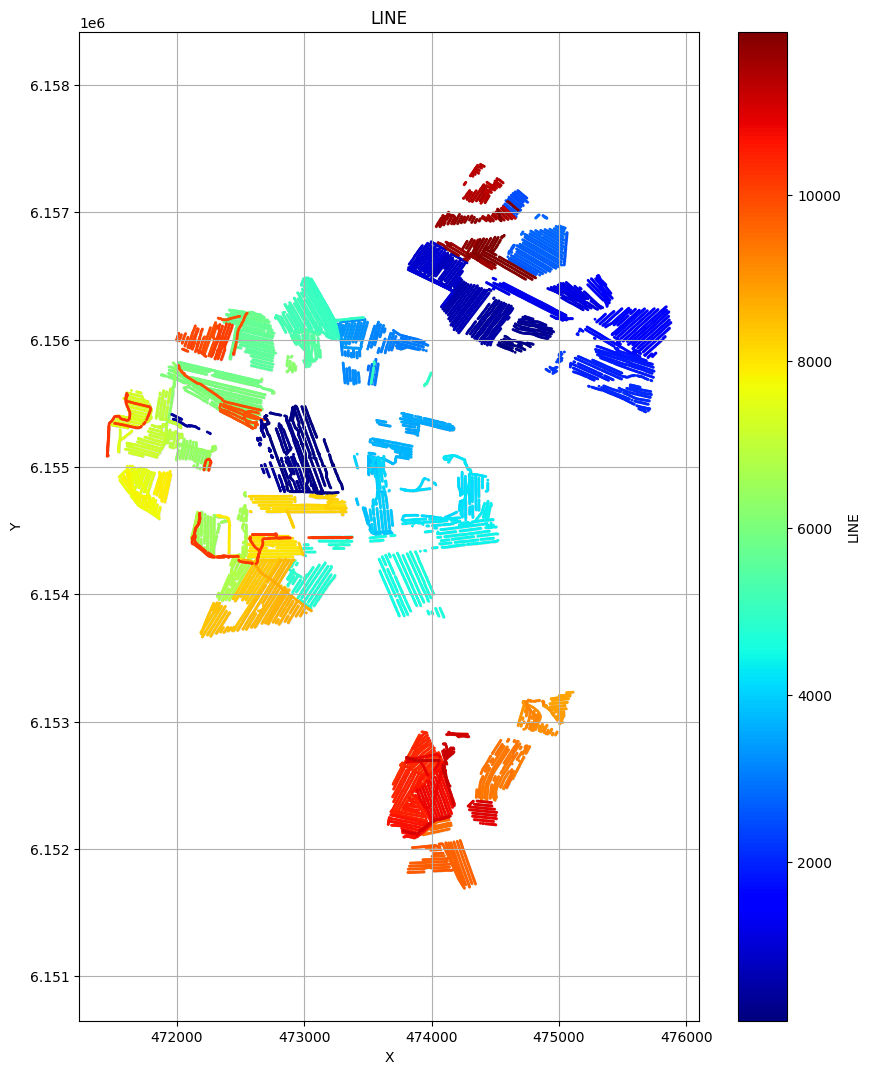

In [3]:
N=5000000
N=50000
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

ig.plot_geometry(f_data_h5, pl='LINE')
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:

# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', NLAY_min=1, NLAY_max=8, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

prior_layered:   0%|                                                                        | 0/50000 [00:00<?, ?it/s]

prior_layered:   0%|                                                                        | 0/50000 [00:00<?, ?it/s]

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

Using file_basename=TX07_20230906_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   2%|█▏                                                                  | 28/1563 [00:01<00:55, 27.79it/s]

gatdaem1d:   3%|█▉                                                                  | 44/1563 [00:01<00:34, 43.94it/s]

gatdaem1d:   2%|█▏                                                                  | 27/1562 [00:01<00:57, 26.91it/s]

gatdaem1d:   3%|██▏                                                                 | 50/1562 [00:01<00:30, 49.74it/s]

gatdaem1d:   2%|█▍                                                                  | 34/1562 [00:01<00:46, 32.71it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:47, 32.16it/s]

gatdaem1d:   2%|█▍                                                                  | 32/1562 [00:01<00:48, 31.61it/s]

gatdaem1d:   3%|█▊                                                                  | 43/1563 [00:01<00:36, 41.93it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1562 [00:01<00:46, 32.74it/s]

gatdaem1d:   3%|█▊                                                                  | 43/1563 [00:01<00:35, 42.78it/s]

gatdaem1d:   2%|█▎                                                                  | 30/1562 [00:01<00:51, 29.94it/s]

gatdaem1d:   3%|█▊                                                                  | 43/1562 [00:01<00:35, 42.25it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:46, 32.71it/s]

gatdaem1d:   2%|█▎                                                                  | 31/1562 [00:01<00:49, 30.89it/s]

gatdaem1d:   3%|█▊                                                                  | 42/1563 [00:01<00:36, 41.96it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:46, 32.66it/s]

gatdaem1d:   3%|█▉                                                                  | 44/1562 [00:01<00:35, 43.24it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:47, 32.52it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:47, 32.34it/s]

gatdaem1d:   3%|█▊                                                                  | 41/1562 [00:01<00:37, 40.86it/s]

gatdaem1d:   3%|█▊                                                                  | 42/1562 [00:01<00:36, 41.93it/s]

gatdaem1d:   3%|█▊                                                                  | 42/1562 [00:01<00:36, 41.53it/s]

gatdaem1d:   2%|█▍                                                                  | 33/1563 [00:01<00:47, 32.52it/s]

gatdaem1d:   3%|█▊                                                                  | 41/1563 [00:01<00:37, 40.93it/s]

gatdaem1d:   2%|█▏                                                                  | 28/1563 [00:01<00:56, 27.26it/s]

gatdaem1d:   2%|█▏                                                                  | 28/1563 [00:01<00:55, 27.70it/s]

gatdaem1d:   3%|█▊                                                                  | 43/1562 [00:01<00:35, 42.24it/s]

gatdaem1d:   2%|█▎                                                                  | 31/1563 [00:01<00:49, 30.90it/s]

gatdaem1d:   3%|█▉                                                                  | 45/1563 [00:01<00:34, 44.45it/s]

gatdaem1d:   3%|█▋                                                                  | 40/1562 [00:01<00:38, 39.16it/s]

gatdaem1d:   2%|█                                                                   | 25/1562 [00:01<01:02, 24.61it/s]

gatdaem1d:   3%|█▊                                                                  | 42/1562 [00:01<00:36, 41.81it/s]

gatdaem1d:   5%|███▎                                                                | 76/1563 [00:02<00:39, 38.08it/s]

gatdaem1d:   4%|██▋                                                                 | 61/1563 [00:02<00:49, 30.29it/s]

gatdaem1d:   4%|██▌                                                                 | 59/1562 [00:02<00:50, 29.54it/s]

gatdaem1d:   5%|███▎                                                                | 76/1562 [00:02<00:39, 37.62it/s]

gatdaem1d:   4%|██▊                                                                 | 66/1562 [00:02<00:45, 32.60it/s]

gatdaem1d:   5%|███▎                                                                | 75/1563 [00:02<00:39, 37.98it/s]

gatdaem1d:   5%|███▋                                                                | 84/1563 [00:02<00:35, 41.93it/s]

gatdaem1d:   4%|██▋                                                                 | 62/1562 [00:02<00:48, 30.87it/s]

gatdaem1d:   4%|██▋                                                                 | 62/1562 [00:02<00:48, 30.79it/s]

gatdaem1d:   5%|███▋                                                                | 84/1562 [00:02<00:35, 41.88it/s]

gatdaem1d:   4%|██▉                                                                 | 67/1563 [00:02<00:44, 33.25it/s]

gatdaem1d:   6%|███▋                                                                | 86/1563 [00:02<00:35, 42.13it/s]

gatdaem1d:   5%|███                                                                 | 71/1563 [00:02<00:40, 36.52it/s]

gatdaem1d:   4%|██▉                                                                 | 67/1563 [00:02<00:45, 32.96it/s]

gatdaem1d:   5%|███▋                                                                | 84/1562 [00:02<00:35, 41.41it/s]

gatdaem1d:   5%|███▋                                                                | 85/1562 [00:02<00:35, 42.07it/s]

gatdaem1d:   5%|███▎                                                                | 75/1563 [00:02<00:39, 37.49it/s]

gatdaem1d:   4%|██▊                                                                 | 66/1563 [00:02<00:45, 32.57it/s]

gatdaem1d:   4%|██▊                                                                 | 66/1562 [00:02<00:47, 31.65it/s]

gatdaem1d:   4%|██▌                                                                 | 60/1563 [00:02<00:50, 29.55it/s]

gatdaem1d:   5%|███▏                                                                | 73/1563 [00:02<00:40, 36.93it/s]

gatdaem1d:   6%|███▋                                                                | 86/1562 [00:02<00:35, 41.34it/s]

gatdaem1d:   6%|███▊                                                                | 88/1562 [00:02<00:35, 42.08it/s]

gatdaem1d:   4%|██▌                                                                 | 58/1562 [00:02<00:51, 29.41it/s]

gatdaem1d:   6%|████▎                                                              | 100/1562 [00:02<00:31, 46.06it/s]

gatdaem1d:   5%|███▋                                                                | 85/1562 [00:02<00:35, 42.02it/s]

gatdaem1d:   6%|███▉                                                                | 90/1563 [00:02<00:34, 42.48it/s]

gatdaem1d:   5%|███▋                                                                | 85/1563 [00:02<00:40, 36.67it/s]

gatdaem1d:   5%|███▍                                                                | 80/1562 [00:02<00:43, 34.45it/s]

gatdaem1d:   6%|███▊                                                                | 88/1563 [00:02<00:41, 35.89it/s]

gatdaem1d:   6%|███▋                                                                | 86/1562 [00:02<00:41, 35.25it/s]

gatdaem1d:   5%|███▌                                                                | 82/1563 [00:02<00:43, 33.96it/s]

gatdaem1d:   6%|████                                                                | 93/1562 [00:03<00:46, 31.38it/s]

gatdaem1d:   6%|████▎                                                              | 100/1562 [00:03<00:44, 33.07it/s]

gatdaem1d:   7%|████▉                                                              | 116/1563 [00:03<00:37, 38.56it/s]

gatdaem1d:   6%|████▏                                                               | 95/1563 [00:03<00:46, 31.56it/s]

gatdaem1d:   7%|████▋                                                              | 108/1563 [00:03<00:39, 36.66it/s]

gatdaem1d:   8%|█████▍                                                             | 126/1562 [00:03<00:34, 41.84it/s]

gatdaem1d:   7%|█████                                                              | 117/1563 [00:03<00:36, 39.32it/s]

gatdaem1d:   6%|████▏                                                               | 95/1562 [00:03<00:46, 31.49it/s]

gatdaem1d:   7%|████▉                                                              | 116/1563 [00:03<00:37, 39.04it/s]

gatdaem1d:   6%|████▏                                                               | 95/1562 [00:03<00:46, 31.45it/s]

gatdaem1d:   7%|████▊                                                              | 112/1563 [00:03<00:37, 38.22it/s]

gatdaem1d:   8%|█████▍                                                             | 126/1562 [00:03<00:34, 41.38it/s]

gatdaem1d:   7%|████▋                                                              | 109/1563 [00:03<00:39, 36.65it/s]

gatdaem1d:   7%|████▍                                                              | 103/1563 [00:03<00:41, 35.47it/s]

gatdaem1d:   7%|████▋                                                              | 108/1562 [00:03<00:40, 35.97it/s]

gatdaem1d:   7%|████▉                                                              | 115/1563 [00:03<00:37, 38.81it/s]

gatdaem1d:   8%|█████▌                                                             | 129/1563 [00:03<00:34, 41.61it/s]

gatdaem1d:   6%|████▎                                                               | 99/1563 [00:03<00:45, 32.10it/s]

gatdaem1d:   8%|█████▍                                                             | 128/1562 [00:03<00:34, 41.34it/s]

gatdaem1d:   8%|█████▌                                                             | 131/1562 [00:03<00:33, 42.13it/s]

gatdaem1d:   6%|███▊                                                                | 89/1562 [00:03<00:49, 29.67it/s]

gatdaem1d:   7%|████▉                                                              | 114/1562 [00:03<00:41, 35.29it/s]

gatdaem1d:   9%|█████▋                                                             | 133/1563 [00:03<00:33, 42.35it/s]

gatdaem1d:   9%|██████▎                                                            | 147/1562 [00:03<00:32, 44.13it/s]

gatdaem1d:   8%|█████▍                                                             | 126/1563 [00:03<00:39, 36.82it/s]

gatdaem1d:   8%|█████▍                                                             | 128/1562 [00:03<00:38, 37.55it/s]

gatdaem1d:   7%|████▉                                                              | 115/1562 [00:03<00:43, 33.49it/s]

gatdaem1d:   8%|█████▎                                                             | 123/1563 [00:03<00:41, 34.59it/s]

gatdaem1d:   8%|█████▎                                                             | 125/1563 [00:03<00:41, 34.28it/s]

gatdaem1d:   8%|█████▍                                                             | 128/1562 [00:03<00:39, 36.26it/s]

gatdaem1d:   7%|█████                                                              | 117/1563 [00:03<00:44, 32.80it/s]

gatdaem1d:   8%|█████▏                                                             | 122/1562 [00:03<00:42, 33.87it/s]

gatdaem1d:   8%|█████▋                                                             | 132/1562 [00:04<00:41, 34.29it/s]

gatdaem1d:  10%|██████▊                                                            | 159/1563 [00:04<00:34, 40.20it/s]

gatdaem1d:   8%|█████▍                                                             | 127/1563 [00:04<00:45, 31.61it/s]

gatdaem1d:   9%|█████▉                                                             | 137/1562 [00:04<00:40, 35.49it/s]

gatdaem1d:  10%|██████▍                                                            | 151/1563 [00:04<00:36, 38.80it/s]

gatdaem1d:  10%|██████▊                                                            | 159/1563 [00:04<00:35, 40.10it/s]

gatdaem1d:  10%|██████▌                                                            | 154/1563 [00:04<00:35, 39.59it/s]

gatdaem1d:   9%|██████▏                                                            | 145/1563 [00:04<00:37, 38.01it/s]

gatdaem1d:  10%|██████▊                                                            | 159/1563 [00:04<00:34, 40.29it/s]

gatdaem1d:   9%|█████▋                                                             | 134/1562 [00:04<00:44, 32.44it/s]

gatdaem1d:  11%|███████▏                                                           | 168/1562 [00:04<00:33, 41.35it/s]

gatdaem1d:   8%|█████▍                                                             | 127/1562 [00:04<00:45, 31.30it/s]

gatdaem1d:  10%|██████▍                                                            | 150/1562 [00:04<00:37, 38.07it/s]

gatdaem1d:  10%|██████▊                                                            | 158/1563 [00:04<00:35, 40.10it/s]

gatdaem1d:  11%|███████▎                                                           | 171/1563 [00:04<00:33, 41.36it/s]

gatdaem1d:   9%|█████▋                                                             | 133/1563 [00:04<00:43, 32.51it/s]

gatdaem1d:  11%|███████▎                                                           | 170/1562 [00:04<00:33, 41.08it/s]

gatdaem1d:   8%|█████▏                                                             | 121/1562 [00:04<00:47, 30.45it/s]

gatdaem1d:  11%|███████▍                                                           | 174/1562 [00:04<00:33, 41.68it/s]

gatdaem1d:  11%|███████▌                                                           | 176/1563 [00:04<00:32, 42.32it/s]

gatdaem1d:   9%|██████▎                                                            | 146/1563 [00:04<00:40, 34.73it/s]

gatdaem1d:  10%|██████▍                                                            | 150/1562 [00:04<00:42, 33.53it/s]

gatdaem1d:  11%|███████▏                                                           | 168/1562 [00:04<00:37, 37.15it/s]

gatdaem1d:  12%|████████▏                                                          | 192/1562 [00:04<00:32, 42.03it/s]

gatdaem1d:  10%|██████▍                                                            | 149/1562 [00:04<00:43, 32.52it/s]

gatdaem1d:  10%|██████▊                                                            | 158/1563 [00:04<00:41, 33.53it/s]

gatdaem1d:  11%|███████                                                            | 166/1562 [00:04<00:39, 35.21it/s]

gatdaem1d:  10%|███████                                                            | 164/1563 [00:04<00:40, 34.35it/s]

gatdaem1d:  10%|██████▊                                                            | 160/1563 [00:04<00:42, 33.23it/s]

gatdaem1d:  10%|██████▍                                                            | 151/1563 [00:04<00:44, 31.64it/s]

gatdaem1d:  10%|██████▋                                                            | 157/1562 [00:04<00:43, 32.64it/s]

gatdaem1d:  11%|███████                                                            | 166/1562 [00:04<00:40, 34.20it/s]

gatdaem1d:  11%|███████▌                                                           | 175/1562 [00:05<00:37, 37.31it/s]

gatdaem1d:  13%|████████▌                                                          | 201/1563 [00:05<00:33, 40.83it/s]

gatdaem1d:  10%|██████▊                                                            | 160/1563 [00:05<00:44, 31.82it/s]

gatdaem1d:  13%|████████▌                                                          | 200/1563 [00:05<00:33, 40.41it/s]

gatdaem1d:  11%|███████▌                                                           | 175/1562 [00:05<00:38, 36.10it/s]

gatdaem1d:  13%|████████▍                                                          | 197/1563 [00:05<00:33, 40.61it/s]

gatdaem1d:  13%|████████▋                                                          | 202/1563 [00:05<00:33, 41.00it/s]

gatdaem1d:  12%|████████▎                                                          | 195/1563 [00:05<00:33, 40.35it/s]

gatdaem1d:  12%|████████                                                           | 188/1563 [00:05<00:34, 39.48it/s]

gatdaem1d:  14%|█████████                                                          | 211/1562 [00:05<00:32, 41.66it/s]

gatdaem1d:  11%|███████▏                                                           | 168/1562 [00:05<00:42, 32.68it/s]

gatdaem1d:  12%|████████▎                                                          | 193/1562 [00:05<00:34, 39.61it/s]

gatdaem1d:  10%|██████▉                                                            | 161/1562 [00:05<00:43, 31.99it/s]

gatdaem1d:  13%|████████▋                                                          | 202/1563 [00:05<00:33, 41.22it/s]

gatdaem1d:  14%|█████████▏                                                         | 214/1563 [00:05<00:32, 41.64it/s]

gatdaem1d:  11%|███████                                                            | 166/1563 [00:05<00:43, 32.34it/s]

gatdaem1d:  14%|█████████                                                          | 212/1562 [00:05<00:32, 41.29it/s]

gatdaem1d:  14%|█████████▎                                                         | 216/1562 [00:05<00:32, 41.79it/s]

gatdaem1d:  10%|██████▌                                                            | 153/1562 [00:05<00:45, 30.74it/s]

gatdaem1d:  14%|█████████▍                                                         | 219/1563 [00:05<00:31, 42.06it/s]

gatdaem1d:  12%|███████▊                                                           | 181/1563 [00:05<00:41, 33.62it/s]

gatdaem1d:  12%|███████▉                                                           | 184/1562 [00:05<00:42, 32.39it/s]

gatdaem1d:  13%|████████▊                                                          | 206/1562 [00:05<00:38, 35.08it/s]

gatdaem1d:  12%|███████▊                                                           | 182/1562 [00:05<00:43, 31.80it/s]

gatdaem1d:  13%|████████▋                                                          | 203/1563 [00:05<00:38, 35.54it/s]

gatdaem1d:  13%|████████▋                                                          | 202/1563 [00:05<00:37, 35.96it/s]

gatdaem1d:  12%|████████▏                                                          | 192/1563 [00:05<00:42, 32.28it/s]

gatdaem1d:  12%|████████▏                                                          | 190/1562 [00:05<00:42, 32.56it/s]

gatdaem1d:  13%|████████▋                                                          | 202/1562 [00:05<00:40, 33.83it/s]

gatdaem1d:  12%|███████▊                                                           | 183/1563 [00:05<00:44, 31.35it/s]

gatdaem1d:  15%|██████████                                                         | 235/1562 [00:05<00:34, 37.93it/s]

gatdaem1d:  13%|████████▌                                                          | 201/1562 [00:05<00:41, 32.79it/s]

gatdaem1d:  14%|█████████▎                                                         | 218/1562 [00:06<00:34, 39.08it/s]

gatdaem1d:  15%|██████████▎                                                        | 241/1563 [00:06<00:32, 40.59it/s]

gatdaem1d:  12%|████████▎                                                          | 194/1563 [00:06<00:42, 32.37it/s]

gatdaem1d:  15%|██████████▏                                                        | 239/1563 [00:06<00:32, 40.99it/s]

gatdaem1d:  16%|██████████▌                                                        | 245/1563 [00:06<00:31, 41.53it/s]

gatdaem1d:  15%|██████████▏                                                        | 238/1563 [00:06<00:32, 41.07it/s]

gatdaem1d:  15%|█████████▊                                                         | 229/1563 [00:06<00:33, 39.88it/s]

gatdaem1d:  13%|█████████                                                          | 210/1562 [00:06<00:37, 35.71it/s]

gatdaem1d:  15%|██████████                                                         | 235/1562 [00:06<00:32, 40.35it/s]

gatdaem1d:  16%|██████████▊                                                        | 253/1562 [00:06<00:31, 41.43it/s]

gatdaem1d:  16%|██████████▉                                                        | 256/1563 [00:06<00:31, 41.75it/s]

gatdaem1d:  16%|██████████▌                                                        | 245/1563 [00:06<00:31, 41.55it/s]

gatdaem1d:  13%|████████▌                                                          | 199/1563 [00:06<00:41, 32.53it/s]

gatdaem1d:  16%|██████████▉                                                        | 254/1562 [00:06<00:31, 41.42it/s]

gatdaem1d:  17%|███████████                                                        | 259/1562 [00:06<00:30, 42.12it/s]

gatdaem1d:  12%|████████▎                                                          | 193/1562 [00:06<00:44, 31.05it/s]

gatdaem1d:  12%|███████▉                                                           | 184/1562 [00:06<00:45, 30.03it/s]

gatdaem1d:  14%|█████████                                                          | 212/1562 [00:06<00:39, 34.24it/s]

gatdaem1d:  17%|███████████▏                                                       | 262/1563 [00:06<00:31, 41.21it/s]

gatdaem1d:  15%|██████████▎                                                        | 242/1563 [00:06<00:35, 37.31it/s]

gatdaem1d:  14%|█████████▌                                                         | 223/1563 [00:06<00:37, 36.20it/s]

gatdaem1d:  14%|█████████▎                                                         | 218/1562 [00:06<00:41, 32.58it/s]

gatdaem1d:  14%|█████████▏                                                         | 214/1562 [00:06<00:42, 31.44it/s]

gatdaem1d:  14%|█████████▋                                                         | 225/1563 [00:06<00:41, 32.45it/s]

gatdaem1d:  16%|██████████▍                                                        | 244/1562 [00:06<00:36, 36.25it/s]

gatdaem1d:  14%|█████████▌                                                         | 223/1562 [00:06<00:41, 32.34it/s]

gatdaem1d:  15%|██████████▍                                                        | 242/1562 [00:06<00:38, 33.94it/s]

gatdaem1d:  15%|██████████▏                                                        | 239/1563 [00:06<00:38, 34.32it/s]

gatdaem1d:  14%|█████████▏                                                         | 215/1563 [00:06<00:43, 31.03it/s]

gatdaem1d:  15%|██████████▏                                                        | 239/1563 [00:06<00:37, 34.98it/s]

gatdaem1d:  15%|██████████                                                         | 235/1562 [00:06<00:40, 32.57it/s]

gatdaem1d:  18%|███████████▊                                                       | 274/1562 [00:06<00:35, 35.81it/s]

gatdaem1d:  17%|███████████▏                                                       | 262/1562 [00:07<00:32, 40.34it/s]

gatdaem1d:  18%|████████████▏                                                      | 284/1563 [00:07<00:31, 41.01it/s]

gatdaem1d:  15%|█████████▋                                                         | 227/1563 [00:07<00:41, 32.27it/s]

gatdaem1d:  18%|████████████                                                       | 282/1563 [00:07<00:30, 41.43it/s]

gatdaem1d:  18%|████████████▎                                                      | 288/1563 [00:07<00:30, 41.91it/s]

gatdaem1d:  17%|███████████▌                                                       | 271/1563 [00:07<00:31, 40.51it/s]

gatdaem1d:  18%|████████████                                                       | 281/1563 [00:07<00:30, 41.48it/s]

gatdaem1d:  19%|████████████▋                                                      | 295/1562 [00:07<00:30, 41.50it/s]

gatdaem1d:  16%|██████████▊                                                        | 253/1562 [00:07<00:34, 37.78it/s]

gatdaem1d:  19%|████████████▊                                                      | 298/1563 [00:07<00:30, 41.69it/s]

gatdaem1d:  18%|████████████▎                                                      | 287/1563 [00:07<00:30, 41.56it/s]

gatdaem1d:  16%|██████████▍                                                        | 244/1563 [00:07<00:36, 36.34it/s]

gatdaem1d:  19%|████████████▋                                                      | 297/1562 [00:07<00:30, 41.66it/s]

gatdaem1d:  19%|████████████▉                                                      | 302/1562 [00:07<00:29, 42.18it/s]

gatdaem1d:  14%|█████████▋                                                         | 225/1562 [00:07<00:43, 30.95it/s]

gatdaem1d:  14%|█████████▋                                                         | 225/1562 [00:07<00:40, 33.28it/s]

gatdaem1d:  16%|██████████▊                                                        | 253/1562 [00:07<00:36, 36.19it/s]

gatdaem1d:  18%|███████████▊                                                       | 276/1562 [00:07<00:34, 37.39it/s]

gatdaem1d:  18%|████████████                                                       | 280/1563 [00:07<00:35, 35.78it/s]

gatdaem1d:  17%|███████████▏                                                       | 260/1563 [00:07<00:37, 34.66it/s]

gatdaem1d:  16%|██████████▊                                                        | 251/1562 [00:07<00:40, 32.05it/s]

gatdaem1d:  16%|██████████▌                                                        | 246/1562 [00:07<00:42, 31.06it/s]

gatdaem1d:  19%|█████████████                                                      | 304/1563 [00:07<00:34, 36.92it/s]

gatdaem1d:  18%|████████████▏                                                      | 285/1562 [00:07<00:33, 37.60it/s]

gatdaem1d:  16%|██████████▉                                                        | 256/1562 [00:07<00:40, 32.34it/s]

gatdaem1d:  17%|███████████                                                        | 258/1563 [00:07<00:40, 31.85it/s]

gatdaem1d:  18%|███████████▋                                                       | 274/1563 [00:07<00:38, 33.81it/s]

gatdaem1d:  16%|██████████▌                                                        | 247/1563 [00:07<00:42, 30.72it/s]

gatdaem1d:  18%|███████████▉                                                       | 277/1562 [00:07<00:38, 33.05it/s]

gatdaem1d:  18%|███████████▊                                                       | 275/1563 [00:07<00:38, 33.85it/s]

gatdaem1d:  17%|███████████▍                                                       | 268/1562 [00:07<00:40, 32.16it/s]

gatdaem1d:  20%|█████████████                                                      | 305/1562 [00:08<00:30, 40.85it/s]

gatdaem1d:  21%|█████████████▉                                                     | 326/1563 [00:08<00:30, 41.21it/s]

gatdaem1d:  21%|██████████████▏                                                    | 330/1563 [00:08<00:29, 41.90it/s]

gatdaem1d:  17%|███████████▏                                                       | 260/1563 [00:08<00:40, 32.36it/s]

gatdaem1d:  20%|█████████████▎                                                     | 312/1563 [00:08<00:30, 40.59it/s]

gatdaem1d:  21%|█████████████▉                                                     | 324/1563 [00:08<00:29, 41.34it/s]

gatdaem1d:  22%|██████████████▍                                                    | 337/1562 [00:08<00:29, 41.53it/s]

gatdaem1d:  21%|█████████████▊                                                     | 323/1563 [00:08<00:30, 41.23it/s]

gatdaem1d:  22%|██████████████▌                                                    | 340/1563 [00:08<00:29, 41.76it/s]

gatdaem1d:  21%|██████████████                                                     | 329/1563 [00:08<00:29, 41.54it/s]

gatdaem1d:  18%|████████████▎                                                      | 286/1563 [00:08<00:33, 38.08it/s]

gatdaem1d:  20%|█████████████▎                                                     | 311/1562 [00:08<00:36, 33.94it/s]

gatdaem1d:  22%|██████████████▌                                                    | 340/1562 [00:08<00:29, 41.86it/s]

gatdaem1d:  22%|██████████████▊                                                    | 345/1562 [00:08<00:29, 41.69it/s]

gatdaem1d:  17%|███████████▍                                                       | 267/1562 [00:08<00:37, 34.23it/s]

gatdaem1d:  17%|███████████▍                                                       | 267/1562 [00:08<00:36, 35.87it/s]

gatdaem1d:  19%|████████████▋                                                      | 296/1562 [00:08<00:33, 38.01it/s]

gatdaem1d:  19%|████████████▍                                                      | 291/1562 [00:08<00:35, 35.39it/s]

gatdaem1d:  18%|████████████▏                                                      | 284/1562 [00:08<00:39, 32.05it/s]

gatdaem1d:  20%|█████████████▍                                                     | 314/1562 [00:08<00:35, 35.18it/s]

gatdaem1d:  19%|████████████▋                                                      | 295/1563 [00:08<00:37, 33.67it/s]

gatdaem1d:  20%|█████████████▌                                                     | 317/1563 [00:08<00:36, 33.99it/s]

gatdaem1d:  21%|█████████████▉                                                     | 326/1562 [00:08<00:32, 38.50it/s]

gatdaem1d:  18%|███████████▉                                                       | 278/1562 [00:08<00:41, 30.80it/s]

gatdaem1d:  19%|████████████▍                                                      | 290/1563 [00:08<00:40, 31.63it/s]

gatdaem1d:  19%|████████████▍                                                      | 289/1562 [00:08<00:39, 31.88it/s]

gatdaem1d:  18%|███████████▉                                                       | 279/1563 [00:08<00:41, 30.82it/s]

gatdaem1d:  22%|██████████████▋                                                    | 342/1563 [00:08<00:34, 35.48it/s]

gatdaem1d:  20%|█████████████▎                                                     | 311/1562 [00:08<00:38, 32.84it/s]

gatdaem1d:  20%|█████████████▏                                                     | 308/1563 [00:08<00:38, 32.79it/s]

gatdaem1d:  20%|█████████████▎                                                     | 310/1563 [00:09<00:38, 32.77it/s]

gatdaem1d:  19%|████████████▉                                                      | 302/1562 [00:08<00:38, 32.38it/s]

gatdaem1d:  22%|██████████████▉                                                    | 348/1562 [00:09<00:29, 41.29it/s]

gatdaem1d:  24%|███████████████▉                                                   | 372/1563 [00:09<00:28, 41.84it/s]

gatdaem1d:  23%|███████████████▏                                                   | 354/1563 [00:09<00:29, 41.01it/s]

gatdaem1d:  24%|███████████████▊                                                   | 368/1563 [00:09<00:29, 40.95it/s]

gatdaem1d:  19%|████████████▌                                                      | 293/1563 [00:09<00:39, 32.16it/s]

gatdaem1d:  24%|████████████████▎                                                  | 379/1562 [00:09<00:28, 41.37it/s]

gatdaem1d:  23%|███████████████▋                                                   | 365/1563 [00:09<00:29, 41.09it/s]

gatdaem1d:  24%|████████████████▎                                                  | 382/1563 [00:09<00:28, 41.48it/s]

gatdaem1d:  24%|███████████████▉                                                   | 371/1563 [00:09<00:28, 41.50it/s]

gatdaem1d:  21%|█████████████▉                                                     | 325/1563 [00:09<00:32, 38.03it/s]

gatdaem1d:  24%|████████████████▍                                                  | 382/1562 [00:09<00:28, 41.76it/s]

gatdaem1d:  23%|███████████████▋                                                   | 366/1563 [00:09<00:29, 40.55it/s]

gatdaem1d:  25%|████████████████▌                                                  | 387/1562 [00:09<00:28, 41.60it/s]

gatdaem1d:  19%|█████████████                                                      | 304/1562 [00:09<00:36, 34.79it/s]

gatdaem1d:  20%|█████████████▏                                                     | 308/1562 [00:09<00:33, 37.23it/s]

gatdaem1d:  22%|██████████████▊                                                    | 346/1562 [00:09<00:36, 33.12it/s]

gatdaem1d:  21%|██████████████▎                                                    | 335/1562 [00:09<00:32, 37.95it/s]

gatdaem1d:  21%|██████████████                                                     | 327/1562 [00:09<00:35, 34.43it/s]

gatdaem1d:  20%|█████████████▌                                                     | 317/1562 [00:09<00:38, 32.06it/s]

gatdaem1d:  23%|███████████████▍                                                   | 359/1563 [00:09<00:33, 36.10it/s]

gatdaem1d:  21%|██████████████                                                     | 329/1563 [00:09<00:37, 32.72it/s]

gatdaem1d:  23%|███████████████▋                                                   | 367/1562 [00:09<00:30, 39.09it/s]

gatdaem1d:  20%|█████████████▎                                                     | 310/1562 [00:09<00:40, 31.14it/s]

gatdaem1d:  22%|███████████████                                                    | 350/1562 [00:09<00:35, 33.99it/s]

gatdaem1d:  21%|██████████████▏                                                    | 330/1562 [00:09<00:35, 34.57it/s]

gatdaem1d:  21%|█████████████▊                                                     | 322/1563 [00:09<00:39, 31.32it/s]

gatdaem1d:  20%|█████████████▎                                                     | 310/1563 [00:09<00:40, 30.71it/s]

gatdaem1d:  23%|███████████████▏                                                   | 353/1562 [00:09<00:34, 35.30it/s]

gatdaem1d:  22%|██████████████▌                                                    | 341/1563 [00:09<00:37, 32.70it/s]

gatdaem1d:  22%|██████████████▋                                                    | 343/1562 [00:09<00:35, 34.72it/s]

gatdaem1d:  24%|████████████████▏                                                  | 378/1563 [00:10<00:35, 33.70it/s]

gatdaem1d:  25%|████████████████▋                                                  | 390/1562 [00:10<00:28, 41.50it/s]

gatdaem1d:  22%|██████████████▋                                                    | 343/1563 [00:10<00:37, 32.12it/s]

gatdaem1d:  26%|█████████████████▋                                                 | 414/1563 [00:10<00:27, 41.73it/s]

gatdaem1d:  26%|█████████████████▌                                                 | 410/1563 [00:10<00:27, 41.23it/s]

gatdaem1d:  25%|████████████████▉                                                  | 396/1563 [00:10<00:28, 40.81it/s]

gatdaem1d:  27%|██████████████████                                                 | 422/1562 [00:10<00:27, 41.71it/s]

gatdaem1d:  21%|█████████████▉                                                     | 326/1563 [00:10<00:38, 32.07it/s]

gatdaem1d:  26%|█████████████████▋                                                 | 413/1563 [00:10<00:27, 41.40it/s]

gatdaem1d:  26%|█████████████████▍                                                 | 407/1563 [00:10<00:28, 40.86it/s]

gatdaem1d:  27%|██████████████████▏                                                | 424/1562 [00:10<00:27, 41.47it/s]

gatdaem1d:  27%|██████████████████▍                                                | 429/1562 [00:10<00:27, 41.29it/s]

gatdaem1d:  22%|██████████████▉                                                    | 349/1562 [00:10<00:31, 38.13it/s]

gatdaem1d:  26%|█████████████████▍                                                 | 407/1563 [00:10<00:29, 39.32it/s]

gatdaem1d:  23%|███████████████▌                                                   | 364/1563 [00:10<00:32, 36.71it/s]

gatdaem1d:  24%|████████████████▎                                                  | 380/1562 [00:10<00:36, 32.35it/s]

gatdaem1d:  22%|██████████████▌                                                    | 339/1562 [00:10<00:36, 33.38it/s]

gatdaem1d:  27%|██████████████████▏                                                | 424/1563 [00:10<00:30, 37.62it/s]

gatdaem1d:  23%|███████████████▌                                                   | 362/1562 [00:10<00:35, 33.65it/s]

gatdaem1d:  24%|████████████████                                                   | 374/1562 [00:10<00:33, 35.72it/s]

gatdaem1d:  22%|███████████████                                                    | 350/1562 [00:10<00:38, 31.84it/s]

gatdaem1d:  26%|█████████████████▏                                                 | 400/1563 [00:10<00:31, 37.48it/s]

gatdaem1d:  26%|█████████████████▌                                                 | 410/1562 [00:10<00:28, 40.05it/s]

gatdaem1d:  23%|███████████████▌                                                   | 362/1563 [00:10<00:36, 32.53it/s]

gatdaem1d:  24%|███████████████▉                                                   | 371/1562 [00:10<00:32, 36.32it/s]

gatdaem1d:  23%|███████████████▋                                                   | 365/1563 [00:10<00:34, 34.55it/s]

gatdaem1d:  22%|██████████████▋                                                    | 342/1562 [00:10<00:39, 30.69it/s]

gatdaem1d:  22%|██████████████▌                                                    | 341/1563 [00:10<00:39, 30.57it/s]

gatdaem1d:  25%|████████████████▌                                                  | 385/1562 [00:10<00:35, 33.03it/s]

gatdaem1d:  25%|████████████████▉                                                  | 395/1562 [00:10<00:31, 37.11it/s]

gatdaem1d:  24%|████████████████                                                   | 374/1563 [00:10<00:36, 32.41it/s]

gatdaem1d:  25%|████████████████▌                                                  | 386/1562 [00:10<00:31, 37.15it/s]

gatdaem1d:  25%|████████████████▌                                                  | 386/1563 [00:11<00:33, 35.08it/s]

gatdaem1d:  29%|███████████████████▌                                               | 457/1563 [00:11<00:26, 41.97it/s]

gatdaem1d:  29%|███████████████████▍                                               | 452/1563 [00:11<00:26, 41.34it/s]

gatdaem1d:  26%|█████████████████▋                                                 | 413/1563 [00:11<00:34, 33.08it/s]

gatdaem1d:  30%|███████████████████▉                                               | 466/1562 [00:11<00:26, 42.06it/s]

gatdaem1d:  29%|███████████████████▌                                               | 456/1563 [00:11<00:26, 41.65it/s]

gatdaem1d:  23%|███████████████▍                                                   | 359/1563 [00:11<00:37, 31.70it/s]

gatdaem1d:  25%|████████████████▊                                                  | 391/1562 [00:11<00:29, 39.11it/s]

gatdaem1d:  29%|███████████████████▏                                               | 448/1563 [00:11<00:28, 39.37it/s]

gatdaem1d:  30%|███████████████████▉                                               | 466/1562 [00:11<00:27, 39.89it/s]

gatdaem1d:  28%|██████████████████▌                                                | 432/1562 [00:11<00:29, 38.35it/s]

gatdaem1d:  26%|█████████████████▏                                                 | 401/1563 [00:11<00:32, 35.43it/s]

gatdaem1d:  26%|█████████████████▋                                                 | 413/1562 [00:11<00:36, 31.86it/s]

gatdaem1d:  30%|████████████████████▏                                              | 471/1562 [00:11<00:28, 38.77it/s]

gatdaem1d:  30%|███████████████████▉                                               | 466/1563 [00:11<00:28, 38.70it/s]

gatdaem1d:  28%|██████████████████▋                                                | 437/1563 [00:11<00:30, 36.53it/s]

gatdaem1d:  27%|█████████████████▊                                                 | 414/1562 [00:11<00:31, 36.84it/s]

gatdaem1d:  24%|███████████████▉                                                   | 373/1562 [00:11<00:37, 32.11it/s]

gatdaem1d:  25%|████████████████▉                                                  | 396/1562 [00:11<00:34, 33.41it/s]

gatdaem1d:  29%|███████████████████▏                                               | 447/1563 [00:11<00:30, 36.30it/s]

gatdaem1d:  24%|████████████████▍                                                  | 382/1562 [00:11<00:37, 31.82it/s]

gatdaem1d:  28%|██████████████████▉                                                | 442/1563 [00:11<00:28, 38.67it/s]

gatdaem1d:  26%|█████████████████▎                                                 | 403/1563 [00:11<00:33, 34.95it/s]

gatdaem1d:  29%|███████████████████▍                                               | 452/1562 [00:11<00:27, 40.38it/s]

gatdaem1d:  26%|█████████████████▋                                                 | 411/1562 [00:11<00:31, 37.12it/s]

gatdaem1d:  26%|█████████████████▌                                                 | 409/1563 [00:11<00:31, 37.12it/s]

gatdaem1d:  25%|████████████████▌                                                  | 385/1562 [00:11<00:34, 34.08it/s]

gatdaem1d:  24%|████████████████                                                   | 374/1563 [00:11<00:38, 31.07it/s]

gatdaem1d:  27%|█████████████████▉                                                 | 419/1562 [00:11<00:34, 32.99it/s]

gatdaem1d:  28%|██████████████████▊                                                | 438/1562 [00:11<00:29, 38.69it/s]

gatdaem1d:  26%|█████████████████▍                                                 | 407/1563 [00:11<00:35, 32.16it/s]

gatdaem1d:  27%|██████████████████▍                                                | 429/1562 [00:11<00:29, 38.70it/s]

gatdaem1d:  27%|██████████████████▍                                                | 429/1563 [00:12<00:30, 37.21it/s]

gatdaem1d:  32%|█████████████████████▍                                             | 499/1563 [00:12<00:25, 41.46it/s]

gatdaem1d:  33%|█████████████████████▊                                             | 509/1562 [00:12<00:24, 42.31it/s]

gatdaem1d:  32%|█████████████████████▍                                             | 499/1563 [00:12<00:25, 41.81it/s]

gatdaem1d:  29%|███████████████████▏                                               | 447/1563 [00:12<00:34, 32.50it/s]

gatdaem1d:  25%|████████████████▊                                                  | 392/1563 [00:12<00:36, 31.98it/s]

gatdaem1d:  28%|██████████████████▌                                                | 433/1562 [00:12<00:28, 39.86it/s]

gatdaem1d:  32%|█████████████████████▋                                             | 507/1562 [00:12<00:26, 40.16it/s]

gatdaem1d:  32%|█████████████████████▏                                             | 494/1563 [00:12<00:27, 38.48it/s]

gatdaem1d:  28%|███████████████████                                                | 445/1562 [00:12<00:35, 31.80it/s]

gatdaem1d:  33%|█████████████████████▉                                             | 512/1562 [00:12<00:26, 39.24it/s]

gatdaem1d:  31%|████████████████████▉                                              | 488/1563 [00:12<00:29, 36.88it/s]

gatdaem1d:  27%|█████████████████▊                                                 | 414/1562 [00:12<00:33, 34.53it/s]

gatdaem1d:  30%|████████████████████▏                                              | 471/1562 [00:12<00:30, 36.17it/s]

gatdaem1d:  28%|██████████████████▊                                                | 439/1562 [00:12<00:31, 35.96it/s]

gatdaem1d:  28%|██████████████████▋                                                | 437/1563 [00:12<00:33, 33.91it/s]

gatdaem1d:  27%|█████████████████▊                                                 | 414/1562 [00:12<00:36, 31.50it/s]

gatdaem1d:  31%|████████████████████▊                                              | 485/1563 [00:12<00:27, 39.77it/s]

gatdaem1d:  30%|████████████████████▎                                              | 475/1563 [00:12<00:30, 35.26it/s]

gatdaem1d:  32%|█████████████████████▋                                             | 506/1563 [00:12<00:28, 36.94it/s]

gatdaem1d:  32%|█████████████████████▏                                             | 493/1562 [00:12<00:26, 40.32it/s]

gatdaem1d:  29%|███████████████████▍                                               | 452/1562 [00:12<00:31, 35.16it/s]

gatdaem1d:  31%|████████████████████▋                                              | 484/1563 [00:12<00:31, 34.66it/s]

gatdaem1d:  27%|██████████████████▎                                                | 427/1562 [00:12<00:31, 36.25it/s]

gatdaem1d:  29%|███████████████████▎                                               | 451/1563 [00:12<00:29, 38.28it/s]

gatdaem1d:  27%|█████████████████▊                                                 | 415/1563 [00:12<00:33, 34.01it/s]

gatdaem1d:  28%|██████████████████▊                                                | 439/1563 [00:12<00:33, 33.74it/s]

gatdaem1d:  31%|████████████████████▌                                              | 479/1562 [00:12<00:27, 39.31it/s]

gatdaem1d:  29%|███████████████████▍                                               | 453/1562 [00:13<00:34, 32.54it/s]

gatdaem1d:  29%|███████████████████▎                                               | 449/1562 [00:13<00:31, 35.28it/s]

gatdaem1d:  28%|██████████████████▊                                                | 440/1563 [00:13<00:35, 32.02it/s]

gatdaem1d:  30%|████████████████████▏                                              | 472/1562 [00:12<00:27, 39.89it/s]

gatdaem1d:  35%|███████████████████████▏                                           | 541/1563 [00:13<00:24, 41.26it/s]

gatdaem1d:  35%|███████████████████████▏                                           | 542/1563 [00:13<00:24, 42.01it/s]

gatdaem1d:  35%|███████████████████████▋                                           | 552/1562 [00:13<00:24, 41.90it/s]

gatdaem1d:  30%|████████████████████                                               | 467/1563 [00:13<00:30, 35.91it/s]

gatdaem1d:  27%|██████████████████▏                                                | 424/1563 [00:13<00:36, 31.57it/s]

gatdaem1d:  31%|████████████████████▌                                              | 480/1563 [00:13<00:33, 31.86it/s]

gatdaem1d:  30%|████████████████████▎                                              | 475/1562 [00:13<00:26, 40.29it/s]

gatdaem1d:  35%|███████████████████████▌                                           | 550/1562 [00:13<00:24, 40.68it/s]

gatdaem1d:  34%|██████████████████████▉                                            | 536/1563 [00:13<00:26, 39.47it/s]

gatdaem1d:  31%|████████████████████▌                                              | 478/1562 [00:13<00:33, 31.97it/s]

gatdaem1d:  35%|███████████████████████▋                                           | 553/1562 [00:13<00:25, 39.66it/s]

gatdaem1d:  29%|███████████████████▎                                               | 449/1562 [00:13<00:32, 34.31it/s]

gatdaem1d:  31%|████████████████████▋                                              | 481/1562 [00:13<00:28, 37.47it/s]

gatdaem1d:  33%|██████████████████████▏                                            | 517/1563 [00:13<00:28, 37.11it/s]

gatdaem1d:  34%|██████████████████████▌                                            | 526/1563 [00:13<00:25, 39.97it/s]

gatdaem1d:  29%|███████████████████▏                                               | 446/1562 [00:13<00:35, 31.19it/s]

gatdaem1d:  33%|█████████████████████▊                                             | 508/1562 [00:13<00:30, 35.00it/s]

gatdaem1d:  34%|██████████████████████▌                                            | 526/1563 [00:13<00:29, 35.31it/s]

gatdaem1d:  30%|████████████████████▏                                              | 472/1563 [00:13<00:33, 32.74it/s]

gatdaem1d:  30%|████████████████████                                               | 469/1562 [00:13<00:28, 37.85it/s]

gatdaem1d:  31%|████████████████████▉                                              | 488/1562 [00:13<00:31, 34.53it/s]

gatdaem1d:  32%|█████████████████████▏                                             | 493/1563 [00:13<00:27, 39.18it/s]

gatdaem1d:  35%|███████████████████████▎                                           | 544/1563 [00:13<00:28, 35.80it/s]

gatdaem1d:  33%|██████████████████████▎                                            | 520/1563 [00:13<00:30, 34.20it/s]

gatdaem1d:  29%|███████████████████▋                                               | 459/1563 [00:13<00:29, 36.80it/s]

gatdaem1d:  33%|██████████████████████▍                                            | 523/1562 [00:13<00:25, 40.58it/s]

gatdaem1d:  30%|████████████████████▎                                              | 473/1563 [00:14<00:33, 32.64it/s]

gatdaem1d:  31%|████████████████████▊                                              | 486/1562 [00:14<00:33, 32.31it/s]

gatdaem1d:  31%|█████████████████████                                              | 490/1562 [00:14<00:29, 36.78it/s]

gatdaem1d:  33%|██████████████████████                                             | 515/1562 [00:13<00:25, 40.79it/s]

gatdaem1d:  30%|████████████████████▎                                              | 473/1563 [00:14<00:34, 31.64it/s]

gatdaem1d:  34%|██████████████████████▉                                            | 534/1562 [00:14<00:28, 36.49it/s]

gatdaem1d:  37%|████████████████████████▉                                          | 583/1563 [00:14<00:23, 41.23it/s]

gatdaem1d:  38%|█████████████████████████▍                                         | 594/1562 [00:14<00:23, 41.86it/s]

gatdaem1d:  33%|█████████████████████▉                                             | 512/1563 [00:14<00:32, 31.89it/s]

gatdaem1d:  29%|███████████████████▌                                               | 456/1563 [00:14<00:35, 31.35it/s]

gatdaem1d:  37%|█████████████████████████                                          | 585/1563 [00:14<00:23, 41.08it/s]

gatdaem1d:  33%|██████████████████████▏                                            | 518/1562 [00:14<00:25, 40.81it/s]

gatdaem1d:  32%|█████████████████████▌                                             | 504/1563 [00:14<00:30, 34.81it/s]

gatdaem1d:  38%|█████████████████████████▍                                         | 593/1562 [00:14<00:23, 41.15it/s]

gatdaem1d:  33%|█████████████████████▉                                             | 511/1562 [00:14<00:32, 32.21it/s]

gatdaem1d:  38%|█████████████████████████▌                                         | 595/1562 [00:14<00:24, 40.26it/s]

gatdaem1d:  37%|████████████████████████▋                                          | 576/1563 [00:14<00:26, 37.87it/s]

gatdaem1d:  33%|██████████████████████▍                                            | 522/1562 [00:14<00:27, 38.49it/s]

gatdaem1d:  36%|████████████████████████▍                                          | 569/1563 [00:14<00:24, 40.71it/s]

gatdaem1d:  31%|████████████████████▉                                              | 488/1562 [00:14<00:31, 34.25it/s]

gatdaem1d:  36%|███████████████████████▊                                           | 556/1563 [00:14<00:26, 37.35it/s]

gatdaem1d:  36%|████████████████████████▍                                          | 569/1563 [00:14<00:26, 37.31it/s]

gatdaem1d:  31%|████████████████████▊                                              | 484/1562 [00:14<00:33, 32.57it/s]

gatdaem1d:  33%|█████████████████████▊                                             | 508/1562 [00:14<00:27, 38.07it/s]

gatdaem1d:  34%|██████████████████████▉                                            | 535/1563 [00:14<00:25, 39.99it/s]

gatdaem1d:  32%|█████████████████████▋                                             | 505/1563 [00:14<00:32, 32.08it/s]

gatdaem1d:  35%|███████████████████████▎                                           | 544/1562 [00:14<00:30, 33.92it/s]

gatdaem1d:  36%|████████████████████████▎                                          | 566/1562 [00:14<00:24, 41.10it/s]

gatdaem1d:  36%|███████████████████████▊                                           | 555/1563 [00:14<00:30, 33.49it/s]

gatdaem1d:  33%|██████████████████████▍                                            | 523/1562 [00:14<00:31, 33.41it/s]

gatdaem1d:  33%|██████████████████████                                             | 515/1563 [00:15<00:29, 35.26it/s]

gatdaem1d:  37%|████████████████████████▉                                          | 581/1563 [00:15<00:28, 34.57it/s]

gatdaem1d:  36%|███████████████████████▉                                           | 557/1562 [00:14<00:24, 40.97it/s]

gatdaem1d:  32%|█████████████████████▋                                             | 505/1563 [00:15<00:33, 31.71it/s]

gatdaem1d:  33%|██████████████████████▎                                            | 519/1562 [00:15<00:32, 31.81it/s]

gatdaem1d:  37%|████████████████████████▋                                          | 575/1562 [00:15<00:26, 37.64it/s]

gatdaem1d:  32%|█████████████████████▎                                             | 496/1563 [00:15<00:31, 34.25it/s]

gatdaem1d:  34%|██████████████████████▋                                            | 528/1562 [00:15<00:29, 35.28it/s]

gatdaem1d:  40%|██████████████████████████▊                                        | 625/1563 [00:15<00:22, 41.18it/s]

gatdaem1d:  41%|███████████████████████████▎                                       | 637/1562 [00:15<00:22, 41.95it/s]

gatdaem1d:  40%|██████████████████████████▉                                        | 627/1563 [00:15<00:22, 41.05it/s]

gatdaem1d:  31%|████████████████████▉                                              | 488/1563 [00:15<00:34, 31.29it/s]

gatdaem1d:  35%|███████████████████████▎                                           | 544/1563 [00:15<00:32, 31.55it/s]

gatdaem1d:  36%|███████████████████████▉                                           | 559/1562 [00:15<00:24, 40.74it/s]

gatdaem1d:  41%|███████████████████████████▎                                       | 636/1562 [00:15<00:22, 41.47it/s]

gatdaem1d:  35%|███████████████████████▏                                           | 540/1563 [00:15<00:30, 33.95it/s]

gatdaem1d:  41%|███████████████████████████▎                                       | 638/1562 [00:15<00:22, 40.84it/s]

gatdaem1d:  35%|███████████████████████▎                                           | 544/1562 [00:15<00:32, 31.78it/s]

gatdaem1d:  36%|████████████████████████▏                                          | 564/1562 [00:15<00:25, 39.45it/s]

gatdaem1d:  34%|██████████████████████▋                                            | 529/1562 [00:15<00:28, 36.09it/s]

gatdaem1d:  39%|██████████████████████████▏                                        | 612/1563 [00:15<00:23, 41.12it/s]

gatdaem1d:  39%|██████████████████████████▎                                        | 613/1563 [00:15<00:24, 38.97it/s]

gatdaem1d:  33%|██████████████████████▏                                            | 517/1562 [00:15<00:32, 32.46it/s]

gatdaem1d:  38%|█████████████████████████▍                                         | 594/1563 [00:15<00:26, 36.03it/s]

gatdaem1d:  37%|████████████████████████▊                                          | 578/1563 [00:15<00:24, 40.61it/s]

gatdaem1d:  39%|██████████████████████████▎                                        | 615/1563 [00:15<00:27, 34.96it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 547/1563 [00:15<00:29, 34.65it/s]

gatdaem1d:  39%|██████████████████████████▏                                        | 610/1562 [00:15<00:22, 41.70it/s]

gatdaem1d:  37%|████████████████████████▊                                          | 579/1562 [00:16<00:29, 33.29it/s]

gatdaem1d:  38%|█████████████████████████▏                                         | 589/1563 [00:16<00:29, 32.95it/s]

gatdaem1d:  38%|█████████████████████████▋                                         | 599/1562 [00:16<00:23, 40.93it/s]

gatdaem1d:  36%|███████████████████████▉                                           | 557/1562 [00:16<00:31, 32.35it/s]

gatdaem1d:  35%|███████████████████████▌                                           | 551/1563 [00:16<00:29, 34.28it/s]

gatdaem1d:  39%|██████████████████████████▍                                        | 616/1563 [00:16<00:28, 33.58it/s]

gatdaem1d:  40%|██████████████████████████▍                                        | 617/1562 [00:16<00:24, 38.61it/s]

gatdaem1d:  34%|███████████████████████                                            | 537/1563 [00:16<00:33, 31.08it/s]

gatdaem1d:  35%|███████████████████████▋                                           | 551/1562 [00:16<00:32, 31.08it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 547/1562 [00:16<00:29, 34.79it/s]

gatdaem1d:  36%|████████████████████████▍                                          | 569/1562 [00:16<00:27, 36.76it/s]

gatdaem1d:  43%|█████████████████████████████                                      | 679/1562 [00:16<00:21, 41.59it/s]

gatdaem1d:  34%|██████████████████████▊                                            | 531/1563 [00:16<00:31, 32.64it/s]

gatdaem1d:  33%|██████████████████████▎                                            | 520/1563 [00:16<00:33, 31.34it/s]

gatdaem1d:  43%|████████████████████████████▋                                      | 669/1563 [00:16<00:21, 41.02it/s]

gatdaem1d:  38%|█████████████████████████▊                                         | 601/1562 [00:16<00:23, 41.01it/s]

gatdaem1d:  37%|████████████████████████▊                                          | 578/1563 [00:16<00:30, 32.03it/s]

gatdaem1d:  43%|█████████████████████████████                                      | 678/1562 [00:16<00:21, 41.39it/s]

gatdaem1d:  43%|█████████████████████████████                                      | 679/1562 [00:16<00:21, 40.52it/s]

gatdaem1d:  38%|█████████████████████████▏                                         | 588/1562 [00:16<00:27, 35.20it/s]

gatdaem1d:  43%|████████████████████████████▌                                      | 667/1563 [00:16<00:24, 37.27it/s]

gatdaem1d:  39%|█████████████████████████▉                                         | 605/1562 [00:16<00:23, 39.88it/s]

gatdaem1d:  37%|████████████████████████▋                                          | 575/1563 [00:16<00:30, 32.83it/s]

gatdaem1d:  37%|████████████████████████▍                                          | 571/1562 [00:16<00:26, 37.67it/s]

gatdaem1d:  42%|████████████████████████████                                       | 654/1563 [00:16<00:22, 40.80it/s]

gatdaem1d:  42%|███████████████████████████▉                                       | 653/1563 [00:16<00:23, 39.09it/s]

gatdaem1d:  40%|██████████████████████████▌                                        | 619/1563 [00:16<00:23, 40.71it/s]

gatdaem1d:  42%|███████████████████████████▉                                       | 652/1562 [00:16<00:21, 41.39it/s]

gatdaem1d:  42%|███████████████████████████▉                                       | 651/1563 [00:17<00:26, 34.17it/s]

gatdaem1d:  35%|███████████████████████▌                                           | 550/1562 [00:17<00:32, 31.14it/s]

gatdaem1d:  39%|██████████████████████████▎                                        | 613/1562 [00:17<00:28, 33.13it/s]

gatdaem1d:  40%|███████████████████████████                                        | 631/1563 [00:17<00:26, 34.80it/s]

gatdaem1d:  37%|████████████████████████▉                                          | 582/1563 [00:17<00:29, 33.41it/s]

gatdaem1d:  41%|███████████████████████████▌                                       | 642/1562 [00:17<00:22, 41.40it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 623/1563 [00:17<00:29, 32.39it/s]

gatdaem1d:  37%|████████████████████████▊                                          | 579/1563 [00:17<00:28, 34.22it/s]

gatdaem1d:  42%|████████████████████████████▎                                      | 659/1562 [00:17<00:22, 39.34it/s]

gatdaem1d:  38%|█████████████████████████▎                                         | 590/1562 [00:17<00:30, 31.75it/s]

gatdaem1d:  37%|█████████████████████████                                          | 583/1562 [00:17<00:31, 30.99it/s]

gatdaem1d:  39%|██████████████████████████▎                                        | 613/1562 [00:17<00:24, 38.70it/s]

gatdaem1d:  37%|█████████████████████████                                          | 586/1563 [00:17<00:29, 33.46it/s]

gatdaem1d:  42%|███████████████████████████▊                                       | 650/1563 [00:17<00:27, 32.77it/s]

gatdaem1d:  37%|█████████████████████████                                          | 583/1562 [00:17<00:28, 34.21it/s]

gatdaem1d:  46%|██████████████████████████████▉                                    | 722/1562 [00:17<00:20, 41.82it/s]

gatdaem1d:  46%|██████████████████████████████▌                                    | 713/1563 [00:17<00:20, 41.72it/s]

gatdaem1d:  36%|████████████████████████▏                                          | 565/1563 [00:17<00:30, 32.52it/s]

gatdaem1d:  35%|███████████████████████▋                                           | 552/1563 [00:17<00:32, 31.31it/s]

gatdaem1d:  40%|██████████████████████████▌                                        | 619/1563 [00:17<00:27, 34.46it/s]

gatdaem1d:  41%|███████████████████████████▌                                       | 643/1562 [00:17<00:22, 40.95it/s]

gatdaem1d:  46%|██████████████████████████████▉                                    | 720/1562 [00:17<00:21, 39.75it/s]

gatdaem1d:  41%|███████████████████████████▏                                       | 633/1562 [00:17<00:24, 37.84it/s]

gatdaem1d:  41%|███████████████████████████▋                                       | 646/1562 [00:17<00:22, 40.15it/s]

gatdaem1d:  39%|██████████████████████████                                         | 608/1563 [00:17<00:29, 32.69it/s]

gatdaem1d:  39%|██████████████████████████▎                                        | 612/1562 [00:17<00:24, 38.54it/s]

gatdaem1d:  44%|█████████████████████████████▊                                     | 695/1563 [00:17<00:21, 39.92it/s]

gatdaem1d:  46%|██████████████████████████████▉                                    | 720/1562 [00:17<00:22, 37.84it/s]

gatdaem1d:  45%|██████████████████████████████▏                                    | 705/1563 [00:17<00:24, 35.21it/s]

gatdaem1d:  42%|████████████████████████████▎                                      | 661/1563 [00:17<00:21, 41.06it/s]

gatdaem1d:  38%|█████████████████████████▎                                         | 591/1562 [00:18<00:28, 33.65it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 623/1563 [00:18<00:26, 35.45it/s]

gatdaem1d:  44%|█████████████████████████████▍                                     | 686/1563 [00:18<00:26, 33.54it/s]

gatdaem1d:  41%|███████████████████████████▊                                       | 647/1562 [00:18<00:28, 32.56it/s]

gatdaem1d:  44%|█████████████████████████████▎                                     | 684/1562 [00:18<00:21, 41.34it/s]

gatdaem1d:  42%|████████████████████████████                                       | 656/1563 [00:18<00:28, 32.26it/s]

gatdaem1d:  43%|████████████████████████████▌                                      | 667/1563 [00:18<00:26, 33.67it/s]

gatdaem1d:  40%|██████████████████████████▌                                        | 621/1563 [00:18<00:25, 36.26it/s]

gatdaem1d:  45%|██████████████████████████████                                     | 701/1562 [00:18<00:21, 39.93it/s]

gatdaem1d:  44%|█████████████████████████████▊                                     | 695/1563 [00:18<00:23, 36.30it/s]

gatdaem1d:  44%|█████████████████████████████▊                                     | 694/1562 [00:18<00:22, 38.84it/s]

gatdaem1d:  39%|██████████████████████████▍                                        | 615/1562 [00:18<00:30, 31.13it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 622/1562 [00:18<00:30, 31.22it/s]

gatdaem1d:  40%|██████████████████████████▌                                        | 620/1563 [00:18<00:28, 33.04it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 623/1562 [00:18<00:26, 35.65it/s]

gatdaem1d:  49%|████████████████████████████████▊                                  | 764/1562 [00:18<00:19, 41.84it/s]

gatdaem1d:  44%|█████████████████████████████▎                                     | 683/1563 [00:18<00:27, 32.07it/s]

gatdaem1d:  42%|███████████████████████████▉                                       | 652/1562 [00:18<00:24, 37.34it/s]

gatdaem1d:  39%|██████████████████████████                                         | 607/1563 [00:18<00:27, 35.11it/s]

gatdaem1d:  38%|█████████████████████████▍                                         | 593/1563 [00:18<00:28, 34.02it/s]

gatdaem1d:  42%|████████████████████████████▎                                      | 661/1563 [00:18<00:24, 36.45it/s]

gatdaem1d:  44%|█████████████████████████████▎                                     | 684/1562 [00:18<00:21, 40.00it/s]

gatdaem1d:  43%|████████████████████████████▉                                      | 676/1562 [00:18<00:22, 39.08it/s]

gatdaem1d:  44%|█████████████████████████████▍                                     | 687/1562 [00:18<00:21, 40.31it/s]

gatdaem1d:  48%|████████████████████████████████▎                                  | 755/1563 [00:18<00:21, 37.90it/s]

gatdaem1d:  41%|███████████████████████████▍                                       | 641/1563 [00:18<00:28, 32.07it/s]

gatdaem1d:  42%|███████████████████████████▉                                       | 651/1562 [00:18<00:23, 38.20it/s]

gatdaem1d:  47%|███████████████████████████████▌                                   | 736/1563 [00:18<00:20, 40.23it/s]

gatdaem1d:  49%|████████████████████████████████▌                                  | 760/1562 [00:18<00:21, 37.19it/s]

gatdaem1d:  48%|████████████████████████████████                                   | 748/1563 [00:18<00:21, 37.23it/s]

gatdaem1d:  45%|██████████████████████████████▏                                    | 704/1563 [00:18<00:20, 41.39it/s]

gatdaem1d:  43%|████████████████████████████▌                                      | 665/1563 [00:19<00:24, 37.32it/s]

gatdaem1d:  49%|████████████████████████████████▌                                  | 759/1562 [00:19<00:22, 35.72it/s]

gatdaem1d:  46%|███████████████████████████████▏                                   | 726/1562 [00:19<00:20, 41.32it/s]

gatdaem1d:  40%|██████████████████████████▊                                        | 625/1562 [00:19<00:28, 32.75it/s]

gatdaem1d:  46%|██████████████████████████████▊                                    | 720/1563 [00:19<00:25, 33.06it/s]

gatdaem1d:  44%|█████████████████████████████▏                                     | 680/1562 [00:19<00:27, 31.89it/s]

gatdaem1d:  45%|██████████████████████████████▍                                    | 709/1563 [00:19<00:23, 35.81it/s]

gatdaem1d:  42%|████████████████████████████▍                                      | 663/1563 [00:19<00:23, 37.83it/s]

gatdaem1d:  42%|████████████████████████████▏                                      | 657/1562 [00:19<00:26, 34.27it/s]

gatdaem1d:  47%|███████████████████████████████▌                                   | 737/1562 [00:19<00:20, 39.86it/s]

gatdaem1d:  44%|█████████████████████████████▌                                     | 689/1563 [00:19<00:27, 31.79it/s]

gatdaem1d:  42%|████████████████████████████                                       | 654/1562 [00:19<00:29, 30.98it/s]

gatdaem1d:  46%|███████████████████████████████                                    | 725/1563 [00:19<00:24, 34.77it/s]

gatdaem1d:  52%|██████████████████████████████████▌                                | 806/1562 [00:19<00:18, 41.47it/s]

gatdaem1d:  48%|███████████████████████████████▊                                   | 742/1562 [00:19<00:21, 38.48it/s]

gatdaem1d:  42%|████████████████████████████                                       | 654/1563 [00:19<00:27, 32.66it/s]

gatdaem1d:  42%|███████████████████████████▊                                       | 650/1563 [00:19<00:24, 37.11it/s]

gatdaem1d:  47%|███████████████████████████████▍                                   | 733/1563 [00:19<00:23, 34.75it/s]

gatdaem1d:  45%|██████████████████████████████▏                                    | 703/1563 [00:19<00:22, 37.85it/s]

gatdaem1d:  42%|████████████████████████████▎                                      | 660/1562 [00:19<00:26, 34.02it/s]

gatdaem1d:  40%|██████████████████████████▉                                        | 628/1563 [00:19<00:28, 32.91it/s]

gatdaem1d:  44%|█████████████████████████████▌                                     | 690/1562 [00:19<00:24, 35.47it/s]

gatdaem1d:  46%|██████████████████████████████▊                                    | 718/1562 [00:19<00:21, 39.87it/s]

gatdaem1d:  47%|███████████████████████████████▎                                   | 730/1562 [00:19<00:20, 40.86it/s]

gatdaem1d:  44%|█████████████████████████████▎                                     | 683/1563 [00:19<00:25, 34.70it/s]

gatdaem1d:  46%|███████████████████████████████                                    | 725/1562 [00:19<00:22, 36.92it/s]

gatdaem1d:  50%|█████████████████████████████████▎                                 | 778/1563 [00:19<00:19, 40.68it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                 | 786/1563 [00:19<00:21, 36.35it/s]

gatdaem1d:  51%|██████████████████████████████████                                 | 794/1563 [00:19<00:21, 35.93it/s]

gatdaem1d:  48%|███████████████████████████████▉                                   | 746/1563 [00:20<00:20, 40.72it/s]

gatdaem1d:  44%|█████████████████████████████▌                                     | 690/1562 [00:20<00:24, 36.16it/s]

gatdaem1d:  51%|██████████████████████████████████▏                                | 798/1562 [00:20<00:21, 35.55it/s]

gatdaem1d:  45%|██████████████████████████████▎                                    | 708/1563 [00:20<00:21, 38.91it/s]

gatdaem1d:  43%|████████████████████████████▌                                      | 666/1562 [00:20<00:25, 35.02it/s]

gatdaem1d:  49%|████████████████████████████████▉                                  | 768/1562 [00:20<00:19, 41.32it/s]

gatdaem1d:  48%|████████████████████████████████▎                                  | 754/1563 [00:20<00:24, 32.89it/s]

gatdaem1d:  48%|████████████████████████████████▏                                  | 752/1563 [00:20<00:21, 37.70it/s]

gatdaem1d:  45%|██████████████████████████████▏                                    | 704/1563 [00:20<00:22, 38.60it/s]

gatdaem1d:  46%|██████████████████████████████▌                                    | 712/1562 [00:20<00:26, 31.51it/s]

gatdaem1d:  50%|█████████████████████████████████▎                                 | 778/1562 [00:20<00:19, 39.99it/s]

gatdaem1d:  45%|█████████████████████████████▉                                     | 699/1562 [00:20<00:23, 36.29it/s]

gatdaem1d:  51%|██████████████████████████████████▏                                | 796/1562 [00:20<00:22, 34.03it/s]

gatdaem1d:  46%|██████████████████████████████▉                                    | 721/1563 [00:20<00:27, 31.16it/s]

gatdaem1d:  49%|████████████████████████████████▉                                  | 767/1563 [00:20<00:21, 36.77it/s]

gatdaem1d:  44%|█████████████████████████████▍                                     | 687/1563 [00:20<00:26, 32.74it/s]

gatdaem1d:  54%|████████████████████████████████████▎                              | 848/1562 [00:20<00:17, 41.08it/s]

gatdaem1d:  44%|█████████████████████████████▍                                     | 686/1562 [00:20<00:28, 30.60it/s]

gatdaem1d:  44%|█████████████████████████████▌                                     | 691/1563 [00:20<00:22, 38.15it/s]

gatdaem1d:  48%|███████████████████████████████▊                                   | 743/1563 [00:20<00:21, 38.43it/s]

gatdaem1d:  49%|████████████████████████████████▉                                  | 769/1563 [00:20<00:23, 33.77it/s]

gatdaem1d:  44%|█████████████████████████████▊                                     | 695/1562 [00:20<00:25, 33.37it/s]

gatdaem1d:  50%|█████████████████████████████████▌                                 | 781/1562 [00:20<00:21, 35.90it/s]

gatdaem1d:  42%|████████████████████████████▍                                      | 662/1563 [00:20<00:27, 32.50it/s]

gatdaem1d:  49%|████████████████████████████████▌                                  | 760/1562 [00:20<00:19, 40.49it/s]

gatdaem1d:  49%|█████████████████████████████████                                  | 771/1562 [00:20<00:19, 40.78it/s]

gatdaem1d:  46%|███████████████████████████████▏                                   | 726/1562 [00:20<00:24, 34.09it/s]

gatdaem1d:  46%|███████████████████████████████                                    | 725/1563 [00:20<00:22, 36.65it/s]

gatdaem1d:  52%|███████████████████████████████████                                | 819/1563 [00:20<00:18, 40.68it/s]

gatdaem1d:  50%|█████████████████████████████████▊                                 | 789/1563 [00:21<00:18, 41.27it/s]

gatdaem1d:  49%|████████████████████████████████▋                                  | 763/1562 [00:20<00:22, 35.30it/s]

gatdaem1d:  48%|████████████████████████████████▏                                  | 751/1563 [00:21<00:20, 39.96it/s]

gatdaem1d:  53%|███████████████████████████████████▎                               | 823/1563 [00:21<00:21, 35.07it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 831/1563 [00:21<00:21, 34.68it/s]

gatdaem1d:  53%|███████████████████████████████████▊                               | 834/1562 [00:21<00:21, 34.55it/s]

gatdaem1d:  45%|██████████████████████████████▍                                    | 709/1562 [00:21<00:22, 37.11it/s]

gatdaem1d:  52%|██████████████████████████████████▊                                | 811/1562 [00:21<00:18, 41.50it/s]

gatdaem1d:  47%|███████████████████████████████▏                                   | 727/1562 [00:21<00:24, 34.40it/s]

gatdaem1d:  51%|██████████████████████████████████                                 | 794/1563 [00:21<00:19, 38.71it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                 | 787/1563 [00:21<00:23, 32.64it/s]

gatdaem1d:  52%|███████████████████████████████████▏                               | 820/1562 [00:21<00:18, 40.47it/s]

gatdaem1d:  48%|███████████████████████████████▊                                   | 742/1562 [00:21<00:21, 37.97it/s]

gatdaem1d:  48%|███████████████████████████████▉                                   | 744/1562 [00:21<00:26, 31.21it/s]

gatdaem1d:  54%|███████████████████████████████████▉                               | 838/1562 [00:21<00:20, 36.10it/s]

gatdaem1d:  48%|████████████████████████████████▎                                  | 754/1563 [00:21<00:25, 31.62it/s]

gatdaem1d:  52%|██████████████████████████████████▋                                | 810/1563 [00:21<00:19, 38.48it/s]

gatdaem1d:  57%|██████████████████████████████████████▏                            | 890/1562 [00:21<00:16, 41.11it/s]

gatdaem1d:  46%|██████████████████████████████▊                                    | 720/1563 [00:21<00:26, 32.34it/s]

gatdaem1d:  48%|███████████████████████████████▊                                   | 743/1563 [00:21<00:22, 36.40it/s]

gatdaem1d:  46%|██████████████████████████████▊                                    | 718/1562 [00:21<00:27, 30.71it/s]

gatdaem1d:  47%|███████████████████████████████▍                                   | 733/1563 [00:21<00:21, 39.23it/s]

gatdaem1d:  45%|██████████████████████████████▏                                    | 703/1563 [00:21<00:24, 34.94it/s]

gatdaem1d:  50%|█████████████████████████████████▌                                 | 782/1563 [00:21<00:21, 36.58it/s]

gatdaem1d:  51%|██████████████████████████████████▍                                | 803/1562 [00:21<00:18, 41.07it/s]

gatdaem1d:  51%|██████████████████████████████████▍                                | 804/1563 [00:21<00:22, 33.23it/s]

gatdaem1d:  52%|██████████████████████████████████▊                                | 813/1562 [00:21<00:18, 41.07it/s]

gatdaem1d:  47%|███████████████████████████████▎                                   | 729/1562 [00:21<00:25, 32.83it/s]

gatdaem1d:  52%|███████████████████████████████████                                | 818/1562 [00:21<00:21, 34.92it/s]

gatdaem1d:  49%|████████████████████████████████▉                                  | 769/1563 [00:21<00:20, 38.60it/s]

gatdaem1d:  55%|████████████████████████████████████▊                              | 860/1563 [00:21<00:17, 40.65it/s]

gatdaem1d:  49%|████████████████████████████████▋                                  | 761/1562 [00:21<00:24, 33.29it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 831/1563 [00:22<00:17, 41.23it/s]

gatdaem1d:  51%|██████████████████████████████████                                 | 795/1563 [00:22<00:18, 41.00it/s]

gatdaem1d:  51%|██████████████████████████████████▎                                | 799/1562 [00:22<00:22, 34.35it/s]

gatdaem1d:  48%|████████████████████████████████▏                                  | 750/1562 [00:22<00:21, 38.03it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 854/1562 [00:22<00:16, 41.86it/s]

gatdaem1d:  55%|████████████████████████████████████▊                              | 859/1563 [00:22<00:20, 34.18it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 829/1563 [00:22<00:20, 35.30it/s]

gatdaem1d:  56%|█████████████████████████████████████▎                             | 869/1562 [00:22<00:20, 33.64it/s]

gatdaem1d:  50%|█████████████████████████████████▌                                 | 783/1562 [00:22<00:20, 38.63it/s]

gatdaem1d:  56%|█████████████████████████████████████▋                             | 880/1562 [00:22<00:18, 37.62it/s]

gatdaem1d:  50%|█████████████████████████████████▎                                 | 776/1562 [00:22<00:25, 31.04it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                 | 786/1563 [00:22<00:24, 31.55it/s]

gatdaem1d:  54%|████████████████████████████████████▍                              | 851/1563 [00:22<00:18, 39.04it/s]

gatdaem1d:  55%|█████████████████████████████████████▏                             | 867/1563 [00:22<00:21, 32.93it/s]

gatdaem1d:  49%|████████████████████████████████▋                                  | 762/1562 [00:22<00:24, 33.02it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 933/1562 [00:22<00:15, 41.59it/s]

gatdaem1d:  49%|████████████████████████████████▋                                  | 762/1562 [00:22<00:23, 34.38it/s]

gatdaem1d:  48%|████████████████████████████████▎                                  | 753/1563 [00:22<00:25, 32.20it/s]

gatdaem1d:  53%|███████████████████████████████████▋                               | 833/1563 [00:22<00:20, 36.19it/s]

gatdaem1d:  49%|█████████████████████████████████▏                                 | 773/1563 [00:22<00:20, 38.17it/s]

gatdaem1d:  50%|█████████████████████████████████▍                                 | 780/1563 [00:22<00:22, 34.62it/s]

gatdaem1d:  48%|███████████████████████████████▉                                   | 745/1563 [00:22<00:22, 36.76it/s]

gatdaem1d:  55%|████████████████████████████████████▉                              | 861/1562 [00:22<00:19, 36.45it/s]

gatdaem1d:  54%|████████████████████████████████████▏                              | 845/1562 [00:22<00:17, 41.34it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 855/1562 [00:22<00:17, 41.08it/s]

gatdaem1d:  54%|███████████████████████████████████▉                               | 838/1563 [00:22<00:22, 32.65it/s]

gatdaem1d:  49%|████████████████████████████████▋                                  | 762/1562 [00:22<00:25, 31.99it/s]

gatdaem1d:  52%|███████████████████████████████████                                | 819/1563 [00:22<00:21, 34.95it/s]

gatdaem1d:  52%|██████████████████████████████████▊                                | 813/1563 [00:22<00:18, 40.15it/s]

gatdaem1d:  58%|██████████████████████████████████████▋                            | 902/1563 [00:22<00:16, 41.03it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 854/1562 [00:22<00:21, 33.66it/s]

gatdaem1d:  51%|██████████████████████████████████                                 | 795/1562 [00:23<00:23, 32.19it/s]

gatdaem1d:  56%|█████████████████████████████████████▍                             | 873/1563 [00:23<00:16, 41.43it/s]

gatdaem1d:  54%|███████████████████████████████████▉                               | 837/1563 [00:23<00:17, 40.79it/s]

gatdaem1d:  54%|████████████████████████████████████                               | 840/1562 [00:23<00:20, 36.10it/s]

gatdaem1d:  51%|█████████████████████████████████▉                                 | 792/1562 [00:23<00:19, 39.06it/s]

gatdaem1d:  58%|██████████████████████████████████████▌                            | 900/1563 [00:23<00:18, 36.03it/s]

gatdaem1d:  56%|█████████████████████████████████████▍                             | 872/1563 [00:23<00:18, 37.42it/s]

gatdaem1d:  53%|███████████████████████████████████▍                               | 825/1562 [00:23<00:18, 39.61it/s]

gatdaem1d:  58%|██████████████████████████████████████▋                            | 903/1562 [00:23<00:19, 32.95it/s]

gatdaem1d:  57%|██████████████████████████████████████▎                            | 893/1563 [00:23<00:16, 39.79it/s]

gatdaem1d:  52%|███████████████████████████████████                                | 818/1563 [00:23<00:23, 31.43it/s]

gatdaem1d:  62%|█████████████████████████████████████████▊                         | 976/1562 [00:23<00:13, 41.91it/s]

gatdaem1d:  52%|██████████████████████████████████▋                                | 808/1562 [00:23<00:24, 30.53it/s]

gatdaem1d:  58%|██████████████████████████████████████▌                            | 901/1563 [00:23<00:20, 32.64it/s]

gatdaem1d:  52%|██████████████████████████████████▌                                | 805/1562 [00:23<00:20, 36.83it/s]

gatdaem1d:  56%|█████████████████████████████████████▍                             | 874/1563 [00:23<00:18, 37.50it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                 | 786/1563 [00:23<00:24, 32.10it/s]

gatdaem1d:  59%|███████████████████████████████████████▍                           | 919/1562 [00:23<00:18, 35.48it/s]

gatdaem1d:  51%|██████████████████████████████████▏                                | 796/1562 [00:23<00:24, 31.77it/s]

gatdaem1d:  57%|██████████████████████████████████████▍                            | 896/1562 [00:23<00:17, 37.61it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                 | 786/1563 [00:23<00:20, 38.00it/s]

gatdaem1d:  57%|██████████████████████████████████████                             | 887/1562 [00:23<00:16, 41.46it/s]

gatdaem1d:  57%|██████████████████████████████████████▍                            | 897/1562 [00:23<00:16, 41.05it/s]

gatdaem1d:  52%|██████████████████████████████████▉                                | 815/1563 [00:23<00:22, 33.74it/s]

gatdaem1d:  52%|██████████████████████████████████▊                                | 812/1563 [00:23<00:20, 36.02it/s]

gatdaem1d:  56%|█████████████████████████████████████▎                             | 871/1563 [00:23<00:21, 32.22it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 855/1563 [00:23<00:17, 40.67it/s]

gatdaem1d:  51%|██████████████████████████████████                                 | 795/1562 [00:23<00:24, 31.93it/s]

gatdaem1d:  58%|██████████████████████████████████████▌                            | 899/1562 [00:23<00:19, 34.74it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 855/1563 [00:23<00:20, 33.92it/s]

gatdaem1d:  60%|████████████████████████████████████████▍                          | 944/1563 [00:23<00:15, 39.91it/s]

gatdaem1d:  57%|██████████████████████████████████████                             | 888/1562 [00:24<00:20, 33.02it/s]

gatdaem1d:  59%|███████████████████████████████████████▏                           | 915/1563 [00:24<00:15, 41.31it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 828/1562 [00:24<00:22, 32.01it/s]

gatdaem1d:  57%|█████████████████████████████████████▉                             | 883/1562 [00:24<00:17, 37.89it/s]

gatdaem1d:  60%|████████████████████████████████████████▍                          | 942/1563 [00:24<00:16, 37.63it/s]

gatdaem1d:  58%|███████████████████████████████████████                            | 910/1563 [00:24<00:17, 36.62it/s]

gatdaem1d:  60%|████████████████████████████████████████▍                          | 944/1562 [00:24<00:17, 35.15it/s]

gatdaem1d:  53%|███████████████████████████████████▋                               | 832/1562 [00:24<00:19, 37.32it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 936/1563 [00:24<00:15, 40.43it/s]

gatdaem1d:  60%|████████████████████████████████████████▍                          | 944/1563 [00:24<00:17, 35.43it/s]

gatdaem1d:  54%|███████████████████████████████████▉                               | 839/1562 [00:24<00:23, 30.46it/s]

gatdaem1d:  54%|████████████████████████████████████▍                              | 850/1563 [00:24<00:22, 31.06it/s]

gatdaem1d:  54%|████████████████████████████████████▎                              | 847/1562 [00:24<00:18, 38.06it/s]

gatdaem1d:  59%|███████████████████████████████████████▎                           | 917/1563 [00:24<00:16, 38.79it/s]

gatdaem1d:  53%|███████████████████████████████████▍                               | 828/1563 [00:24<00:21, 34.72it/s]

gatdaem1d:  56%|█████████████████████████████████████▋                             | 878/1563 [00:24<00:18, 36.29it/s]

gatdaem1d:  55%|█████████████████████████████████████                              | 865/1562 [00:24<00:18, 37.08it/s]

gatdaem1d:  54%|███████████████████████████████████▊                               | 836/1562 [00:24<00:21, 33.98it/s]

gatdaem1d:  60%|████████████████████████████████████████▏                          | 937/1562 [00:24<00:16, 38.51it/s]

gatdaem1d:  62%|█████████████████████████████████████████▎                         | 962/1562 [00:24<00:16, 37.41it/s]

gatdaem1d:  65%|███████████████████████████████████████████                       | 1018/1562 [00:24<00:13, 40.09it/s]

gatdaem1d:  59%|███████████████████████████████████████▊                           | 929/1562 [00:24<00:15, 41.46it/s]

gatdaem1d:  60%|████████████████████████████████████████▎                          | 940/1562 [00:24<00:15, 41.36it/s]

gatdaem1d:  54%|████████████████████████████████████▍                              | 849/1563 [00:24<00:21, 33.56it/s]

gatdaem1d:  57%|██████████████████████████████████████▍                            | 898/1563 [00:24<00:16, 41.29it/s]

gatdaem1d:  53%|███████████████████████████████████▎                               | 825/1563 [00:24<00:20, 35.99it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 828/1562 [00:24<00:23, 31.85it/s]

gatdaem1d:  58%|██████████████████████████████████████▊                            | 904/1563 [00:24<00:20, 31.77it/s]

gatdaem1d:  54%|████████████████████████████████████▍                              | 849/1563 [00:24<00:20, 34.84it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 935/1562 [00:24<00:18, 33.99it/s]

gatdaem1d:  60%|███████████████████████████████████████▉                           | 930/1562 [00:25<00:17, 35.43it/s]

gatdaem1d:  61%|█████████████████████████████████████████                          | 957/1563 [00:25<00:14, 41.22it/s]

gatdaem1d:  57%|██████████████████████████████████████▏                            | 890/1563 [00:25<00:20, 33.15it/s]

gatdaem1d:  55%|████████████████████████████████████▉                              | 861/1562 [00:25<00:22, 31.66it/s]

gatdaem1d:  59%|███████████████████████████████████████▋                           | 924/1562 [00:25<00:16, 38.71it/s]

gatdaem1d:  63%|██████████████████████████████████████████▏                        | 985/1563 [00:25<00:14, 38.94it/s]

gatdaem1d:  63%|██████████████████████████████████████████▏                        | 985/1563 [00:25<00:15, 36.64it/s]

gatdaem1d:  63%|██████████████████████████████████████████▎                        | 986/1562 [00:25<00:15, 37.03it/s]

gatdaem1d:  63%|█████████████████████████████████████████▉                         | 978/1563 [00:25<00:14, 40.69it/s]

gatdaem1d:  63%|██████████████████████████████████████████                         | 982/1563 [00:25<00:16, 35.86it/s]

gatdaem1d:  56%|█████████████████████████████████████▎                             | 871/1562 [00:25<00:22, 30.67it/s]

gatdaem1d:  56%|█████████████████████████████████████▊                             | 882/1563 [00:25<00:22, 30.89it/s]

gatdaem1d:  56%|█████████████████████████████████████▎                             | 869/1563 [00:25<00:19, 36.49it/s]

gatdaem1d:  61%|█████████████████████████████████████████                          | 959/1563 [00:25<00:15, 39.50it/s]

gatdaem1d:  61%|████████████████████████████████████████▌                          | 947/1563 [00:25<00:17, 34.53it/s]

gatdaem1d:  58%|██████████████████████████████████████▉                            | 908/1562 [00:25<00:16, 38.58it/s]

gatdaem1d:  64%|██████████████████████████████████████████▍                       | 1004/1562 [00:25<00:14, 38.69it/s]

gatdaem1d:  56%|█████████████████████████████████████▎                             | 870/1562 [00:25<00:19, 35.50it/s]

gatdaem1d:  56%|█████████████████████████████████████▋                             | 880/1562 [00:25<00:18, 36.57it/s]

gatdaem1d:  57%|██████████████████████████████████████                             | 886/1562 [00:25<00:18, 36.39it/s]

gatdaem1d:  62%|█████████████████████████████████████████▋                         | 973/1562 [00:25<00:13, 42.09it/s]

gatdaem1d:  63%|██████████████████████████████████████████                         | 982/1562 [00:25<00:13, 41.55it/s]

gatdaem1d:  59%|███████████████████████████████████████▎                           | 916/1563 [00:25<00:18, 34.53it/s]

gatdaem1d:  57%|██████████████████████████████████████                             | 889/1563 [00:25<00:19, 35.12it/s]

gatdaem1d:  60%|████████████████████████████████████████▎                          | 941/1563 [00:25<00:14, 41.65it/s]

gatdaem1d:  63%|█████████████████████████████████████████▉                         | 977/1562 [00:25<00:16, 36.15it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 1059/1562 [00:25<00:13, 37.22it/s]

gatdaem1d:  55%|████████████████████████████████████▉                              | 860/1562 [00:25<00:22, 31.64it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 936/1563 [00:25<00:19, 31.64it/s]

gatdaem1d:  57%|██████████████████████████████████████▏                            | 890/1563 [00:25<00:18, 36.51it/s]

gatdaem1d:  62%|█████████████████████████████████████████▌                         | 969/1562 [00:26<00:16, 36.37it/s]

gatdaem1d:  55%|████████████████████████████████████▉                              | 862/1563 [00:26<00:20, 34.54it/s]

gatdaem1d:  64%|██████████████████████████████████████████▊                        | 999/1563 [00:26<00:13, 41.17it/s]

gatdaem1d:  59%|███████████████████████████████████████▌                           | 924/1563 [00:26<00:19, 33.12it/s]

gatdaem1d:  57%|██████████████████████████████████████▎                            | 894/1562 [00:26<00:20, 31.96it/s]

gatdaem1d:  62%|█████████████████████████████████████████▌                         | 970/1562 [00:26<00:17, 33.13it/s]

gatdaem1d:  62%|█████████████████████████████████████████▍                         | 965/1562 [00:26<00:15, 39.27it/s]

gatdaem1d:  66%|███████████████████████████████████████████▎                      | 1027/1563 [00:26<00:13, 39.79it/s]

gatdaem1d:  66%|███████████████████████████████████████████▍                      | 1028/1562 [00:26<00:13, 38.34it/s]

gatdaem1d:  65%|███████████████████████████████████████████▏                      | 1023/1563 [00:26<00:15, 35.28it/s]

gatdaem1d:  65%|███████████████████████████████████████████                       | 1019/1563 [00:26<00:13, 40.20it/s]

gatdaem1d:  58%|██████████████████████████████████████▋                            | 903/1562 [00:26<00:21, 30.79it/s]

gatdaem1d:  58%|███████████████████████████████████████▏                           | 914/1563 [00:26<00:20, 31.06it/s]

gatdaem1d:  58%|███████████████████████████████████████                            | 912/1563 [00:26<00:17, 38.18it/s]

gatdaem1d:  61%|████████████████████████████████████████▋                          | 950/1562 [00:26<00:15, 39.50it/s]

gatdaem1d:  59%|███████████████████████████████████████▌                           | 921/1562 [00:26<00:16, 37.73it/s]

gatdaem1d:  58%|███████████████████████████████████████                            | 912/1562 [00:26<00:17, 37.02it/s]

gatdaem1d:  65%|███████████████████████████████████████████                       | 1019/1563 [00:26<00:15, 34.56it/s]

gatdaem1d:  63%|██████████████████████████████████████████                         | 982/1563 [00:26<00:17, 33.70it/s]

gatdaem1d:  65%|██████████████████████████████████████████▉                       | 1016/1562 [00:26<00:12, 42.25it/s]

gatdaem1d:  64%|██████████████████████████████████████████▊                        | 999/1563 [00:26<00:15, 37.58it/s]

gatdaem1d:  67%|████████████████████████████████████████████                      | 1044/1562 [00:26<00:13, 37.10it/s]

gatdaem1d:  61%|█████████████████████████████████████████▏                         | 960/1563 [00:26<00:16, 36.93it/s]

gatdaem1d:  59%|███████████████████████████████████████▊                           | 929/1563 [00:26<00:17, 36.36it/s]

gatdaem1d:  59%|███████████████████████████████████████▌                           | 923/1562 [00:26<00:18, 34.93it/s]

gatdaem1d:  63%|██████████████████████████████████████████▏                        | 983/1563 [00:26<00:13, 41.61it/s]

gatdaem1d:  65%|███████████████████████████████████████████                       | 1018/1562 [00:26<00:14, 37.34it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▌                   | 1101/1562 [00:26<00:12, 38.36it/s]

gatdaem1d:  62%|█████████████████████████████████████████▍                         | 968/1563 [00:27<00:18, 31.69it/s]

gatdaem1d:  57%|██████████████████████████████████████▎                            | 892/1562 [00:26<00:21, 31.48it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 934/1563 [00:26<00:16, 38.38it/s]

gatdaem1d:  66%|███████████████████████████████████████████▎                      | 1024/1562 [00:27<00:14, 38.41it/s]

gatdaem1d:  67%|███████████████████████████████████████████▉                      | 1041/1563 [00:27<00:12, 41.11it/s]

gatdaem1d:  59%|███████████████████████████████████████▊                           | 927/1562 [00:27<00:19, 32.02it/s]

gatdaem1d:  65%|██████████████████████████████████████████▊                       | 1013/1562 [00:27<00:15, 35.69it/s]

gatdaem1d:  64%|██████████████████████████████████████████▌                       | 1007/1562 [00:27<00:13, 39.95it/s]

gatdaem1d:  61%|█████████████████████████████████████████                          | 958/1563 [00:27<00:18, 32.61it/s]

gatdaem1d:  57%|██████████████████████████████████████▍                            | 897/1563 [00:27<00:19, 33.32it/s]

gatdaem1d:  64%|██████████████████████████████████████████▌                       | 1006/1562 [00:27<00:16, 34.49it/s]

gatdaem1d:  68%|█████████████████████████████████████████████                     | 1068/1563 [00:27<00:12, 39.94it/s]

gatdaem1d:  68%|█████████████████████████████████████████████▏                    | 1069/1562 [00:27<00:12, 38.92it/s]

gatdaem1d:  68%|████████████████████████████████████████████▊                     | 1062/1563 [00:27<00:12, 41.01it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 935/1562 [00:27<00:20, 30.98it/s]

gatdaem1d:  61%|████████████████████████████████████████▉                          | 954/1563 [00:27<00:15, 39.09it/s]

gatdaem1d:  61%|████████████████████████████████████████▌                          | 946/1563 [00:27<00:20, 30.67it/s]

gatdaem1d:  62%|█████████████████████████████████████████▎                         | 962/1562 [00:27<00:15, 38.64it/s]

gatdaem1d:  61%|████████████████████████████████████████▊                          | 952/1562 [00:27<00:16, 37.79it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 1059/1563 [00:27<00:14, 33.66it/s]

gatdaem1d:  67%|████████████████████████████████████████████▌                     | 1054/1563 [00:27<00:14, 34.36it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 1059/1562 [00:27<00:11, 42.37it/s]

gatdaem1d:  65%|██████████████████████████████████████████▉                       | 1016/1563 [00:27<00:16, 33.01it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▊                    | 1084/1562 [00:27<00:12, 37.79it/s]

gatdaem1d:  64%|██████████████████████████████████████████▎                       | 1003/1563 [00:27<00:14, 38.56it/s]

gatdaem1d:  63%|██████████████████████████████████████████▍                        | 990/1562 [00:27<00:15, 36.96it/s]

gatdaem1d:  66%|███████████████████████████████████████████▎                      | 1025/1563 [00:27<00:12, 41.60it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 1059/1562 [00:27<00:13, 38.31it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1143/1562 [00:27<00:10, 39.21it/s]

gatdaem1d:  66%|███████████████████████████████████████████▊                      | 1037/1563 [00:27<00:14, 35.72it/s]

gatdaem1d:  62%|█████████████████████████████████████████▍                         | 966/1563 [00:27<00:16, 35.13it/s]

gatdaem1d:  64%|██████████████████████████████████████████▏                       | 1000/1563 [00:28<00:17, 31.46it/s]

gatdaem1d:  61%|█████████████████████████████████████████▏                         | 959/1562 [00:27<00:17, 33.94it/s]

gatdaem1d:  62%|█████████████████████████████████████████▊                         | 976/1563 [00:27<00:14, 39.33it/s]

gatdaem1d:  59%|███████████████████████████████████████▋                           | 924/1562 [00:27<00:20, 31.25it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▋                    | 1083/1563 [00:28<00:11, 41.28it/s]

gatdaem1d:  68%|████████████████████████████████████████████▌                     | 1056/1562 [00:28<00:13, 37.51it/s]

gatdaem1d:  67%|████████████████████████████████████████████▎                     | 1048/1562 [00:28<00:12, 40.24it/s]

gatdaem1d:  61%|█████████████████████████████████████████▏                         | 960/1562 [00:28<00:18, 31.91it/s]

gatdaem1d:  60%|███████████████████████████████████████▉                           | 931/1563 [00:28<00:18, 33.35it/s]

gatdaem1d:  68%|████████████████████████████████████████████▉                     | 1063/1562 [00:28<00:13, 36.40it/s]

gatdaem1d:  63%|██████████████████████████████████████████▍                        | 991/1563 [00:28<00:17, 31.97it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▊                   | 1109/1563 [00:28<00:11, 40.22it/s]

gatdaem1d:  67%|███████████████████████████████████████████▉                      | 1041/1562 [00:28<00:15, 33.56it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▉                   | 1111/1562 [00:28<00:11, 39.81it/s]

gatdaem1d:  62%|█████████████████████████████████████████▌                         | 968/1562 [00:28<00:18, 31.43it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▌                   | 1104/1563 [00:28<00:11, 40.40it/s]

gatdaem1d:  64%|██████████████████████████████████████████▋                        | 997/1563 [00:28<00:14, 40.02it/s]

gatdaem1d:  64%|██████████████████████████████████████████▍                       | 1005/1562 [00:28<00:13, 39.88it/s]

gatdaem1d:  63%|██████████████████████████████████████████▌                        | 991/1562 [00:28<00:15, 37.49it/s]

gatdaem1d:  63%|█████████████████████████████████████████▉                         | 977/1563 [00:28<00:19, 29.91it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▌                   | 1102/1562 [00:28<00:10, 42.35it/s]

gatdaem1d:  70%|█████████████████████████████████████████████▉                    | 1089/1563 [00:28<00:14, 33.84it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▌                  | 1127/1562 [00:28<00:11, 39.18it/s]

gatdaem1d:  67%|████████████████████████████████████████████▎                     | 1050/1563 [00:28<00:15, 32.89it/s]

gatdaem1d:  67%|████████████████████████████████████████████▏                     | 1047/1563 [00:28<00:12, 40.08it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▏                   | 1094/1563 [00:28<00:14, 32.85it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▌                   | 1101/1562 [00:28<00:11, 39.24it/s]

gatdaem1d:  68%|█████████████████████████████████████████████                     | 1068/1563 [00:28<00:11, 41.79it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████                | 1185/1562 [00:28<00:09, 40.00it/s]

gatdaem1d:  66%|███████████████████████████████████████████▌                      | 1032/1563 [00:29<00:17, 31.05it/s]

gatdaem1d:  64%|██████████████████████████████████████████▋                        | 994/1562 [00:29<00:16, 33.59it/s]

gatdaem1d:  64%|██████████████████████████████████████████▎                       | 1002/1563 [00:29<00:16, 34.49it/s]

gatdaem1d:  66%|███████████████████████████████████████████▍                      | 1028/1562 [00:29<00:15, 35.04it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▎                    | 1074/1563 [00:29<00:14, 34.43it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▌                  | 1125/1563 [00:29<00:10, 41.47it/s]

gatdaem1d:  61%|█████████████████████████████████████████                          | 956/1562 [00:29<00:20, 29.88it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▍                   | 1099/1562 [00:29<00:11, 39.05it/s]

gatdaem1d:  70%|██████████████████████████████████████████████                    | 1090/1562 [00:29<00:11, 40.65it/s]

gatdaem1d:  64%|██████████████████████████████████████████▎                       | 1002/1562 [00:29<00:16, 34.83it/s]

gatdaem1d:  65%|██████████████████████████████████████████▉                       | 1016/1563 [00:29<00:14, 37.08it/s]

gatdaem1d:  62%|█████████████████████████████████████████▋                         | 972/1563 [00:29<00:16, 35.47it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▋                   | 1105/1562 [00:29<00:12, 37.74it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▋                 | 1152/1563 [00:29<00:10, 40.85it/s]

gatdaem1d:  66%|███████████████████████████████████████████▏                      | 1024/1563 [00:29<00:17, 31.69it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▍                    | 1075/1562 [00:29<00:14, 33.49it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▋                 | 1153/1562 [00:29<00:10, 40.44it/s]

gatdaem1d:  64%|██████████████████████████████████████████▎                       | 1001/1562 [00:29<00:17, 31.82it/s]

gatdaem1d:  67%|███████████████████████████████████████████▉                      | 1040/1563 [00:29<00:12, 40.80it/s]

gatdaem1d:  64%|██████████████████████████████████████████▌                       | 1008/1563 [00:29<00:18, 30.18it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▍                 | 1145/1562 [00:29<00:09, 42.25it/s]

gatdaem1d:  67%|████████████████████████████████████████████▏                     | 1046/1562 [00:29<00:13, 38.36it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▍                | 1170/1562 [00:29<00:09, 40.17it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▋                    | 1083/1563 [00:29<00:14, 32.84it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▍                  | 1123/1563 [00:29<00:13, 33.35it/s]

gatdaem1d:  70%|██████████████████████████████████████████████                    | 1090/1563 [00:29<00:11, 40.74it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1145/1563 [00:29<00:11, 37.75it/s]

gatdaem1d:  66%|███████████████████████████████████████████▍                      | 1029/1562 [00:29<00:14, 35.97it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▊                   | 1110/1563 [00:29<00:10, 41.83it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1143/1562 [00:29<00:10, 39.91it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▊              | 1226/1562 [00:29<00:08, 40.24it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▋                  | 1128/1563 [00:29<00:13, 32.19it/s]

gatdaem1d:  68%|████████████████████████████████████████████▉                     | 1064/1563 [00:30<00:16, 30.90it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▎                | 1168/1563 [00:30<00:09, 41.75it/s]

gatdaem1d:  66%|███████████████████████████████████████████▍                      | 1028/1562 [00:30<00:16, 32.72it/s]

gatdaem1d:  66%|███████████████████████████████████████████▊                      | 1037/1563 [00:30<00:15, 33.57it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1142/1562 [00:30<00:10, 40.10it/s]

gatdaem1d:  64%|██████████████████████████████████████████▊                        | 998/1562 [00:30<00:17, 33.12it/s]

gatdaem1d:  67%|████████████████████████████████████████████                      | 1043/1562 [00:30<00:14, 36.54it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▊                   | 1109/1563 [00:30<00:13, 33.49it/s]

gatdaem1d:  65%|██████████████████████████████████████████▊                       | 1014/1563 [00:30<00:14, 37.10it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▊                  | 1131/1562 [00:30<00:10, 39.70it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▍                 | 1147/1562 [00:30<00:10, 38.91it/s]

gatdaem1d:  68%|████████████████████████████████████████████▉                     | 1064/1562 [00:30<00:14, 33.22it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▍               | 1194/1563 [00:30<00:09, 40.95it/s]

gatdaem1d:  68%|████████████████████████████████████████████▌                     | 1056/1563 [00:30<00:16, 31.12it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▌               | 1197/1562 [00:30<00:08, 41.26it/s]

gatdaem1d:  67%|████████████████████████████████████████████▌                     | 1054/1563 [00:30<00:14, 35.03it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▊                   | 1109/1562 [00:30<00:13, 32.68it/s]

gatdaem1d:  66%|███████████████████████████████████████████▋                      | 1034/1562 [00:30<00:16, 31.83it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▋                    | 1082/1563 [00:30<00:11, 40.92it/s]

gatdaem1d:  67%|███████████████████████████████████████████▉                      | 1040/1563 [00:30<00:17, 30.58it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▏               | 1189/1562 [00:30<00:08, 42.46it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████                | 1186/1563 [00:30<00:09, 38.55it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▏              | 1211/1562 [00:30<00:08, 40.04it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▊                  | 1132/1563 [00:30<00:10, 40.84it/s]

gatdaem1d:  71%|███████████████████████████████████████████████                   | 1116/1563 [00:30<00:13, 32.48it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▊                 | 1157/1563 [00:30<00:12, 32.96it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▋                 | 1153/1563 [00:30<00:09, 42.03it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████                | 1185/1562 [00:30<00:09, 40.24it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▎                | 1169/1563 [00:30<00:11, 34.57it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▊                    | 1085/1562 [00:31<00:13, 36.06it/s]

gatdaem1d:  68%|█████████████████████████████████████████████                     | 1066/1562 [00:31<00:14, 34.11it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▎                   | 1097/1563 [00:31<00:14, 31.46it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1210/1563 [00:31<00:08, 41.83it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 1267/1562 [00:31<00:07, 37.60it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████                | 1184/1562 [00:31<00:09, 40.60it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▏                    | 1071/1563 [00:31<00:14, 33.42it/s]

gatdaem1d:  66%|███████████████████████████████████████████▊                      | 1038/1562 [00:31<00:14, 35.06it/s]

gatdaem1d:  68%|████████████████████████████████████████████▊                     | 1061/1562 [00:31<00:15, 32.26it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▊                    | 1085/1562 [00:31<00:12, 37.90it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1143/1563 [00:31<00:12, 32.98it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▋                   | 1105/1562 [00:31<00:12, 35.20it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▏               | 1189/1562 [00:31<00:09, 39.62it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▏             | 1236/1563 [00:31<00:07, 41.22it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▎             | 1239/1562 [00:31<00:07, 41.20it/s]

gatdaem1d:  70%|█████████████████████████████████████████████▉                    | 1088/1563 [00:31<00:15, 31.06it/s]

gatdaem1d:  67%|████████████████████████████████████████████▍                     | 1052/1563 [00:31<00:14, 35.19it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▎                 | 1143/1562 [00:31<00:12, 32.91it/s]

gatdaem1d:  70%|██████████████████████████████████████████████                    | 1090/1563 [00:31<00:13, 34.27it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▍                | 1171/1562 [00:31<00:10, 36.28it/s]

gatdaem1d:  68%|█████████████████████████████████████████████                     | 1067/1562 [00:31<00:15, 31.97it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▌                  | 1125/1563 [00:31<00:10, 41.35it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▎                    | 1072/1563 [00:31<00:15, 30.95it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████              | 1232/1562 [00:31<00:07, 42.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▊              | 1228/1563 [00:31<00:08, 39.32it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▋                | 1176/1563 [00:31<00:09, 41.45it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▉             | 1252/1562 [00:31<00:07, 39.89it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▌                 | 1149/1563 [00:31<00:12, 32.32it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▎               | 1191/1563 [00:31<00:11, 32.81it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▌               | 1196/1563 [00:31<00:08, 42.03it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1210/1563 [00:31<00:09, 36.14it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▊                   | 1108/1562 [00:32<00:12, 36.24it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▋                  | 1129/1563 [00:32<00:13, 31.22it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▊             | 1252/1563 [00:32<00:07, 41.56it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▊              | 1226/1562 [00:32<00:08, 37.37it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▊              | 1226/1562 [00:32<00:08, 40.78it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▌                    | 1079/1562 [00:32<00:13, 36.60it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▋                   | 1105/1563 [00:32<00:13, 33.22it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▏                   | 1094/1562 [00:32<00:14, 32.29it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▍                  | 1122/1562 [00:32<00:12, 34.21it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▍                  | 1123/1562 [00:32<00:11, 37.14it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▍                 | 1146/1562 [00:32<00:11, 36.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▉              | 1230/1562 [00:32<00:08, 39.76it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▉            | 1278/1563 [00:32<00:06, 41.43it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▋                | 1177/1563 [00:32<00:11, 32.68it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▏          | 1306/1562 [00:32<00:07, 36.04it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▋                  | 1130/1563 [00:32<00:12, 34.08it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████                | 1186/1562 [00:32<00:10, 35.71it/s]

gatdaem1d:  70%|█████████████████████████████████████████████▉                    | 1088/1563 [00:32<00:13, 34.12it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▌                   | 1101/1562 [00:32<00:14, 32.33it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▎                | 1167/1563 [00:32<00:09, 41.46it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▌                  | 1125/1563 [00:32<00:13, 33.47it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▏           | 1281/1562 [00:32<00:07, 38.29it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▌                   | 1104/1563 [00:32<00:14, 31.16it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1208/1562 [00:32<00:10, 34.55it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▊            | 1275/1562 [00:32<00:06, 42.00it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▍              | 1218/1563 [00:32<00:08, 41.51it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████▉                | 1183/1563 [00:32<00:11, 32.61it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████              | 1233/1563 [00:32<00:09, 35.24it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▊             | 1252/1563 [00:32<00:08, 37.62it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▋           | 1293/1562 [00:32<00:06, 39.07it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▎             | 1239/1563 [00:33<00:07, 41.16it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▌                 | 1149/1562 [00:33<00:11, 37.51it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 1268/1563 [00:33<00:08, 36.57it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████                 | 1161/1563 [00:33<00:12, 31.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▋           | 1294/1563 [00:33<00:06, 41.45it/s]

gatdaem1d:  71%|███████████████████████████████████████████████▏                  | 1116/1562 [00:33<00:12, 36.41it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 1267/1562 [00:33<00:07, 40.44it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▌                  | 1127/1562 [00:33<00:13, 32.18it/s]

gatdaem1d:  73%|████████████████████████████████████████████████                  | 1139/1563 [00:33<00:12, 32.94it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▏               | 1188/1562 [00:33<00:09, 37.91it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▋            | 1272/1562 [00:33<00:07, 40.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1321/1563 [00:33<00:05, 41.73it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1210/1563 [00:33<00:10, 32.71it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▊         | 1344/1562 [00:33<00:05, 36.40it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████                 | 1161/1562 [00:33<00:11, 36.21it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▍            | 1264/1562 [00:33<00:08, 35.54it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▉                 | 1157/1562 [00:33<00:12, 32.87it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▍                | 1171/1563 [00:33<00:10, 35.99it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▉              | 1228/1562 [00:33<00:08, 37.28it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1209/1563 [00:33<00:08, 41.44it/s]

gatdaem1d:  73%|███████████████████████████████████████████████▉                  | 1134/1562 [00:33<00:13, 31.76it/s]

gatdaem1d:  73%|███████████████████████████████████████████████▉                  | 1136/1563 [00:33<00:13, 31.37it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▉                 | 1159/1563 [00:33<00:12, 32.75it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▍                  | 1123/1563 [00:33<00:13, 32.71it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1320/1562 [00:33<00:06, 37.86it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▋          | 1318/1562 [00:33<00:05, 42.08it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▌             | 1244/1562 [00:33<00:09, 34.21it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▏            | 1261/1563 [00:33<00:07, 41.69it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▎              | 1216/1563 [00:33<00:10, 32.46it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▉            | 1276/1563 [00:33<00:07, 37.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▌           | 1293/1563 [00:33<00:07, 38.42it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▏           | 1282/1563 [00:34<00:06, 41.57it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▎               | 1190/1562 [00:34<00:09, 38.42it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▏          | 1306/1563 [00:34<00:06, 36.91it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▍               | 1194/1563 [00:34<00:11, 31.60it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 1337/1563 [00:34<00:05, 41.74it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▎          | 1310/1562 [00:34<00:06, 41.13it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▎         | 1333/1562 [00:34<00:06, 36.17it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████                 | 1160/1562 [00:34<00:12, 32.25it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▍                | 1172/1563 [00:34<00:11, 32.63it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▉              | 1230/1562 [00:34<00:08, 38.97it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▌          | 1314/1562 [00:34<00:06, 40.54it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▌        | 1363/1563 [00:34<00:04, 41.51it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▍             | 1243/1563 [00:34<00:09, 32.52it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▋                 | 1153/1562 [00:34<00:11, 34.48it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▏              | 1213/1563 [00:34<00:09, 37.69it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▌               | 1198/1562 [00:34<00:10, 35.60it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 1269/1562 [00:34<00:07, 38.21it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▎       | 1381/1562 [00:34<00:05, 34.85it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▎               | 1191/1562 [00:34<00:11, 31.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▉           | 1301/1562 [00:34<00:07, 33.90it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▊             | 1251/1563 [00:34<00:07, 40.11it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▎                | 1166/1562 [00:34<00:12, 31.21it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▎                | 1168/1563 [00:34<00:12, 30.97it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▎               | 1192/1563 [00:34<00:11, 32.05it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▊                 | 1156/1563 [00:34<00:12, 32.09it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▌        | 1361/1562 [00:34<00:04, 42.28it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▎           | 1285/1562 [00:34<00:07, 36.05it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████           | 1303/1563 [00:34<00:06, 41.50it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▍        | 1359/1562 [00:34<00:05, 36.23it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▋          | 1319/1563 [00:34<00:06, 38.71it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▍         | 1336/1563 [00:35<00:05, 39.51it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▋             | 1249/1563 [00:35<00:09, 31.82it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▉          | 1324/1563 [00:35<00:05, 41.69it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████              | 1233/1562 [00:35<00:08, 39.60it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▉         | 1348/1563 [00:35<00:05, 38.27it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▊              | 1227/1563 [00:35<00:10, 31.78it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 1379/1563 [00:35<00:04, 41.58it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▏        | 1353/1562 [00:35<00:05, 41.47it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▋            | 1272/1562 [00:35<00:07, 39.81it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▍               | 1193/1562 [00:35<00:11, 31.74it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▎        | 1356/1562 [00:35<00:05, 40.76it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▏           | 1284/1563 [00:35<00:07, 34.95it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▎      | 1405/1563 [00:35<00:03, 41.42it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▉               | 1205/1563 [00:35<00:11, 31.61it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▉        | 1370/1562 [00:35<00:05, 34.63it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████              | 1232/1562 [00:35<00:09, 34.25it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▏               | 1188/1562 [00:35<00:11, 33.26it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▏             | 1234/1562 [00:35<00:09, 34.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▊             | 1251/1563 [00:35<00:08, 35.52it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▊      | 1417/1562 [00:35<00:04, 33.80it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▎          | 1308/1562 [00:35<00:07, 36.25it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 1336/1562 [00:35<00:06, 32.91it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 1209/1563 [00:35<00:10, 33.82it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▌               | 1198/1562 [00:35<00:11, 30.97it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▏               | 1189/1563 [00:35<00:11, 32.29it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████          | 1326/1562 [00:35<00:06, 37.42it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▎      | 1404/1562 [00:35<00:03, 42.13it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▋              | 1225/1563 [00:35<00:10, 31.59it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▊         | 1345/1563 [00:35<00:05, 41.52it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▍        | 1361/1563 [00:35<00:05, 39.61it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████        | 1376/1563 [00:36<00:04, 39.57it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████            | 1281/1563 [00:36<00:08, 31.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▌           | 1292/1563 [00:36<00:07, 37.57it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▋        | 1367/1563 [00:36<00:04, 41.97it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▊            | 1275/1562 [00:36<00:07, 40.24it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▉       | 1396/1562 [00:36<00:04, 34.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 1390/1563 [00:36<00:04, 39.18it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▏            | 1259/1563 [00:36<00:09, 31.80it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████      | 1421/1563 [00:36<00:03, 41.56it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▉       | 1395/1562 [00:36<00:04, 41.08it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▌          | 1314/1562 [00:36<00:06, 40.22it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▊              | 1225/1562 [00:36<00:10, 31.67it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████       | 1399/1562 [00:36<00:03, 41.38it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▉          | 1326/1563 [00:36<00:06, 37.00it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1448/1563 [00:36<00:02, 41.73it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▎             | 1238/1563 [00:36<00:10, 31.96it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▋            | 1272/1562 [00:36<00:08, 35.82it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▍      | 1406/1562 [00:36<00:04, 33.69it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▋              | 1222/1562 [00:36<00:10, 32.70it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 1269/1562 [00:36<00:08, 33.17it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▎    | 1452/1562 [00:36<00:03, 33.30it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▎           | 1287/1563 [00:36<00:08, 34.14it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▉              | 1230/1562 [00:36<00:10, 31.25it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▍             | 1243/1563 [00:36<00:09, 33.44it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▉        | 1370/1562 [00:36<00:05, 32.34it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▋              | 1223/1563 [00:36<00:10, 32.60it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▊         | 1345/1562 [00:36<00:06, 34.89it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▊        | 1368/1562 [00:36<00:05, 38.66it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1447/1562 [00:36<00:02, 42.06it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▌       | 1387/1563 [00:36<00:04, 41.59it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 1257/1563 [00:36<00:09, 31.44it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▏      | 1402/1563 [00:36<00:04, 39.83it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▉      | 1418/1563 [00:37<00:03, 40.04it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▍          | 1313/1563 [00:37<00:07, 31.65it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▏         | 1332/1563 [00:37<00:06, 38.13it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▍      | 1409/1563 [00:37<00:03, 41.31it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▌          | 1316/1562 [00:37<00:06, 40.28it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▍     | 1431/1563 [00:37<00:03, 39.57it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▌     | 1432/1562 [00:37<00:03, 34.41it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▌           | 1293/1563 [00:37<00:08, 32.25it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▊    | 1463/1563 [00:37<00:02, 41.26it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 1257/1562 [00:37<00:09, 31.68it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▎        | 1355/1562 [00:37<00:05, 40.19it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▉     | 1441/1562 [00:37<00:02, 41.36it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▉   | 1490/1563 [00:37<00:01, 41.66it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▌        | 1364/1563 [00:37<00:05, 36.75it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▋            | 1271/1563 [00:37<00:09, 31.97it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▋     | 1437/1562 [00:37<00:03, 38.94it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▎          | 1310/1562 [00:37<00:06, 36.36it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▊     | 1440/1562 [00:37<00:03, 33.15it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 1255/1562 [00:37<00:09, 32.53it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▊   | 1486/1562 [00:37<00:02, 33.48it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████           | 1303/1562 [00:37<00:07, 32.51it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▎           | 1285/1563 [00:37<00:07, 35.85it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▎            | 1262/1562 [00:37<00:09, 31.28it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▎            | 1264/1563 [00:37<00:08, 34.96it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████▍     | 1430/1563 [00:37<00:03, 41.81it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▎      | 1403/1562 [00:37<00:05, 31.74it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▉   | 1490/1562 [00:38<00:01, 41.87it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▊           | 1299/1563 [00:37<00:07, 34.33it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1322/1563 [00:37<00:07, 33.24it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▉     | 1444/1563 [00:37<00:02, 40.36it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▉        | 1373/1563 [00:38<00:04, 38.94it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▏        | 1354/1563 [00:38<00:06, 34.37it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▋    | 1460/1563 [00:38<00:02, 40.39it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▎       | 1381/1562 [00:38<00:05, 33.72it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▍        | 1358/1562 [00:38<00:05, 40.67it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▍      | 1407/1562 [00:38<00:04, 36.22it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████    | 1471/1563 [00:38<00:02, 39.35it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▎         | 1335/1563 [00:38<00:06, 35.04it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▉    | 1467/1562 [00:38<00:02, 34.17it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▌  | 1505/1563 [00:38<00:01, 41.44it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████       | 1397/1562 [00:38<00:04, 40.63it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▍           | 1289/1562 [00:38<00:08, 31.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▋   | 1484/1562 [00:38<00:01, 41.64it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▎    | 1451/1563 [00:38<00:02, 38.00it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▊ | 1534/1563 [00:38<00:00, 42.11it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████           | 1304/1563 [00:38<00:08, 31.99it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▏      | 1401/1563 [00:38<00:04, 35.51it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▉         | 1347/1562 [00:38<00:06, 35.54it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▍           | 1288/1562 [00:38<00:08, 32.20it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▎   | 1474/1562 [00:38<00:02, 32.44it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▍   | 1477/1562 [00:38<00:02, 36.49it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 1336/1562 [00:38<00:06, 32.59it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████           | 1304/1562 [00:38<00:07, 34.15it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████▏ | 1520/1562 [00:38<00:01, 32.74it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▏   | 1473/1563 [00:38<00:02, 42.07it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▋        | 1365/1563 [00:38<00:05, 35.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▊ | 1533/1562 [00:39<00:00, 42.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▌         | 1340/1563 [00:38<00:06, 36.07it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1321/1563 [00:38<00:07, 34.48it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▊   | 1488/1563 [00:38<00:01, 41.37it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▉           | 1300/1563 [00:39<00:07, 33.96it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▋     | 1435/1562 [00:38<00:04, 31.07it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▉       | 1396/1563 [00:39<00:04, 36.54it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▊      | 1415/1562 [00:39<00:04, 33.35it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▍  | 1501/1563 [00:39<00:01, 39.52it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1448/1562 [00:39<00:03, 37.39it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▉  | 1514/1563 [00:39<00:01, 40.41it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 1378/1563 [00:39<00:04, 37.38it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▋      | 1413/1563 [00:39<00:04, 37.15it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▎| 1547/1563 [00:39<00:00, 41.53it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▊     | 1440/1562 [00:39<00:02, 41.12it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▍ | 1526/1562 [00:39<00:00, 41.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▍  | 1502/1562 [00:39<00:01, 32.81it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▏  | 1495/1563 [00:39<00:01, 39.40it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1321/1562 [00:39<00:07, 31.37it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████       | 1399/1562 [00:39<00:04, 37.18it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 1337/1563 [00:39<00:07, 31.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▋     | 1437/1563 [00:39<00:03, 34.23it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1321/1562 [00:39<00:07, 31.98it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▍       | 1383/1562 [00:39<00:05, 34.33it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▋  | 1507/1562 [00:39<00:01, 31.81it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▋| 1555/1562 [00:39<00:00, 33.37it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▉         | 1348/1562 [00:39<00:05, 36.86it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▊        | 1369/1562 [00:39<00:06, 32.04it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▉  | 1514/1562 [00:39<00:01, 35.01it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████  | 1516/1563 [00:39<00:01, 42.10it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▌      | 1410/1563 [00:39<00:03, 38.25it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 1532/1563 [00:40<00:00, 42.07it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▍   | 1479/1562 [00:39<00:02, 34.65it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▌     | 1434/1563 [00:40<00:03, 36.75it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▎        | 1356/1563 [00:40<00:06, 33.65it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 1377/1563 [00:40<00:05, 34.95it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▎         | 1335/1563 [00:40<00:06, 33.23it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1449/1562 [00:40<00:03, 33.02it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▉   | 1490/1562 [00:40<00:01, 38.66it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▊| 1558/1563 [00:40<00:00, 41.39it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▉      | 1420/1563 [00:40<00:03, 38.69it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▍    | 1455/1563 [00:40<00:02, 38.47it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1541/1563 [00:40<00:00, 37.34it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▏| 1545/1563 [00:40<00:00, 42.37it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▉ | 1536/1562 [00:40<00:00, 32.90it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▉     | 1443/1562 [00:40<00:03, 39.07it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▏        | 1354/1562 [00:40<00:06, 31.64it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████        | 1376/1563 [00:40<00:05, 33.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▌   | 1482/1562 [00:40<00:02, 39.29it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▏   | 1472/1563 [00:40<00:02, 34.00it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▎        | 1355/1562 [00:40<00:06, 32.53it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▉      | 1418/1562 [00:40<00:04, 33.99it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1541/1562 [00:40<00:00, 32.16it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▌       | 1385/1562 [00:40<00:04, 36.61it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▌| 1552/1562 [00:40<00:00, 35.82it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▋      | 1412/1562 [00:40<00:04, 34.97it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▌    | 1458/1563 [00:40<00:02, 40.94it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 1530/1562 [00:40<00:00, 39.21it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████▏     | 1425/1563 [00:41<00:03, 38.60it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 1390/1563 [00:41<00:05, 33.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▊        | 1369/1563 [00:41<00:05, 33.42it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▋   | 1484/1562 [00:41<00:02, 33.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1539/1562 [00:41<00:00, 41.42it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████    | 1471/1563 [00:41<00:02, 35.62it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████    | 1470/1563 [00:41<00:02, 41.97it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▎  | 1500/1563 [00:41<00:01, 40.15it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▏  | 1494/1562 [00:41<00:01, 42.27it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 1389/1562 [00:41<00:05, 32.51it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████▏     | 1426/1563 [00:41<00:03, 38.61it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████▎ | 1522/1562 [00:41<00:01, 37.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▋  | 1508/1563 [00:41<00:01, 34.36it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 1390/1562 [00:41<00:05, 33.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▍    | 1454/1562 [00:41<00:03, 34.34it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▍     | 1430/1562 [00:41<00:03, 38.94it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1448/1562 [00:41<00:03, 35.13it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▊  | 1512/1563 [00:41<00:01, 44.57it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████▏     | 1426/1563 [00:42<00:04, 34.22it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▍   | 1480/1563 [00:42<00:01, 43.31it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▎      | 1404/1563 [00:42<00:04, 33.78it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1539/1562 [00:42<00:00, 39.71it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▊  | 1512/1563 [00:42<00:01, 37.03it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▉  | 1515/1563 [00:42<00:01, 42.82it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▋| 1555/1563 [00:42<00:00, 44.41it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▉     | 1443/1562 [00:42<00:03, 38.84it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▏   | 1474/1563 [00:42<00:02, 41.07it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▉ | 1537/1562 [00:42<00:00, 40.63it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▊| 1559/1563 [00:42<00:00, 39.03it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▌     | 1433/1562 [00:42<00:03, 36.04it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████   | 1491/1562 [00:42<00:02, 35.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▊   | 1488/1562 [00:43<00:01, 44.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▍  | 1501/1562 [00:42<00:01, 40.16it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▋    | 1462/1563 [00:43<00:02, 34.54it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▋    | 1462/1563 [00:43<00:02, 40.66it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▎ | 1524/1563 [00:43<00:00, 43.14it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▍| 1550/1563 [00:43<00:00, 37.21it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▏  | 1496/1562 [00:43<00:01, 42.93it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▍ | 1525/1563 [00:43<00:00, 43.88it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████   | 1492/1562 [00:43<00:01, 42.70it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1539/1562 [00:43<00:00, 38.75it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▍| 1550/1562 [00:44<00:00, 49.46it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▊| 1559/1562 [00:44<00:00, 45.17it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▎ | 1524/1563 [00:44<00:00, 46.89it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▊  | 1510/1563 [00:44<00:01, 38.28it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▉| 1560/1562 [00:44<00:00, 48.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▋| 1555/1562 [00:44<00:00, 48.46it/s]

prior_data_gaaem: Time= 45.5s/50000 soundings.  0.9ms/sounding, 1099.8it/s


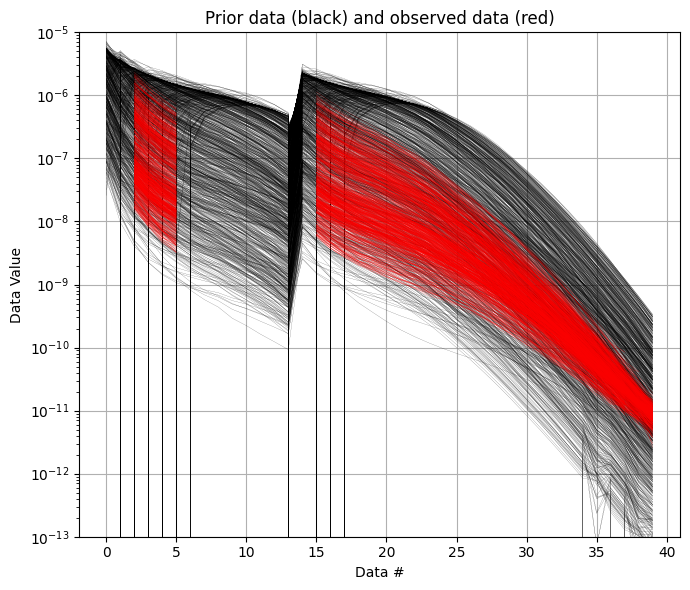

True

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

File /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5 allready exists
Overwriting...
Loading data from ESBJERG_ALL.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 28061/40 data
Loading prior data from PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 50000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=ESBJERG_ALL.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


Rejection Sampling:   0%|                                                                    | 0/2807 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                           | 7/2807 [00:00<00:43, 63.73it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                           | 7/2806 [00:00<00:47, 58.45it/s]

Rejection Sampling:   0%|▏                                                           | 6/2806 [00:00<00:51, 53.95it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                           | 6/2806 [00:00<00:55, 50.47it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                            | 5/2806 [00:00<00:59, 46.93it/s]

Rejection Sampling:   0%|▎                                                          | 14/2807 [00:00<00:55, 50.42it/s]

Rejection Sampling:   0%|▎                                                          | 13/2806 [00:00<00:57, 48.23it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                          | 12/2806 [00:00<01:00, 46.12it/s]

Rejection Sampling:   0%|                                                            | 5/2806 [00:00<01:10, 39.73it/s]

Rejection Sampling:   0%|                                                            | 4/2806 [00:00<01:16, 36.53it/s]

Rejection Sampling:   0%|▏                                                          | 10/2806 [00:00<01:06, 41.77it/s]

Rejection Sampling:   0%|▎                                                          | 12/2806 [00:00<01:04, 43.07it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                          | 18/2806 [00:00<01:04, 43.37it/s]

Rejection Sampling:   0%|▏                                                           | 9/2806 [00:00<01:12, 38.50it/s]

Rejection Sampling:   0%|                                                            | 2/2806 [00:00<02:53, 16.12it/s]

Rejection Sampling:   1%|▍                                                          | 20/2807 [00:00<01:05, 42.25it/s]

Rejection Sampling:   1%|▎                                                          | 17/2806 [00:00<01:06, 42.00it/s]

Rejection Sampling:   0%|                                                                    | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   1%|▎                                                          | 15/2806 [00:00<01:11, 39.16it/s]

Rejection Sampling:   0%|                                                            | 4/2806 [00:00<01:16, 36.46it/s]

Rejection Sampling:   0%|▏                                                           | 8/2806 [00:00<01:46, 26.19it/s]

Rejection Sampling:   1%|▎                                                          | 17/2806 [00:00<01:16, 36.55it/s]

Rejection Sampling:   0%|                                                            | 5/2806 [00:00<02:11, 21.34it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:00<01:09, 40.15it/s]

Rejection Sampling:   1%|▌                                                          | 25/2807 [00:00<01:11, 38.88it/s]

Rejection Sampling:   0%|                                                            | 3/2806 [00:00<01:36, 28.94it/s]

Rejection Sampling:   1%|▍                                                          | 19/2806 [00:00<01:14, 37.29it/s]

Rejection Sampling:   1%|▍                                                          | 22/2806 [00:00<01:18, 35.25it/s]

Rejection Sampling:   0%|▏                                                           | 8/2806 [00:00<01:31, 30.41it/s]

Rejection Sampling:   1%|▍                                                          | 21/2806 [00:00<01:18, 35.66it/s]

Rejection Sampling:   0%|▎                                                          | 12/2806 [00:00<01:38, 28.27it/s]

Rejection Sampling:   0%|▏                                                           | 9/2806 [00:00<01:43, 27.15it/s]

Rejection Sampling:   0%|▎                                                          | 13/2806 [00:00<02:03, 22.66it/s]

Rejection Sampling:   1%|▌                                                          | 28/2806 [00:00<01:12, 38.39it/s]

Rejection Sampling:   0%|▏                                                           | 7/2806 [00:00<01:26, 32.50it/s]

Rejection Sampling:   1%|▌                                                          | 29/2807 [00:00<01:19, 34.84it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:00<01:15, 36.92it/s]

Rejection Sampling:   0%|▎                                                          | 12/2806 [00:00<01:24, 32.98it/s]

Rejection Sampling:   1%|▌                                                          | 26/2806 [00:00<01:26, 32.21it/s]

Rejection Sampling:   0%|▎                                                          | 13/2806 [00:00<01:32, 30.34it/s]

Rejection Sampling:   1%|▌                                                          | 25/2806 [00:00<01:27, 31.67it/s]

Rejection Sampling:   0%|▏                                                          | 11/2806 [00:00<01:22, 33.90it/s]

Rejection Sampling:   1%|▋                                                          | 32/2806 [00:00<01:19, 35.07it/s]

Rejection Sampling:   1%|▋                                                          | 33/2807 [00:00<01:19, 35.07it/s]

Rejection Sampling:   1%|▌                                                          | 27/2806 [00:00<01:21, 34.23it/s]

Rejection Sampling:   1%|▎                                                          | 15/2806 [00:00<02:12, 21.02it/s]

Rejection Sampling:   1%|▎                                                          | 16/2806 [00:00<02:16, 20.43it/s]

Rejection Sampling:   1%|▋                                                          | 30/2806 [00:00<01:25, 32.46it/s]

Rejection Sampling:   1%|▎                                                          | 17/2806 [00:00<01:27, 31.88it/s]

Rejection Sampling:   1%|▌                                                          | 29/2806 [00:00<01:26, 32.15it/s]

Rejection Sampling:   1%|▎                                                          | 15/2806 [00:00<01:21, 34.41it/s]

Rejection Sampling:   1%|▎                                                          | 16/2806 [00:00<01:43, 27.05it/s]

Rejection Sampling:   1%|▊                                                          | 37/2807 [00:00<01:19, 34.88it/s]

Rejection Sampling:   1%|▊                                                          | 36/2806 [00:00<01:19, 34.77it/s]

Rejection Sampling:   1%|▍                                                          | 20/2806 [00:00<01:56, 23.88it/s]

Rejection Sampling:   1%|▋                                                          | 31/2806 [00:00<01:24, 32.96it/s]

Rejection Sampling:   1%|▍                                                          | 21/2806 [00:00<01:25, 32.43it/s]

Rejection Sampling:   1%|▋                                                          | 34/2806 [00:00<01:26, 32.00it/s]

Rejection Sampling:   1%|▋                                                          | 33/2806 [00:00<01:25, 32.49it/s]

Rejection Sampling:   1%|▍                                                          | 19/2806 [00:00<01:21, 34.02it/s]

Rejection Sampling:   1%|▍                                                          | 19/2806 [00:00<01:43, 26.95it/s]

Rejection Sampling:   1%|▍                                                          | 18/2806 [00:00<02:32, 18.34it/s]

Rejection Sampling:   1%|▊                                                          | 41/2807 [00:01<01:20, 34.52it/s]

Rejection Sampling:   1%|▊                                                          | 40/2806 [00:01<01:20, 34.44it/s]

Rejection Sampling:   1%|▋                                                          | 35/2806 [00:01<01:27, 31.74it/s]

Rejection Sampling:   1%|▌                                                          | 25/2806 [00:00<01:23, 33.13it/s]

Rejection Sampling:   1%|▊                                                          | 38/2806 [00:01<01:22, 33.39it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:00<02:09, 21.55it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:00<01:21, 34.20it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:00<01:34, 29.45it/s]

Rejection Sampling:   1%|▊                                                          | 37/2806 [00:01<01:26, 32.06it/s]

Rejection Sampling:   2%|▉                                                          | 45/2807 [00:01<01:21, 33.80it/s]

Rejection Sampling:   2%|▉                                                          | 44/2806 [00:01<01:25, 32.24it/s]

Rejection Sampling:   1%|▌                                                          | 29/2806 [00:00<01:23, 33.35it/s]

Rejection Sampling:   1%|▊                                                          | 39/2806 [00:01<01:25, 32.28it/s]

Rejection Sampling:   1%|▌                                                          | 27/2806 [00:01<01:52, 24.80it/s]

Rejection Sampling:   1%|▌                                                          | 27/2806 [00:00<01:21, 34.24it/s]

Rejection Sampling:   1%|▍                                                          | 21/2806 [00:01<02:44, 16.97it/s]

Rejection Sampling:   1%|▊                                                          | 41/2806 [00:01<01:25, 32.47it/s]

Rejection Sampling:   1%|▉                                                          | 42/2806 [00:01<01:31, 30.26it/s]

Rejection Sampling:   2%|█                                                          | 49/2807 [00:01<01:20, 34.14it/s]

Rejection Sampling:   2%|█                                                          | 48/2806 [00:01<01:24, 32.82it/s]

Rejection Sampling:   1%|▌                                                          | 27/2806 [00:00<01:45, 26.30it/s]

Rejection Sampling:   1%|▋                                                          | 33/2806 [00:01<01:21, 33.98it/s]

Rejection Sampling:   2%|▉                                                          | 43/2806 [00:01<01:26, 31.84it/s]

Rejection Sampling:   1%|▋                                                          | 30/2806 [00:01<01:47, 25.90it/s]

Rejection Sampling:   1%|▋                                                          | 31/2806 [00:00<01:22, 33.68it/s]

Rejection Sampling:   2%|▉                                                          | 45/2806 [00:01<01:23, 33.04it/s]

Rejection Sampling:   1%|▍                                                          | 23/2806 [00:01<02:50, 16.33it/s]

Rejection Sampling:   2%|█                                                          | 53/2807 [00:01<01:20, 34.13it/s]

Rejection Sampling:   2%|█                                                          | 52/2806 [00:01<01:21, 33.85it/s]

Rejection Sampling:   2%|▉                                                          | 46/2806 [00:01<01:37, 28.18it/s]

Rejection Sampling:   1%|▊                                                          | 37/2806 [00:01<01:20, 34.37it/s]

Rejection Sampling:   2%|▉                                                          | 47/2806 [00:01<01:23, 33.09it/s]

Rejection Sampling:   1%|▋                                                          | 30/2806 [00:01<01:53, 24.38it/s]

Rejection Sampling:   1%|▋                                                          | 35/2806 [00:01<01:22, 33.69it/s]

Rejection Sampling:   2%|█                                                          | 49/2806 [00:01<01:23, 33.13it/s]

Rejection Sampling:   2%|█▏                                                         | 57/2807 [00:01<01:20, 33.97it/s]

Rejection Sampling:   1%|▌                                                          | 25/2806 [00:01<02:55, 15.82it/s]

Rejection Sampling:   2%|█▏                                                         | 56/2806 [00:01<01:20, 34.18it/s]

Rejection Sampling:   2%|█                                                          | 50/2806 [00:01<01:33, 29.48it/s]

Rejection Sampling:   1%|▋                                                          | 33/2806 [00:01<02:10, 21.19it/s]

Rejection Sampling:   1%|▊                                                          | 41/2806 [00:01<01:19, 34.72it/s]

Rejection Sampling:   2%|█                                                          | 51/2806 [00:01<01:23, 33.12it/s]

Rejection Sampling:   1%|▋                                                          | 34/2806 [00:01<01:42, 27.03it/s]

Rejection Sampling:   1%|▊                                                          | 39/2806 [00:01<01:22, 33.37it/s]

Rejection Sampling:   2%|█                                                          | 53/2806 [00:01<01:22, 33.25it/s]

Rejection Sampling:   2%|█▎                                                         | 61/2807 [00:01<01:21, 33.59it/s]

Rejection Sampling:   1%|▌                                                          | 27/2806 [00:01<02:58, 15.58it/s]

Rejection Sampling:   2%|█▏                                                         | 54/2806 [00:01<01:30, 30.51it/s]

Rejection Sampling:   1%|▊                                                          | 36/2806 [00:01<02:03, 22.37it/s]

Rejection Sampling:   2%|█▎                                                         | 60/2806 [00:01<01:26, 31.61it/s]

Rejection Sampling:   2%|▉                                                          | 45/2806 [00:01<01:20, 34.26it/s]

Rejection Sampling:   2%|█▏                                                         | 55/2806 [00:01<01:23, 33.13it/s]

Rejection Sampling:   1%|▊                                                          | 38/2806 [00:01<01:35, 28.94it/s]

Rejection Sampling:   2%|█▏                                                         | 57/2806 [00:01<01:21, 33.84it/s]

Rejection Sampling:   2%|▉                                                          | 43/2806 [00:01<01:22, 33.32it/s]

Rejection Sampling:   2%|█▎                                                         | 65/2807 [00:01<01:21, 33.64it/s]

Rejection Sampling:   2%|█                                                          | 49/2806 [00:01<01:19, 34.59it/s]

Rejection Sampling:   1%|▊                                                          | 40/2806 [00:01<01:49, 25.34it/s]

Rejection Sampling:   1%|▌                                                          | 29/2806 [00:01<03:00, 15.36it/s]

Rejection Sampling:   2%|█▏                                                         | 58/2806 [00:01<01:31, 30.12it/s]

Rejection Sampling:   2%|█▎                                                         | 64/2806 [00:01<01:30, 30.33it/s]

Rejection Sampling:   2%|█▏                                                         | 59/2806 [00:01<01:23, 32.78it/s]

Rejection Sampling:   2%|█▎                                                         | 61/2806 [00:01<01:20, 33.91it/s]

Rejection Sampling:   2%|▉                                                          | 47/2806 [00:01<01:22, 33.51it/s]

Rejection Sampling:   2%|█▍                                                         | 69/2807 [00:01<01:21, 33.64it/s]

Rejection Sampling:   1%|▊                                                          | 41/2806 [00:01<01:52, 24.59it/s]

Rejection Sampling:   2%|▉                                                          | 44/2806 [00:01<01:39, 27.66it/s]

Rejection Sampling:   2%|█▎                                                         | 62/2806 [00:01<01:26, 31.65it/s]

Rejection Sampling:   1%|▋                                                          | 31/2806 [00:01<03:04, 15.02it/s]

Rejection Sampling:   2%|█▍                                                         | 68/2806 [00:01<01:26, 31.47it/s]

Rejection Sampling:   2%|█▎                                                         | 63/2806 [00:01<01:21, 33.56it/s]

Rejection Sampling:   2%|█                                                          | 51/2806 [00:01<01:22, 33.59it/s]

Rejection Sampling:   2%|█▎                                                         | 65/2806 [00:01<01:21, 33.82it/s]

Rejection Sampling:   3%|█▌                                                         | 73/2807 [00:02<01:21, 33.62it/s]

Rejection Sampling:   2%|▉                                                          | 45/2806 [00:01<01:42, 27.06it/s]

Rejection Sampling:   2%|█                                                          | 53/2806 [00:01<01:41, 27.09it/s]

Rejection Sampling:   2%|█▍                                                         | 66/2806 [00:02<01:23, 32.81it/s]

Rejection Sampling:   3%|█▌                                                         | 72/2806 [00:02<01:25, 32.15it/s]

Rejection Sampling:   1%|▋                                                          | 35/2806 [00:01<02:19, 19.84it/s]

Rejection Sampling:   2%|█▍                                                         | 67/2806 [00:01<01:25, 32.14it/s]

Rejection Sampling:   2%|▉                                                          | 47/2806 [00:01<01:55, 23.87it/s]

Rejection Sampling:   2%|█▏                                                         | 55/2806 [00:01<01:21, 33.82it/s]

Rejection Sampling:   3%|█▌                                                         | 77/2807 [00:02<01:20, 34.09it/s]

Rejection Sampling:   2%|█▏                                                         | 57/2806 [00:01<01:33, 29.47it/s]

Rejection Sampling:   2%|█▍                                                         | 70/2806 [00:02<01:21, 33.61it/s]

Rejection Sampling:   3%|█▌                                                         | 76/2806 [00:02<01:23, 32.86it/s]

Rejection Sampling:   1%|▊                                                          | 39/2806 [00:01<01:56, 23.78it/s]

Rejection Sampling:   2%|█                                                          | 51/2806 [00:02<01:44, 26.44it/s]

Rejection Sampling:   2%|█▍                                                         | 69/2806 [00:02<01:44, 26.12it/s]

Rejection Sampling:   2%|█▏                                                         | 59/2806 [00:01<01:21, 33.84it/s]

Rejection Sampling:   2%|█                                                          | 48/2806 [00:01<02:07, 21.60it/s]

Rejection Sampling:   3%|█▋                                                         | 81/2807 [00:02<01:20, 33.75it/s]

Rejection Sampling:   2%|█▎                                                         | 61/2806 [00:01<01:28, 31.04it/s]

Rejection Sampling:   3%|█▍                                                         | 71/2806 [00:02<01:32, 29.56it/s]

Rejection Sampling:   3%|█▌                                                         | 74/2806 [00:02<01:22, 33.26it/s]

Rejection Sampling:   3%|█▋                                                         | 80/2806 [00:02<01:23, 32.66it/s]

Rejection Sampling:   3%|█▌                                                         | 73/2806 [00:02<01:38, 27.74it/s]

Rejection Sampling:   2%|█▎                                                         | 63/2806 [00:01<01:22, 33.35it/s]

Rejection Sampling:   2%|█▏                                                         | 55/2806 [00:02<01:38, 28.06it/s]

Rejection Sampling:   3%|█▊                                                         | 85/2807 [00:02<01:21, 33.42it/s]

Rejection Sampling:   2%|█▎                                                         | 65/2806 [00:02<01:26, 31.51it/s]

Rejection Sampling:   3%|█▌                                                         | 75/2806 [00:02<01:29, 30.55it/s]

Rejection Sampling:   1%|▉                                                          | 42/2806 [00:02<02:16, 20.28it/s]

Rejection Sampling:   3%|█▋                                                         | 78/2806 [00:02<01:21, 33.36it/s]

Rejection Sampling:   3%|█▊                                                         | 84/2806 [00:02<01:22, 33.17it/s]

Rejection Sampling:   2%|█                                                          | 51/2806 [00:02<02:23, 19.15it/s]

Rejection Sampling:   3%|█▌                                                         | 77/2806 [00:02<01:32, 29.61it/s]

Rejection Sampling:   2%|█▍                                                         | 67/2806 [00:01<01:20, 33.86it/s]

Rejection Sampling:   3%|█▊                                                         | 89/2807 [00:02<01:20, 33.87it/s]

Rejection Sampling:   2%|█▍                                                         | 69/2806 [00:02<01:24, 32.48it/s]

Rejection Sampling:   3%|█▋                                                         | 82/2806 [00:02<01:21, 33.62it/s]

Rejection Sampling:   2%|▉                                                          | 46/2806 [00:02<01:59, 23.13it/s]

Rejection Sampling:   2%|█▏                                                         | 58/2806 [00:02<01:57, 23.43it/s]

Rejection Sampling:   3%|█▊                                                         | 88/2806 [00:02<01:21, 33.32it/s]

Rejection Sampling:   3%|█▋                                                         | 79/2806 [00:02<01:38, 27.72it/s]

Rejection Sampling:   3%|█▍                                                         | 71/2806 [00:02<01:21, 33.66it/s]

Rejection Sampling:   3%|█▋                                                         | 81/2806 [00:02<01:29, 30.56it/s]

Rejection Sampling:   3%|█▉                                                         | 93/2807 [00:02<01:20, 33.62it/s]

Rejection Sampling:   3%|█▌                                                         | 73/2806 [00:02<01:23, 32.63it/s]

Rejection Sampling:   3%|█▊                                                         | 86/2806 [00:02<01:21, 33.28it/s]

Rejection Sampling:   2%|█▏                                                         | 54/2806 [00:02<02:37, 17.46it/s]

Rejection Sampling:   2%|█▎                                                         | 62/2806 [00:02<01:46, 25.80it/s]

Rejection Sampling:   3%|█▋                                                         | 83/2806 [00:02<01:33, 29.11it/s]

Rejection Sampling:   3%|█▉                                                         | 92/2806 [00:02<01:22, 33.10it/s]

Rejection Sampling:   3%|█▊                                                         | 85/2806 [00:02<01:27, 31.11it/s]

Rejection Sampling:   3%|█▌                                                         | 75/2806 [00:02<01:22, 33.25it/s]

Rejection Sampling:   2%|█                                                          | 49/2806 [00:02<02:17, 20.03it/s]

Rejection Sampling:   3%|█▌                                                         | 77/2806 [00:02<01:23, 32.69it/s]

Rejection Sampling:   3%|██                                                         | 97/2807 [00:02<01:21, 33.29it/s]

Rejection Sampling:   3%|█▉                                                         | 90/2806 [00:02<01:21, 33.18it/s]

Rejection Sampling:   2%|█▏                                                         | 56/2806 [00:02<02:41, 16.98it/s]

Rejection Sampling:   2%|█▍                                                         | 66/2806 [00:02<01:39, 27.61it/s]

Rejection Sampling:   3%|██                                                         | 96/2806 [00:02<01:21, 33.08it/s]

Rejection Sampling:   3%|█▊                                                         | 87/2806 [00:02<01:30, 30.15it/s]

Rejection Sampling:   3%|█▋                                                         | 79/2806 [00:02<01:21, 33.44it/s]

Rejection Sampling:   3%|█▊                                                         | 89/2806 [00:02<01:25, 31.83it/s]

Rejection Sampling:   2%|█                                                          | 52/2806 [00:02<02:10, 21.18it/s]

Rejection Sampling:   3%|█▋                                                         | 81/2806 [00:02<01:22, 32.99it/s]

Rejection Sampling:   4%|██                                                        | 101/2807 [00:02<01:20, 33.44it/s]

Rejection Sampling:   3%|█▉                                                         | 94/2806 [00:02<01:21, 33.43it/s]

Rejection Sampling:   2%|█▍                                                         | 69/2806 [00:02<01:37, 28.15it/s]

Rejection Sampling:   4%|██                                                        | 100/2806 [00:02<01:21, 33.39it/s]

Rejection Sampling:   2%|█▏                                                         | 58/2806 [00:02<02:50, 16.07it/s]

Rejection Sampling:   3%|█▋                                                         | 83/2806 [00:02<01:20, 33.70it/s]

Rejection Sampling:   3%|█▉                                                         | 93/2806 [00:02<01:27, 30.85it/s]

Rejection Sampling:   2%|█▏                                                         | 56/2806 [00:02<01:53, 24.16it/s]

Rejection Sampling:   4%|██▏                                                       | 105/2807 [00:02<01:20, 33.75it/s]

Rejection Sampling:   3%|█▊                                                         | 85/2806 [00:02<01:21, 33.32it/s]

Rejection Sampling:   3%|██                                                         | 98/2806 [00:02<01:19, 33.87it/s]

Rejection Sampling:   3%|█▌                                                         | 72/2806 [00:02<01:39, 27.59it/s]

Rejection Sampling:   4%|██▏                                                       | 104/2806 [00:03<01:20, 33.69it/s]

Rejection Sampling:   3%|█▉                                                         | 91/2806 [00:02<01:50, 24.56it/s]

Rejection Sampling:   3%|█▊                                                         | 87/2806 [00:02<01:20, 33.78it/s]

Rejection Sampling:   2%|█▎                                                         | 60/2806 [00:02<02:54, 15.78it/s]

Rejection Sampling:   4%|██▎                                                       | 109/2807 [00:03<01:20, 33.71it/s]

Rejection Sampling:   3%|█▊                                                         | 89/2806 [00:02<01:21, 33.47it/s]

Rejection Sampling:   2%|█▎                                                         | 60/2806 [00:02<01:43, 26.55it/s]

Rejection Sampling:   3%|█▌                                                         | 76/2806 [00:02<01:33, 29.23it/s]

Rejection Sampling:   4%|██                                                        | 102/2806 [00:03<01:20, 33.59it/s]

Rejection Sampling:   3%|██                                                         | 97/2806 [00:03<01:36, 28.13it/s]

Rejection Sampling:   4%|██▏                                                       | 108/2806 [00:03<01:20, 33.52it/s]

Rejection Sampling:   3%|█▉                                                         | 91/2806 [00:02<01:21, 33.46it/s]

Rejection Sampling:   2%|█▎                                                         | 62/2806 [00:02<02:57, 15.49it/s]

Rejection Sampling:   4%|██▎                                                       | 113/2807 [00:03<01:20, 33.38it/s]

Rejection Sampling:   2%|█▎                                                         | 64/2806 [00:02<01:36, 28.28it/s]

Rejection Sampling:   3%|█▉                                                         | 93/2806 [00:02<01:21, 33.21it/s]

Rejection Sampling:   3%|█▉                                                         | 94/2806 [00:03<02:08, 21.06it/s]

Rejection Sampling:   4%|██▏                                                       | 106/2806 [00:03<01:21, 33.31it/s]

Rejection Sampling:   3%|█▋                                                         | 80/2806 [00:03<01:30, 30.25it/s]

Rejection Sampling:   4%|██                                                        | 101/2806 [00:03<01:29, 30.28it/s]

Rejection Sampling:   4%|██▎                                                       | 112/2806 [00:03<01:21, 33.23it/s]

Rejection Sampling:   3%|█▉                                                         | 95/2806 [00:02<01:21, 33.17it/s]

Rejection Sampling:   2%|█▎                                                         | 64/2806 [00:02<02:56, 15.50it/s]

Rejection Sampling:   4%|██▍                                                       | 117/2807 [00:03<01:21, 33.07it/s]

Rejection Sampling:   2%|█▍                                                         | 68/2806 [00:03<01:32, 29.44it/s]

Rejection Sampling:   3%|██                                                         | 97/2806 [00:03<01:22, 32.97it/s]

Rejection Sampling:   4%|██▎                                                       | 110/2806 [00:03<01:21, 33.06it/s]

Rejection Sampling:   3%|█▊                                                         | 84/2806 [00:03<01:27, 30.93it/s]

Rejection Sampling:   4%|██▏                                                       | 105/2806 [00:03<01:27, 31.00it/s]

Rejection Sampling:   3%|██                                                         | 97/2806 [00:03<02:07, 21.17it/s]

Rejection Sampling:   4%|██▍                                                       | 116/2806 [00:03<01:21, 33.06it/s]

Rejection Sampling:   4%|██                                                         | 99/2806 [00:02<01:21, 33.10it/s]

Rejection Sampling:   4%|██▌                                                       | 121/2807 [00:03<01:21, 33.09it/s]

Rejection Sampling:   4%|██                                                        | 101/2806 [00:03<01:21, 33.01it/s]

Rejection Sampling:   2%|█▍                                                         | 67/2806 [00:03<02:34, 17.70it/s]

Rejection Sampling:   3%|█▊                                                         | 88/2806 [00:03<01:26, 31.58it/s]

Rejection Sampling:   4%|██▎                                                       | 114/2806 [00:03<01:21, 33.05it/s]

Rejection Sampling:   4%|██▎                                                       | 109/2806 [00:03<01:25, 31.58it/s]

Rejection Sampling:   4%|██▍                                                       | 120/2806 [00:03<01:21, 32.96it/s]

Rejection Sampling:   4%|██                                                        | 100/2806 [00:03<02:15, 19.99it/s]

Rejection Sampling:   4%|██▏                                                       | 103/2806 [00:03<01:22, 32.94it/s]

Rejection Sampling:   4%|██▌                                                       | 125/2807 [00:03<01:21, 32.90it/s]

Rejection Sampling:   4%|██▏                                                       | 105/2806 [00:03<01:22, 32.83it/s]

Rejection Sampling:   3%|█▍                                                         | 71/2806 [00:03<02:05, 21.80it/s]

Rejection Sampling:   3%|█▌                                                         | 72/2806 [00:03<01:59, 22.80it/s]

Rejection Sampling:   3%|█▉                                                         | 92/2806 [00:03<01:24, 31.96it/s]

Rejection Sampling:   4%|██▍                                                       | 118/2806 [00:03<01:21, 33.00it/s]

Rejection Sampling:   4%|██▎                                                       | 113/2806 [00:03<01:24, 31.94it/s]

Rejection Sampling:   4%|██▏                                                       | 107/2806 [00:03<01:21, 32.97it/s]

Rejection Sampling:   4%|██▏                                                       | 104/2806 [00:03<01:57, 23.00it/s]

Rejection Sampling:   4%|██▌                                                       | 124/2806 [00:03<01:33, 28.78it/s]

Rejection Sampling:   5%|██▋                                                       | 129/2807 [00:03<01:21, 32.93it/s]

Rejection Sampling:   4%|██▎                                                       | 109/2806 [00:03<01:22, 32.89it/s]

Rejection Sampling:   4%|██▌                                                       | 122/2806 [00:03<01:21, 32.93it/s]

Rejection Sampling:   4%|██▍                                                       | 117/2806 [00:03<01:23, 32.17it/s]

Rejection Sampling:   3%|██                                                         | 96/2806 [00:03<01:24, 32.13it/s]

Rejection Sampling:   3%|█▌                                                         | 74/2806 [00:03<02:17, 19.82it/s]

Rejection Sampling:   3%|█▌                                                         | 75/2806 [00:03<02:13, 20.48it/s]

Rejection Sampling:   4%|██▎                                                       | 111/2806 [00:03<01:21, 32.92it/s]

Rejection Sampling:   4%|██▏                                                       | 108/2806 [00:03<01:45, 25.52it/s]

Rejection Sampling:   5%|██▋                                                       | 133/2807 [00:03<01:20, 33.11it/s]

Rejection Sampling:   4%|██▎                                                       | 113/2806 [00:03<01:21, 33.10it/s]

Rejection Sampling:   5%|██▋                                                       | 128/2806 [00:03<01:29, 29.84it/s]

Rejection Sampling:   4%|██▌                                                       | 126/2806 [00:03<01:20, 33.10it/s]

Rejection Sampling:   4%|██▌                                                       | 121/2806 [00:03<01:22, 32.53it/s]

Rejection Sampling:   3%|█▌                                                         | 77/2806 [00:03<02:05, 21.81it/s]

Rejection Sampling:   4%|██▍                                                       | 115/2806 [00:03<01:21, 33.03it/s]

Rejection Sampling:   4%|██                                                        | 100/2806 [00:03<01:35, 28.23it/s]

Rejection Sampling:   4%|██▍                                                       | 117/2806 [00:03<01:21, 32.98it/s]

Rejection Sampling:   5%|██▊                                                       | 137/2807 [00:03<01:21, 32.89it/s]

Rejection Sampling:   5%|██▋                                                       | 132/2806 [00:03<01:27, 30.60it/s]

Rejection Sampling:   4%|██▎                                                       | 111/2806 [00:03<01:53, 23.67it/s]

Rejection Sampling:   5%|██▋                                                       | 130/2806 [00:03<01:21, 32.81it/s]

Rejection Sampling:   4%|██▌                                                       | 125/2806 [00:03<01:22, 32.49it/s]

Rejection Sampling:   3%|█▋                                                         | 81/2806 [00:03<01:47, 25.28it/s]

Rejection Sampling:   3%|█▋                                                         | 78/2806 [00:03<02:25, 18.72it/s]

Rejection Sampling:   4%|██▍                                                       | 119/2806 [00:03<01:21, 33.00it/s]

Rejection Sampling:   4%|██▌                                                       | 121/2806 [00:03<01:21, 33.04it/s]

Rejection Sampling:   5%|██▊                                                       | 136/2806 [00:04<01:25, 31.39it/s]

Rejection Sampling:   4%|██▍                                                       | 115/2806 [00:03<01:42, 26.28it/s]

Rejection Sampling:   5%|██▉                                                       | 141/2807 [00:04<01:20, 33.03it/s]

Rejection Sampling:   5%|██▊                                                       | 134/2806 [00:04<01:20, 33.10it/s]

Rejection Sampling:   3%|█▊                                                         | 85/2806 [00:03<01:36, 28.27it/s]

Rejection Sampling:   4%|██▏                                                       | 103/2806 [00:03<01:52, 24.10it/s]

Rejection Sampling:   5%|██▋                                                       | 129/2806 [00:04<01:27, 30.53it/s]

Rejection Sampling:   4%|██▌                                                       | 123/2806 [00:03<01:21, 32.92it/s]

Rejection Sampling:   4%|██▍                                                       | 118/2806 [00:04<01:44, 25.75it/s]

Rejection Sampling:   5%|██▉                                                       | 140/2806 [00:04<01:24, 31.71it/s]

Rejection Sampling:   5%|██▉                                                       | 145/2807 [00:04<01:21, 32.86it/s]

Rejection Sampling:   4%|██▌                                                       | 125/2806 [00:03<01:21, 32.83it/s]

Rejection Sampling:   3%|█▋                                                         | 81/2806 [00:03<02:35, 17.55it/s]

Rejection Sampling:   4%|██▏                                                       | 107/2806 [00:04<01:43, 26.19it/s]

Rejection Sampling:   3%|█▊                                                         | 89/2806 [00:03<01:32, 29.44it/s]

Rejection Sampling:   5%|██▊                                                       | 138/2806 [00:04<01:21, 32.79it/s]

Rejection Sampling:   5%|██▋                                                       | 127/2806 [00:03<01:21, 32.68it/s]

Rejection Sampling:   5%|██▋                                                       | 133/2806 [00:04<01:35, 27.95it/s]

Rejection Sampling:   4%|██▌                                                       | 122/2806 [00:04<01:37, 27.56it/s]

Rejection Sampling:   5%|██▉                                                       | 144/2806 [00:04<01:23, 31.82it/s]

Rejection Sampling:   5%|███                                                       | 149/2807 [00:04<01:21, 32.63it/s]

Rejection Sampling:   5%|██▋                                                       | 129/2806 [00:04<01:22, 32.61it/s]

Rejection Sampling:   3%|█▋                                                         | 83/2806 [00:04<02:41, 16.89it/s]

Rejection Sampling:   5%|██▉                                                       | 142/2806 [00:04<01:21, 32.72it/s]

Rejection Sampling:   4%|██▎                                                       | 111/2806 [00:04<01:36, 27.89it/s]

Rejection Sampling:   5%|██▋                                                       | 131/2806 [00:03<01:21, 32.77it/s]

Rejection Sampling:   5%|██▊                                                       | 137/2806 [00:04<01:28, 30.20it/s]

Rejection Sampling:   3%|█▉                                                         | 93/2806 [00:04<01:48, 24.92it/s]

Rejection Sampling:   4%|██▌                                                       | 126/2806 [00:04<01:31, 29.19it/s]

Rejection Sampling:   5%|███▏                                                      | 153/2807 [00:04<01:20, 32.82it/s]

Rejection Sampling:   5%|███                                                       | 148/2806 [00:04<01:22, 32.23it/s]

Rejection Sampling:   5%|██▋                                                       | 133/2806 [00:04<01:21, 32.73it/s]

Rejection Sampling:   5%|███                                                       | 146/2806 [00:04<01:21, 32.74it/s]

Rejection Sampling:   3%|█▊                                                         | 85/2806 [00:04<02:48, 16.19it/s]

Rejection Sampling:   5%|██▉                                                       | 141/2806 [00:04<01:26, 30.95it/s]

Rejection Sampling:   5%|██▊                                                       | 135/2806 [00:04<01:21, 32.65it/s]

Rejection Sampling:   4%|██▎                                                       | 114/2806 [00:04<01:58, 22.74it/s]

Rejection Sampling:   6%|███▏                                                      | 157/2807 [00:04<01:20, 32.78it/s]

Rejection Sampling:   5%|███▏                                                      | 152/2806 [00:04<01:22, 32.36it/s]

Rejection Sampling:   5%|██▊                                                       | 137/2806 [00:04<01:21, 32.79it/s]

Rejection Sampling:   3%|██                                                         | 97/2806 [00:04<01:40, 26.83it/s]

Rejection Sampling:   5%|██▋                                                       | 130/2806 [00:04<01:28, 30.13it/s]

Rejection Sampling:   3%|█▊                                                         | 87/2806 [00:04<02:44, 16.54it/s]

Rejection Sampling:   5%|███                                                       | 150/2806 [00:04<01:21, 32.78it/s]

Rejection Sampling:   5%|██▉                                                       | 145/2806 [00:04<01:24, 31.65it/s]

Rejection Sampling:   6%|███▎                                                      | 161/2807 [00:04<01:20, 32.91it/s]

Rejection Sampling:   4%|██                                                        | 101/2806 [00:04<01:34, 28.57it/s]

Rejection Sampling:   5%|██▉                                                       | 141/2806 [00:04<01:20, 32.91it/s]

Rejection Sampling:   5%|██▊                                                       | 139/2806 [00:04<01:27, 30.62it/s]

Rejection Sampling:   5%|██▊                                                       | 134/2806 [00:04<01:26, 31.03it/s]

Rejection Sampling:   5%|███▏                                                      | 154/2806 [00:04<01:20, 32.95it/s]

Rejection Sampling:   3%|█▉                                                         | 91/2806 [00:04<02:11, 20.59it/s]

Rejection Sampling:   6%|███▏                                                      | 156/2806 [00:04<01:32, 28.52it/s]

Rejection Sampling:   4%|██▍                                                       | 117/2806 [00:04<02:15, 19.81it/s]

Rejection Sampling:   5%|███                                                       | 149/2806 [00:04<01:25, 30.93it/s]

Rejection Sampling:   4%|██▏                                                       | 105/2806 [00:04<01:29, 30.13it/s]

Rejection Sampling:   6%|███▍                                                      | 165/2807 [00:04<01:19, 33.31it/s]

Rejection Sampling:   5%|██▉                                                       | 145/2806 [00:04<01:19, 33.32it/s]

Rejection Sampling:   5%|██▊                                                       | 138/2806 [00:04<01:23, 31.98it/s]

Rejection Sampling:   3%|█▉                                                         | 94/2806 [00:04<02:00, 22.45it/s]

Rejection Sampling:   6%|███▎                                                      | 158/2806 [00:04<01:18, 33.56it/s]

Rejection Sampling:   5%|██▉                                                       | 143/2806 [00:04<01:35, 27.86it/s]

Rejection Sampling:   5%|███▏                                                      | 153/2806 [00:04<01:23, 31.70it/s]

Rejection Sampling:   6%|███▍                                                      | 169/2807 [00:04<01:17, 33.97it/s]

Rejection Sampling:   4%|██▎                                                       | 109/2806 [00:04<01:25, 31.58it/s]

Rejection Sampling:   5%|███                                                       | 149/2806 [00:04<01:18, 33.96it/s]

Rejection Sampling:   3%|██                                                         | 98/2806 [00:04<01:46, 25.45it/s]

Rejection Sampling:   6%|███▎                                                      | 162/2806 [00:04<01:17, 34.00it/s]

Rejection Sampling:   5%|██▉                                                       | 142/2806 [00:04<01:26, 30.77it/s]

Rejection Sampling:   6%|███▎                                                      | 159/2806 [00:04<01:53, 23.39it/s]

Rejection Sampling:   4%|██▍                                                       | 120/2806 [00:04<02:28, 18.04it/s]

Rejection Sampling:   5%|███                                                       | 146/2806 [00:04<01:36, 27.48it/s]

Rejection Sampling:   4%|██▎                                                       | 113/2806 [00:04<01:23, 32.08it/s]

Rejection Sampling:   6%|███▏                                                      | 157/2806 [00:04<01:23, 31.87it/s]

Rejection Sampling:   6%|███▌                                                      | 173/2807 [00:05<01:18, 33.71it/s]

Rejection Sampling:   6%|███▎                                                      | 163/2806 [00:05<01:42, 25.85it/s]

Rejection Sampling:   6%|███▍                                                      | 166/2806 [00:05<01:18, 33.73it/s]

Rejection Sampling:   5%|███                                                       | 146/2806 [00:04<01:24, 31.47it/s]

Rejection Sampling:   4%|██                                                        | 102/2806 [00:04<01:37, 27.60it/s]

Rejection Sampling:   5%|███                                                       | 150/2806 [00:04<01:31, 29.01it/s]

Rejection Sampling:   4%|██▌                                                       | 122/2806 [00:04<02:34, 17.42it/s]

Rejection Sampling:   5%|███▏                                                      | 153/2806 [00:04<01:36, 27.49it/s]

Rejection Sampling:   4%|██▍                                                       | 117/2806 [00:04<01:22, 32.48it/s]

Rejection Sampling:   6%|███▎                                                      | 161/2806 [00:05<01:21, 32.32it/s]

Rejection Sampling:   6%|███▋                                                      | 177/2807 [00:05<01:22, 31.93it/s]

Rejection Sampling:   6%|███▌                                                      | 170/2806 [00:05<01:18, 33.65it/s]

Rejection Sampling:   5%|███                                                       | 150/2806 [00:05<01:22, 32.04it/s]

Rejection Sampling:   6%|███▍                                                      | 167/2806 [00:05<01:35, 27.77it/s]

Rejection Sampling:   4%|██▏                                                       | 105/2806 [00:04<01:47, 25.08it/s]

Rejection Sampling:   5%|███▏                                                      | 154/2806 [00:04<01:27, 30.28it/s]

Rejection Sampling:   4%|██▌                                                       | 124/2806 [00:05<02:40, 16.70it/s]

Rejection Sampling:   4%|██▌                                                       | 121/2806 [00:04<01:21, 32.86it/s]

Rejection Sampling:   6%|███▍                                                      | 165/2806 [00:05<01:20, 32.75it/s]

Rejection Sampling:   6%|███▏                                                      | 156/2806 [00:04<01:46, 24.79it/s]

Rejection Sampling:   6%|███▋                                                      | 181/2807 [00:05<01:20, 32.71it/s]

Rejection Sampling:   5%|███▏                                                      | 154/2806 [00:05<01:21, 32.44it/s]

Rejection Sampling:   6%|███▌                                                      | 174/2806 [00:05<01:18, 33.56it/s]

Rejection Sampling:   6%|███▎                                                      | 158/2806 [00:04<01:24, 31.16it/s]

Rejection Sampling:   4%|██▎                                                       | 109/2806 [00:05<01:38, 27.37it/s]

Rejection Sampling:   6%|███▌                                                      | 170/2806 [00:05<01:49, 24.08it/s]

Rejection Sampling:   4%|██▌                                                       | 126/2806 [00:05<02:43, 16.36it/s]

Rejection Sampling:   6%|███▍                                                      | 169/2806 [00:05<01:20, 32.82it/s]

Rejection Sampling:   4%|██▌                                                       | 125/2806 [00:05<01:21, 32.89it/s]

Rejection Sampling:   6%|███▎                                                      | 160/2806 [00:05<01:36, 27.49it/s]

Rejection Sampling:   7%|███▊                                                      | 185/2807 [00:05<01:17, 33.70it/s]

Rejection Sampling:   6%|███▎                                                      | 158/2806 [00:05<01:20, 32.72it/s]

Rejection Sampling:   6%|███▋                                                      | 178/2806 [00:05<01:18, 33.51it/s]

Rejection Sampling:   6%|███▎                                                      | 162/2806 [00:04<01:23, 31.84it/s]

Rejection Sampling:   6%|███▌                                                      | 174/2806 [00:05<01:39, 26.40it/s]

Rejection Sampling:   4%|██▎                                                       | 112/2806 [00:05<01:51, 24.21it/s]

Rejection Sampling:   5%|██▋                                                       | 128/2806 [00:05<02:50, 15.75it/s]

Rejection Sampling:   7%|███▉                                                      | 189/2807 [00:05<01:16, 34.33it/s]

Rejection Sampling:   6%|███▍                                                      | 164/2806 [00:05<01:30, 29.12it/s]

Rejection Sampling:   5%|██▋                                                       | 129/2806 [00:05<01:20, 33.06it/s]

Rejection Sampling:   6%|███▊                                                      | 182/2806 [00:05<01:18, 33.46it/s]

Rejection Sampling:   6%|███▎                                                      | 162/2806 [00:05<01:20, 32.85it/s]

Rejection Sampling:   6%|███▍                                                      | 166/2806 [00:05<01:22, 32.17it/s]

Rejection Sampling:   6%|███▋                                                      | 178/2806 [00:05<01:33, 28.06it/s]

Rejection Sampling:   4%|██▍                                                       | 116/2806 [00:05<01:41, 26.39it/s]

Rejection Sampling:   5%|██▋                                                       | 130/2806 [00:05<02:49, 15.83it/s]

Rejection Sampling:   5%|██▋                                                       | 133/2806 [00:05<01:20, 33.20it/s]

Rejection Sampling:   7%|███▉                                                      | 193/2807 [00:05<01:17, 33.93it/s]

Rejection Sampling:   6%|███▍                                                      | 168/2806 [00:05<01:27, 30.27it/s]

Rejection Sampling:   6%|███▌                                                      | 173/2806 [00:05<01:48, 24.26it/s]

Rejection Sampling:   7%|███▊                                                      | 186/2806 [00:05<01:18, 33.49it/s]

Rejection Sampling:   6%|███▍                                                      | 166/2806 [00:05<01:19, 33.04it/s]

Rejection Sampling:   6%|███▌                                                      | 170/2806 [00:05<01:20, 32.81it/s]

Rejection Sampling:   6%|███▊                                                      | 182/2806 [00:05<01:28, 29.52it/s]

Rejection Sampling:   5%|██▋                                                       | 132/2806 [00:05<02:46, 16.02it/s]

Rejection Sampling:   4%|██▍                                                       | 120/2806 [00:05<01:36, 27.75it/s]

Rejection Sampling:   5%|██▊                                                       | 137/2806 [00:05<01:20, 33.34it/s]

Rejection Sampling:   6%|███▌                                                      | 172/2806 [00:05<01:24, 31.28it/s]

Rejection Sampling:   7%|████                                                      | 197/2807 [00:05<01:16, 33.91it/s]

Rejection Sampling:   7%|███▉                                                      | 190/2806 [00:05<01:17, 33.65it/s]

Rejection Sampling:   6%|███▌                                                      | 170/2806 [00:05<01:19, 33.36it/s]

Rejection Sampling:   6%|███▋                                                      | 176/2806 [00:05<01:51, 23.61it/s]

Rejection Sampling:   6%|███▌                                                      | 174/2806 [00:05<01:19, 33.27it/s]

Rejection Sampling:   7%|███▊                                                      | 186/2806 [00:05<01:24, 30.86it/s]

Rejection Sampling:   5%|██▊                                                       | 135/2806 [00:05<02:24, 18.55it/s]

Rejection Sampling:   4%|██▌                                                       | 124/2806 [00:05<01:31, 29.36it/s]

Rejection Sampling:   5%|██▉                                                       | 141/2806 [00:05<01:19, 33.49it/s]

Rejection Sampling:   7%|████                                                      | 194/2806 [00:05<01:17, 33.65it/s]

Rejection Sampling:   6%|███▌                                                      | 174/2806 [00:05<01:18, 33.44it/s]

Rejection Sampling:   6%|███▋                                                      | 180/2806 [00:05<01:41, 25.95it/s]

Rejection Sampling:   6%|███▋                                                      | 178/2806 [00:05<01:19, 33.04it/s]

Rejection Sampling:   7%|███▉                                                      | 190/2806 [00:05<01:22, 31.54it/s]

Rejection Sampling:   5%|██▊                                                       | 139/2806 [00:05<01:57, 22.70it/s]

Rejection Sampling:   5%|██▉                                                       | 145/2806 [00:05<01:19, 33.39it/s]

Rejection Sampling:   5%|██▋                                                       | 128/2806 [00:05<01:27, 30.43it/s]

Rejection Sampling:   6%|███▋                                                      | 176/2806 [00:05<01:51, 23.49it/s]

Rejection Sampling:   7%|████▏                                                     | 201/2807 [00:06<01:46, 24.56it/s]

Rejection Sampling:   7%|████                                                      | 198/2806 [00:05<01:17, 33.48it/s]

Rejection Sampling:   6%|███▋                                                      | 178/2806 [00:05<01:18, 33.36it/s]

Rejection Sampling:   7%|███▊                                                      | 184/2806 [00:05<01:34, 27.69it/s]

Rejection Sampling:   6%|███▊                                                      | 182/2806 [00:05<01:19, 33.20it/s]

Rejection Sampling:   7%|████                                                      | 194/2806 [00:06<01:21, 32.13it/s]

Rejection Sampling:   5%|██▉                                                       | 143/2806 [00:05<01:42, 25.89it/s]

Rejection Sampling:   5%|██▋                                                       | 132/2806 [00:05<01:25, 31.46it/s]

Rejection Sampling:   5%|███                                                       | 149/2806 [00:05<01:19, 33.56it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:06<01:17, 33.59it/s]

Rejection Sampling:   7%|████▏                                                     | 204/2807 [00:06<01:45, 24.74it/s]

Rejection Sampling:   7%|███▉                                                      | 188/2806 [00:06<01:30, 28.82it/s]

Rejection Sampling:   7%|███▊                                                      | 186/2806 [00:05<01:18, 33.41it/s]

Rejection Sampling:   7%|████                                                      | 198/2806 [00:06<01:20, 32.52it/s]

Rejection Sampling:   6%|███▋                                                      | 179/2806 [00:05<02:07, 20.54it/s]

Rejection Sampling:   5%|███                                                       | 147/2806 [00:06<01:34, 28.09it/s]

Rejection Sampling:   5%|██▊                                                       | 136/2806 [00:05<01:23, 31.98it/s]

Rejection Sampling:   7%|████▎                                                     | 206/2806 [00:06<01:17, 33.47it/s]

Rejection Sampling:   5%|███▏                                                      | 153/2806 [00:05<01:25, 31.09it/s]

Rejection Sampling:   7%|████▎                                                     | 208/2807 [00:06<01:36, 26.88it/s]

Rejection Sampling:   6%|███▊                                                      | 182/2806 [00:06<01:44, 25.14it/s]

Rejection Sampling:   7%|███▉                                                      | 190/2806 [00:05<01:18, 33.19it/s]

Rejection Sampling:   7%|███▉                                                      | 192/2806 [00:06<01:27, 29.87it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:06<01:19, 32.69it/s]

Rejection Sampling:   5%|███                                                       | 151/2806 [00:06<01:29, 29.66it/s]

Rejection Sampling:   7%|███▊                                                      | 183/2806 [00:06<01:53, 23.16it/s]

Rejection Sampling:   5%|██▉                                                       | 140/2806 [00:06<01:25, 31.32it/s]

Rejection Sampling:   6%|███▏                                                      | 157/2806 [00:05<01:22, 32.01it/s]

Rejection Sampling:   8%|████▍                                                     | 212/2807 [00:06<01:29, 28.84it/s]

Rejection Sampling:   7%|████                                                      | 194/2806 [00:05<01:17, 33.55it/s]

Rejection Sampling:   7%|███▊                                                      | 185/2806 [00:06<01:50, 23.62it/s]

Rejection Sampling:   7%|████▎                                                     | 210/2806 [00:06<01:26, 30.10it/s]

Rejection Sampling:   7%|████▎                                                     | 206/2806 [00:06<01:18, 33.20it/s]

Rejection Sampling:   7%|███▊                                                      | 187/2806 [00:06<01:41, 25.76it/s]

Rejection Sampling:   5%|██▉                                                       | 144/2806 [00:06<01:23, 31.96it/s]

Rejection Sampling:   8%|████▍                                                     | 216/2807 [00:06<01:26, 30.12it/s]

Rejection Sampling:   5%|███▏                                                      | 154/2806 [00:06<01:40, 26.36it/s]

Rejection Sampling:   6%|███▎                                                      | 161/2806 [00:06<01:21, 32.30it/s]

Rejection Sampling:   7%|████                                                      | 198/2806 [00:06<01:17, 33.56it/s]

Rejection Sampling:   7%|███▉                                                      | 189/2806 [00:06<01:40, 26.15it/s]

Rejection Sampling:   7%|████▎                                                     | 210/2806 [00:06<01:18, 33.20it/s]

Rejection Sampling:   7%|████                                                      | 196/2806 [00:06<01:54, 22.81it/s]

Rejection Sampling:   7%|███▉                                                      | 191/2806 [00:06<01:34, 27.68it/s]

Rejection Sampling:   5%|███                                                       | 148/2806 [00:06<01:22, 32.18it/s]

Rejection Sampling:   6%|███▍                                                      | 165/2806 [00:06<01:20, 32.71it/s]

Rejection Sampling:   6%|███▎                                                      | 158/2806 [00:06<01:33, 28.42it/s]

Rejection Sampling:   8%|████▌                                                     | 220/2807 [00:06<01:23, 30.98it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:06<01:17, 33.47it/s]

Rejection Sampling:   7%|███▉                                                      | 193/2806 [00:06<01:30, 28.83it/s]

Rejection Sampling:   8%|████▍                                                     | 214/2806 [00:06<01:43, 25.02it/s]

Rejection Sampling:   8%|████▍                                                     | 214/2806 [00:06<01:17, 33.29it/s]

Rejection Sampling:   7%|████                                                      | 195/2806 [00:06<01:29, 29.14it/s]

Rejection Sampling:   5%|███▏                                                      | 152/2806 [00:06<01:21, 32.41it/s]

Rejection Sampling:   6%|███▍                                                      | 169/2806 [00:06<01:20, 32.86it/s]

Rejection Sampling:   6%|███▎                                                      | 162/2806 [00:06<01:28, 29.78it/s]

Rejection Sampling:   8%|████▋                                                     | 224/2807 [00:06<01:21, 31.60it/s]

Rejection Sampling:   7%|████                                                      | 199/2806 [00:06<02:08, 20.24it/s]

Rejection Sampling:   7%|████▎                                                     | 206/2806 [00:06<01:17, 33.38it/s]

Rejection Sampling:   8%|████▍                                                     | 217/2806 [00:06<01:43, 24.99it/s]

Rejection Sampling:   7%|████                                                      | 197/2806 [00:06<01:26, 30.09it/s]

Rejection Sampling:   8%|████▌                                                     | 218/2806 [00:06<01:17, 33.27it/s]

Rejection Sampling:   6%|███▏                                                      | 156/2806 [00:06<01:22, 32.19it/s]

Rejection Sampling:   6%|███▌                                                      | 173/2806 [00:06<01:20, 32.89it/s]

Rejection Sampling:   6%|███▍                                                      | 166/2806 [00:06<01:25, 30.76it/s]

Rejection Sampling:   8%|████▋                                                     | 228/2807 [00:06<01:20, 32.06it/s]

Rejection Sampling:   8%|████▌                                                     | 221/2806 [00:06<01:35, 27.05it/s]

Rejection Sampling:   7%|████▎                                                     | 210/2806 [00:06<01:18, 33.22it/s]

Rejection Sampling:   7%|████▏                                                     | 201/2806 [00:06<01:24, 30.91it/s]

Rejection Sampling:   8%|████▌                                                     | 222/2806 [00:06<01:18, 33.01it/s]

Rejection Sampling:   7%|████                                                      | 199/2806 [00:06<01:44, 24.96it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:06<02:17, 18.88it/s]

Rejection Sampling:   8%|████▊                                                     | 232/2807 [00:06<01:19, 32.31it/s]

Rejection Sampling:   6%|███▋                                                      | 177/2806 [00:06<01:19, 32.88it/s]

Rejection Sampling:   6%|███▌                                                      | 170/2806 [00:06<01:24, 31.36it/s]

Rejection Sampling:   6%|███▎                                                      | 160/2806 [00:06<01:22, 31.91it/s]

Rejection Sampling:   8%|████▋                                                     | 225/2806 [00:06<01:29, 28.68it/s]

Rejection Sampling:   8%|████▍                                                     | 214/2806 [00:06<01:18, 33.15it/s]

Rejection Sampling:   8%|████▋                                                     | 226/2806 [00:07<01:17, 33.14it/s]

Rejection Sampling:   7%|████▏                                                     | 205/2806 [00:06<01:28, 29.41it/s]

Rejection Sampling:   8%|████▉                                                     | 236/2807 [00:07<01:18, 32.59it/s]

Rejection Sampling:   6%|███▋                                                      | 181/2806 [00:06<01:19, 32.99it/s]

Rejection Sampling:   6%|███▌                                                      | 174/2806 [00:06<01:22, 31.91it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:06<02:01, 21.44it/s]

Rejection Sampling:   6%|███▍                                                      | 164/2806 [00:06<01:27, 30.08it/s]

Rejection Sampling:   8%|████▋                                                     | 229/2806 [00:07<01:26, 29.85it/s]

Rejection Sampling:   8%|████▌                                                     | 218/2806 [00:06<01:18, 33.08it/s]

Rejection Sampling:   7%|████▏                                                     | 205/2806 [00:07<02:26, 17.72it/s]

Rejection Sampling:   7%|████▎                                                     | 209/2806 [00:07<01:25, 30.31it/s]

Rejection Sampling:   8%|████▊                                                     | 230/2806 [00:07<01:20, 32.02it/s]

Rejection Sampling:   9%|████▉                                                     | 240/2807 [00:07<01:18, 32.52it/s]

Rejection Sampling:   7%|███▊                                                      | 185/2806 [00:06<01:19, 32.78it/s]

Rejection Sampling:   7%|████▏                                                     | 205/2806 [00:06<01:53, 22.98it/s]

Rejection Sampling:   6%|███▋                                                      | 178/2806 [00:07<01:22, 32.04it/s]

Rejection Sampling:   6%|███▍                                                      | 168/2806 [00:07<01:25, 30.88it/s]

Rejection Sampling:   8%|████▊                                                     | 233/2806 [00:07<01:23, 30.71it/s]

Rejection Sampling:   8%|████▌                                                     | 222/2806 [00:06<01:18, 33.02it/s]

Rejection Sampling:   8%|████▍                                                     | 213/2806 [00:07<01:23, 31.09it/s]

Rejection Sampling:   7%|████▎                                                     | 207/2806 [00:07<02:34, 16.80it/s]

Rejection Sampling:   6%|███▊                                                      | 182/2806 [00:07<01:21, 32.31it/s]

Rejection Sampling:   9%|█████                                                     | 244/2807 [00:07<01:18, 32.60it/s]

Rejection Sampling:   7%|███▉                                                      | 189/2806 [00:06<01:19, 32.80it/s]

Rejection Sampling:   8%|████▊                                                     | 234/2806 [00:07<01:29, 28.76it/s]

Rejection Sampling:   6%|███▌                                                      | 172/2806 [00:07<01:24, 31.33it/s]

Rejection Sampling:   8%|████▉                                                     | 237/2806 [00:07<01:22, 31.22it/s]

Rejection Sampling:   8%|████▋                                                     | 226/2806 [00:06<01:18, 32.86it/s]

Rejection Sampling:   7%|████▎                                                     | 208/2806 [00:07<01:58, 21.97it/s]

Rejection Sampling:   8%|████▍                                                     | 217/2806 [00:07<01:22, 31.46it/s]

Rejection Sampling:   7%|████▎                                                     | 210/2806 [00:07<02:18, 18.77it/s]

Rejection Sampling:   7%|███▉                                                      | 193/2806 [00:07<01:20, 32.62it/s]

Rejection Sampling:   8%|████▉                                                     | 237/2806 [00:07<01:33, 27.49it/s]

Rejection Sampling:   7%|███▊                                                      | 186/2806 [00:07<01:21, 32.25it/s]

Rejection Sampling:   8%|████▍                                                     | 212/2806 [00:07<01:45, 24.67it/s]

Rejection Sampling:   6%|███▋                                                      | 176/2806 [00:07<01:23, 31.58it/s]

Rejection Sampling:   8%|████▊                                                     | 230/2806 [00:07<01:18, 32.66it/s]

Rejection Sampling:   9%|████▉                                                     | 241/2806 [00:07<01:21, 31.50it/s]

Rejection Sampling:   8%|████▍                                                     | 214/2806 [00:07<01:56, 22.19it/s]

Rejection Sampling:   8%|████▌                                                     | 221/2806 [00:07<01:27, 29.54it/s]

Rejection Sampling:   7%|████                                                      | 197/2806 [00:07<01:20, 32.57it/s]

Rejection Sampling:   7%|███▉                                                      | 190/2806 [00:07<01:20, 32.31it/s]

Rejection Sampling:   9%|█████                                                     | 248/2807 [00:07<01:47, 23.79it/s]

Rejection Sampling:   8%|████▍                                                     | 216/2806 [00:07<01:36, 26.78it/s]

Rejection Sampling:   8%|████▊                                                     | 234/2806 [00:07<01:18, 32.60it/s]

Rejection Sampling:   6%|███▋                                                      | 180/2806 [00:07<01:22, 31.83it/s]

Rejection Sampling:   9%|█████                                                     | 245/2806 [00:07<01:20, 31.80it/s]

Rejection Sampling:   8%|████▌                                                     | 218/2806 [00:07<01:43, 24.93it/s]

Rejection Sampling:   8%|████▋                                                     | 225/2806 [00:07<01:24, 30.43it/s]

Rejection Sampling:   9%|████▉                                                     | 240/2806 [00:07<01:56, 21.98it/s]

Rejection Sampling:   7%|████▏                                                     | 201/2806 [00:07<01:19, 32.85it/s]

Rejection Sampling:   7%|████                                                      | 194/2806 [00:07<01:19, 32.67it/s]

Rejection Sampling:   8%|████▉                                                     | 238/2806 [00:07<01:18, 32.87it/s]

Rejection Sampling:   9%|█████▏                                                    | 249/2806 [00:07<01:19, 32.26it/s]

Rejection Sampling:   8%|████▌                                                     | 220/2806 [00:07<01:30, 28.56it/s]

Rejection Sampling:   9%|█████▏                                                    | 252/2807 [00:07<01:38, 25.83it/s]

Rejection Sampling:   7%|███▊                                                      | 184/2806 [00:07<01:33, 28.08it/s]

Rejection Sampling:   8%|████▋                                                     | 229/2806 [00:07<01:22, 31.15it/s]

Rejection Sampling:   7%|████▏                                                     | 205/2806 [00:07<01:19, 32.70it/s]

Rejection Sampling:   7%|████                                                      | 198/2806 [00:07<01:20, 32.57it/s]

Rejection Sampling:   9%|█████                                                     | 243/2806 [00:07<02:00, 21.30it/s]

Rejection Sampling:   8%|████▌                                                     | 221/2806 [00:07<02:03, 20.97it/s]

Rejection Sampling:   9%|█████▏                                                    | 253/2806 [00:07<01:19, 32.22it/s]

Rejection Sampling:   9%|█████▎                                                    | 256/2807 [00:07<01:32, 27.45it/s]

Rejection Sampling:   8%|████▋                                                     | 224/2806 [00:07<01:27, 29.58it/s]

Rejection Sampling:   9%|█████                                                     | 242/2806 [00:07<01:18, 32.59it/s]

Rejection Sampling:   8%|████▊                                                     | 233/2806 [00:07<01:21, 31.55it/s]

Rejection Sampling:   7%|███▊                                                      | 187/2806 [00:07<01:40, 25.99it/s]

Rejection Sampling:   7%|████▎                                                     | 209/2806 [00:07<01:19, 32.75it/s]

Rejection Sampling:   7%|████▏                                                     | 202/2806 [00:07<01:19, 32.67it/s]

Rejection Sampling:   9%|█████                                                     | 247/2806 [00:07<01:45, 24.25it/s]

Rejection Sampling:   9%|█████▎                                                    | 257/2806 [00:07<01:18, 32.45it/s]

Rejection Sampling:   9%|█████▎                                                    | 260/2807 [00:07<01:28, 28.92it/s]

Rejection Sampling:   8%|████▋                                                     | 228/2806 [00:07<01:24, 30.54it/s]

Rejection Sampling:   9%|█████                                                     | 246/2806 [00:07<01:23, 30.52it/s]

Rejection Sampling:   8%|████▋                                                     | 224/2806 [00:07<02:16, 18.94it/s]

Rejection Sampling:   8%|████▉                                                     | 237/2806 [00:07<01:24, 30.25it/s]

Rejection Sampling:   8%|████▍                                                     | 213/2806 [00:07<01:18, 33.03it/s]

Rejection Sampling:   7%|████▎                                                     | 206/2806 [00:07<01:18, 32.95it/s]

Rejection Sampling:   7%|███▉                                                      | 190/2806 [00:07<01:43, 25.18it/s]

Rejection Sampling:   9%|█████▏                                                    | 251/2806 [00:08<01:35, 26.69it/s]

Rejection Sampling:   9%|█████▍                                                    | 264/2807 [00:08<01:23, 30.43it/s]

Rejection Sampling:   9%|█████▍                                                    | 261/2806 [00:08<01:16, 33.07it/s]

Rejection Sampling:   8%|████▊                                                     | 232/2806 [00:07<01:26, 29.60it/s]

Rejection Sampling:   9%|█████▏                                                    | 250/2806 [00:07<01:26, 29.54it/s]

Rejection Sampling:   8%|████▍                                                     | 217/2806 [00:07<01:17, 33.28it/s]

Rejection Sampling:   7%|████▎                                                     | 210/2806 [00:08<01:18, 33.22it/s]

Rejection Sampling:   9%|█████▎                                                    | 254/2806 [00:08<01:36, 26.34it/s]

Rejection Sampling:  10%|█████▌                                                    | 268/2807 [00:08<01:21, 31.26it/s]

Rejection Sampling:   9%|█████▍                                                    | 265/2806 [00:08<01:16, 33.15it/s]

Rejection Sampling:   9%|████▉                                                     | 241/2806 [00:08<01:28, 28.96it/s]

Rejection Sampling:   8%|████▋                                                     | 227/2806 [00:08<02:23, 17.94it/s]

Rejection Sampling:   8%|████▉                                                     | 236/2806 [00:07<01:24, 30.49it/s]

Rejection Sampling:   7%|███▉                                                      | 193/2806 [00:08<02:04, 21.07it/s]

Rejection Sampling:   9%|█████▎                                                    | 254/2806 [00:07<01:24, 30.38it/s]

Rejection Sampling:   9%|█████▎                                                    | 257/2806 [00:08<01:36, 26.39it/s]

Rejection Sampling:   8%|████▍                                                     | 214/2806 [00:08<01:18, 33.15it/s]

Rejection Sampling:   8%|████▌                                                     | 221/2806 [00:07<01:20, 32.28it/s]

Rejection Sampling:  10%|█████▌                                                    | 272/2807 [00:08<01:19, 31.83it/s]

Rejection Sampling:  10%|█████▌                                                    | 269/2806 [00:08<01:16, 33.18it/s]

Rejection Sampling:   8%|████▊                                                     | 231/2806 [00:08<01:59, 21.48it/s]

Rejection Sampling:   9%|████▉                                                     | 240/2806 [00:08<01:21, 31.36it/s]

Rejection Sampling:   9%|█████                                                     | 244/2806 [00:08<01:39, 25.71it/s]

Rejection Sampling:   9%|█████▎                                                    | 258/2806 [00:07<01:21, 31.33it/s]

Rejection Sampling:   7%|████                                                      | 196/2806 [00:08<01:59, 21.91it/s]

Rejection Sampling:   9%|█████▍                                                    | 261/2806 [00:08<01:28, 28.64it/s]

Rejection Sampling:   8%|████▋                                                     | 225/2806 [00:08<01:20, 32.05it/s]

Rejection Sampling:  10%|█████▋                                                    | 273/2806 [00:08<01:19, 31.93it/s]

Rejection Sampling:   8%|████▊                                                     | 235/2806 [00:08<01:44, 24.50it/s]

Rejection Sampling:   9%|█████                                                     | 244/2806 [00:08<01:19, 32.03it/s]

Rejection Sampling:   9%|█████▏                                                    | 248/2806 [00:08<01:31, 27.96it/s]

Rejection Sampling:   8%|████▌                                                     | 218/2806 [00:08<01:33, 27.69it/s]

Rejection Sampling:   9%|█████▍                                                    | 262/2806 [00:08<01:19, 32.03it/s]

Rejection Sampling:   7%|████▏                                                     | 200/2806 [00:08<01:45, 24.73it/s]

Rejection Sampling:   9%|█████▍                                                    | 265/2806 [00:08<01:24, 30.24it/s]

Rejection Sampling:   8%|████▋                                                     | 229/2806 [00:08<01:18, 32.70it/s]

Rejection Sampling:   9%|████▉                                                     | 239/2806 [00:08<01:35, 26.90it/s]

Rejection Sampling:  10%|█████▋                                                    | 277/2806 [00:08<01:19, 31.89it/s]

Rejection Sampling:   9%|█████▏                                                    | 252/2806 [00:08<01:25, 30.02it/s]

Rejection Sampling:   9%|█████▏                                                    | 248/2806 [00:08<01:18, 32.72it/s]

Rejection Sampling:  10%|█████▋                                                    | 276/2807 [00:08<01:47, 23.56it/s]

Rejection Sampling:   8%|████▌                                                     | 221/2806 [00:08<01:35, 26.97it/s]

Rejection Sampling:   9%|█████▍                                                    | 266/2806 [00:08<01:17, 32.80it/s]

Rejection Sampling:   7%|████▏                                                     | 204/2806 [00:08<01:34, 27.52it/s]

Rejection Sampling:   8%|████▊                                                     | 233/2806 [00:08<01:17, 33.39it/s]

Rejection Sampling:   9%|█████                                                     | 243/2806 [00:08<01:27, 29.17it/s]

Rejection Sampling:   9%|█████▏                                                    | 252/2806 [00:08<01:15, 33.94it/s]

Rejection Sampling:   9%|█████▎                                                    | 256/2806 [00:08<01:19, 31.88it/s]

Rejection Sampling:  10%|█████▊                                                    | 281/2806 [00:08<01:16, 32.99it/s]

Rejection Sampling:   8%|████▋                                                     | 224/2806 [00:08<01:34, 27.37it/s]

Rejection Sampling:   7%|████▎                                                     | 207/2806 [00:08<01:32, 27.97it/s]

Rejection Sampling:  10%|█████▌                                                    | 269/2806 [00:08<01:42, 24.71it/s]

Rejection Sampling:   8%|████▉                                                     | 237/2806 [00:08<01:16, 33.77it/s]

Rejection Sampling:  10%|█████▊                                                    | 279/2807 [00:08<02:04, 20.36it/s]

Rejection Sampling:   9%|█████                                                     | 247/2806 [00:08<01:23, 30.67it/s]

Rejection Sampling:   9%|█████▎                                                    | 260/2806 [00:08<01:18, 32.34it/s]

Rejection Sampling:  10%|█████▉                                                    | 285/2806 [00:08<01:16, 33.15it/s]

Rejection Sampling:   9%|█████▎                                                    | 256/2806 [00:08<01:15, 33.78it/s]

Rejection Sampling:   8%|████▋                                                     | 228/2806 [00:08<01:28, 29.20it/s]

Rejection Sampling:  10%|█████▌                                                    | 270/2806 [00:08<01:37, 25.93it/s]

Rejection Sampling:   8%|████▎                                                     | 211/2806 [00:08<01:31, 28.41it/s]

Rejection Sampling:  10%|█████▋                                                    | 273/2806 [00:08<01:33, 27.04it/s]

Rejection Sampling:   9%|████▉                                                     | 241/2806 [00:08<01:14, 34.22it/s]

Rejection Sampling:  10%|█████▉                                                    | 289/2806 [00:08<01:15, 33.37it/s]

Rejection Sampling:   9%|█████▍                                                    | 264/2806 [00:08<01:17, 32.71it/s]

Rejection Sampling:   9%|█████▎                                                    | 260/2806 [00:08<01:15, 33.72it/s]

Rejection Sampling:   8%|████▊                                                     | 232/2806 [00:08<01:23, 30.98it/s]

Rejection Sampling:  10%|█████▋                                                    | 274/2806 [00:08<01:30, 27.94it/s]

Rejection Sampling:  10%|█████▋                                                    | 277/2806 [00:08<01:27, 28.98it/s]

Rejection Sampling:   8%|████▍                                                     | 215/2806 [00:08<01:27, 29.64it/s]

Rejection Sampling:  10%|█████▊                                                    | 282/2807 [00:09<02:15, 18.69it/s]

Rejection Sampling:   9%|█████                                                     | 245/2806 [00:08<01:14, 34.32it/s]

Rejection Sampling:  10%|██████                                                    | 293/2806 [00:09<01:14, 33.51it/s]

Rejection Sampling:  10%|█████▌                                                    | 268/2806 [00:08<01:16, 33.13it/s]

Rejection Sampling:   8%|████▉                                                     | 236/2806 [00:08<01:20, 31.89it/s]

Rejection Sampling:   9%|█████▏                                                    | 251/2806 [00:08<01:49, 23.26it/s]

Rejection Sampling:   9%|█████▍                                                    | 264/2806 [00:08<01:20, 31.63it/s]

Rejection Sampling:  10%|█████▋                                                    | 278/2806 [00:08<01:25, 29.55it/s]

Rejection Sampling:  10%|█████▊                                                    | 281/2806 [00:09<01:22, 30.43it/s]

Rejection Sampling:   8%|████▌                                                     | 219/2806 [00:08<01:23, 30.96it/s]

Rejection Sampling:   9%|█████▏                                                    | 249/2806 [00:08<01:14, 34.23it/s]

Rejection Sampling:  10%|█████▌                                                    | 272/2806 [00:09<01:15, 33.38it/s]

Rejection Sampling:  11%|██████▏                                                   | 297/2806 [00:09<01:14, 33.47it/s]

Rejection Sampling:   9%|█████▎                                                    | 254/2806 [00:09<01:43, 24.55it/s]

Rejection Sampling:  10%|█████▌                                                    | 268/2806 [00:08<01:19, 31.98it/s]

Rejection Sampling:  10%|█████▊                                                    | 282/2806 [00:08<01:22, 30.50it/s]

Rejection Sampling:  10%|█████▉                                                    | 285/2807 [00:09<02:24, 17.41it/s]

Rejection Sampling:  10%|█████▉                                                    | 285/2806 [00:09<01:19, 31.72it/s]

Rejection Sampling:   8%|████▌                                                     | 223/2806 [00:09<01:20, 32.20it/s]

Rejection Sampling:   9%|█████▏                                                    | 253/2806 [00:08<01:13, 34.63it/s]

Rejection Sampling:   9%|████▉                                                     | 240/2806 [00:09<01:38, 26.09it/s]

Rejection Sampling:  10%|█████▋                                                    | 276/2806 [00:09<01:15, 33.36it/s]

Rejection Sampling:  11%|██████▏                                                   | 301/2806 [00:09<01:14, 33.48it/s]

Rejection Sampling:   9%|█████▎                                                    | 258/2806 [00:09<01:35, 26.82it/s]

Rejection Sampling:  10%|█████▉                                                    | 289/2806 [00:09<01:17, 32.58it/s]

Rejection Sampling:  10%|█████▌                                                    | 272/2806 [00:09<01:18, 32.16it/s]

Rejection Sampling:   8%|████▋                                                     | 227/2806 [00:09<01:18, 32.93it/s]

Rejection Sampling:  10%|█████▉                                                    | 287/2807 [00:09<02:31, 16.67it/s]

Rejection Sampling:   9%|█████▎                                                    | 257/2806 [00:08<01:14, 34.44it/s]

Rejection Sampling:  10%|█████▉                                                    | 286/2806 [00:08<01:30, 27.96it/s]

Rejection Sampling:   9%|█████                                                     | 244/2806 [00:09<01:31, 27.88it/s]

Rejection Sampling:  11%|██████▎                                                   | 305/2806 [00:09<01:15, 33.31it/s]

Rejection Sampling:   9%|█████▍                                                    | 262/2806 [00:09<01:28, 28.60it/s]

Rejection Sampling:  10%|█████▊                                                    | 280/2806 [00:09<01:19, 31.59it/s]

Rejection Sampling:  10%|██████                                                    | 293/2806 [00:09<01:16, 32.89it/s]

Rejection Sampling:   8%|████▊                                                     | 231/2806 [00:09<01:17, 33.09it/s]

Rejection Sampling:   9%|█████▍                                                    | 261/2806 [00:09<01:13, 34.43it/s]

Rejection Sampling:  10%|█████▉                                                    | 289/2807 [00:09<02:35, 16.24it/s]

Rejection Sampling:  10%|█████▉                                                    | 290/2806 [00:09<01:24, 29.87it/s]

Rejection Sampling:   9%|█████▏                                                    | 248/2806 [00:09<01:25, 29.88it/s]

Rejection Sampling:  10%|█████▋                                                    | 276/2806 [00:09<01:31, 27.62it/s]

Rejection Sampling:  11%|██████▍                                                   | 309/2806 [00:09<01:14, 33.61it/s]

Rejection Sampling:   9%|█████▍                                                    | 266/2806 [00:09<01:24, 30.17it/s]

Rejection Sampling:  11%|██████▏                                                   | 297/2806 [00:09<01:14, 33.63it/s]

Rejection Sampling:  10%|█████▊                                                    | 284/2806 [00:09<01:22, 30.49it/s]

Rejection Sampling:   9%|█████▍                                                    | 265/2806 [00:09<01:12, 34.84it/s]

Rejection Sampling:  10%|██████                                                    | 294/2806 [00:09<01:20, 31.16it/s]

Rejection Sampling:   8%|████▊                                                     | 235/2806 [00:09<01:26, 29.77it/s]

Rejection Sampling:  10%|██████                                                    | 291/2807 [00:09<02:39, 15.81it/s]

Rejection Sampling:  10%|█████▊                                                    | 280/2806 [00:09<01:25, 29.40it/s]

Rejection Sampling:   9%|█████▏                                                    | 252/2806 [00:09<01:22, 31.13it/s]

Rejection Sampling:  11%|██████▍                                                   | 313/2806 [00:09<01:17, 32.19it/s]

Rejection Sampling:  11%|██████▏                                                   | 301/2806 [00:09<01:12, 34.33it/s]

Rejection Sampling:  10%|█████▌                                                    | 270/2806 [00:09<01:30, 28.05it/s]

Rejection Sampling:  10%|█████▌                                                    | 269/2806 [00:09<01:12, 35.04it/s]

Rejection Sampling:  11%|██████▏                                                   | 298/2806 [00:09<01:19, 31.53it/s]

Rejection Sampling:   9%|████▉                                                     | 239/2806 [00:09<01:22, 31.04it/s]

Rejection Sampling:  10%|█████▉                                                    | 288/2806 [00:09<01:31, 27.43it/s]

Rejection Sampling:  10%|██████                                                    | 293/2807 [00:09<02:42, 15.51it/s]

Rejection Sampling:  10%|█████▊                                                    | 284/2806 [00:09<01:23, 30.27it/s]

Rejection Sampling:   9%|█████▎                                                    | 256/2806 [00:09<01:20, 31.54it/s]

Rejection Sampling:  11%|██████▌                                                   | 317/2806 [00:09<01:16, 32.64it/s]

Rejection Sampling:  10%|█████▋                                                    | 274/2806 [00:09<01:25, 29.56it/s]

Rejection Sampling:  10%|█████▋                                                    | 273/2806 [00:09<01:13, 34.62it/s]

Rejection Sampling:  11%|██████▎                                                   | 305/2806 [00:09<01:23, 29.83it/s]

Rejection Sampling:  11%|██████▏                                                   | 302/2806 [00:09<01:17, 32.19it/s]

Rejection Sampling:   9%|█████                                                     | 243/2806 [00:09<01:20, 31.89it/s]

Rejection Sampling:  10%|██████                                                    | 292/2806 [00:09<01:26, 28.91it/s]

Rejection Sampling:  11%|██████                                                    | 295/2807 [00:09<02:44, 15.31it/s]

Rejection Sampling:  11%|██████▋                                                   | 321/2806 [00:09<01:15, 32.82it/s]

Rejection Sampling:  10%|█████▉                                                    | 288/2806 [00:09<01:26, 29.07it/s]

Rejection Sampling:  10%|█████▋                                                    | 278/2806 [00:09<01:23, 30.31it/s]

Rejection Sampling:  10%|█████▋                                                    | 277/2806 [00:09<01:14, 33.89it/s]

Rejection Sampling:  11%|██████▎                                                   | 306/2806 [00:09<01:17, 32.24it/s]

Rejection Sampling:   9%|█████                                                     | 247/2806 [00:09<01:19, 32.03it/s]

Rejection Sampling:  11%|██████▍                                                   | 309/2806 [00:09<01:22, 30.42it/s]

Rejection Sampling:   9%|█████▎                                                    | 260/2806 [00:09<01:41, 25.03it/s]

Rejection Sampling:  11%|██████                                                    | 296/2806 [00:09<01:24, 29.88it/s]

Rejection Sampling:  11%|██████▏                                                   | 297/2807 [00:10<02:43, 15.33it/s]

Rejection Sampling:  12%|██████▋                                                   | 325/2806 [00:09<01:15, 32.70it/s]

Rejection Sampling:  10%|██████                                                    | 292/2806 [00:09<01:23, 30.03it/s]

Rejection Sampling:  10%|█████▊                                                    | 281/2806 [00:09<01:15, 33.61it/s]

Rejection Sampling:  10%|█████▊                                                    | 282/2806 [00:09<01:21, 31.02it/s]

Rejection Sampling:   9%|█████▏                                                    | 251/2806 [00:09<01:19, 32.20it/s]

Rejection Sampling:  11%|██████▍                                                   | 310/2806 [00:09<01:17, 32.29it/s]

Rejection Sampling:   9%|█████▍                                                    | 264/2806 [00:09<01:32, 27.43it/s]

Rejection Sampling:  11%|██████▏                                                   | 300/2806 [00:10<01:21, 30.71it/s]

Rejection Sampling:  12%|██████▊                                                   | 329/2806 [00:10<01:15, 32.69it/s]

Rejection Sampling:  11%|██████                                                    | 296/2806 [00:09<01:21, 30.81it/s]

Rejection Sampling:  11%|██████▏                                                   | 299/2807 [00:10<02:45, 15.15it/s]

Rejection Sampling:  11%|██████▍                                                   | 313/2806 [00:10<01:34, 26.40it/s]

Rejection Sampling:  10%|█████▉                                                    | 285/2806 [00:09<01:15, 33.38it/s]

Rejection Sampling:  10%|█████▉                                                    | 286/2806 [00:10<01:19, 31.56it/s]

Rejection Sampling:   9%|█████▎                                                    | 255/2806 [00:10<01:18, 32.46it/s]

Rejection Sampling:  11%|██████▍                                                   | 314/2806 [00:09<01:16, 32.52it/s]

Rejection Sampling:  11%|██████▎                                                   | 304/2806 [00:10<01:19, 31.53it/s]

Rejection Sampling:  12%|██████▉                                                   | 333/2806 [00:10<01:15, 32.96it/s]

Rejection Sampling:  11%|██████▏                                                   | 300/2806 [00:09<01:19, 31.56it/s]

Rejection Sampling:  11%|██████▌                                                   | 317/2806 [00:10<01:28, 28.07it/s]

Rejection Sampling:  10%|█████▌                                                    | 268/2806 [00:10<01:39, 25.47it/s]

Rejection Sampling:  11%|██████▏                                                   | 301/2807 [00:10<02:46, 15.04it/s]

Rejection Sampling:  10%|█████▉                                                    | 289/2806 [00:09<01:14, 33.63it/s]

Rejection Sampling:  10%|█████▉                                                    | 290/2806 [00:10<01:22, 30.64it/s]

Rejection Sampling:   9%|█████▎                                                    | 259/2806 [00:10<01:17, 32.91it/s]

Rejection Sampling:  11%|██████▎                                                   | 308/2806 [00:10<01:17, 32.32it/s]

Rejection Sampling:  11%|██████▌                                                   | 318/2806 [00:09<01:20, 30.83it/s]

Rejection Sampling:  12%|██████▉                                                   | 337/2806 [00:10<01:13, 33.38it/s]

Rejection Sampling:  11%|██████▋                                                   | 321/2806 [00:10<01:25, 28.97it/s]

Rejection Sampling:  10%|█████▌                                                    | 272/2806 [00:10<01:33, 27.06it/s]

Rejection Sampling:  10%|██████                                                    | 293/2806 [00:10<01:14, 33.74it/s]

Rejection Sampling:  11%|██████▎                                                   | 303/2807 [00:10<02:48, 14.82it/s]

Rejection Sampling:  10%|██████                                                    | 294/2806 [00:10<01:20, 31.07it/s]

Rejection Sampling:   9%|█████▍                                                    | 263/2806 [00:10<01:16, 33.25it/s]

Rejection Sampling:  11%|██████▎                                                   | 304/2806 [00:10<01:33, 26.66it/s]

Rejection Sampling:  11%|██████▍                                                   | 312/2806 [00:10<01:16, 32.67it/s]

Rejection Sampling:  11%|██████▋                                                   | 322/2806 [00:10<01:18, 31.61it/s]

Rejection Sampling:  12%|███████                                                   | 341/2806 [00:10<01:13, 33.40it/s]

Rejection Sampling:  12%|██████▋                                                   | 325/2806 [00:10<01:22, 30.03it/s]

Rejection Sampling:  10%|█████▋                                                    | 275/2806 [00:10<01:35, 26.43it/s]

Rejection Sampling:  11%|██████▏                                                   | 297/2806 [00:10<01:14, 33.49it/s]

Rejection Sampling:  11%|██████▎                                                   | 305/2807 [00:10<02:48, 14.86it/s]

Rejection Sampling:  11%|██████▏                                                   | 298/2806 [00:10<01:19, 31.60it/s]

Rejection Sampling:  10%|█████▌                                                    | 267/2806 [00:10<01:16, 33.14it/s]

Rejection Sampling:  11%|██████▎                                                   | 308/2806 [00:10<01:28, 28.27it/s]

Rejection Sampling:  12%|██████▋                                                   | 326/2806 [00:10<01:17, 32.05it/s]

Rejection Sampling:  12%|██████▊                                                   | 329/2806 [00:10<01:19, 31.06it/s]

Rejection Sampling:  11%|██████▏                                                   | 301/2806 [00:10<01:14, 33.59it/s]

Rejection Sampling:  10%|█████▋                                                    | 278/2806 [00:10<01:36, 26.11it/s]

Rejection Sampling:  12%|███████▏                                                  | 345/2806 [00:10<01:22, 29.90it/s]

Rejection Sampling:  11%|██████▌                                                   | 316/2806 [00:10<01:32, 26.88it/s]

Rejection Sampling:  11%|██████▏                                                   | 302/2806 [00:10<01:17, 32.18it/s]

Rejection Sampling:  10%|█████▌                                                    | 271/2806 [00:10<01:16, 33.29it/s]

Rejection Sampling:  11%|██████▎                                                   | 307/2807 [00:10<02:46, 14.98it/s]

Rejection Sampling:  12%|██████▊                                                   | 330/2806 [00:10<01:16, 32.33it/s]

Rejection Sampling:  11%|██████▍                                                   | 312/2806 [00:10<01:24, 29.54it/s]

Rejection Sampling:  11%|██████▎                                                   | 305/2806 [00:10<01:15, 33.18it/s]

Rejection Sampling:  12%|██████▉                                                   | 333/2806 [00:10<01:18, 31.39it/s]

Rejection Sampling:  10%|█████▊                                                    | 282/2806 [00:10<01:30, 27.85it/s]

Rejection Sampling:  11%|██████▍                                                   | 310/2807 [00:10<02:15, 18.44it/s]

Rejection Sampling:  10%|█████▋                                                    | 275/2806 [00:10<01:16, 33.11it/s]

Rejection Sampling:  11%|██████▌                                                   | 320/2806 [00:10<01:27, 28.35it/s]

Rejection Sampling:  11%|██████▎                                                   | 306/2806 [00:10<01:17, 32.31it/s]

Rejection Sampling:  12%|███████▏                                                  | 349/2806 [00:10<01:22, 29.72it/s]

Rejection Sampling:  11%|██████▌                                                   | 316/2806 [00:10<01:27, 28.47it/s]

Rejection Sampling:  12%|██████▉                                                   | 334/2806 [00:10<01:21, 30.22it/s]

Rejection Sampling:  11%|██████▍                                                   | 314/2807 [00:10<01:47, 23.24it/s]

Rejection Sampling:  11%|██████▍                                                   | 310/2806 [00:10<01:16, 32.44it/s]

Rejection Sampling:  12%|██████▋                                                   | 324/2806 [00:10<01:24, 29.53it/s]

Rejection Sampling:  10%|█████▊                                                    | 279/2806 [00:10<01:16, 32.96it/s]

Rejection Sampling:  13%|███████▎                                                  | 353/2806 [00:10<01:20, 30.54it/s]

Rejection Sampling:  12%|██████▉                                                   | 337/2806 [00:10<01:23, 29.60it/s]

Rejection Sampling:  10%|█████▉                                                    | 285/2806 [00:10<01:50, 22.92it/s]

Rejection Sampling:  11%|██████▌                                                   | 320/2806 [00:10<01:23, 29.62it/s]

Rejection Sampling:  12%|██████▉                                                   | 338/2806 [00:10<01:19, 30.93it/s]

Rejection Sampling:  11%|██████▌                                                   | 318/2807 [00:11<01:33, 26.61it/s]

Rejection Sampling:  11%|██████▍                                                   | 309/2806 [00:10<01:41, 24.57it/s]

Rejection Sampling:  11%|██████▍                                                   | 314/2806 [00:10<01:16, 32.39it/s]

Rejection Sampling:  12%|██████▊                                                   | 328/2806 [00:10<01:21, 30.31it/s]

Rejection Sampling:  12%|███████                                                   | 341/2806 [00:11<01:20, 30.45it/s]

Rejection Sampling:  13%|███████▍                                                  | 357/2806 [00:11<01:18, 31.05it/s]

Rejection Sampling:  10%|█████▊                                                    | 283/2806 [00:10<01:17, 32.74it/s]

Rejection Sampling:  12%|██████▋                                                   | 324/2806 [00:10<01:21, 30.40it/s]

Rejection Sampling:  12%|███████                                                   | 342/2806 [00:10<01:18, 31.35it/s]

Rejection Sampling:  11%|██████▋                                                   | 322/2807 [00:11<01:27, 28.43it/s]

Rejection Sampling:  10%|█████▉                                                    | 288/2806 [00:10<02:03, 20.39it/s]

Rejection Sampling:  11%|██████▌                                                   | 318/2806 [00:11<01:16, 32.42it/s]

Rejection Sampling:  13%|███████▍                                                  | 361/2806 [00:11<01:17, 31.49it/s]

Rejection Sampling:  12%|██████▊                                                   | 332/2806 [00:11<01:20, 30.89it/s]

Rejection Sampling:  12%|███████▏                                                  | 345/2806 [00:11<01:19, 31.00it/s]

Rejection Sampling:  10%|█████▉                                                    | 287/2806 [00:10<01:17, 32.64it/s]

Rejection Sampling:  11%|██████▍                                                   | 312/2806 [00:10<01:50, 22.54it/s]

Rejection Sampling:  12%|███████▏                                                  | 346/2806 [00:10<01:17, 31.64it/s]

Rejection Sampling:  12%|██████▊                                                   | 328/2806 [00:10<01:20, 30.91it/s]

Rejection Sampling:  12%|██████▋                                                   | 326/2807 [00:11<01:23, 29.62it/s]

Rejection Sampling:  11%|██████▋                                                   | 322/2806 [00:11<01:16, 32.38it/s]

Rejection Sampling:  13%|███████▌                                                  | 365/2806 [00:11<01:16, 31.71it/s]

Rejection Sampling:  12%|██████▉                                                   | 336/2806 [00:11<01:18, 31.28it/s]

Rejection Sampling:  10%|██████                                                    | 291/2806 [00:11<01:17, 32.52it/s]

Rejection Sampling:  12%|███████▏                                                  | 349/2806 [00:11<01:24, 29.23it/s]

Rejection Sampling:  11%|██████▌                                                   | 316/2806 [00:10<01:40, 24.82it/s]

Rejection Sampling:  10%|██████                                                    | 291/2806 [00:11<02:14, 18.67it/s]

Rejection Sampling:  12%|███████▏                                                  | 350/2806 [00:10<01:17, 31.77it/s]

Rejection Sampling:  12%|██████▊                                                   | 330/2807 [00:11<01:21, 30.44it/s]

Rejection Sampling:  12%|███████                                                   | 340/2806 [00:11<01:18, 31.62it/s]

Rejection Sampling:  12%|██████▋                                                   | 326/2806 [00:11<01:16, 32.33it/s]

Rejection Sampling:  13%|███████▋                                                  | 369/2806 [00:11<01:16, 31.84it/s]

Rejection Sampling:  11%|██████                                                    | 295/2806 [00:11<01:17, 32.44it/s]

Rejection Sampling:  13%|███████▎                                                  | 353/2806 [00:11<01:21, 30.10it/s]

Rejection Sampling:  11%|██████▌                                                   | 320/2806 [00:11<01:32, 26.75it/s]

Rejection Sampling:  12%|██████▊                                                   | 332/2806 [00:11<01:36, 25.60it/s]

Rejection Sampling:  10%|██████                                                    | 293/2806 [00:11<02:19, 18.07it/s]

Rejection Sampling:  12%|██████▉                                                   | 334/2807 [00:11<01:19, 31.15it/s]

Rejection Sampling:  13%|███████▎                                                  | 354/2806 [00:11<01:22, 29.81it/s]

Rejection Sampling:  12%|███████                                                   | 344/2806 [00:11<01:17, 31.93it/s]

Rejection Sampling:  12%|██████▊                                                   | 330/2806 [00:11<01:16, 32.43it/s]

Rejection Sampling:  13%|███████▋                                                  | 373/2806 [00:11<01:15, 32.10it/s]

Rejection Sampling:  11%|██████▏                                                   | 299/2806 [00:11<01:17, 32.54it/s]

Rejection Sampling:  12%|██████▉                                                   | 336/2806 [00:11<01:29, 27.56it/s]

Rejection Sampling:  13%|███████▍                                                  | 357/2806 [00:11<01:19, 30.93it/s]

Rejection Sampling:  11%|██████                                                    | 295/2806 [00:11<02:24, 17.41it/s]

Rejection Sampling:  12%|██████▋                                                   | 323/2806 [00:11<01:46, 23.38it/s]

Rejection Sampling:  12%|██████▉                                                   | 338/2807 [00:11<01:17, 31.73it/s]

Rejection Sampling:  13%|███████▍                                                  | 358/2806 [00:11<01:19, 30.73it/s]

Rejection Sampling:  12%|███████▏                                                  | 348/2806 [00:11<01:16, 32.23it/s]

Rejection Sampling:  12%|██████▉                                                   | 334/2806 [00:11<01:15, 32.57it/s]

Rejection Sampling:  13%|███████▊                                                  | 377/2806 [00:11<01:15, 32.34it/s]

Rejection Sampling:  12%|███████                                                   | 340/2806 [00:11<01:25, 28.97it/s]

Rejection Sampling:  13%|███████▍                                                  | 361/2806 [00:11<01:17, 31.48it/s]

Rejection Sampling:  11%|██████▏                                                   | 297/2806 [00:11<02:28, 16.91it/s]

Rejection Sampling:  12%|██████▊                                                   | 327/2806 [00:11<01:36, 25.58it/s]

Rejection Sampling:  12%|███████                                                   | 342/2807 [00:11<01:16, 32.04it/s]

Rejection Sampling:  13%|███████▍                                                  | 362/2806 [00:11<01:18, 31.33it/s]

Rejection Sampling:  11%|██████▎                                                   | 303/2806 [00:11<01:33, 26.69it/s]

Rejection Sampling:  14%|███████▉                                                  | 381/2806 [00:11<01:14, 32.71it/s]

Rejection Sampling:  12%|██████▉                                                   | 338/2806 [00:11<01:15, 32.85it/s]

Rejection Sampling:  13%|███████▎                                                  | 352/2806 [00:11<01:15, 32.56it/s]

Rejection Sampling:  12%|███████                                                   | 344/2806 [00:11<01:21, 30.20it/s]

Rejection Sampling:  11%|██████▏                                                   | 299/2806 [00:11<02:32, 16.41it/s]

Rejection Sampling:  12%|███████▏                                                  | 346/2807 [00:11<01:15, 32.39it/s]

Rejection Sampling:  13%|███████▌                                                  | 365/2806 [00:11<01:27, 27.94it/s]

Rejection Sampling:  13%|███████▌                                                  | 366/2806 [00:11<01:16, 31.87it/s]

Rejection Sampling:  12%|██████▊                                                   | 331/2806 [00:11<01:29, 27.55it/s]

Rejection Sampling:  14%|███████▉                                                  | 385/2806 [00:11<01:13, 32.74it/s]

Rejection Sampling:  13%|███████▎                                                  | 356/2806 [00:11<01:15, 32.66it/s]

Rejection Sampling:  12%|███████                                                   | 342/2806 [00:11<01:15, 32.83it/s]

Rejection Sampling:  12%|███████▏                                                  | 348/2806 [00:11<01:19, 30.87it/s]

Rejection Sampling:  11%|██████▎                                                   | 306/2806 [00:11<01:53, 22.06it/s]

Rejection Sampling:  12%|███████▏                                                  | 350/2807 [00:12<01:15, 32.48it/s]

Rejection Sampling:  11%|██████▎                                                   | 303/2806 [00:11<02:01, 20.62it/s]

Rejection Sampling:  12%|██████▉                                                   | 335/2806 [00:11<01:25, 28.97it/s]

Rejection Sampling:  13%|███████▋                                                  | 370/2806 [00:11<01:15, 32.09it/s]

Rejection Sampling:  14%|████████                                                  | 389/2806 [00:11<01:13, 32.77it/s]

Rejection Sampling:  12%|███████▏                                                  | 346/2806 [00:11<01:14, 32.85it/s]

Rejection Sampling:  13%|███████▍                                                  | 360/2806 [00:11<01:14, 32.68it/s]

Rejection Sampling:  13%|███████▌                                                  | 368/2806 [00:12<01:36, 25.31it/s]

Rejection Sampling:  13%|███████▎                                                  | 352/2806 [00:11<01:17, 31.53it/s]

Rejection Sampling:  13%|███████▋                                                  | 374/2806 [00:11<01:15, 32.30it/s]

Rejection Sampling:  11%|██████▎                                                   | 307/2806 [00:11<01:44, 23.98it/s]

Rejection Sampling:  14%|████████                                                  | 393/2806 [00:12<01:13, 32.65it/s]

Rejection Sampling:  12%|███████▏                                                  | 350/2806 [00:12<01:15, 32.70it/s]

Rejection Sampling:  12%|███████                                                   | 339/2806 [00:11<01:28, 28.01it/s]

Rejection Sampling:  13%|███████▋                                                  | 372/2806 [00:12<01:29, 27.23it/s]

Rejection Sampling:  13%|███████▌                                                  | 364/2806 [00:12<01:14, 32.58it/s]

Rejection Sampling:  11%|██████▍                                                   | 309/2806 [00:11<02:05, 19.85it/s]

Rejection Sampling:  13%|███████▎                                                  | 356/2806 [00:11<01:17, 31.75it/s]

Rejection Sampling:  13%|███████▎                                                  | 354/2807 [00:12<01:32, 26.41it/s]

Rejection Sampling:  13%|███████▊                                                  | 378/2806 [00:11<01:15, 32.29it/s]

Rejection Sampling:  11%|██████▍                                                   | 311/2806 [00:12<01:34, 26.37it/s]

Rejection Sampling:  14%|████████▏                                                 | 397/2806 [00:12<01:14, 32.54it/s]

Rejection Sampling:  13%|███████▎                                                  | 354/2806 [00:12<01:15, 32.56it/s]

Rejection Sampling:  13%|███████▌                                                  | 368/2806 [00:12<01:14, 32.52it/s]

Rejection Sampling:  12%|███████                                                   | 343/2806 [00:11<01:24, 29.17it/s]

Rejection Sampling:  13%|███████▍                                                  | 360/2806 [00:12<01:16, 31.90it/s]

Rejection Sampling:  13%|███████▍                                                  | 358/2807 [00:12<01:27, 27.99it/s]

Rejection Sampling:  11%|██████▍                                                   | 312/2806 [00:12<02:16, 18.32it/s]

Rejection Sampling:  13%|███████▊                                                  | 375/2806 [00:12<01:49, 22.19it/s]

Rejection Sampling:  14%|███████▉                                                  | 382/2806 [00:11<01:15, 32.29it/s]

Rejection Sampling:  11%|██████▌                                                   | 315/2806 [00:12<01:28, 28.08it/s]

Rejection Sampling:  14%|████████▎                                                 | 401/2806 [00:12<01:13, 32.70it/s]

Rejection Sampling:  13%|███████▍                                                  | 358/2806 [00:12<01:14, 32.73it/s]

Rejection Sampling:  12%|███████▏                                                  | 347/2806 [00:12<01:21, 30.27it/s]

Rejection Sampling:  13%|███████▋                                                  | 372/2806 [00:12<01:19, 30.64it/s]

Rejection Sampling:  13%|███████▌                                                  | 364/2806 [00:12<01:15, 32.42it/s]

Rejection Sampling:  13%|███████▍                                                  | 362/2807 [00:12<01:22, 29.61it/s]

Rejection Sampling:  13%|███████▊                                                  | 378/2806 [00:12<01:46, 22.71it/s]

Rejection Sampling:  14%|███████▉                                                  | 386/2806 [00:12<01:13, 32.89it/s]

Rejection Sampling:  11%|██████▍                                                   | 314/2806 [00:12<02:22, 17.47it/s]

Rejection Sampling:  13%|███████▍                                                  | 362/2806 [00:12<01:13, 33.21it/s]

Rejection Sampling:  14%|████████▎                                                 | 405/2806 [00:12<01:12, 33.18it/s]

Rejection Sampling:  13%|███████▎                                                  | 351/2806 [00:12<01:18, 31.42it/s]

Rejection Sampling:  13%|███████▌                                                  | 368/2806 [00:12<01:14, 32.80it/s]

Rejection Sampling:  13%|███████▊                                                  | 376/2806 [00:12<01:17, 31.39it/s]

Rejection Sampling:  11%|██████▌                                                   | 318/2806 [00:12<01:50, 22.61it/s]

Rejection Sampling:  13%|███████▌                                                  | 366/2807 [00:12<01:23, 29.36it/s]

Rejection Sampling:  11%|██████▌                                                   | 317/2806 [00:12<02:06, 19.71it/s]

Rejection Sampling:  14%|████████                                                  | 390/2806 [00:12<01:12, 33.29it/s]

Rejection Sampling:  13%|███████▎                                                  | 355/2806 [00:12<01:16, 32.19it/s]

Rejection Sampling:  15%|████████▍                                                 | 409/2806 [00:12<01:11, 33.45it/s]

Rejection Sampling:  13%|███████▌                                                  | 366/2806 [00:12<01:13, 33.42it/s]

Rejection Sampling:  14%|███████▉                                                  | 381/2806 [00:12<01:53, 21.34it/s]

Rejection Sampling:  13%|███████▋                                                  | 372/2806 [00:12<01:13, 33.27it/s]

Rejection Sampling:  11%|██████▋                                                   | 321/2806 [00:12<01:44, 23.70it/s]

Rejection Sampling:  13%|███████▋                                                  | 370/2807 [00:12<01:20, 30.27it/s]

Rejection Sampling:  14%|███████▊                                                  | 380/2806 [00:12<01:25, 28.37it/s]

Rejection Sampling:  11%|██████▋                                                   | 321/2806 [00:12<01:46, 23.37it/s]

Rejection Sampling:  13%|███████▍                                                  | 359/2806 [00:12<01:14, 32.68it/s]

Rejection Sampling:  15%|████████▌                                                 | 413/2806 [00:12<01:11, 33.57it/s]

Rejection Sampling:  14%|███████▉                                                  | 385/2806 [00:12<01:38, 24.59it/s]

Rejection Sampling:  13%|███████▊                                                  | 376/2806 [00:12<01:12, 33.43it/s]

Rejection Sampling:  14%|████████▏                                                 | 394/2806 [00:12<01:22, 29.19it/s]

Rejection Sampling:  12%|██████▋                                                   | 324/2806 [00:12<01:43, 23.97it/s]

Rejection Sampling:  13%|███████▋                                                  | 374/2807 [00:12<01:18, 31.04it/s]

Rejection Sampling:  14%|███████▉                                                  | 384/2806 [00:12<01:21, 29.62it/s]

Rejection Sampling:  12%|██████▋                                                   | 325/2806 [00:12<01:35, 26.04it/s]

Rejection Sampling:  13%|███████▌                                                  | 363/2806 [00:12<01:14, 33.01it/s]

Rejection Sampling:  14%|████████                                                  | 389/2806 [00:12<01:28, 27.27it/s]

Rejection Sampling:  14%|███████▊                                                  | 380/2806 [00:12<01:12, 33.54it/s]

Rejection Sampling:  14%|████████▏                                                 | 398/2806 [00:12<01:19, 30.45it/s]

Rejection Sampling:  13%|███████▋                                                  | 370/2806 [00:12<01:41, 23.94it/s]

Rejection Sampling:  15%|████████▌                                                 | 417/2806 [00:12<01:21, 29.47it/s]

Rejection Sampling:  12%|██████▊                                                   | 328/2806 [00:12<01:33, 26.58it/s]

Rejection Sampling:  12%|██████▊                                                   | 329/2806 [00:12<01:28, 28.14it/s]

Rejection Sampling:  14%|████████                                                  | 388/2806 [00:12<01:22, 29.47it/s]

Rejection Sampling:  13%|███████▌                                                  | 367/2806 [00:12<01:13, 33.15it/s]

Rejection Sampling:  14%|████████                                                  | 393/2806 [00:12<01:21, 29.68it/s]

Rejection Sampling:  14%|███████▉                                                  | 384/2806 [00:12<01:12, 33.36it/s]

Rejection Sampling:  14%|████████▎                                                 | 402/2806 [00:12<01:17, 31.16it/s]

Rejection Sampling:  12%|██████▊                                                   | 332/2806 [00:12<01:27, 28.35it/s]

Rejection Sampling:  15%|████████▋                                                 | 421/2806 [00:13<01:18, 30.19it/s]

Rejection Sampling:  13%|███████▊                                                  | 378/2807 [00:13<01:33, 26.10it/s]

Rejection Sampling:  12%|██████▉                                                   | 333/2806 [00:12<01:23, 29.56it/s]

Rejection Sampling:  13%|███████▋                                                  | 373/2806 [00:13<01:55, 20.99it/s]

Rejection Sampling:  14%|████████▏                                                 | 397/2806 [00:13<01:18, 30.68it/s]

Rejection Sampling:  13%|███████▋                                                  | 371/2806 [00:12<01:13, 33.09it/s]

Rejection Sampling:  14%|████████                                                  | 391/2806 [00:13<01:31, 26.51it/s]

Rejection Sampling:  14%|████████                                                  | 388/2806 [00:12<01:12, 33.31it/s]

Rejection Sampling:  14%|████████▍                                                 | 406/2806 [00:12<01:15, 31.76it/s]

Rejection Sampling:  14%|███████▉                                                  | 382/2807 [00:13<01:27, 27.87it/s]

Rejection Sampling:  12%|██████▉                                                   | 336/2806 [00:13<01:23, 29.68it/s]

Rejection Sampling:  12%|██████▉                                                   | 337/2806 [00:12<01:20, 30.50it/s]

Rejection Sampling:  14%|████████▎                                                 | 401/2806 [00:13<01:17, 31.17it/s]

Rejection Sampling:  13%|███████▊                                                  | 375/2806 [00:12<01:13, 32.86it/s]

Rejection Sampling:  15%|████████▊                                                 | 425/2806 [00:13<01:28, 27.02it/s]

Rejection Sampling:  14%|████████▏                                                 | 395/2806 [00:13<01:23, 29.03it/s]

Rejection Sampling:  15%|████████▍                                                 | 410/2806 [00:12<01:15, 31.92it/s]

Rejection Sampling:  14%|████████                                                  | 392/2806 [00:12<01:13, 32.99it/s]

Rejection Sampling:  14%|███████▉                                                  | 386/2807 [00:13<01:23, 28.97it/s]

Rejection Sampling:  13%|███████▊                                                  | 376/2806 [00:13<02:07, 19.01it/s]

Rejection Sampling:  12%|███████                                                   | 341/2806 [00:13<01:19, 31.01it/s]

Rejection Sampling:  14%|███████▊                                                  | 379/2806 [00:12<01:14, 32.64it/s]

Rejection Sampling:  14%|████████▎                                                 | 405/2806 [00:13<01:16, 31.46it/s]

Rejection Sampling:  15%|████████▊                                                 | 429/2806 [00:13<01:23, 28.43it/s]

Rejection Sampling:  14%|████████▏                                                 | 399/2806 [00:13<01:20, 30.05it/s]

Rejection Sampling:  14%|████████▏                                                 | 396/2806 [00:13<01:13, 32.73it/s]

Rejection Sampling:  15%|████████▌                                                 | 414/2806 [00:12<01:14, 31.97it/s]

Rejection Sampling:  12%|███████                                                   | 340/2806 [00:13<01:39, 24.81it/s]

Rejection Sampling:  14%|████████                                                  | 390/2807 [00:13<01:20, 29.84it/s]

Rejection Sampling:  12%|███████▏                                                  | 345/2806 [00:13<01:18, 31.48it/s]

Rejection Sampling:  15%|████████▉                                                 | 433/2806 [00:13<01:20, 29.61it/s]

Rejection Sampling:  15%|████████▍                                                 | 409/2806 [00:13<01:15, 31.85it/s]

Rejection Sampling:  14%|███████▉                                                  | 383/2806 [00:13<01:14, 32.67it/s]

Rejection Sampling:  14%|███████▊                                                  | 379/2806 [00:13<02:16, 17.77it/s]

Rejection Sampling:  14%|████████▎                                                 | 400/2806 [00:13<01:13, 32.89it/s]

Rejection Sampling:  15%|████████▋                                                 | 418/2806 [00:13<01:13, 32.34it/s]

Rejection Sampling:  12%|███████                                                   | 344/2806 [00:13<01:31, 26.99it/s]

Rejection Sampling:  14%|████████▏                                                 | 394/2807 [00:13<01:22, 29.27it/s]

Rejection Sampling:  14%|████████▎                                                 | 403/2806 [00:13<01:34, 25.38it/s]

Rejection Sampling:  12%|███████▏                                                  | 349/2806 [00:13<01:17, 31.85it/s]

Rejection Sampling:  14%|███████▉                                                  | 387/2806 [00:13<01:13, 32.84it/s]

Rejection Sampling:  15%|████████▌                                                 | 413/2806 [00:13<01:14, 32.25it/s]

Rejection Sampling:  16%|█████████                                                 | 437/2806 [00:13<01:17, 30.59it/s]

Rejection Sampling:  14%|████████▎                                                 | 404/2806 [00:13<01:13, 32.89it/s]

Rejection Sampling:  15%|████████▋                                                 | 422/2806 [00:13<01:13, 32.50it/s]

Rejection Sampling:  14%|███████▉                                                  | 381/2806 [00:13<02:22, 17.06it/s]

Rejection Sampling:  12%|███████▏                                                  | 347/2806 [00:13<01:38, 24.87it/s]

Rejection Sampling:  13%|███████▎                                                  | 353/2806 [00:13<01:16, 32.21it/s]

Rejection Sampling:  15%|████████▍                                                 | 407/2806 [00:13<01:27, 27.30it/s]

Rejection Sampling:  14%|████████▏                                                 | 398/2807 [00:13<01:20, 29.80it/s]

Rejection Sampling:  15%|████████▌                                                 | 417/2806 [00:13<01:13, 32.37it/s]

Rejection Sampling:  14%|████████                                                  | 391/2806 [00:13<01:13, 32.78it/s]

Rejection Sampling:  15%|████████▍                                                 | 408/2806 [00:13<01:13, 32.70it/s]

Rejection Sampling:  15%|████████▊                                                 | 426/2806 [00:13<01:13, 32.43it/s]

Rejection Sampling:  14%|███████▉                                                  | 383/2806 [00:13<02:24, 16.80it/s]

Rejection Sampling:  16%|█████████                                                 | 441/2806 [00:13<01:26, 27.28it/s]

Rejection Sampling:  13%|███████▎                                                  | 351/2806 [00:13<01:31, 26.69it/s]

Rejection Sampling:  15%|████████▍                                                 | 411/2806 [00:13<01:23, 28.75it/s]

Rejection Sampling:  14%|████████▎                                                 | 402/2807 [00:13<01:18, 30.62it/s]

Rejection Sampling:  15%|████████▋                                                 | 421/2806 [00:13<01:12, 32.88it/s]

Rejection Sampling:  13%|███████▍                                                  | 357/2806 [00:13<01:24, 28.88it/s]

Rejection Sampling:  14%|████████▏                                                 | 395/2806 [00:13<01:18, 30.90it/s]

Rejection Sampling:  15%|████████▌                                                 | 412/2806 [00:13<01:11, 33.27it/s]

Rejection Sampling:  15%|████████▉                                                 | 430/2806 [00:13<01:11, 33.05it/s]

Rejection Sampling:  14%|███████▉                                                  | 385/2806 [00:13<02:19, 17.36it/s]

Rejection Sampling:  13%|███████▎                                                  | 354/2806 [00:13<01:29, 27.27it/s]

Rejection Sampling:  16%|█████████▏                                                | 445/2806 [00:13<01:20, 29.22it/s]

Rejection Sampling:  15%|████████▊                                                 | 425/2806 [00:13<01:11, 33.07it/s]

Rejection Sampling:  13%|███████▍                                                  | 361/2806 [00:13<01:20, 30.29it/s]

Rejection Sampling:  14%|████████▏                                                 | 399/2806 [00:13<01:16, 31.55it/s]

Rejection Sampling:  14%|████████                                                  | 389/2806 [00:13<01:51, 21.68it/s]

Rejection Sampling:  15%|████████▌                                                 | 416/2806 [00:13<01:11, 33.22it/s]

Rejection Sampling:  15%|████████▉                                                 | 434/2806 [00:13<01:11, 33.10it/s]

Rejection Sampling:  13%|███████▍                                                  | 358/2806 [00:13<01:24, 29.05it/s]

Rejection Sampling:  16%|█████████▎                                                | 449/2806 [00:13<01:18, 30.19it/s]

Rejection Sampling:  15%|████████▌                                                 | 415/2806 [00:13<01:38, 24.18it/s]

Rejection Sampling:  15%|████████▊                                                 | 429/2806 [00:14<01:11, 33.02it/s]

Rejection Sampling:  14%|████████▍                                                 | 406/2807 [00:14<01:44, 23.08it/s]

Rejection Sampling:  13%|███████▌                                                  | 365/2806 [00:13<01:17, 31.32it/s]

Rejection Sampling:  14%|████████▎                                                 | 403/2806 [00:13<01:15, 32.00it/s]

Rejection Sampling:  15%|████████▋                                                 | 420/2806 [00:13<01:11, 33.20it/s]

Rejection Sampling:  14%|████████                                                  | 393/2806 [00:14<01:37, 24.85it/s]

Rejection Sampling:  16%|█████████                                                 | 438/2806 [00:13<01:11, 33.08it/s]

Rejection Sampling:  16%|█████████▎                                                | 453/2806 [00:14<01:15, 31.00it/s]

Rejection Sampling:  15%|████████▋                                                 | 419/2806 [00:14<01:31, 26.21it/s]

Rejection Sampling:  13%|███████▍                                                  | 361/2806 [00:14<01:43, 23.71it/s]

Rejection Sampling:  15%|████████▉                                                 | 433/2806 [00:14<01:11, 33.07it/s]

Rejection Sampling:  13%|███████▋                                                  | 369/2806 [00:14<01:16, 32.02it/s]

Rejection Sampling:  15%|████████▍                                                 | 407/2806 [00:13<01:14, 32.38it/s]

Rejection Sampling:  14%|████████▏                                                 | 397/2806 [00:14<01:28, 27.24it/s]

Rejection Sampling:  15%|████████▊                                                 | 424/2806 [00:13<01:11, 33.22it/s]

Rejection Sampling:  16%|█████████▏                                                | 442/2806 [00:13<01:11, 33.18it/s]

Rejection Sampling:  16%|█████████▍                                                | 457/2806 [00:14<01:14, 31.68it/s]

Rejection Sampling:  15%|████████▋                                                 | 423/2806 [00:14<01:25, 27.79it/s]

Rejection Sampling:  15%|████████▍                                                 | 409/2807 [00:14<01:57, 20.32it/s]

Rejection Sampling:  13%|███████▌                                                  | 364/2806 [00:14<01:38, 24.90it/s]

Rejection Sampling:  16%|█████████                                                 | 437/2806 [00:14<01:10, 33.54it/s]

Rejection Sampling:  13%|███████▋                                                  | 373/2806 [00:14<01:14, 32.83it/s]

Rejection Sampling:  15%|████████▍                                                 | 411/2806 [00:13<01:12, 33.20it/s]

Rejection Sampling:  16%|█████████▏                                                | 446/2806 [00:13<01:09, 33.78it/s]

Rejection Sampling:  16%|█████████▌                                                | 461/2806 [00:14<01:11, 32.72it/s]

Rejection Sampling:  15%|████████▌                                                 | 412/2807 [00:14<01:49, 21.87it/s]

Rejection Sampling:  14%|████████▎                                                 | 400/2806 [00:14<01:40, 23.96it/s]

Rejection Sampling:  15%|████████▊                                                 | 427/2806 [00:14<01:20, 29.49it/s]

Rejection Sampling:  15%|████████▊                                                 | 428/2806 [00:14<01:25, 27.85it/s]

Rejection Sampling:  16%|█████████                                                 | 441/2806 [00:14<01:09, 34.01it/s]

Rejection Sampling:  13%|███████▊                                                  | 377/2806 [00:14<01:12, 33.57it/s]

Rejection Sampling:  15%|████████▌                                                 | 415/2806 [00:14<01:10, 33.77it/s]

Rejection Sampling:  16%|█████████▎                                                | 450/2806 [00:13<01:08, 34.18it/s]

Rejection Sampling:  17%|█████████▌                                                | 465/2806 [00:14<01:10, 33.22it/s]

Rejection Sampling:  14%|████████▎                                                 | 403/2806 [00:14<01:37, 24.68it/s]

Rejection Sampling:  13%|███████▌                                                  | 367/2806 [00:14<01:58, 20.59it/s]

Rejection Sampling:  14%|███████▉                                                  | 381/2806 [00:14<01:09, 34.80it/s]

Rejection Sampling:  16%|█████████▏                                                | 445/2806 [00:14<01:09, 33.88it/s]

Rejection Sampling:  15%|████████▉                                                 | 432/2806 [00:14<01:21, 29.07it/s]

Rejection Sampling:  15%|████████▉                                                 | 431/2806 [00:14<01:22, 28.77it/s]

Rejection Sampling:  15%|████████▋                                                 | 419/2806 [00:14<01:10, 33.73it/s]

Rejection Sampling:  16%|█████████▍                                                | 454/2806 [00:14<01:09, 34.01it/s]

Rejection Sampling:  15%|████████▌                                                 | 415/2807 [00:14<02:03, 19.43it/s]

Rejection Sampling:  17%|█████████▋                                                | 469/2806 [00:14<01:09, 33.44it/s]

Rejection Sampling:  15%|████████▍                                                 | 407/2806 [00:14<01:29, 26.89it/s]

Rejection Sampling:  13%|███████▋                                                  | 370/2806 [00:14<01:53, 21.54it/s]

Rejection Sampling:  14%|███████▉                                                  | 385/2806 [00:14<01:10, 34.53it/s]

Rejection Sampling:  16%|█████████▎                                                | 449/2806 [00:14<01:09, 33.90it/s]

Rejection Sampling:  16%|█████████                                                 | 436/2806 [00:14<01:21, 29.08it/s]

Rejection Sampling:  15%|████████▋                                                 | 423/2806 [00:14<01:10, 33.60it/s]

Rejection Sampling:  16%|█████████▍                                                | 458/2806 [00:14<01:09, 33.81it/s]

Rejection Sampling:  17%|█████████▊                                                | 473/2806 [00:14<01:09, 33.34it/s]

Rejection Sampling:  15%|████████▉                                                 | 434/2806 [00:14<01:40, 23.58it/s]

Rejection Sampling:  13%|███████▋                                                  | 374/2806 [00:14<01:39, 24.54it/s]

Rejection Sampling:  15%|████████▍                                                 | 411/2806 [00:14<01:24, 28.27it/s]

Rejection Sampling:  15%|████████▋                                                 | 418/2807 [00:14<02:09, 18.47it/s]

Rejection Sampling:  14%|████████                                                  | 389/2806 [00:14<01:11, 34.01it/s]

Rejection Sampling:  16%|█████████▎                                                | 453/2806 [00:14<01:10, 33.57it/s]

Rejection Sampling:  16%|█████████                                                 | 440/2806 [00:14<01:18, 30.28it/s]

Rejection Sampling:  15%|████████▊                                                 | 427/2806 [00:14<01:11, 33.36it/s]

Rejection Sampling:  16%|█████████▌                                                | 462/2806 [00:14<01:10, 33.45it/s]

Rejection Sampling:  17%|█████████▊                                                | 477/2806 [00:14<01:10, 33.17it/s]

Rejection Sampling:  15%|████████▌                                                 | 415/2806 [00:14<01:20, 29.61it/s]

Rejection Sampling:  14%|████████                                                  | 393/2806 [00:14<01:11, 33.62it/s]

Rejection Sampling:  15%|████████▋                                                 | 422/2807 [00:14<01:51, 21.44it/s]

Rejection Sampling:  16%|█████████▍                                                | 457/2806 [00:14<01:10, 33.32it/s]

Rejection Sampling:  13%|███████▊                                                  | 377/2806 [00:14<01:45, 22.96it/s]

Rejection Sampling:  16%|█████████▏                                                | 444/2806 [00:14<01:15, 31.38it/s]

Rejection Sampling:  15%|████████▉                                                 | 431/2806 [00:14<01:11, 33.14it/s]

Rejection Sampling:  17%|█████████▋                                                | 466/2806 [00:14<01:10, 33.26it/s]

Rejection Sampling:  16%|█████████                                                 | 437/2806 [00:14<01:56, 20.41it/s]

Rejection Sampling:  17%|█████████▉                                                | 481/2806 [00:14<01:10, 33.14it/s]

Rejection Sampling:  16%|█████████▌                                                | 461/2806 [00:15<01:10, 33.32it/s]

Rejection Sampling:  14%|███████▉                                                  | 381/2806 [00:14<01:34, 25.75it/s]

Rejection Sampling:  15%|████████▊                                                 | 426/2807 [00:15<01:38, 24.29it/s]

Rejection Sampling:  16%|█████████▎                                                | 448/2806 [00:14<01:12, 32.58it/s]

Rejection Sampling:  14%|████████▏                                                 | 397/2806 [00:14<01:14, 32.40it/s]

Rejection Sampling:  16%|████████▉                                                 | 435/2806 [00:14<01:11, 33.10it/s]

Rejection Sampling:  17%|█████████▋                                                | 470/2806 [00:14<01:10, 33.17it/s]

Rejection Sampling:  17%|██████████                                                | 485/2806 [00:15<01:10, 33.06it/s]

Rejection Sampling:  15%|████████▋                                                 | 419/2806 [00:15<01:37, 24.50it/s]

Rejection Sampling:  14%|███████▉                                                  | 385/2806 [00:14<01:27, 27.70it/s]

Rejection Sampling:  15%|████████▉                                                 | 430/2807 [00:15<01:29, 26.49it/s]

Rejection Sampling:  17%|█████████▌                                                | 465/2806 [00:15<01:10, 33.12it/s]

Rejection Sampling:  16%|█████████▎                                                | 452/2806 [00:14<01:11, 33.11it/s]

Rejection Sampling:  16%|█████████                                                 | 440/2806 [00:15<02:07, 18.56it/s]

Rejection Sampling:  14%|████████▎                                                 | 401/2806 [00:14<01:11, 33.46it/s]

Rejection Sampling:  17%|█████████▊                                                | 474/2806 [00:14<01:10, 33.04it/s]

Rejection Sampling:  15%|████████▋                                                 | 423/2806 [00:15<01:27, 27.15it/s]

Rejection Sampling:  17%|██████████                                                | 489/2806 [00:15<01:10, 32.78it/s]

Rejection Sampling:  16%|█████████                                                 | 439/2806 [00:14<01:18, 30.11it/s]

Rejection Sampling:  16%|█████████▍                                                | 456/2806 [00:14<01:11, 32.65it/s]

Rejection Sampling:  17%|█████████▋                                                | 469/2806 [00:15<01:11, 32.64it/s]

Rejection Sampling:  14%|████████▎                                                 | 405/2806 [00:15<01:12, 33.00it/s]

Rejection Sampling:  15%|████████▉                                                 | 434/2807 [00:15<01:25, 27.88it/s]

Rejection Sampling:  17%|█████████▉                                                | 478/2806 [00:14<01:11, 32.65it/s]

Rejection Sampling:  14%|████████                                                  | 388/2806 [00:15<01:37, 24.73it/s]

Rejection Sampling:  18%|██████████▏                                               | 493/2806 [00:15<01:10, 32.68it/s]

Rejection Sampling:  15%|████████▊                                                 | 427/2806 [00:15<01:23, 28.57it/s]

Rejection Sampling:  16%|█████████▏                                                | 443/2806 [00:14<01:15, 31.17it/s]

Rejection Sampling:  16%|█████████▏                                                | 443/2806 [00:15<02:18, 17.04it/s]

Rejection Sampling:  16%|█████████                                                 | 437/2807 [00:15<01:28, 26.93it/s]

Rejection Sampling:  16%|█████████▌                                                | 460/2806 [00:15<01:11, 32.61it/s]

Rejection Sampling:  17%|█████████▊                                                | 473/2806 [00:15<01:11, 32.61it/s]

Rejection Sampling:  15%|████████▍                                                 | 409/2806 [00:15<01:12, 32.85it/s]

Rejection Sampling:  17%|█████████▉                                                | 482/2806 [00:14<01:11, 32.71it/s]

Rejection Sampling:  18%|██████████▎                                               | 497/2806 [00:15<01:10, 32.75it/s]

Rejection Sampling:  15%|████████▉                                                 | 431/2806 [00:15<01:19, 29.75it/s]

Rejection Sampling:  16%|█████████▏                                                | 447/2806 [00:15<01:14, 31.62it/s]

Rejection Sampling:  16%|█████████▏                                                | 446/2806 [00:15<02:02, 19.25it/s]

Rejection Sampling:  16%|█████████                                                 | 440/2807 [00:15<01:27, 27.07it/s]

Rejection Sampling:  17%|█████████▊                                                | 477/2806 [00:15<01:10, 33.20it/s]

Rejection Sampling:  14%|████████                                                  | 391/2806 [00:15<01:56, 20.65it/s]

Rejection Sampling:  17%|█████████▌                                                | 464/2806 [00:15<01:11, 32.70it/s]

Rejection Sampling:  17%|██████████                                                | 486/2806 [00:15<01:09, 33.43it/s]

Rejection Sampling:  15%|████████▌                                                 | 413/2806 [00:15<01:17, 31.01it/s]

Rejection Sampling:  16%|█████████▎                                                | 449/2806 [00:15<01:50, 21.34it/s]

Rejection Sampling:  18%|██████████▎                                               | 501/2806 [00:15<01:08, 33.47it/s]

Rejection Sampling:  16%|█████████▎                                                | 451/2806 [00:15<01:17, 30.36it/s]

Rejection Sampling:  16%|█████████▏                                                | 443/2807 [00:15<01:27, 26.98it/s]

Rejection Sampling:  17%|█████████▋                                                | 468/2806 [00:15<01:09, 33.47it/s]

Rejection Sampling:  17%|█████████▉                                                | 481/2806 [00:15<01:09, 33.31it/s]

Rejection Sampling:  16%|████████▉                                                 | 435/2806 [00:15<01:29, 26.38it/s]

Rejection Sampling:  17%|██████████▏                                               | 490/2806 [00:15<01:09, 33.32it/s]

Rejection Sampling:  15%|████████▌                                                 | 417/2806 [00:15<01:15, 31.73it/s]

Rejection Sampling:  18%|██████████▍                                               | 505/2806 [00:15<01:09, 33.19it/s]

Rejection Sampling:  16%|█████████▎                                                | 452/2806 [00:15<01:48, 21.61it/s]

Rejection Sampling:  14%|████████▏                                                 | 394/2806 [00:15<02:10, 18.54it/s]

Rejection Sampling:  16%|█████████▍                                                | 455/2806 [00:15<01:15, 31.29it/s]

Rejection Sampling:  16%|█████████▏                                                | 447/2807 [00:15<01:21, 28.97it/s]

Rejection Sampling:  17%|█████████▊                                                | 472/2806 [00:15<01:09, 33.72it/s]

Rejection Sampling:  17%|██████████                                                | 485/2806 [00:15<01:09, 33.49it/s]

Rejection Sampling:  18%|██████████▏                                               | 494/2806 [00:15<01:08, 33.65it/s]

Rejection Sampling:  15%|████████▋                                                 | 421/2806 [00:15<01:16, 31.14it/s]

Rejection Sampling:  18%|██████████▌                                               | 509/2806 [00:15<01:07, 33.86it/s]

Rejection Sampling:  16%|█████████▍                                                | 456/2806 [00:15<01:35, 24.65it/s]

Rejection Sampling:  14%|████████▏                                                 | 397/2806 [00:15<01:59, 20.22it/s]

Rejection Sampling:  16%|█████████                                                 | 438/2806 [00:15<01:47, 21.94it/s]

Rejection Sampling:  16%|█████████▎                                                | 451/2807 [00:15<01:18, 30.10it/s]

Rejection Sampling:  17%|█████████▊                                                | 476/2806 [00:15<01:08, 34.08it/s]

Rejection Sampling:  17%|██████████                                                | 489/2806 [00:15<01:08, 33.99it/s]

Rejection Sampling:  18%|██████████▎                                               | 498/2806 [00:15<01:08, 33.88it/s]

Rejection Sampling:  15%|████████▊                                                 | 425/2806 [00:15<01:15, 31.40it/s]

Rejection Sampling:  18%|██████████▌                                               | 513/2806 [00:15<01:07, 33.97it/s]

Rejection Sampling:  16%|█████████▌                                                | 460/2806 [00:15<01:28, 26.60it/s]

Rejection Sampling:  16%|█████████▍                                                | 459/2806 [00:15<01:33, 25.12it/s]

Rejection Sampling:  14%|████████▎                                                 | 401/2806 [00:15<01:42, 23.55it/s]

Rejection Sampling:  18%|██████████▏                                               | 493/2806 [00:15<01:08, 33.79it/s]

Rejection Sampling:  17%|█████████▉                                                | 480/2806 [00:15<01:08, 33.79it/s]

Rejection Sampling:  16%|█████████▍                                                | 455/2807 [00:16<01:16, 30.75it/s]

Rejection Sampling:  18%|██████████▍                                               | 502/2806 [00:15<01:08, 33.63it/s]

Rejection Sampling:  16%|█████████                                                 | 441/2806 [00:15<01:57, 20.07it/s]

Rejection Sampling:  18%|██████████▋                                               | 517/2806 [00:16<01:08, 33.49it/s]

Rejection Sampling:  17%|█████████▌                                                | 463/2806 [00:15<01:27, 26.93it/s]

Rejection Sampling:  17%|█████████▌                                                | 464/2806 [00:15<01:23, 28.21it/s]

Rejection Sampling:  15%|████████▊                                                 | 429/2806 [00:15<01:20, 29.48it/s]

Rejection Sampling:  14%|████████▎                                                 | 405/2806 [00:15<01:32, 25.91it/s]

Rejection Sampling:  18%|██████████▎                                               | 497/2806 [00:16<01:09, 33.35it/s]

Rejection Sampling:  17%|██████████                                                | 484/2806 [00:15<01:09, 33.36it/s]

Rejection Sampling:  18%|██████████▍                                               | 506/2806 [00:15<01:09, 33.29it/s]

Rejection Sampling:  16%|█████████▏                                                | 444/2806 [00:16<01:47, 21.98it/s]

Rejection Sampling:  19%|██████████▊                                               | 521/2806 [00:16<01:08, 33.13it/s]

Rejection Sampling:  17%|█████████▋                                                | 467/2806 [00:15<01:22, 28.33it/s]

Rejection Sampling:  17%|█████████▋                                                | 468/2806 [00:16<01:19, 29.37it/s]

Rejection Sampling:  15%|████████▍                                                 | 409/2806 [00:16<01:26, 27.68it/s]

Rejection Sampling:  16%|█████████▍                                                | 459/2807 [00:16<01:37, 24.14it/s]

Rejection Sampling:  17%|██████████                                                | 488/2806 [00:15<01:09, 33.25it/s]

Rejection Sampling:  18%|██████████▎                                               | 501/2806 [00:16<01:09, 33.23it/s]

Rejection Sampling:  16%|█████████▎                                                | 448/2806 [00:16<01:34, 25.06it/s]

Rejection Sampling:  18%|██████████▌                                               | 510/2806 [00:15<01:09, 33.18it/s]

Rejection Sampling:  15%|████████▉                                                 | 432/2806 [00:16<01:40, 23.52it/s]

Rejection Sampling:  19%|██████████▊                                               | 525/2806 [00:16<01:08, 33.16it/s]

Rejection Sampling:  15%|████████▌                                                 | 412/2806 [00:16<01:27, 27.45it/s]

Rejection Sampling:  17%|█████████▋                                                | 471/2806 [00:15<01:18, 29.68it/s]

Rejection Sampling:  18%|██████████▍                                               | 505/2806 [00:16<01:09, 33.13it/s]

Rejection Sampling:  18%|██████████▏                                               | 492/2806 [00:16<01:09, 33.13it/s]

Rejection Sampling:  16%|█████████▌                                                | 463/2807 [00:16<01:29, 26.22it/s]

Rejection Sampling:  16%|█████████▎                                                | 452/2806 [00:16<01:26, 27.23it/s]

Rejection Sampling:  18%|██████████▌                                               | 514/2806 [00:15<01:09, 33.13it/s]

Rejection Sampling:  19%|██████████▉                                               | 529/2806 [00:16<01:08, 33.26it/s]

Rejection Sampling:  15%|████████▌                                                 | 416/2806 [00:16<01:21, 29.47it/s]

Rejection Sampling:  17%|█████████▊                                                | 475/2806 [00:16<01:15, 30.80it/s]

Rejection Sampling:  17%|█████████▊                                                | 472/2806 [00:16<01:38, 23.79it/s]

Rejection Sampling:  18%|██████████▌                                               | 509/2806 [00:16<01:09, 33.23it/s]

Rejection Sampling:  18%|██████████▎                                               | 496/2806 [00:16<01:09, 33.23it/s]

Rejection Sampling:  16%|████████▉                                                 | 435/2806 [00:16<01:53, 20.92it/s]

Rejection Sampling:  16%|█████████▍                                                | 456/2806 [00:16<01:21, 28.83it/s]

Rejection Sampling:  18%|██████████▋                                               | 518/2806 [00:16<01:09, 33.12it/s]

Rejection Sampling:  17%|█████████▋                                                | 466/2807 [00:16<01:36, 24.18it/s]

Rejection Sampling:  19%|███████████                                               | 533/2806 [00:16<01:08, 33.01it/s]

Rejection Sampling:  17%|█████████▉                                                | 479/2806 [00:16<01:14, 31.23it/s]

Rejection Sampling:  17%|█████████▊                                                | 476/2806 [00:16<01:29, 25.89it/s]

Rejection Sampling:  16%|█████████                                                 | 439/2806 [00:16<01:38, 23.91it/s]

Rejection Sampling:  18%|██████████▌                                               | 513/2806 [00:16<01:11, 31.93it/s]

Rejection Sampling:  15%|████████▋                                                 | 420/2806 [00:16<01:30, 26.38it/s]

Rejection Sampling:  17%|█████████▋                                                | 470/2807 [00:16<01:27, 26.60it/s]

Rejection Sampling:  16%|█████████▌                                                | 460/2806 [00:16<01:18, 29.99it/s]

Rejection Sampling:  19%|██████████▊                                               | 522/2806 [00:16<01:09, 33.03it/s]

Rejection Sampling:  19%|███████████                                               | 537/2806 [00:16<01:08, 33.13it/s]

Rejection Sampling:  17%|█████████▉                                                | 480/2806 [00:16<01:23, 27.80it/s]

Rejection Sampling:  18%|██████████▎                                               | 500/2806 [00:16<01:29, 25.88it/s]

Rejection Sampling:  16%|█████████▏                                                | 443/2806 [00:16<01:29, 26.35it/s]

Rejection Sampling:  18%|██████████▋                                               | 517/2806 [00:16<01:08, 33.36it/s]

Rejection Sampling:  15%|████████▊                                                 | 424/2806 [00:16<01:24, 28.28it/s]

Rejection Sampling:  17%|█████████▊                                                | 474/2807 [00:16<01:22, 28.43it/s]

Rejection Sampling:  17%|█████████▌                                                | 464/2806 [00:16<01:15, 30.90it/s]

Rejection Sampling:  19%|██████████▊                                               | 526/2806 [00:16<01:12, 31.60it/s]

Rejection Sampling:  19%|███████████▏                                              | 541/2806 [00:16<01:08, 33.14it/s]

Rejection Sampling:  17%|██████████                                                | 484/2806 [00:16<01:19, 29.18it/s]

Rejection Sampling:  18%|██████████▍                                               | 503/2806 [00:16<01:26, 26.72it/s]

Rejection Sampling:  15%|████████▊                                                 | 427/2806 [00:16<01:22, 28.68it/s]

Rejection Sampling:  19%|██████████▊                                               | 521/2806 [00:16<01:08, 33.44it/s]

Rejection Sampling:  16%|█████████▏                                                | 447/2806 [00:16<01:23, 28.10it/s]

Rejection Sampling:  17%|█████████▉                                                | 483/2806 [00:16<01:40, 23.15it/s]

Rejection Sampling:  17%|█████████▉                                                | 478/2807 [00:16<01:18, 29.69it/s]

Rejection Sampling:  17%|█████████▋                                                | 468/2806 [00:16<01:14, 31.52it/s]

Rejection Sampling:  19%|███████████▎                                              | 545/2806 [00:16<01:08, 33.23it/s]

Rejection Sampling:  19%|██████████▉                                               | 530/2806 [00:16<01:18, 29.08it/s]

Rejection Sampling:  17%|██████████                                                | 488/2806 [00:16<01:16, 30.21it/s]

Rejection Sampling:  16%|█████████▎                                                | 451/2806 [00:16<01:20, 29.30it/s]

Rejection Sampling:  19%|██████████▊                                               | 525/2806 [00:16<01:08, 33.09it/s]

Rejection Sampling:  18%|██████████▍                                               | 506/2806 [00:16<01:34, 24.42it/s]

Rejection Sampling:  15%|████████▉                                                 | 431/2806 [00:16<01:19, 29.74it/s]

Rejection Sampling:  17%|█████████▉                                                | 482/2807 [00:17<01:15, 30.59it/s]

Rejection Sampling:  17%|█████████▊                                                | 472/2806 [00:16<01:12, 31.98it/s]

Rejection Sampling:  20%|███████████▎                                              | 549/2806 [00:16<01:08, 32.93it/s]

Rejection Sampling:  17%|██████████                                                | 486/2806 [00:16<01:54, 20.22it/s]

Rejection Sampling:  19%|███████████                                               | 534/2806 [00:16<01:15, 30.16it/s]

Rejection Sampling:  16%|█████████▍                                                | 455/2806 [00:16<01:17, 30.29it/s]

Rejection Sampling:  18%|██████████▌                                               | 510/2806 [00:16<01:25, 26.77it/s]

Rejection Sampling:  19%|██████████▉                                               | 529/2806 [00:17<01:08, 33.00it/s]

Rejection Sampling:  18%|██████████▏                                               | 492/2806 [00:16<01:20, 28.87it/s]

Rejection Sampling:  17%|██████████                                                | 486/2807 [00:17<01:14, 31.18it/s]

Rejection Sampling:  17%|█████████▊                                                | 476/2806 [00:17<01:12, 32.14it/s]

Rejection Sampling:  20%|███████████▍                                              | 553/2806 [00:17<01:08, 32.90it/s]

Rejection Sampling:  16%|████████▉                                                 | 435/2806 [00:16<01:28, 26.75it/s]

Rejection Sampling:  19%|███████████                                               | 538/2806 [00:16<01:13, 31.05it/s]

Rejection Sampling:  18%|██████████▌                                               | 513/2806 [00:16<01:23, 27.42it/s]

Rejection Sampling:  16%|█████████▍                                                | 459/2806 [00:16<01:14, 31.31it/s]

Rejection Sampling:  18%|██████████▏                                               | 495/2806 [00:17<01:27, 26.30it/s]

Rejection Sampling:  17%|██████████                                                | 490/2807 [00:17<01:12, 31.87it/s]

Rejection Sampling:  19%|███████████                                               | 533/2806 [00:17<01:13, 30.87it/s]

Rejection Sampling:  17%|█████████▉                                                | 480/2806 [00:17<01:11, 32.55it/s]

Rejection Sampling:  20%|███████████▌                                              | 557/2806 [00:17<01:07, 33.24it/s]

Rejection Sampling:  16%|█████████                                                 | 439/2806 [00:17<01:22, 28.68it/s]

Rejection Sampling:  17%|██████████                                                | 489/2806 [00:16<02:06, 18.25it/s]

Rejection Sampling:  18%|██████████▋                                               | 517/2806 [00:17<01:15, 30.16it/s]

Rejection Sampling:  17%|█████████▌                                                | 463/2806 [00:17<01:13, 32.07it/s]

Rejection Sampling:  17%|██████████                                                | 484/2806 [00:17<01:10, 33.05it/s]

Rejection Sampling:  18%|██████████▎                                               | 499/2806 [00:17<01:21, 28.15it/s]

Rejection Sampling:  18%|██████████▏                                               | 494/2807 [00:17<01:11, 32.47it/s]

Rejection Sampling:  19%|███████████▏                                              | 542/2806 [00:16<01:21, 27.75it/s]

Rejection Sampling:  18%|██████████▏                                               | 492/2806 [00:17<01:56, 19.83it/s]

Rejection Sampling:  20%|███████████▌                                              | 561/2806 [00:17<01:07, 33.49it/s]

Rejection Sampling:  19%|██████████▊                                               | 521/2806 [00:17<01:13, 31.27it/s]

Rejection Sampling:  16%|█████████▏                                                | 442/2806 [00:17<01:33, 25.17it/s]

Rejection Sampling:  17%|█████████▋                                                | 467/2806 [00:17<01:11, 32.53it/s]

Rejection Sampling:  18%|██████████▎                                               | 498/2807 [00:17<01:10, 32.86it/s]

Rejection Sampling:  18%|██████████▍                                               | 503/2806 [00:17<01:17, 29.68it/s]

Rejection Sampling:  19%|███████████                                               | 537/2806 [00:17<01:31, 24.77it/s]

Rejection Sampling:  17%|██████████                                                | 488/2806 [00:17<01:09, 33.14it/s]

Rejection Sampling:  20%|███████████▋                                              | 565/2806 [00:17<01:07, 33.37it/s]

Rejection Sampling:  18%|██████████▎                                               | 496/2806 [00:17<01:40, 22.91it/s]

Rejection Sampling:  19%|██████████▊                                               | 525/2806 [00:17<01:11, 31.80it/s]

Rejection Sampling:  16%|█████████▏                                                | 446/2806 [00:17<01:27, 27.10it/s]

Rejection Sampling:  19%|███████████▎                                              | 545/2806 [00:17<01:41, 22.32it/s]

Rejection Sampling:  18%|██████████▎                                               | 502/2807 [00:17<01:09, 33.03it/s]

Rejection Sampling:  18%|██████████▍                                               | 507/2806 [00:17<01:14, 30.73it/s]

Rejection Sampling:  18%|██████████▏                                               | 492/2806 [00:17<01:09, 33.23it/s]

Rejection Sampling:  19%|███████████▏                                              | 541/2806 [00:17<01:24, 26.82it/s]

Rejection Sampling:  17%|█████████▋                                                | 471/2806 [00:17<01:16, 30.43it/s]

Rejection Sampling:  20%|███████████▊                                              | 569/2806 [00:17<01:06, 33.46it/s]

Rejection Sampling:  19%|██████████▉                                               | 529/2806 [00:17<01:10, 32.41it/s]

Rejection Sampling:  18%|██████████▎                                               | 499/2806 [00:17<01:47, 21.39it/s]

Rejection Sampling:  16%|█████████▎                                                | 449/2806 [00:17<01:34, 24.86it/s]

Rejection Sampling:  18%|██████████▍                                               | 506/2807 [00:17<01:09, 33.24it/s]

Rejection Sampling:  18%|██████████▎                                               | 496/2806 [00:17<01:09, 33.44it/s]

Rejection Sampling:  18%|██████████▌                                               | 511/2806 [00:17<01:12, 31.58it/s]

Rejection Sampling:  19%|███████████▎                                              | 545/2806 [00:17<01:19, 28.58it/s]

Rejection Sampling:  17%|█████████▊                                                | 475/2806 [00:17<01:14, 31.37it/s]

Rejection Sampling:  20%|███████████▊                                              | 573/2806 [00:17<01:06, 33.51it/s]

Rejection Sampling:  18%|██████████▍                                               | 503/2806 [00:17<01:32, 24.81it/s]

Rejection Sampling:  20%|███████████▎                                              | 548/2806 [00:17<01:56, 19.43it/s]

Rejection Sampling:  16%|█████████▎                                                | 452/2806 [00:17<01:30, 25.91it/s]

Rejection Sampling:  18%|██████████▌                                               | 510/2807 [00:17<01:09, 32.96it/s]

Rejection Sampling:  18%|██████████▋                                               | 515/2806 [00:17<01:11, 31.83it/s]

Rejection Sampling:  18%|██████████▎                                               | 500/2806 [00:17<01:09, 33.11it/s]

Rejection Sampling:  20%|███████████▎                                              | 549/2806 [00:17<01:16, 29.62it/s]

Rejection Sampling:  17%|█████████▉                                                | 479/2806 [00:17<01:13, 31.66it/s]

Rejection Sampling:  21%|███████████▉                                              | 577/2806 [00:17<01:07, 33.11it/s]

Rejection Sampling:  18%|██████████▍                                               | 507/2806 [00:17<01:24, 27.24it/s]

Rejection Sampling:  19%|███████████                                               | 533/2806 [00:17<01:33, 24.26it/s]

Rejection Sampling:  16%|█████████▍                                                | 456/2806 [00:17<01:24, 27.84it/s]

Rejection Sampling:  17%|█████████▉                                                | 483/2806 [00:17<01:12, 31.93it/s]

Rejection Sampling:  18%|██████████▌                                               | 514/2807 [00:17<01:09, 32.79it/s]

Rejection Sampling:  18%|██████████▍                                               | 504/2806 [00:17<01:09, 32.89it/s]

Rejection Sampling:  18%|██████████▋                                               | 519/2806 [00:17<01:11, 31.98it/s]

Rejection Sampling:  20%|███████████▍                                              | 553/2806 [00:17<01:14, 30.41it/s]

Rejection Sampling:  20%|███████████▍                                              | 551/2806 [00:17<02:03, 18.21it/s]

Rejection Sampling:  21%|████████████                                              | 581/2806 [00:17<01:07, 32.89it/s]

Rejection Sampling:  18%|██████████▌                                               | 511/2806 [00:17<01:19, 28.77it/s]

Rejection Sampling:  16%|█████████▌                                                | 460/2806 [00:17<01:20, 29.25it/s]

Rejection Sampling:  19%|██████████▊                                               | 523/2806 [00:17<01:10, 32.37it/s]

Rejection Sampling:  18%|██████████▌                                               | 508/2806 [00:18<01:09, 33.00it/s]

Rejection Sampling:  18%|██████████▋                                               | 518/2807 [00:18<01:09, 32.91it/s]

Rejection Sampling:  20%|███████████▌                                              | 557/2806 [00:18<01:12, 31.23it/s]

Rejection Sampling:  17%|██████████                                                | 487/2806 [00:17<01:11, 32.28it/s]

Rejection Sampling:  19%|███████████                                               | 536/2806 [00:17<01:44, 21.78it/s]

Rejection Sampling:  20%|███████████▍                                              | 553/2806 [00:17<02:07, 17.65it/s]

Rejection Sampling:  21%|████████████                                              | 585/2806 [00:18<01:07, 33.09it/s]

Rejection Sampling:  17%|█████████▌                                                | 464/2806 [00:18<01:16, 30.43it/s]

Rejection Sampling:  19%|██████████▊                                               | 522/2807 [00:18<01:09, 32.97it/s]

Rejection Sampling:  18%|██████████▌                                               | 512/2806 [00:18<01:09, 33.00it/s]

Rejection Sampling:  20%|███████████▌                                              | 561/2806 [00:18<01:10, 31.75it/s]

Rejection Sampling:  17%|██████████▏                                               | 491/2806 [00:17<01:11, 32.50it/s]

Rejection Sampling:  19%|███████████▏                                              | 540/2806 [00:17<01:30, 25.06it/s]

Rejection Sampling:  19%|██████████▉                                               | 527/2806 [00:18<01:14, 30.64it/s]

Rejection Sampling:  21%|████████████▏                                             | 589/2806 [00:18<01:06, 33.22it/s]

Rejection Sampling:  20%|███████████▍                                              | 555/2806 [00:17<02:12, 17.00it/s]

Rejection Sampling:  18%|██████████▋                                               | 515/2806 [00:17<01:33, 24.47it/s]

Rejection Sampling:  17%|█████████▋                                                | 468/2806 [00:18<01:13, 31.76it/s]

Rejection Sampling:  19%|██████████▊                                               | 526/2807 [00:18<01:07, 33.63it/s]

Rejection Sampling:  20%|███████████▋                                              | 565/2806 [00:18<01:08, 32.74it/s]

Rejection Sampling:  18%|██████████▋                                               | 516/2806 [00:18<01:08, 33.64it/s]

Rejection Sampling:  21%|████████████▎                                             | 593/2806 [00:18<01:05, 33.58it/s]

Rejection Sampling:  19%|██████████▉                                               | 531/2806 [00:18<01:12, 31.53it/s]

Rejection Sampling:  18%|██████████▋                                               | 519/2806 [00:17<01:23, 27.29it/s]

Rejection Sampling:  18%|██████████▏                                               | 495/2806 [00:18<01:19, 29.09it/s]

Rejection Sampling:  19%|███████████▏                                              | 543/2806 [00:18<01:40, 22.60it/s]

Rejection Sampling:  20%|███████████▌                                              | 557/2806 [00:17<02:19, 16.17it/s]

Rejection Sampling:  17%|█████████▊                                                | 472/2806 [00:18<01:11, 32.53it/s]

Rejection Sampling:  19%|██████████▉                                               | 530/2807 [00:18<01:06, 34.27it/s]

Rejection Sampling:  19%|██████████▋                                               | 520/2806 [00:18<01:06, 34.29it/s]

Rejection Sampling:  20%|███████████▊                                              | 569/2806 [00:18<01:06, 33.62it/s]

Rejection Sampling:  18%|██████████▎                                               | 499/2806 [00:18<01:15, 30.73it/s]

Rejection Sampling:  19%|███████████▎                                              | 547/2806 [00:18<01:28, 25.62it/s]

Rejection Sampling:  20%|███████████▌                                              | 560/2806 [00:18<01:58, 18.96it/s]

Rejection Sampling:  21%|████████████▎                                             | 597/2806 [00:18<01:14, 29.66it/s]

Rejection Sampling:  17%|█████████▊                                                | 476/2806 [00:18<01:12, 32.35it/s]

Rejection Sampling:  19%|███████████                                               | 534/2807 [00:18<01:06, 34.04it/s]

Rejection Sampling:  19%|██████████▊                                               | 524/2806 [00:18<01:06, 34.06it/s]

Rejection Sampling:  20%|███████████▊                                              | 573/2806 [00:18<01:06, 33.56it/s]

Rejection Sampling:  19%|██████████▊                                               | 522/2806 [00:18<01:43, 22.05it/s]

Rejection Sampling:  18%|██████████▍                                               | 503/2806 [00:18<01:13, 31.40it/s]

Rejection Sampling:  20%|███████████▍                                              | 551/2806 [00:18<01:21, 27.61it/s]

Rejection Sampling:  20%|███████████▋                                              | 563/2806 [00:18<01:49, 20.55it/s]

Rejection Sampling:  19%|███████████                                               | 535/2806 [00:18<01:38, 23.06it/s]

Rejection Sampling:  21%|████████████▍                                             | 601/2806 [00:18<01:11, 30.70it/s]

Rejection Sampling:  17%|█████████▉                                                | 480/2806 [00:18<01:09, 33.47it/s]

Rejection Sampling:  19%|███████████                                               | 538/2807 [00:18<01:07, 33.73it/s]

Rejection Sampling:  19%|██████████▉                                               | 528/2806 [00:18<01:07, 33.73it/s]

Rejection Sampling:  21%|███████████▉                                              | 577/2806 [00:18<01:06, 33.37it/s]

Rejection Sampling:  20%|███████████▍                                              | 554/2806 [00:18<01:19, 28.16it/s]

Rejection Sampling:  20%|███████████▋                                              | 567/2806 [00:18<01:32, 24.22it/s]

Rejection Sampling:  18%|██████████▍                                               | 507/2806 [00:18<01:11, 31.95it/s]

Rejection Sampling:  19%|███████████▏                                              | 539/2806 [00:18<01:28, 25.66it/s]

Rejection Sampling:  22%|████████████▌                                             | 605/2806 [00:18<01:09, 31.57it/s]

Rejection Sampling:  19%|██████████▊                                               | 525/2806 [00:18<01:58, 19.20it/s]

Rejection Sampling:  19%|██████████▉                                               | 532/2806 [00:18<01:06, 33.98it/s]

Rejection Sampling:  21%|████████████                                              | 581/2806 [00:18<01:06, 33.67it/s]

Rejection Sampling:  19%|███████████▏                                              | 542/2807 [00:18<01:09, 32.48it/s]

Rejection Sampling:  20%|███████████▌                                              | 558/2806 [00:18<01:14, 30.20it/s]

Rejection Sampling:  20%|███████████▊                                              | 571/2806 [00:18<01:22, 27.02it/s]

Rejection Sampling:  19%|███████████▏                                              | 543/2806 [00:18<01:21, 27.79it/s]

Rejection Sampling:  18%|██████████▌                                               | 511/2806 [00:18<01:15, 30.38it/s]

Rejection Sampling:  22%|████████████▌                                             | 609/2806 [00:18<01:08, 32.16it/s]

Rejection Sampling:  17%|██████████                                                | 484/2806 [00:18<01:34, 24.70it/s]

Rejection Sampling:  21%|████████████                                              | 585/2806 [00:18<01:06, 33.52it/s]

Rejection Sampling:  19%|███████████                                               | 536/2806 [00:18<01:07, 33.62it/s]

Rejection Sampling:  19%|███████████▎                                              | 546/2807 [00:18<01:08, 32.82it/s]

Rejection Sampling:  20%|███████████▌                                              | 562/2806 [00:18<01:10, 31.75it/s]

Rejection Sampling:  20%|███████████▉                                              | 575/2806 [00:18<01:16, 29.03it/s]

Rejection Sampling:  19%|███████████▎                                              | 547/2806 [00:18<01:16, 29.70it/s]

Rejection Sampling:  19%|██████████▉                                               | 528/2806 [00:18<02:09, 17.58it/s]

Rejection Sampling:  18%|██████████▋                                               | 515/2806 [00:18<01:12, 31.40it/s]

Rejection Sampling:  19%|███████████▏                                              | 540/2806 [00:18<01:06, 33.94it/s]

Rejection Sampling:  17%|██████████                                                | 488/2806 [00:18<01:27, 26.60it/s]

Rejection Sampling:  20%|███████████▎                                              | 550/2807 [00:19<01:08, 32.86it/s]

Rejection Sampling:  20%|███████████▋                                              | 566/2806 [00:18<01:09, 32.46it/s]

Rejection Sampling:  21%|████████████▏                                             | 589/2806 [00:19<01:10, 31.43it/s]

Rejection Sampling:  21%|███████████▉                                              | 579/2806 [00:18<01:13, 30.33it/s]

Rejection Sampling:  20%|███████████▍                                              | 551/2806 [00:18<01:12, 31.23it/s]

Rejection Sampling:  18%|██████████▋                                               | 519/2806 [00:18<01:11, 32.08it/s]

Rejection Sampling:  19%|██████████▉                                               | 530/2806 [00:18<02:14, 16.92it/s]

Rejection Sampling:  19%|███████████▏                                              | 544/2806 [00:19<01:06, 33.80it/s]

Rejection Sampling:  18%|██████████▏                                               | 492/2806 [00:18<01:21, 28.35it/s]

Rejection Sampling:  22%|████████████▋                                             | 613/2806 [00:19<01:32, 23.82it/s]

Rejection Sampling:  20%|███████████▍                                              | 554/2807 [00:19<01:07, 33.43it/s]

Rejection Sampling:  21%|████████████▎                                             | 593/2806 [00:19<01:09, 32.01it/s]

Rejection Sampling:  20%|███████████▊                                              | 570/2806 [00:18<01:08, 32.66it/s]

Rejection Sampling:  20%|███████████▍                                              | 555/2806 [00:19<01:09, 32.22it/s]

Rejection Sampling:  21%|████████████                                              | 583/2806 [00:18<01:14, 29.75it/s]

Rejection Sampling:  19%|██████████▊                                               | 523/2806 [00:19<01:10, 32.43it/s]

Rejection Sampling:  19%|██████████▉                                               | 532/2806 [00:18<02:18, 16.38it/s]

Rejection Sampling:  22%|████████████▊                                             | 617/2806 [00:19<01:23, 26.25it/s]

Rejection Sampling:  20%|███████████▎                                              | 548/2806 [00:19<01:07, 33.65it/s]

Rejection Sampling:  20%|███████████▌                                              | 558/2807 [00:19<01:05, 34.09it/s]

Rejection Sampling:  20%|███████████▊                                              | 574/2806 [00:18<01:07, 33.06it/s]

Rejection Sampling:  21%|████████████▎                                             | 597/2806 [00:19<01:10, 31.28it/s]

Rejection Sampling:  21%|████████████▏                                             | 587/2806 [00:18<01:10, 31.43it/s]

Rejection Sampling:  20%|███████████▌                                              | 559/2806 [00:19<01:12, 30.81it/s]

Rejection Sampling:  19%|██████████▉                                               | 527/2806 [00:19<01:08, 33.08it/s]

Rejection Sampling:  18%|██████████▎                                               | 496/2806 [00:19<01:36, 23.98it/s]

Rejection Sampling:  22%|████████████▊                                             | 621/2806 [00:19<01:16, 28.45it/s]

Rejection Sampling:  20%|███████████▍                                              | 552/2806 [00:19<01:06, 34.13it/s]

Rejection Sampling:  19%|███████████                                               | 534/2806 [00:19<02:19, 16.24it/s]

Rejection Sampling:  20%|███████████▌                                              | 562/2807 [00:19<01:05, 34.21it/s]

Rejection Sampling:  21%|███████████▉                                              | 578/2806 [00:19<01:06, 33.58it/s]

Rejection Sampling:  21%|████████████▏                                             | 591/2806 [00:18<01:08, 32.23it/s]

Rejection Sampling:  20%|███████████▋                                              | 563/2806 [00:19<01:11, 31.40it/s]

Rejection Sampling:  18%|██████████▎                                               | 500/2806 [00:19<01:26, 26.51it/s]

Rejection Sampling:  20%|███████████▍                                              | 556/2806 [00:19<01:06, 33.92it/s]

Rejection Sampling:  22%|████████████▉                                             | 625/2806 [00:19<01:13, 29.77it/s]

Rejection Sampling:  20%|███████████▋                                              | 566/2807 [00:19<01:04, 34.63it/s]

Rejection Sampling:  19%|███████████                                               | 538/2806 [00:19<01:48, 20.83it/s]

Rejection Sampling:  21%|████████████                                              | 582/2806 [00:19<01:06, 33.53it/s]

Rejection Sampling:  21%|████████████▍                                             | 601/2806 [00:19<01:26, 25.47it/s]

Rejection Sampling:  21%|████████████▎                                             | 595/2806 [00:19<01:08, 32.44it/s]

Rejection Sampling:  18%|██████████▍                                               | 504/2806 [00:19<01:21, 28.23it/s]

Rejection Sampling:  20%|███████████▊                                              | 570/2807 [00:19<01:04, 34.65it/s]

Rejection Sampling:  22%|█████████████                                             | 629/2806 [00:19<01:10, 30.85it/s]

Rejection Sampling:  20%|███████████▌                                              | 560/2806 [00:19<01:06, 33.85it/s]

Rejection Sampling:  19%|███████████▏                                              | 542/2806 [00:19<01:32, 24.46it/s]

Rejection Sampling:  19%|██████████▉                                               | 531/2806 [00:19<01:34, 24.10it/s]

Rejection Sampling:  21%|████████████                                              | 586/2806 [00:19<01:06, 33.62it/s]

Rejection Sampling:  22%|████████████▌                                             | 605/2806 [00:19<01:18, 27.89it/s]

Rejection Sampling:  21%|████████████▍                                             | 599/2806 [00:19<01:07, 32.78it/s]

Rejection Sampling:  20%|███████████▋                                              | 564/2806 [00:19<01:06, 33.54it/s]

Rejection Sampling:  23%|█████████████                                             | 633/2806 [00:19<01:09, 31.41it/s]

Rejection Sampling:  20%|███████████▊                                              | 574/2807 [00:19<01:05, 34.05it/s]

Rejection Sampling:  18%|██████████▌                                               | 508/2806 [00:19<01:19, 28.76it/s]

Rejection Sampling:  19%|███████████▎                                              | 546/2806 [00:19<01:24, 26.82it/s]

Rejection Sampling:  20%|███████████▋                                              | 567/2806 [00:19<01:35, 23.49it/s]

Rejection Sampling:  21%|████████████▏                                             | 590/2806 [00:19<01:06, 33.37it/s]

Rejection Sampling:  22%|████████████▌                                             | 609/2806 [00:19<01:15, 29.23it/s]

Rejection Sampling:  21%|████████████▍                                             | 603/2806 [00:19<01:06, 33.06it/s]

Rejection Sampling:  19%|███████████                                               | 534/2806 [00:19<01:46, 21.30it/s]

Rejection Sampling:  20%|███████████▋                                              | 568/2806 [00:19<01:07, 33.37it/s]

Rejection Sampling:  20%|███████████▎                                              | 550/2806 [00:19<01:19, 28.54it/s]

Rejection Sampling:  21%|███████████▉                                              | 578/2807 [00:19<01:06, 33.64it/s]

Rejection Sampling:  23%|█████████████▏                                            | 637/2806 [00:19<01:08, 31.78it/s]

Rejection Sampling:  18%|██████████▌                                               | 512/2806 [00:19<01:16, 29.84it/s]

Rejection Sampling:  20%|███████████▊                                              | 570/2806 [00:19<01:35, 23.50it/s]

Rejection Sampling:  21%|████████████▎                                             | 594/2806 [00:19<01:06, 33.39it/s]

Rejection Sampling:  22%|████████████▋                                             | 613/2806 [00:19<01:12, 30.37it/s]

Rejection Sampling:  20%|███████████▍                                              | 553/2806 [00:19<01:20, 27.82it/s]

Rejection Sampling:  20%|███████████▊                                              | 574/2806 [00:19<01:24, 26.45it/s]

Rejection Sampling:  22%|████████████▌                                             | 607/2806 [00:19<01:13, 29.81it/s]

Rejection Sampling:  20%|███████████▊                                              | 572/2806 [00:19<01:06, 33.52it/s]

Rejection Sampling:  18%|██████████▋                                               | 516/2806 [00:19<01:13, 31.04it/s]

Rejection Sampling:  23%|█████████████▏                                            | 641/2806 [00:19<01:06, 32.46it/s]

Rejection Sampling:  19%|███████████                                               | 537/2806 [00:19<01:53, 19.95it/s]

Rejection Sampling:  21%|████████████▎                                             | 598/2806 [00:19<01:06, 33.35it/s]

Rejection Sampling:  22%|████████████▊                                             | 617/2806 [00:19<01:10, 31.20it/s]

Rejection Sampling:  21%|███████████▉                                              | 578/2806 [00:19<01:19, 28.11it/s]

Rejection Sampling:  23%|█████████████▎                                            | 645/2806 [00:20<01:06, 32.55it/s]

Rejection Sampling:  22%|████████████▋                                             | 611/2806 [00:19<01:11, 30.62it/s]

Rejection Sampling:  21%|███████████▉                                              | 576/2806 [00:20<01:07, 33.25it/s]

Rejection Sampling:  19%|██████████▋                                               | 520/2806 [00:19<01:12, 31.50it/s]

Rejection Sampling:  19%|███████████▏                                              | 541/2806 [00:19<01:37, 23.26it/s]

Rejection Sampling:  21%|████████████                                              | 582/2807 [00:20<01:28, 25.26it/s]

Rejection Sampling:  21%|████████████▍                                             | 602/2806 [00:19<01:06, 33.16it/s]

Rejection Sampling:  22%|████████████▊                                             | 621/2806 [00:20<01:09, 31.60it/s]

Rejection Sampling:  20%|███████████▍                                              | 556/2806 [00:19<01:30, 24.85it/s]

Rejection Sampling:  21%|████████████                                              | 582/2806 [00:20<01:15, 29.32it/s]

Rejection Sampling:  21%|███████████▉                                              | 580/2806 [00:20<01:07, 33.03it/s]

Rejection Sampling:  23%|█████████████▍                                            | 649/2806 [00:20<01:06, 32.50it/s]

Rejection Sampling:  19%|███████████▎                                              | 545/2806 [00:20<01:27, 25.83it/s]

Rejection Sampling:  19%|██████████▊                                               | 524/2806 [00:20<01:11, 31.78it/s]

Rejection Sampling:  20%|███████████▌                                              | 560/2806 [00:19<01:22, 27.13it/s]

Rejection Sampling:  22%|████████████▉                                             | 625/2806 [00:20<01:08, 31.94it/s]

Rejection Sampling:  22%|████████████▌                                             | 606/2806 [00:19<01:06, 32.99it/s]

Rejection Sampling:  21%|████████████                                              | 585/2807 [00:20<01:40, 22.12it/s]

Rejection Sampling:  21%|████████████                                              | 586/2806 [00:20<01:12, 30.43it/s]

Rejection Sampling:  21%|████████████                                              | 584/2806 [00:20<01:07, 33.11it/s]

Rejection Sampling:  19%|██████████▉                                               | 528/2806 [00:20<01:10, 32.21it/s]

Rejection Sampling:  20%|███████████▎                                              | 549/2806 [00:20<01:21, 27.77it/s]

Rejection Sampling:  23%|█████████████▍                                            | 653/2806 [00:20<01:05, 32.69it/s]

Rejection Sampling:  22%|████████████▌                                             | 610/2806 [00:20<01:06, 32.97it/s]

Rejection Sampling:  22%|█████████████                                             | 629/2806 [00:20<01:07, 32.24it/s]

Rejection Sampling:  22%|████████████▋                                             | 615/2806 [00:19<01:36, 22.81it/s]

Rejection Sampling:  21%|████████████▏                                             | 589/2807 [00:20<01:28, 25.11it/s]

Rejection Sampling:  20%|███████████▋                                              | 563/2806 [00:20<01:39, 22.44it/s]

Rejection Sampling:  20%|███████████▍                                              | 553/2806 [00:20<01:17, 29.10it/s]

Rejection Sampling:  21%|████████████▏                                             | 590/2806 [00:20<01:11, 31.00it/s]

Rejection Sampling:  19%|██████████▉                                               | 532/2806 [00:20<01:10, 32.31it/s]

Rejection Sampling:  23%|█████████████▌                                            | 657/2806 [00:20<01:05, 32.67it/s]

Rejection Sampling:  21%|████████████▏                                             | 588/2806 [00:20<01:07, 32.89it/s]

Rejection Sampling:  22%|████████████▋                                             | 614/2806 [00:20<01:06, 32.77it/s]

Rejection Sampling:  22%|████████████▊                                             | 619/2806 [00:20<01:26, 25.23it/s]

Rejection Sampling:  21%|████████████▎                                             | 593/2807 [00:20<01:20, 27.37it/s]

Rejection Sampling:  19%|███████████                                               | 536/2806 [00:20<01:10, 32.31it/s]

Rejection Sampling:  24%|█████████████▋                                            | 661/2806 [00:20<01:05, 32.55it/s]

Rejection Sampling:  20%|███████████▌                                              | 557/2806 [00:20<01:14, 29.99it/s]

Rejection Sampling:  21%|████████████▏                                             | 592/2806 [00:20<01:07, 32.69it/s]

Rejection Sampling:  21%|████████████▎                                             | 594/2806 [00:20<01:10, 31.35it/s]

Rejection Sampling:  23%|█████████████                                             | 633/2806 [00:20<01:26, 25.16it/s]

Rejection Sampling:  22%|████████████▊                                             | 618/2806 [00:20<01:06, 32.81it/s]

Rejection Sampling:  22%|████████████▉                                             | 623/2806 [00:20<01:20, 27.16it/s]

Rejection Sampling:  21%|████████████▎                                             | 597/2807 [00:20<01:16, 28.90it/s]

Rejection Sampling:  20%|███████████▋                                              | 566/2806 [00:20<01:54, 19.64it/s]

Rejection Sampling:  24%|█████████████▋                                            | 665/2806 [00:20<01:05, 32.55it/s]

Rejection Sampling:  21%|████████████▎                                             | 598/2806 [00:20<01:09, 31.72it/s]

Rejection Sampling:  19%|███████████▏                                              | 540/2806 [00:20<01:10, 32.37it/s]

Rejection Sampling:  21%|████████████▎                                             | 596/2806 [00:20<01:07, 32.53it/s]

Rejection Sampling:  22%|████████████▊                                             | 622/2806 [00:20<01:06, 32.63it/s]

Rejection Sampling:  22%|████████████▉                                             | 627/2806 [00:20<01:16, 28.50it/s]

Rejection Sampling:  23%|█████████████▏                                            | 637/2806 [00:20<01:21, 26.64it/s]

Rejection Sampling:  21%|████████████▍                                             | 601/2807 [00:20<01:14, 29.76it/s]

Rejection Sampling:  20%|███████████▌                                              | 561/2806 [00:20<01:23, 26.80it/s]

Rejection Sampling:  21%|████████████▍                                             | 602/2806 [00:20<01:08, 32.08it/s]

Rejection Sampling:  21%|████████████▍                                             | 600/2806 [00:20<01:07, 32.75it/s]

Rejection Sampling:  19%|███████████▏                                              | 544/2806 [00:20<01:09, 32.49it/s]

Rejection Sampling:  20%|███████████▊                                              | 569/2806 [00:20<02:05, 17.82it/s]

Rejection Sampling:  22%|████████████▉                                             | 626/2806 [00:20<01:06, 32.79it/s]

Rejection Sampling:  22%|█████████████                                             | 631/2806 [00:20<01:13, 29.76it/s]

Rejection Sampling:  23%|█████████████▏                                            | 641/2806 [00:20<01:16, 28.31it/s]

Rejection Sampling:  24%|█████████████▊                                            | 669/2806 [00:20<01:15, 28.43it/s]

Rejection Sampling:  20%|███████████▋                                              | 565/2806 [00:20<01:18, 28.52it/s]

Rejection Sampling:  22%|████████████▌                                             | 605/2807 [00:20<01:20, 27.28it/s]

Rejection Sampling:  22%|████████████▍                                             | 604/2806 [00:20<01:07, 32.84it/s]

Rejection Sampling:  22%|████████████▌                                             | 606/2806 [00:20<01:08, 32.27it/s]

Rejection Sampling:  22%|█████████████                                             | 630/2806 [00:20<01:06, 32.82it/s]

Rejection Sampling:  23%|█████████████▎                                            | 645/2806 [00:20<01:13, 29.56it/s]

Rejection Sampling:  20%|███████████▊                                              | 571/2806 [00:20<02:12, 16.90it/s]

Rejection Sampling:  24%|█████████████▉                                            | 673/2806 [00:20<01:11, 29.80it/s]

Rejection Sampling:  20%|███████████▊                                              | 569/2806 [00:20<01:14, 29.85it/s]

Rejection Sampling:  23%|█████████████▏                                            | 635/2806 [00:20<01:16, 28.20it/s]

Rejection Sampling:  20%|███████████▎                                              | 548/2806 [00:20<01:24, 26.78it/s]

Rejection Sampling:  22%|████████████▌                                             | 609/2807 [00:21<01:17, 28.53it/s]

Rejection Sampling:  22%|████████████▌                                             | 608/2806 [00:20<01:06, 33.00it/s]

Rejection Sampling:  22%|████████████▌                                             | 610/2806 [00:20<01:07, 32.61it/s]

Rejection Sampling:  20%|███████████▊                                              | 574/2806 [00:20<01:55, 19.38it/s]

Rejection Sampling:  23%|█████████████                                             | 634/2806 [00:20<01:05, 32.98it/s]

Rejection Sampling:  23%|█████████████▍                                            | 649/2806 [00:21<01:10, 30.62it/s]

Rejection Sampling:  20%|███████████▊                                              | 573/2806 [00:20<01:12, 30.72it/s]

Rejection Sampling:  24%|█████████████▉                                            | 677/2806 [00:21<01:14, 28.73it/s]

Rejection Sampling:  20%|███████████▍                                              | 552/2806 [00:20<01:19, 28.47it/s]

Rejection Sampling:  22%|████████████▋                                             | 612/2807 [00:21<01:17, 28.24it/s]

Rejection Sampling:  22%|████████████▋                                             | 612/2806 [00:21<01:06, 33.01it/s]

Rejection Sampling:  21%|███████████▉                                              | 578/2806 [00:20<01:37, 22.93it/s]

Rejection Sampling:  23%|█████████████▍                                            | 653/2806 [00:21<01:08, 31.29it/s]

Rejection Sampling:  23%|█████████████▏                                            | 638/2806 [00:20<01:05, 32.96it/s]

Rejection Sampling:  23%|█████████████▏                                            | 638/2806 [00:20<01:34, 23.01it/s]

Rejection Sampling:  21%|███████████▉                                              | 577/2806 [00:21<01:10, 31.53it/s]

Rejection Sampling:  22%|████████████▋                                             | 614/2806 [00:21<01:16, 28.61it/s]

Rejection Sampling:  20%|███████████▍                                              | 555/2806 [00:21<01:21, 27.53it/s]

Rejection Sampling:  24%|██████████████                                            | 681/2806 [00:21<01:11, 29.90it/s]

Rejection Sampling:  22%|████████████▋                                             | 616/2807 [00:21<01:14, 29.60it/s]

Rejection Sampling:  22%|████████████▋                                             | 616/2806 [00:21<01:06, 33.16it/s]

Rejection Sampling:  23%|█████████████▏                                            | 641/2806 [00:20<01:29, 24.07it/s]

Rejection Sampling:  21%|████████████                                              | 582/2806 [00:20<01:26, 25.83it/s]

Rejection Sampling:  23%|█████████████▌                                            | 657/2806 [00:21<01:10, 30.45it/s]

Rejection Sampling:  21%|████████████                                              | 581/2806 [00:21<01:08, 32.34it/s]

Rejection Sampling:  24%|██████████████▏                                           | 685/2806 [00:21<01:07, 31.24it/s]

Rejection Sampling:  20%|███████████▌                                              | 559/2806 [00:21<01:16, 29.40it/s]

Rejection Sampling:  22%|████████████▊                                             | 620/2807 [00:21<01:11, 30.55it/s]

Rejection Sampling:  22%|████████████▊                                             | 620/2806 [00:21<01:04, 33.66it/s]

Rejection Sampling:  23%|█████████████▎                                            | 642/2806 [00:21<01:19, 27.36it/s]

Rejection Sampling:  21%|████████████                                              | 586/2806 [00:21<01:18, 28.18it/s]

Rejection Sampling:  22%|████████████▊                                             | 617/2806 [00:21<01:34, 23.06it/s]

Rejection Sampling:  23%|█████████████▎                                            | 644/2806 [00:21<01:34, 22.98it/s]

Rejection Sampling:  24%|█████████████▋                                            | 661/2806 [00:21<01:09, 31.04it/s]

Rejection Sampling:  21%|████████████                                              | 585/2806 [00:21<01:07, 32.75it/s]

Rejection Sampling:  25%|██████████████▏                                           | 689/2806 [00:21<01:06, 31.95it/s]

Rejection Sampling:  20%|███████████▋                                              | 563/2806 [00:21<01:13, 30.67it/s]

Rejection Sampling:  22%|████████████▉                                             | 624/2807 [00:21<01:09, 31.29it/s]

Rejection Sampling:  22%|████████████▉                                             | 624/2806 [00:21<01:04, 33.78it/s]

Rejection Sampling:  21%|████████████▏                                             | 590/2806 [00:21<01:14, 29.76it/s]

Rejection Sampling:  23%|█████████████▎                                            | 645/2806 [00:21<01:27, 24.67it/s]

Rejection Sampling:  23%|█████████████▍                                            | 648/2806 [00:21<01:24, 25.47it/s]

Rejection Sampling:  21%|████████████▏                                             | 589/2806 [00:21<01:06, 33.12it/s]

Rejection Sampling:  24%|█████████████▋                                            | 665/2806 [00:21<01:07, 31.79it/s]

Rejection Sampling:  25%|██████████████▎                                           | 693/2806 [00:21<01:04, 32.53it/s]

Rejection Sampling:  22%|████████████▉                                             | 628/2807 [00:21<01:08, 32.02it/s]

Rejection Sampling:  22%|████████████▉                                             | 628/2806 [00:21<01:04, 33.77it/s]

Rejection Sampling:  22%|████████████▊                                             | 620/2806 [00:21<01:49, 19.96it/s]

Rejection Sampling:  21%|████████████▎                                             | 594/2806 [00:21<01:11, 30.97it/s]

Rejection Sampling:  23%|█████████████▍                                            | 649/2806 [00:21<01:18, 27.54it/s]

Rejection Sampling:  23%|█████████████▍                                            | 652/2806 [00:21<01:17, 27.70it/s]

Rejection Sampling:  24%|█████████████▊                                            | 669/2806 [00:21<01:05, 32.47it/s]

Rejection Sampling:  25%|██████████████▍                                           | 697/2806 [00:21<01:03, 33.05it/s]

Rejection Sampling:  21%|████████████▎                                             | 593/2806 [00:21<01:11, 31.13it/s]

Rejection Sampling:  20%|███████████▋                                              | 567/2806 [00:21<01:33, 23.92it/s]

Rejection Sampling:  23%|█████████████                                             | 632/2806 [00:21<01:04, 33.87it/s]

Rejection Sampling:  23%|█████████████                                             | 632/2807 [00:21<01:09, 31.38it/s]

Rejection Sampling:  21%|████████████▎                                             | 598/2806 [00:21<01:09, 31.85it/s]

Rejection Sampling:  24%|█████████████▉                                            | 673/2806 [00:21<01:04, 32.86it/s]

Rejection Sampling:  23%|█████████████▌                                            | 656/2806 [00:21<01:13, 29.33it/s]

Rejection Sampling:  21%|████████████▎                                             | 597/2806 [00:21<01:09, 31.94it/s]

Rejection Sampling:  25%|██████████████▍                                           | 701/2806 [00:21<01:03, 33.25it/s]

Rejection Sampling:  23%|█████████████▍                                            | 652/2806 [00:21<01:30, 23.92it/s]

Rejection Sampling:  20%|███████████▊                                              | 571/2806 [00:21<01:24, 26.46it/s]

Rejection Sampling:  22%|████████████▉                                             | 623/2806 [00:21<02:01, 17.98it/s]

Rejection Sampling:  23%|█████████████▏                                            | 636/2806 [00:21<01:03, 34.18it/s]

Rejection Sampling:  21%|████████████▍                                             | 602/2806 [00:21<01:06, 32.97it/s]

Rejection Sampling:  23%|█████████████▏                                            | 636/2807 [00:21<01:09, 31.28it/s]

Rejection Sampling:  24%|█████████████▉                                            | 677/2806 [00:21<01:06, 31.87it/s]

Rejection Sampling:  21%|████████████▍                                             | 601/2806 [00:21<01:06, 33.21it/s]

Rejection Sampling:  20%|███████████▉                                              | 575/2806 [00:21<01:16, 29.25it/s]

Rejection Sampling:  22%|████████████▉                                             | 626/2806 [00:21<01:50, 19.74it/s]

Rejection Sampling:  25%|██████████████▌                                           | 705/2806 [00:21<01:06, 31.67it/s]

Rejection Sampling:  23%|█████████████▏                                            | 640/2806 [00:21<01:02, 34.42it/s]

Rejection Sampling:  23%|█████████████▌                                            | 655/2806 [00:21<01:33, 23.04it/s]

Rejection Sampling:  22%|████████████▌                                             | 606/2806 [00:21<01:06, 33.27it/s]

Rejection Sampling:  21%|███████████▉                                              | 579/2806 [00:21<01:12, 30.60it/s]

Rejection Sampling:  22%|█████████████                                             | 630/2806 [00:21<01:32, 23.53it/s]

Rejection Sampling:  24%|██████████████                                            | 681/2806 [00:22<01:07, 31.70it/s]

Rejection Sampling:  22%|████████████▌                                             | 605/2806 [00:21<01:06, 32.92it/s]

Rejection Sampling:  24%|█████████████▋                                            | 660/2806 [00:21<01:35, 22.53it/s]

Rejection Sampling:  23%|█████████████▎                                            | 644/2806 [00:22<01:04, 33.78it/s]

Rejection Sampling:  25%|██████████████▋                                           | 709/2806 [00:22<01:05, 31.85it/s]

Rejection Sampling:  23%|█████████████▌                                            | 659/2806 [00:21<01:23, 25.67it/s]

Rejection Sampling:  22%|████████████▌                                             | 610/2806 [00:21<01:06, 32.98it/s]

Rejection Sampling:  23%|█████████████▏                                            | 640/2807 [00:22<01:28, 24.59it/s]

Rejection Sampling:  21%|████████████                                              | 583/2806 [00:22<01:10, 31.51it/s]

Rejection Sampling:  22%|████████████▌                                             | 609/2806 [00:22<01:06, 33.22it/s]

Rejection Sampling:  24%|██████████████▏                                           | 685/2806 [00:22<01:05, 32.30it/s]

Rejection Sampling:  23%|█████████████                                             | 633/2806 [00:22<01:32, 23.57it/s]

Rejection Sampling:  25%|██████████████▋                                           | 713/2806 [00:22<01:04, 32.58it/s]

Rejection Sampling:  23%|█████████████▍                                            | 648/2806 [00:22<01:03, 33.94it/s]

Rejection Sampling:  23%|█████████████▎                                            | 643/2807 [00:22<01:24, 25.71it/s]

Rejection Sampling:  22%|████████████▋                                             | 614/2806 [00:21<01:05, 33.43it/s]

Rejection Sampling:  24%|█████████████▋                                            | 663/2806 [00:21<01:48, 19.75it/s]

Rejection Sampling:  23%|█████████████▏                                            | 636/2806 [00:22<01:27, 24.67it/s]

Rejection Sampling:  21%|████████████▏                                             | 587/2806 [00:22<01:09, 32.12it/s]

Rejection Sampling:  22%|████████████▋                                             | 613/2806 [00:22<01:05, 33.30it/s]

Rejection Sampling:  25%|██████████████▏                                           | 689/2806 [00:22<01:04, 32.69it/s]

Rejection Sampling:  24%|█████████████▋                                            | 662/2806 [00:22<01:41, 21.14it/s]

Rejection Sampling:  23%|█████████████▍                                            | 652/2806 [00:22<01:03, 33.73it/s]

Rejection Sampling:  26%|██████████████▊                                           | 717/2806 [00:22<01:03, 32.76it/s]

Rejection Sampling:  23%|█████████████▎                                            | 647/2807 [00:22<01:16, 28.10it/s]

Rejection Sampling:  22%|████████████▊                                             | 618/2806 [00:22<01:05, 33.40it/s]

Rejection Sampling:  24%|█████████████▊                                            | 666/2806 [00:21<01:41, 21.16it/s]

Rejection Sampling:  24%|█████████████▋                                            | 665/2806 [00:22<01:35, 22.53it/s]

Rejection Sampling:  21%|████████████▏                                             | 591/2806 [00:22<01:08, 32.42it/s]

Rejection Sampling:  23%|█████████████▏                                            | 640/2806 [00:22<01:20, 26.93it/s]

Rejection Sampling:  25%|██████████████▎                                           | 693/2806 [00:22<01:04, 32.86it/s]

Rejection Sampling:  22%|████████████▊                                             | 617/2806 [00:22<01:05, 33.26it/s]

Rejection Sampling:  23%|█████████████▍                                            | 651/2807 [00:22<01:11, 30.17it/s]

Rejection Sampling:  22%|████████████▊                                             | 622/2806 [00:22<01:05, 33.36it/s]

Rejection Sampling:  24%|█████████████▊                                            | 670/2806 [00:22<01:28, 24.04it/s]

Rejection Sampling:  21%|████████████▎                                             | 595/2806 [00:22<01:07, 32.55it/s]

Rejection Sampling:  25%|██████████████▍                                           | 697/2806 [00:22<01:04, 32.85it/s]

Rejection Sampling:  23%|█████████████▎                                            | 644/2806 [00:22<01:15, 28.62it/s]

Rejection Sampling:  24%|█████████████▊                                            | 669/2806 [00:22<01:25, 24.98it/s]

Rejection Sampling:  22%|████████████▊                                             | 621/2806 [00:22<01:05, 33.13it/s]

Rejection Sampling:  26%|██████████████▉                                           | 721/2806 [00:22<01:21, 25.43it/s]

Rejection Sampling:  23%|█████████████▌                                            | 655/2807 [00:22<01:08, 31.19it/s]

Rejection Sampling:  23%|█████████████▌                                            | 656/2806 [00:22<01:28, 24.37it/s]

Rejection Sampling:  22%|████████████▉                                             | 626/2806 [00:22<01:05, 33.14it/s]

Rejection Sampling:  24%|█████████████▉                                            | 674/2806 [00:22<01:20, 26.35it/s]

Rejection Sampling:  21%|████████████▍                                             | 599/2806 [00:22<01:07, 32.54it/s]

Rejection Sampling:  22%|████████████▉                                             | 625/2806 [00:22<01:06, 32.97it/s]

Rejection Sampling:  24%|█████████████▉                                            | 673/2806 [00:22<01:18, 27.06it/s]

Rejection Sampling:  25%|██████████████▍                                           | 701/2806 [00:22<01:04, 32.76it/s]

Rejection Sampling:  23%|█████████████▌                                            | 659/2807 [00:22<01:08, 31.56it/s]

Rejection Sampling:  26%|██████████████▉                                           | 725/2806 [00:22<01:16, 27.04it/s]

Rejection Sampling:  23%|█████████████▎                                            | 647/2806 [00:22<01:24, 25.42it/s]

Rejection Sampling:  22%|█████████████                                             | 630/2806 [00:22<01:06, 32.88it/s]

Rejection Sampling:  24%|██████████████                                            | 678/2806 [00:22<01:15, 28.08it/s]

Rejection Sampling:  24%|█████████████▉                                            | 677/2806 [00:22<01:13, 28.77it/s]

Rejection Sampling:  21%|████████████▍                                             | 603/2806 [00:22<01:07, 32.72it/s]

Rejection Sampling:  25%|██████████████▌                                           | 705/2806 [00:22<01:05, 31.89it/s]

Rejection Sampling:  23%|█████████████▌                                            | 659/2806 [00:22<01:41, 21.19it/s]

Rejection Sampling:  24%|█████████████▋                                            | 663/2807 [00:22<01:06, 32.25it/s]

Rejection Sampling:  26%|███████████████                                           | 729/2806 [00:22<01:12, 28.79it/s]

Rejection Sampling:  23%|█████████████                                             | 634/2806 [00:22<01:05, 33.35it/s]

Rejection Sampling:  22%|█████████████                                             | 629/2806 [00:22<01:17, 28.09it/s]

Rejection Sampling:  23%|█████████████▍                                            | 650/2806 [00:22<01:35, 22.50it/s]

Rejection Sampling:  24%|██████████████                                            | 682/2806 [00:22<01:11, 29.80it/s]

Rejection Sampling:  22%|████████████▌                                             | 607/2806 [00:22<01:06, 33.21it/s]

Rejection Sampling:  24%|██████████████                                            | 681/2806 [00:22<01:10, 30.30it/s]

Rejection Sampling:  25%|██████████████▋                                           | 709/2806 [00:22<01:02, 33.34it/s]

Rejection Sampling:  24%|█████████████▊                                            | 667/2807 [00:22<01:05, 32.64it/s]

Rejection Sampling:  26%|███████████████▏                                          | 733/2806 [00:22<01:08, 30.05it/s]

Rejection Sampling:  23%|█████████████                                             | 632/2806 [00:22<01:16, 28.28it/s]

Rejection Sampling:  23%|█████████████▏                                            | 638/2806 [00:22<01:04, 33.42it/s]

Rejection Sampling:  23%|█████████████▌                                            | 654/2806 [00:22<01:25, 25.23it/s]

Rejection Sampling:  24%|█████████████▋                                            | 662/2806 [00:22<01:52, 19.04it/s]

Rejection Sampling:  24%|██████████████▏                                           | 685/2806 [00:22<01:08, 31.09it/s]

Rejection Sampling:  25%|██████████████▋                                           | 713/2806 [00:23<01:02, 33.50it/s]

Rejection Sampling:  22%|████████████▋                                             | 611/2806 [00:22<01:06, 33.09it/s]

Rejection Sampling:  24%|██████████████▏                                           | 686/2806 [00:22<01:19, 26.80it/s]

Rejection Sampling:  23%|█████████████▎                                            | 642/2806 [00:22<01:05, 33.28it/s]

Rejection Sampling:  26%|███████████████▏                                          | 737/2806 [00:23<01:11, 28.88it/s]

Rejection Sampling:  23%|█████████████▏                                            | 636/2806 [00:22<01:16, 28.27it/s]

Rejection Sampling:  24%|█████████████▊                                            | 671/2807 [00:23<01:13, 29.03it/s]

Rejection Sampling:  23%|█████████████▌                                            | 658/2806 [00:23<01:18, 27.40it/s]

Rejection Sampling:  22%|████████████▋                                             | 615/2806 [00:23<01:05, 33.38it/s]

Rejection Sampling:  25%|██████████████▏                                           | 689/2806 [00:22<01:06, 31.78it/s]

Rejection Sampling:  26%|██████████████▊                                           | 717/2806 [00:23<01:02, 33.45it/s]

Rejection Sampling:  25%|██████████████▎                                           | 690/2806 [00:22<01:13, 28.63it/s]

Rejection Sampling:  23%|█████████████▎                                            | 646/2806 [00:22<01:04, 33.26it/s]

Rejection Sampling:  24%|█████████████▋                                            | 665/2806 [00:23<02:01, 17.65it/s]

Rejection Sampling:  23%|█████████████▏                                            | 640/2806 [00:23<01:12, 29.77it/s]

Rejection Sampling:  24%|█████████████▉                                            | 675/2807 [00:23<01:10, 30.40it/s]

Rejection Sampling:  26%|███████████████▎                                          | 740/2806 [00:23<01:17, 26.50it/s]

Rejection Sampling:  24%|█████████████▋                                            | 662/2806 [00:23<01:13, 29.03it/s]

Rejection Sampling:  22%|████████████▊                                             | 619/2806 [00:23<01:04, 33.90it/s]

Rejection Sampling:  25%|██████████████▎                                           | 693/2806 [00:23<01:05, 32.34it/s]

Rejection Sampling:  26%|██████████████▉                                           | 721/2806 [00:23<01:02, 33.42it/s]

Rejection Sampling:  25%|██████████████▎                                           | 693/2806 [00:22<01:20, 26.12it/s]

Rejection Sampling:  23%|█████████████▍                                            | 650/2806 [00:22<01:04, 33.63it/s]

Rejection Sampling:  24%|██████████████                                            | 679/2807 [00:23<01:07, 31.62it/s]

Rejection Sampling:  27%|███████████████▍                                          | 744/2806 [00:23<01:12, 28.46it/s]

Rejection Sampling:  24%|█████████████▊                                            | 666/2806 [00:23<01:09, 30.72it/s]

Rejection Sampling:  24%|█████████████▊                                            | 667/2806 [00:23<02:07, 16.76it/s]

Rejection Sampling:  22%|████████████▉                                             | 623/2806 [00:23<01:04, 33.66it/s]

Rejection Sampling:  25%|██████████████▍                                           | 697/2806 [00:23<01:03, 32.97it/s]

Rejection Sampling:  26%|██████████████▉                                           | 725/2806 [00:23<01:01, 33.86it/s]

Rejection Sampling:  25%|██████████████▍                                           | 696/2806 [00:22<01:18, 26.74it/s]

Rejection Sampling:  23%|█████████████▎                                            | 644/2806 [00:23<01:25, 25.18it/s]

Rejection Sampling:  23%|█████████████▌                                            | 654/2806 [00:23<01:03, 33.78it/s]

Rejection Sampling:  24%|██████████████                                            | 683/2807 [00:23<01:04, 32.74it/s]

Rejection Sampling:  27%|███████████████▍                                          | 748/2806 [00:23<01:08, 29.96it/s]

Rejection Sampling:  24%|█████████████▊                                            | 670/2806 [00:23<01:07, 31.76it/s]

Rejection Sampling:  25%|██████████████▍                                           | 701/2806 [00:23<01:02, 33.61it/s]

Rejection Sampling:  22%|████████████▉                                             | 627/2806 [00:23<01:04, 33.95it/s]

Rejection Sampling:  24%|█████████████▊                                            | 669/2806 [00:23<02:13, 16.00it/s]

Rejection Sampling:  25%|██████████████▍                                           | 700/2806 [00:23<01:11, 29.55it/s]

Rejection Sampling:  23%|█████████████▌                                            | 658/2806 [00:23<01:02, 34.16it/s]

Rejection Sampling:  23%|█████████████▎                                            | 647/2806 [00:23<01:25, 25.28it/s]

Rejection Sampling:  26%|███████████████                                           | 729/2806 [00:23<01:14, 27.95it/s]

Rejection Sampling:  27%|███████████████▌                                          | 752/2806 [00:23<01:06, 30.96it/s]

Rejection Sampling:  24%|█████████████▉                                            | 674/2806 [00:23<01:05, 32.31it/s]

Rejection Sampling:  22%|█████████████                                             | 631/2806 [00:23<01:04, 33.68it/s]

Rejection Sampling:  25%|██████████████▌                                           | 705/2806 [00:23<01:02, 33.44it/s]

Rejection Sampling:  24%|██████████████▏                                           | 687/2807 [00:23<01:13, 28.69it/s]

Rejection Sampling:  24%|█████████████▊                                            | 671/2806 [00:23<02:17, 15.50it/s]

Rejection Sampling:  25%|██████████████▌                                           | 704/2806 [00:23<01:07, 31.30it/s]

Rejection Sampling:  23%|█████████████▍                                            | 650/2806 [00:23<01:23, 25.80it/s]

Rejection Sampling:  24%|█████████████▋                                            | 662/2806 [00:23<01:03, 33.90it/s]

Rejection Sampling:  27%|███████████████▋                                          | 756/2806 [00:23<01:04, 31.73it/s]

Rejection Sampling:  26%|███████████████▏                                          | 733/2806 [00:23<01:10, 29.22it/s]

Rejection Sampling:  23%|█████████████▏                                            | 635/2806 [00:23<01:04, 33.60it/s]

Rejection Sampling:  25%|██████████████▋                                           | 709/2806 [00:23<01:02, 33.42it/s]

Rejection Sampling:  25%|██████████████▎                                           | 691/2807 [00:23<01:10, 30.09it/s]

Rejection Sampling:  25%|██████████████▋                                           | 708/2806 [00:23<01:05, 31.83it/s]

Rejection Sampling:  24%|██████████████                                            | 678/2806 [00:23<01:15, 28.29it/s]

Rejection Sampling:  24%|█████████████▉                                            | 673/2806 [00:23<02:19, 15.31it/s]

Rejection Sampling:  23%|█████████████▌                                            | 654/2806 [00:23<01:16, 28.31it/s]

Rejection Sampling:  24%|█████████████▊                                            | 666/2806 [00:23<01:03, 33.61it/s]

Rejection Sampling:  27%|███████████████▋                                          | 760/2806 [00:23<01:03, 32.03it/s]

Rejection Sampling:  25%|██████████████▋                                           | 713/2806 [00:23<01:03, 33.19it/s]

Rejection Sampling:  23%|█████████████▏                                            | 639/2806 [00:23<01:05, 33.28it/s]

Rejection Sampling:  25%|██████████████▎                                           | 695/2807 [00:23<01:06, 31.52it/s]

Rejection Sampling:  25%|██████████████▋                                           | 712/2806 [00:23<01:05, 32.04it/s]

Rejection Sampling:  24%|██████████████                                            | 682/2806 [00:23<01:11, 29.55it/s]

Rejection Sampling:  26%|███████████████▏                                          | 737/2806 [00:23<01:18, 26.36it/s]

Rejection Sampling:  23%|█████████████▌                                            | 658/2806 [00:23<01:10, 30.29it/s]

Rejection Sampling:  24%|█████████████▉                                            | 675/2806 [00:23<02:22, 15.01it/s]

Rejection Sampling:  24%|█████████████▊                                            | 670/2806 [00:23<01:04, 33.29it/s]

Rejection Sampling:  26%|██████████████▊                                           | 717/2806 [00:23<01:03, 33.05it/s]

Rejection Sampling:  27%|███████████████▊                                          | 764/2806 [00:23<01:08, 29.99it/s]

Rejection Sampling:  25%|██████████████▍                                           | 699/2807 [00:24<01:05, 32.34it/s]

Rejection Sampling:  23%|█████████████▎                                            | 643/2806 [00:23<01:05, 33.12it/s]

Rejection Sampling:  26%|██████████████▊                                           | 716/2806 [00:23<01:04, 32.25it/s]

Rejection Sampling:  26%|███████████████▎                                          | 741/2806 [00:24<01:13, 28.14it/s]

Rejection Sampling:  24%|█████████████▋                                            | 662/2806 [00:23<01:12, 29.68it/s]

Rejection Sampling:  24%|█████████████▉                                            | 674/2806 [00:23<01:04, 33.17it/s]

Rejection Sampling:  24%|█████████████▉                                            | 677/2806 [00:24<02:22, 14.98it/s]

Rejection Sampling:  24%|██████████████▏                                           | 686/2806 [00:24<01:22, 25.81it/s]

Rejection Sampling:  26%|██████████████▉                                           | 721/2806 [00:23<01:03, 32.97it/s]

Rejection Sampling:  23%|█████████████▎                                            | 647/2806 [00:23<01:05, 33.03it/s]

Rejection Sampling:  25%|██████████████▌                                           | 703/2807 [00:24<01:04, 32.47it/s]

Rejection Sampling:  27%|███████████████▊                                          | 768/2806 [00:24<01:06, 30.75it/s]

Rejection Sampling:  26%|██████████████▉                                           | 720/2806 [00:23<01:04, 32.52it/s]

Rejection Sampling:  27%|███████████████▍                                          | 745/2806 [00:24<01:10, 29.39it/s]

Rejection Sampling:  24%|██████████████                                            | 678/2806 [00:23<01:04, 33.03it/s]

Rejection Sampling:  24%|██████████████                                            | 679/2806 [00:24<02:20, 15.18it/s]

Rejection Sampling:  24%|█████████████▊                                            | 666/2806 [00:24<01:16, 27.97it/s]

Rejection Sampling:  25%|██████████████▎                                           | 690/2806 [00:24<01:15, 27.87it/s]

Rejection Sampling:  28%|███████████████▉                                          | 772/2806 [00:24<01:05, 31.29it/s]

Rejection Sampling:  23%|█████████████▍                                            | 651/2806 [00:24<01:05, 32.85it/s]

Rejection Sampling:  25%|██████████████▌                                           | 707/2807 [00:24<01:04, 32.47it/s]

Rejection Sampling:  27%|███████████████▍                                          | 749/2806 [00:24<01:07, 30.31it/s]

Rejection Sampling:  26%|██████████████▉                                           | 724/2806 [00:23<01:04, 32.44it/s]

Rejection Sampling:  24%|██████████████                                            | 682/2806 [00:23<01:04, 32.78it/s]

Rejection Sampling:  24%|██████████████                                            | 681/2806 [00:24<02:19, 15.21it/s]

Rejection Sampling:  24%|█████████████▊                                            | 670/2806 [00:24<01:13, 29.15it/s]

Rejection Sampling:  25%|██████████████▎                                           | 694/2806 [00:24<01:10, 29.87it/s]

Rejection Sampling:  26%|██████████████▉                                           | 725/2806 [00:24<01:21, 25.45it/s]

Rejection Sampling:  23%|█████████████▌                                            | 655/2806 [00:24<01:05, 32.80it/s]

Rejection Sampling:  28%|████████████████                                          | 776/2806 [00:24<01:04, 31.68it/s]

Rejection Sampling:  26%|███████████████                                           | 728/2806 [00:23<01:03, 32.68it/s]

Rejection Sampling:  27%|███████████████▌                                          | 753/2806 [00:24<01:06, 31.09it/s]

Rejection Sampling:  25%|██████████████▋                                           | 711/2807 [00:24<01:10, 29.82it/s]

Rejection Sampling:  24%|██████████████▏                                           | 686/2806 [00:24<01:04, 33.06it/s]

Rejection Sampling:  25%|██████████████▍                                           | 698/2806 [00:24<01:08, 30.95it/s]

Rejection Sampling:  24%|█████████████▉                                            | 674/2806 [00:24<01:10, 30.34it/s]

Rejection Sampling:  24%|██████████████                                            | 683/2806 [00:24<02:23, 14.84it/s]

Rejection Sampling:  26%|███████████████                                           | 729/2806 [00:24<01:16, 27.31it/s]

Rejection Sampling:  28%|████████████████                                          | 780/2806 [00:24<01:02, 32.38it/s]

Rejection Sampling:  23%|█████████████▌                                            | 659/2806 [00:24<01:07, 31.59it/s]

Rejection Sampling:  26%|███████████████▏                                          | 732/2806 [00:24<01:02, 33.11it/s]

Rejection Sampling:  27%|███████████████▋                                          | 757/2806 [00:24<01:04, 31.95it/s]

Rejection Sampling:  25%|██████████████▎                                           | 690/2806 [00:24<01:03, 33.39it/s]

Rejection Sampling:  25%|██████████████▌                                           | 702/2806 [00:24<01:06, 31.86it/s]

Rejection Sampling:  25%|██████████████▊                                           | 715/2807 [00:24<01:16, 27.29it/s]

Rejection Sampling:  24%|██████████████▏                                           | 685/2806 [00:24<02:21, 14.95it/s]

Rejection Sampling:  26%|███████████████▏                                          | 733/2806 [00:24<01:11, 28.94it/s]

Rejection Sampling:  28%|████████████████▏                                         | 784/2806 [00:24<01:02, 32.41it/s]

Rejection Sampling:  24%|█████████████▋                                            | 663/2806 [00:24<01:05, 32.55it/s]

Rejection Sampling:  26%|███████████████▏                                          | 736/2806 [00:24<01:02, 33.11it/s]

Rejection Sampling:  27%|███████████████▋                                          | 761/2806 [00:24<01:03, 32.25it/s]

Rejection Sampling:  25%|██████████████▎                                           | 694/2806 [00:24<01:03, 33.34it/s]

Rejection Sampling:  24%|██████████████                                            | 678/2806 [00:24<01:27, 24.46it/s]

Rejection Sampling:  26%|██████████████▊                                           | 719/2807 [00:24<01:11, 29.33it/s]

Rejection Sampling:  25%|██████████████▌                                           | 706/2806 [00:24<01:05, 32.29it/s]

Rejection Sampling:  26%|███████████████▏                                          | 737/2806 [00:24<01:08, 30.06it/s]

Rejection Sampling:  28%|████████████████▎                                         | 788/2806 [00:24<01:01, 32.97it/s]

Rejection Sampling:  24%|█████████████▊                                            | 667/2806 [00:24<01:03, 33.78it/s]

Rejection Sampling:  24%|██████████████▏                                           | 687/2806 [00:24<02:23, 14.81it/s]

Rejection Sampling:  26%|███████████████▎                                          | 740/2806 [00:24<01:02, 33.10it/s]

Rejection Sampling:  25%|██████████████▍                                           | 698/2806 [00:24<01:03, 33.06it/s]

Rejection Sampling:  27%|███████████████▊                                          | 765/2806 [00:24<01:07, 30.25it/s]

Rejection Sampling:  24%|██████████████                                            | 682/2806 [00:24<01:20, 26.42it/s]

Rejection Sampling:  25%|██████████████▋                                           | 710/2806 [00:24<01:04, 32.34it/s]

Rejection Sampling:  24%|█████████████▊                                            | 671/2806 [00:24<01:03, 33.57it/s]

Rejection Sampling:  28%|████████████████▎                                         | 792/2806 [00:24<01:01, 32.77it/s]

Rejection Sampling:  26%|███████████████▎                                          | 741/2806 [00:24<01:07, 30.67it/s]

Rejection Sampling:  26%|██████████████▉                                           | 723/2807 [00:24<01:16, 27.20it/s]

Rejection Sampling:  25%|██████████████▏                                           | 689/2806 [00:24<02:22, 14.89it/s]

Rejection Sampling:  27%|███████████████▍                                          | 744/2806 [00:24<01:02, 32.92it/s]

Rejection Sampling:  25%|██████████████▌                                           | 702/2806 [00:24<01:03, 32.90it/s]

Rejection Sampling:  25%|██████████████▊                                           | 714/2806 [00:24<01:04, 32.43it/s]

Rejection Sampling:  24%|██████████████▏                                           | 686/2806 [00:24<01:15, 28.02it/s]

Rejection Sampling:  24%|█████████████▉                                            | 675/2806 [00:24<01:03, 33.43it/s]

Rejection Sampling:  27%|███████████████▍                                          | 745/2806 [00:24<01:05, 31.36it/s]

Rejection Sampling:  28%|████████████████▍                                         | 796/2806 [00:24<01:01, 32.84it/s]

Rejection Sampling:  26%|███████████████                                           | 727/2807 [00:25<01:11, 29.04it/s]

Rejection Sampling:  27%|███████████████▉                                          | 769/2806 [00:25<01:19, 25.67it/s]

Rejection Sampling:  27%|███████████████▍                                          | 748/2806 [00:24<01:02, 32.92it/s]

Rejection Sampling:  25%|██████████████▎                                           | 691/2806 [00:24<02:22, 14.88it/s]

Rejection Sampling:  25%|██████████████▌                                           | 706/2806 [00:24<01:03, 32.98it/s]

Rejection Sampling:  26%|██████████████▊                                           | 718/2806 [00:24<01:04, 32.50it/s]

Rejection Sampling:  26%|███████████████                                           | 731/2807 [00:25<01:07, 30.82it/s]

Rejection Sampling:  24%|██████████████                                            | 679/2806 [00:24<01:04, 33.13it/s]

Rejection Sampling:  27%|███████████████▍                                          | 749/2806 [00:24<01:04, 31.70it/s]

Rejection Sampling:  29%|████████████████▌                                         | 800/2806 [00:25<01:01, 32.74it/s]

Rejection Sampling:  28%|███████████████▉                                          | 773/2806 [00:25<01:14, 27.25it/s]

Rejection Sampling:  27%|███████████████▌                                          | 752/2806 [00:24<01:02, 32.73it/s]

Rejection Sampling:  25%|██████████████▏                                           | 689/2806 [00:24<01:30, 23.44it/s]

Rejection Sampling:  25%|██████████████▎                                           | 693/2806 [00:25<02:19, 15.14it/s]

Rejection Sampling:  25%|██████████████▋                                           | 710/2806 [00:24<01:03, 32.84it/s]

Rejection Sampling:  26%|██████████████▉                                           | 722/2806 [00:25<01:04, 32.49it/s]

Rejection Sampling:  27%|███████████████▌                                          | 753/2806 [00:24<01:03, 32.09it/s]

Rejection Sampling:  29%|████████████████▌                                         | 804/2806 [00:25<01:01, 32.81it/s]

Rejection Sampling:  26%|███████████████▏                                          | 735/2807 [00:25<01:08, 30.30it/s]

Rejection Sampling:  24%|██████████████                                            | 683/2806 [00:25<01:06, 31.82it/s]

Rejection Sampling:  27%|███████████████▋                                          | 756/2806 [00:24<01:02, 32.94it/s]

Rejection Sampling:  28%|████████████████                                          | 777/2806 [00:25<01:10, 28.79it/s]

Rejection Sampling:  25%|██████████████▎                                           | 695/2806 [00:25<02:17, 15.38it/s]

Rejection Sampling:  25%|██████████████▊                                           | 714/2806 [00:24<01:03, 33.03it/s]

Rejection Sampling:  25%|██████████████▎                                           | 692/2806 [00:25<01:35, 22.15it/s]

Rejection Sampling:  26%|███████████████                                           | 726/2806 [00:25<01:03, 32.82it/s]

Rejection Sampling:  27%|███████████████▋                                          | 757/2806 [00:25<01:03, 32.46it/s]

Rejection Sampling:  29%|████████████████▋                                         | 808/2806 [00:25<01:00, 32.99it/s]

Rejection Sampling:  24%|██████████████▏                                           | 687/2806 [00:25<01:05, 32.58it/s]

Rejection Sampling:  27%|███████████████▋                                          | 760/2806 [00:24<01:01, 33.15it/s]

Rejection Sampling:  28%|████████████████▏                                         | 781/2806 [00:25<01:07, 30.05it/s]

Rejection Sampling:  26%|██████████████▊                                           | 718/2806 [00:25<01:02, 33.22it/s]

Rejection Sampling:  25%|██████████████▍                                           | 697/2806 [00:25<02:18, 15.22it/s]

Rejection Sampling:  25%|██████████████▍                                           | 696/2806 [00:25<01:24, 24.86it/s]

Rejection Sampling:  26%|███████████████                                           | 730/2806 [00:25<01:02, 33.14it/s]

Rejection Sampling:  26%|███████████████▎                                          | 739/2807 [00:25<01:19, 25.97it/s]

Rejection Sampling:  27%|███████████████▋                                          | 761/2806 [00:25<01:02, 32.98it/s]

Rejection Sampling:  29%|████████████████▊                                         | 812/2806 [00:25<00:59, 33.31it/s]

Rejection Sampling:  25%|██████████████▎                                           | 691/2806 [00:25<01:02, 33.89it/s]

Rejection Sampling:  27%|███████████████▊                                          | 764/2806 [00:25<01:01, 33.45it/s]

Rejection Sampling:  26%|██████████████▉                                           | 722/2806 [00:25<01:02, 33.41it/s]

Rejection Sampling:  25%|██████████████▍                                           | 699/2806 [00:25<01:21, 25.78it/s]

Rejection Sampling:  25%|██████████████▍                                           | 699/2806 [00:25<02:22, 14.81it/s]

Rejection Sampling:  26%|███████████████▏                                          | 734/2806 [00:25<01:02, 33.42it/s]

Rejection Sampling:  26%|███████████████▎                                          | 743/2807 [00:25<01:11, 28.71it/s]

Rejection Sampling:  27%|███████████████▊                                          | 765/2806 [00:25<01:01, 33.15it/s]

Rejection Sampling:  25%|██████████████▎                                           | 695/2806 [00:25<01:02, 33.98it/s]

Rejection Sampling:  29%|████████████████▊                                         | 816/2806 [00:25<01:04, 31.09it/s]

Rejection Sampling:  27%|███████████████▊                                          | 768/2806 [00:25<01:01, 33.34it/s]

Rejection Sampling:  28%|████████████████▏                                         | 785/2806 [00:25<01:25, 23.59it/s]

Rejection Sampling:  25%|██████████████▌                                           | 703/2806 [00:25<01:14, 28.09it/s]

Rejection Sampling:  26%|███████████████                                           | 726/2806 [00:25<01:02, 33.24it/s]

Rejection Sampling:  27%|███████████████▍                                          | 747/2807 [00:25<01:08, 29.99it/s]

Rejection Sampling:  26%|███████████████▎                                          | 738/2806 [00:25<01:02, 33.33it/s]

Rejection Sampling:  25%|██████████████▍                                           | 701/2806 [00:25<02:18, 15.20it/s]

Rejection Sampling:  27%|███████████████▉                                          | 769/2806 [00:25<01:01, 33.09it/s]

Rejection Sampling:  25%|██████████████▍                                           | 699/2806 [00:25<01:02, 33.67it/s]

Rejection Sampling:  28%|███████████████▉                                          | 772/2806 [00:25<01:01, 33.21it/s]

Rejection Sampling:  28%|████████████████▎                                         | 789/2806 [00:25<01:17, 25.95it/s]

Rejection Sampling:  26%|███████████████                                           | 730/2806 [00:25<01:02, 33.23it/s]

Rejection Sampling:  25%|██████████████▌                                           | 707/2806 [00:25<01:11, 29.50it/s]

Rejection Sampling:  27%|███████████████▌                                          | 751/2807 [00:25<01:07, 30.65it/s]

Rejection Sampling:  26%|███████████████▎                                          | 742/2806 [00:25<01:02, 33.04it/s]

Rejection Sampling:  25%|██████████████▌                                           | 703/2806 [00:25<02:18, 15.19it/s]

Rejection Sampling:  28%|███████████████▉                                          | 773/2806 [00:25<01:01, 32.88it/s]

Rejection Sampling:  25%|██████████████▌                                           | 703/2806 [00:25<01:03, 33.29it/s]

Rejection Sampling:  28%|████████████████                                          | 776/2806 [00:25<01:01, 32.87it/s]

Rejection Sampling:  28%|████████████████▍                                         | 793/2806 [00:25<01:10, 28.37it/s]

Rejection Sampling:  29%|████████████████▉                                         | 820/2806 [00:25<01:21, 24.32it/s]

Rejection Sampling:  25%|██████████████▋                                           | 711/2806 [00:25<01:09, 30.23it/s]

Rejection Sampling:  26%|███████████████▏                                          | 734/2806 [00:25<01:03, 32.79it/s]

Rejection Sampling:  27%|███████████████▍                                          | 746/2806 [00:25<01:02, 32.76it/s]

Rejection Sampling:  27%|███████████████▌                                          | 755/2807 [00:25<01:06, 31.07it/s]

Rejection Sampling:  25%|██████████████▌                                           | 705/2806 [00:25<02:19, 15.07it/s]

Rejection Sampling:  25%|██████████████▌                                           | 707/2806 [00:25<01:03, 32.98it/s]

Rejection Sampling:  28%|████████████████                                          | 777/2806 [00:25<01:02, 32.69it/s]

Rejection Sampling:  29%|█████████████████                                         | 824/2806 [00:25<01:15, 26.41it/s]

Rejection Sampling:  28%|████████████████                                          | 780/2806 [00:25<01:01, 32.79it/s]

Rejection Sampling:  28%|████████████████▍                                         | 797/2806 [00:25<01:10, 28.64it/s]

Rejection Sampling:  25%|██████████████▊                                           | 715/2806 [00:25<01:07, 31.08it/s]

Rejection Sampling:  27%|███████████████▌                                          | 750/2806 [00:25<01:02, 32.93it/s]

Rejection Sampling:  27%|███████████████▋                                          | 759/2807 [00:26<01:04, 31.70it/s]

Rejection Sampling:  25%|██████████████▌                                           | 707/2806 [00:25<02:18, 15.18it/s]

Rejection Sampling:  28%|████████████████▏                                         | 781/2806 [00:25<01:01, 32.91it/s]

Rejection Sampling:  25%|██████████████▋                                           | 711/2806 [00:25<01:03, 33.07it/s]

Rejection Sampling:  26%|███████████████▎                                          | 738/2806 [00:25<01:12, 28.63it/s]

Rejection Sampling:  28%|████████████████▏                                         | 784/2806 [00:25<01:01, 32.98it/s]

Rejection Sampling:  29%|████████████████▌                                         | 801/2806 [00:26<01:07, 29.67it/s]

Rejection Sampling:  29%|█████████████████                                         | 827/2806 [00:26<01:18, 25.07it/s]

Rejection Sampling:  26%|██████████████▊                                           | 719/2806 [00:25<01:06, 31.62it/s]

Rejection Sampling:  27%|███████████████▌                                          | 754/2806 [00:26<01:02, 33.00it/s]

Rejection Sampling:  27%|███████████████▊                                          | 763/2807 [00:26<01:03, 32.13it/s]

Rejection Sampling:  28%|████████████████▏                                         | 785/2806 [00:25<01:01, 32.86it/s]

Rejection Sampling:  25%|██████████████▊                                           | 715/2806 [00:26<01:03, 33.01it/s]

Rejection Sampling:  25%|██████████████▋                                           | 709/2806 [00:26<02:20, 14.97it/s]

Rejection Sampling:  28%|████████████████▎                                         | 788/2806 [00:25<01:01, 32.99it/s]

Rejection Sampling:  26%|███████████████▎                                          | 741/2806 [00:25<01:21, 25.41it/s]

Rejection Sampling:  29%|████████████████▋                                         | 805/2806 [00:26<01:04, 31.00it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 831/2806 [00:26<01:12, 27.30it/s]

Rejection Sampling:  26%|██████████████▉                                           | 723/2806 [00:26<01:05, 32.01it/s]

Rejection Sampling:  27%|███████████████▊                                          | 767/2807 [00:26<01:03, 32.32it/s]

Rejection Sampling:  27%|███████████████▋                                          | 758/2806 [00:26<01:02, 32.89it/s]

Rejection Sampling:  28%|████████████████▎                                         | 789/2806 [00:26<01:01, 32.86it/s]

Rejection Sampling:  25%|██████████████▋                                           | 712/2806 [00:26<01:54, 18.32it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 834/2806 [00:26<01:10, 27.78it/s]

Rejection Sampling:  28%|████████████████▎                                         | 792/2806 [00:25<01:01, 32.95it/s]

Rejection Sampling:  29%|████████████████▋                                         | 809/2806 [00:26<01:01, 32.46it/s]

Rejection Sampling:  26%|███████████████                                           | 727/2806 [00:26<01:04, 32.36it/s]

Rejection Sampling:  27%|███████████████▉                                          | 771/2807 [00:26<01:02, 32.46it/s]

Rejection Sampling:  27%|███████████████▊                                          | 762/2806 [00:26<01:02, 32.87it/s]

Rejection Sampling:  27%|███████████████▍                                          | 744/2806 [00:26<01:34, 21.74it/s]

Rejection Sampling:  28%|████████████████▍                                         | 793/2806 [00:26<01:01, 32.84it/s]

Rejection Sampling:  26%|██████████████▊                                           | 716/2806 [00:26<01:32, 22.58it/s]

Rejection Sampling:  26%|██████████████▊                                           | 719/2806 [00:26<01:25, 24.34it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 838/2806 [00:26<01:07, 28.94it/s]

Rejection Sampling:  28%|████████████████▍                                         | 796/2806 [00:26<01:01, 32.83it/s]

Rejection Sampling:  29%|████████████████▊                                         | 813/2806 [00:26<01:01, 32.50it/s]

Rejection Sampling:  26%|███████████████                                           | 731/2806 [00:26<01:04, 32.36it/s]

Rejection Sampling:  27%|███████████████▍                                          | 747/2806 [00:26<01:27, 23.43it/s]

Rejection Sampling:  27%|███████████████▊                                          | 766/2806 [00:26<01:02, 32.89it/s]

Rejection Sampling:  28%|████████████████                                          | 775/2807 [00:26<01:02, 32.57it/s]

Rejection Sampling:  26%|██████████████▉                                           | 722/2806 [00:26<01:21, 25.50it/s]

Rejection Sampling:  28%|████████████████▍                                         | 797/2806 [00:26<01:01, 32.82it/s]

Rejection Sampling:  29%|████████████████▌                                         | 800/2806 [00:26<01:01, 32.81it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 842/2806 [00:26<01:05, 30.04it/s]

Rejection Sampling:  26%|███████████████▏                                          | 735/2806 [00:26<01:03, 32.45it/s]

Rejection Sampling:  26%|██████████████▊                                           | 719/2806 [00:26<01:48, 19.18it/s]

Rejection Sampling:  28%|████████████████                                          | 779/2807 [00:26<01:02, 32.56it/s]

Rejection Sampling:  27%|███████████████▉                                          | 770/2806 [00:26<01:02, 32.76it/s]

Rejection Sampling:  27%|███████████████▌                                          | 751/2806 [00:26<01:19, 25.84it/s]

Rejection Sampling:  26%|███████████████                                           | 726/2806 [00:26<01:16, 27.36it/s]

Rejection Sampling:  29%|████████████████▌                                         | 801/2806 [00:26<01:01, 32.75it/s]

Rejection Sampling:  29%|████████████████▉                                         | 817/2806 [00:26<01:15, 26.26it/s]

Rejection Sampling:  29%|████████████████▌                                         | 804/2806 [00:26<01:01, 32.73it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 846/2806 [00:26<01:03, 30.76it/s]

Rejection Sampling:  26%|███████████████▎                                          | 739/2806 [00:26<01:03, 32.47it/s]

Rejection Sampling:  28%|███████████████▉                                          | 774/2806 [00:26<01:02, 32.55it/s]

Rejection Sampling:  28%|████████████████▏                                         | 783/2807 [00:26<01:02, 32.40it/s]

Rejection Sampling:  29%|████████████████▋                                         | 805/2806 [00:26<01:01, 32.60it/s]

Rejection Sampling:  26%|███████████████                                           | 730/2806 [00:26<01:12, 28.71it/s]

Rejection Sampling:  29%|████████████████▉                                         | 821/2806 [00:26<01:10, 28.18it/s]

Rejection Sampling:  27%|███████████████▌                                          | 754/2806 [00:26<01:31, 22.53it/s]

Rejection Sampling:  29%|████████████████▋                                         | 808/2806 [00:26<01:01, 32.55it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 850/2806 [00:26<01:02, 31.18it/s]

Rejection Sampling:  26%|██████████████▉                                           | 722/2806 [00:26<01:59, 17.44it/s]

Rejection Sampling:  26%|███████████████▎                                          | 743/2806 [00:26<01:03, 32.40it/s]

Rejection Sampling:  28%|████████████████▎                                         | 787/2807 [00:26<01:01, 32.61it/s]

Rejection Sampling:  28%|████████████████                                          | 778/2806 [00:26<01:02, 32.69it/s]

Rejection Sampling:  26%|███████████████▏                                          | 734/2806 [00:26<01:09, 29.97it/s]

Rejection Sampling:  29%|████████████████▋                                         | 809/2806 [00:26<01:00, 32.79it/s]

Rejection Sampling:  27%|███████████████▋                                          | 758/2806 [00:26<01:19, 25.74it/s]

Rejection Sampling:  29%|████████████████▊                                         | 812/2806 [00:26<01:00, 32.81it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 854/2806 [00:26<01:01, 31.83it/s]

Rejection Sampling:  29%|█████████████████                                         | 825/2806 [00:26<01:16, 26.02it/s]

Rejection Sampling:  26%|██████████████▉                                           | 724/2806 [00:26<02:04, 16.72it/s]

Rejection Sampling:  28%|████████████████▏                                         | 782/2806 [00:26<01:01, 32.81it/s]

Rejection Sampling:  28%|████████████████▎                                         | 791/2807 [00:27<01:01, 32.73it/s]

Rejection Sampling:  29%|████████████████▊                                         | 813/2806 [00:26<01:00, 32.69it/s]

Rejection Sampling:  26%|███████████████▎                                          | 738/2806 [00:26<01:07, 30.67it/s]

Rejection Sampling:  27%|███████████████▊                                          | 762/2806 [00:26<01:11, 28.48it/s]

Rejection Sampling:  29%|████████████████▊                                         | 816/2806 [00:26<01:00, 32.67it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 858/2806 [00:27<01:00, 31.99it/s]

Rejection Sampling:  26%|███████████████                                           | 726/2806 [00:27<01:59, 17.34it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 829/2806 [00:27<01:11, 27.66it/s]

Rejection Sampling:  27%|███████████████▍                                          | 747/2806 [00:26<01:24, 24.35it/s]

Rejection Sampling:  28%|████████████████▍                                         | 795/2807 [00:27<01:01, 32.74it/s]

Rejection Sampling:  28%|████████████████▏                                         | 786/2806 [00:27<01:01, 32.79it/s]

Rejection Sampling:  27%|███████████████▊                                          | 766/2806 [00:26<01:07, 30.13it/s]

Rejection Sampling:  29%|████████████████▉                                         | 817/2806 [00:26<01:00, 32.93it/s]

Rejection Sampling:  26%|███████████████                                           | 729/2806 [00:27<01:44, 19.90it/s]

Rejection Sampling:  29%|████████████████▉                                         | 820/2806 [00:26<01:00, 32.96it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 862/2806 [00:27<00:59, 32.50it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 833/2806 [00:27<01:07, 29.30it/s]

Rejection Sampling:  26%|███████████████▎                                          | 742/2806 [00:27<01:16, 27.01it/s]

Rejection Sampling:  28%|████████████████▌                                         | 799/2807 [00:27<01:00, 32.96it/s]

Rejection Sampling:  27%|███████████████▉                                          | 770/2806 [00:26<01:05, 31.16it/s]

Rejection Sampling:  29%|████████████████▉                                         | 821/2806 [00:26<00:59, 33.18it/s]

Rejection Sampling:  26%|███████████████▏                                          | 732/2806 [00:27<01:33, 22.16it/s]

Rejection Sampling:  29%|█████████████████                                         | 824/2806 [00:26<00:59, 33.17it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 866/2806 [00:27<00:59, 32.70it/s]

Rejection Sampling:  27%|███████████████▌                                          | 750/2806 [00:27<01:37, 21.13it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 837/2806 [00:27<01:05, 30.27it/s]

Rejection Sampling:  27%|███████████████▍                                          | 746/2806 [00:27<01:11, 28.86it/s]

Rejection Sampling:  29%|████████████████▌                                         | 803/2807 [00:27<01:00, 33.05it/s]

Rejection Sampling:  29%|█████████████████                                         | 825/2806 [00:27<01:00, 33.00it/s]

Rejection Sampling:  28%|████████████████▎                                         | 790/2806 [00:27<01:23, 24.01it/s]

Rejection Sampling:  26%|███████████████▏                                          | 736/2806 [00:27<01:19, 26.09it/s]

Rejection Sampling:  28%|███████████████▉                                          | 774/2806 [00:27<01:04, 31.49it/s]

Rejection Sampling:  30%|█████████████████                                         | 828/2806 [00:26<01:00, 32.85it/s]

Rejection Sampling:  27%|███████████████▌                                          | 754/2806 [00:27<01:25, 24.10it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:27<01:02, 30.95it/s]

Rejection Sampling:  27%|███████████████▌                                          | 750/2806 [00:27<01:08, 30.20it/s]

Rejection Sampling:  29%|████████████████▋                                         | 807/2807 [00:27<01:00, 32.98it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 841/2806 [00:27<01:07, 28.95it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 829/2806 [00:27<00:59, 33.05it/s]

Rejection Sampling:  26%|███████████████▎                                          | 740/2806 [00:27<01:12, 28.43it/s]

Rejection Sampling:  27%|███████████████▋                                          | 758/2806 [00:27<01:17, 26.47it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 832/2806 [00:27<00:59, 33.10it/s]

Rejection Sampling:  28%|████████████████                                          | 778/2806 [00:27<01:12, 28.05it/s]

Rejection Sampling:  27%|███████████████▌                                          | 754/2806 [00:27<01:05, 31.22it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 844/2806 [00:27<01:09, 28.21it/s]

Rejection Sampling:  29%|████████████████▊                                         | 811/2807 [00:27<01:00, 33.19it/s]

Rejection Sampling:  28%|████████████████▍                                         | 793/2806 [00:27<01:37, 20.59it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 833/2806 [00:27<00:59, 33.07it/s]

Rejection Sampling:  27%|███████████████▍                                          | 744/2806 [00:27<01:09, 29.87it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 836/2806 [00:27<00:59, 33.04it/s]

Rejection Sampling:  27%|███████████████▊                                          | 762/2806 [00:27<01:12, 28.16it/s]

Rejection Sampling:  28%|████████████████▏                                         | 782/2806 [00:27<01:09, 29.17it/s]

Rejection Sampling:  27%|███████████████▋                                          | 758/2806 [00:27<01:04, 31.59it/s]

Rejection Sampling:  31%|██████████████████                                        | 874/2806 [00:27<01:21, 23.63it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 848/2806 [00:27<01:07, 29.19it/s]

Rejection Sampling:  29%|████████████████▊                                         | 815/2807 [00:27<01:00, 32.89it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 837/2806 [00:27<00:59, 32.99it/s]

Rejection Sampling:  27%|███████████████▍                                          | 748/2806 [00:27<01:06, 30.76it/s]

Rejection Sampling:  28%|████████████████▍                                         | 796/2806 [00:27<01:38, 20.32it/s]

Rejection Sampling:  27%|███████████████▊                                          | 766/2806 [00:27<01:09, 29.50it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 840/2806 [00:27<00:59, 33.03it/s]

Rejection Sampling:  27%|███████████████▊                                          | 762/2806 [00:27<01:03, 32.29it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 878/2806 [00:27<01:15, 25.50it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 851/2806 [00:27<01:08, 28.48it/s]

Rejection Sampling:  28%|████████████████▏                                         | 786/2806 [00:27<01:14, 27.22it/s]

Rejection Sampling:  29%|████████████████▌                                         | 800/2806 [00:27<01:24, 23.60it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 841/2806 [00:27<00:58, 33.55it/s]

Rejection Sampling:  27%|███████████████▌                                          | 752/2806 [00:27<01:05, 31.25it/s]

Rejection Sampling:  27%|███████████████▉                                          | 770/2806 [00:27<01:05, 31.15it/s]

Rejection Sampling:  27%|███████████████▊                                          | 766/2806 [00:27<01:01, 33.24it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 855/2806 [00:27<01:04, 30.24it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 881/2806 [00:27<01:19, 24.08it/s]

Rejection Sampling:  28%|████████████████▎                                         | 790/2806 [00:27<01:09, 28.89it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 845/2806 [00:27<00:57, 33.96it/s]

Rejection Sampling:  29%|████████████████▌                                         | 804/2806 [00:27<01:16, 26.34it/s]

Rejection Sampling:  29%|████████████████▉                                         | 819/2807 [00:28<01:23, 23.75it/s]

Rejection Sampling:  28%|███████████████▉                                          | 774/2806 [00:27<01:03, 32.23it/s]

Rejection Sampling:  27%|███████████████▋                                          | 756/2806 [00:27<01:06, 30.86it/s]

Rejection Sampling:  27%|███████████████▉                                          | 770/2806 [00:27<01:00, 33.61it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 859/2806 [00:28<01:02, 31.38it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 844/2806 [00:27<01:24, 23.27it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 885/2806 [00:28<01:12, 26.51it/s]

Rejection Sampling:  28%|████████████████▍                                         | 794/2806 [00:27<01:06, 30.28it/s]

Rejection Sampling:  29%|████████████████▋                                         | 808/2806 [00:28<01:10, 28.35it/s]

Rejection Sampling:  29%|████████████████▉                                         | 822/2807 [00:28<01:23, 23.73it/s]

Rejection Sampling:  28%|████████████████                                          | 778/2806 [00:27<01:02, 32.52it/s]

Rejection Sampling:  27%|███████████████▋                                          | 760/2806 [00:28<01:04, 31.55it/s]

Rejection Sampling:  28%|███████████████▉                                          | 774/2806 [00:28<01:00, 33.39it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 863/2806 [00:28<01:01, 31.67it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 849/2806 [00:27<01:14, 26.16it/s]

Rejection Sampling:  29%|████████████████▊                                         | 812/2806 [00:28<01:07, 29.55it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 889/2806 [00:28<01:08, 28.12it/s]

Rejection Sampling:  28%|████████████████▍                                         | 798/2806 [00:27<01:04, 30.90it/s]

Rejection Sampling:  29%|█████████████████                                         | 826/2807 [00:28<01:16, 25.85it/s]

Rejection Sampling:  28%|████████████████▏                                         | 782/2806 [00:28<01:02, 32.50it/s]

Rejection Sampling:  27%|███████████████▊                                          | 764/2806 [00:28<01:04, 31.83it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 847/2806 [00:27<01:35, 20.54it/s]

Rejection Sampling:  28%|████████████████                                          | 778/2806 [00:28<01:01, 33.22it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 853/2806 [00:28<01:10, 27.68it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 893/2806 [00:28<01:04, 29.50it/s]

Rejection Sampling:  29%|████████████████▌                                         | 802/2806 [00:27<01:03, 31.55it/s]

Rejection Sampling:  29%|████████████████▊                                         | 816/2806 [00:28<01:05, 30.51it/s]

Rejection Sampling:  27%|███████████████▊                                          | 768/2806 [00:28<01:03, 32.18it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 830/2807 [00:28<01:11, 27.68it/s]

Rejection Sampling:  28%|████████████████▏                                         | 786/2806 [00:28<01:01, 32.59it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 850/2806 [00:27<01:32, 21.16it/s]

Rejection Sampling:  28%|████████████████▏                                         | 782/2806 [00:28<01:01, 33.15it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 867/2806 [00:28<01:21, 23.65it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 857/2806 [00:28<01:07, 29.08it/s]

Rejection Sampling:  29%|████████████████▋                                         | 806/2806 [00:28<01:02, 32.07it/s]

Rejection Sampling:  29%|████████████████▉                                         | 820/2806 [00:28<01:03, 31.34it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 897/2806 [00:28<01:05, 29.35it/s]

Rejection Sampling:  28%|███████████████▉                                          | 772/2806 [00:28<01:02, 32.57it/s]

Rejection Sampling:  28%|████████████████▎                                         | 790/2806 [00:28<01:01, 32.87it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 853/2806 [00:28<01:25, 22.75it/s]

Rejection Sampling:  28%|████████████████▏                                         | 786/2806 [00:28<01:00, 33.39it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 833/2807 [00:28<01:26, 22.82it/s]

Rejection Sampling:  29%|████████████████▋                                         | 810/2806 [00:28<01:01, 32.56it/s]

Rejection Sampling:  29%|█████████████████                                         | 824/2806 [00:28<01:01, 32.04it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 861/2806 [00:28<01:04, 30.32it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:28<01:21, 23.75it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 901/2806 [00:28<01:02, 30.68it/s]

Rejection Sampling:  28%|████████████████                                          | 776/2806 [00:28<01:01, 33.11it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 857/2806 [00:28<01:16, 25.50it/s]

Rejection Sampling:  28%|████████████████▎                                         | 790/2806 [00:28<00:59, 33.74it/s]

Rejection Sampling:  29%|████████████████▊                                         | 814/2806 [00:28<01:00, 33.15it/s]

Rejection Sampling:  30%|█████████████████                                         | 828/2806 [00:28<01:00, 32.78it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 865/2806 [00:28<01:01, 31.45it/s]

Rejection Sampling:  31%|██████████████████                                        | 873/2806 [00:28<01:19, 24.30it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 905/2806 [00:28<01:00, 31.61it/s]

Rejection Sampling:  28%|████████████████                                          | 780/2806 [00:28<01:00, 33.38it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 860/2806 [00:28<01:13, 26.50it/s]

Rejection Sampling:  28%|████████████████▍                                         | 794/2806 [00:28<01:21, 24.56it/s]

Rejection Sampling:  28%|████████████████▍                                         | 794/2806 [00:28<00:59, 33.69it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 836/2807 [00:28<01:38, 20.00it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 869/2806 [00:28<00:59, 32.32it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 832/2806 [00:28<00:59, 33.23it/s]

Rejection Sampling:  29%|████████████████▉                                         | 818/2806 [00:28<00:59, 33.45it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 877/2806 [00:28<01:11, 26.90it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 909/2806 [00:28<00:58, 32.50it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 863/2806 [00:28<01:13, 26.48it/s]

Rejection Sampling:  28%|████████████████▏                                         | 784/2806 [00:28<01:02, 32.21it/s]

Rejection Sampling:  28%|████████████████▍                                         | 798/2806 [00:28<00:59, 33.90it/s]

Rejection Sampling:  28%|████████████████▍                                         | 797/2806 [00:28<01:24, 23.64it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 836/2806 [00:28<00:58, 33.58it/s]

Rejection Sampling:  31%|██████████████████                                        | 873/2806 [00:28<00:58, 32.90it/s]

Rejection Sampling:  29%|████████████████▉                                         | 822/2806 [00:28<00:58, 33.75it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 881/2806 [00:28<01:06, 28.96it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 913/2806 [00:28<00:57, 32.72it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 866/2806 [00:28<01:13, 26.27it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 839/2807 [00:29<01:47, 18.32it/s]

Rejection Sampling:  29%|████████████████▌                                         | 802/2806 [00:28<00:59, 33.95it/s]

Rejection Sampling:  29%|████████████████▌                                         | 801/2806 [00:28<01:17, 25.81it/s]

Rejection Sampling:  28%|████████████████▎                                         | 788/2806 [00:28<01:07, 29.75it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 877/2806 [00:28<00:58, 33.05it/s]

Rejection Sampling:  29%|█████████████████                                         | 826/2806 [00:28<00:58, 33.64it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 885/2806 [00:29<01:03, 30.25it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 917/2806 [00:29<00:58, 32.56it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:28<01:08, 28.42it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 840/2806 [00:29<01:07, 29.04it/s]

Rejection Sampling:  29%|████████████████▋                                         | 806/2806 [00:28<00:59, 33.71it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 841/2807 [00:29<01:52, 17.49it/s]

Rejection Sampling:  28%|████████████████▎                                         | 792/2806 [00:29<01:05, 30.71it/s]

Rejection Sampling:  29%|████████████████▋                                         | 805/2806 [00:28<01:12, 27.67it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 881/2806 [00:28<00:58, 33.00it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 830/2806 [00:28<00:59, 33.41it/s]

Rejection Sampling:  31%|██████████████████                                        | 874/2806 [00:28<01:04, 29.76it/s]

Rejection Sampling:  33%|███████████████████                                       | 921/2806 [00:29<00:58, 32.36it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 844/2806 [00:29<01:05, 30.03it/s]

Rejection Sampling:  29%|████████████████▋                                         | 810/2806 [00:29<00:59, 33.40it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 889/2806 [00:29<01:11, 26.94it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 843/2807 [00:29<01:56, 16.87it/s]

Rejection Sampling:  28%|████████████████▍                                         | 796/2806 [00:29<01:04, 31.20it/s]

Rejection Sampling:  29%|████████████████▋                                         | 809/2806 [00:29<01:08, 28.97it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 834/2806 [00:28<00:59, 33.05it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 878/2806 [00:28<01:03, 30.53it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 885/2806 [00:29<01:02, 30.50it/s]

Rejection Sampling:  33%|███████████████████                                       | 925/2806 [00:29<00:58, 32.22it/s]

Rejection Sampling:  29%|████████████████▊                                         | 814/2806 [00:29<01:00, 33.08it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 893/2806 [00:29<01:07, 28.46it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 845/2807 [00:29<02:01, 16.18it/s]

Rejection Sampling:  29%|████████████████▌                                         | 800/2806 [00:29<01:03, 31.56it/s]

Rejection Sampling:  29%|████████████████▊                                         | 813/2806 [00:29<01:06, 29.95it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 848/2806 [00:29<01:12, 26.97it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 838/2806 [00:29<00:59, 32.99it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 882/2806 [00:29<01:01, 31.19it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 889/2806 [00:29<01:01, 31.25it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 929/2806 [00:29<00:57, 32.49it/s]

Rejection Sampling:  29%|████████████████▉                                         | 818/2806 [00:29<00:59, 33.16it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 896/2806 [00:29<01:09, 27.50it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 848/2807 [00:29<01:47, 18.26it/s]

Rejection Sampling:  29%|████████████████▌                                         | 804/2806 [00:29<01:02, 31.96it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 842/2806 [00:29<00:59, 32.93it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 886/2806 [00:29<01:00, 31.55it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 893/2806 [00:29<01:00, 31.57it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 933/2806 [00:29<00:57, 32.42it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 900/2806 [00:29<01:05, 28.99it/s]

Rejection Sampling:  29%|████████████████▉                                         | 822/2806 [00:29<01:00, 32.97it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 851/2806 [00:29<01:26, 22.65it/s]

Rejection Sampling:  29%|████████████████▋                                         | 808/2806 [00:29<01:01, 32.34it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 852/2807 [00:29<01:28, 22.21it/s]

Rejection Sampling:  29%|████████████████▉                                         | 817/2806 [00:29<01:24, 23.60it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 846/2806 [00:29<00:59, 33.00it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 897/2806 [00:29<00:59, 32.15it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 937/2806 [00:29<00:57, 32.75it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 890/2806 [00:29<01:03, 30.06it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 904/2806 [00:29<01:02, 30.28it/s]

Rejection Sampling:  29%|█████████████████                                         | 826/2806 [00:29<00:59, 33.15it/s]

Rejection Sampling:  29%|████████████████▊                                         | 812/2806 [00:29<01:01, 32.54it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 854/2806 [00:29<01:27, 22.37it/s]

Rejection Sampling:  29%|████████████████▉                                         | 820/2806 [00:29<01:22, 24.16it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 855/2807 [00:29<01:28, 22.03it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 850/2806 [00:29<00:59, 32.94it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 941/2806 [00:29<00:57, 32.70it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 894/2806 [00:29<01:02, 30.62it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 908/2806 [00:29<01:01, 30.85it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 830/2806 [00:29<01:00, 32.88it/s]

Rejection Sampling:  29%|████████████████▊                                         | 816/2806 [00:29<01:01, 32.48it/s]

Rejection Sampling:  29%|█████████████████                                         | 824/2806 [00:29<01:14, 26.51it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 858/2806 [00:29<01:17, 25.09it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 854/2806 [00:29<00:59, 32.83it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 901/2806 [00:29<01:12, 26.32it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 945/2806 [00:29<00:56, 32.67it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 898/2806 [00:29<01:01, 31.19it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 912/2806 [00:29<01:00, 31.40it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 834/2806 [00:29<01:00, 32.81it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 858/2807 [00:30<01:40, 19.39it/s]

Rejection Sampling:  29%|████████████████▉                                         | 820/2806 [00:29<01:01, 32.52it/s]

Rejection Sampling:  30%|█████████████████                                         | 828/2806 [00:29<01:10, 28.15it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 858/2806 [00:29<00:59, 32.76it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 905/2806 [00:29<01:07, 27.98it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 949/2806 [00:30<00:56, 32.60it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 861/2806 [00:29<01:30, 21.52it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 902/2806 [00:29<01:00, 31.62it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 916/2806 [00:30<00:59, 31.72it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 838/2806 [00:29<01:00, 32.72it/s]

Rejection Sampling:  29%|█████████████████                                         | 824/2806 [00:30<01:00, 32.56it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 832/2806 [00:29<01:07, 29.41it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 861/2807 [00:30<01:40, 19.29it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 862/2806 [00:29<00:59, 32.76it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 909/2806 [00:29<01:04, 29.25it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 906/2806 [00:29<00:59, 32.00it/s]

Rejection Sampling:  33%|███████████████████                                       | 920/2806 [00:30<00:58, 32.04it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 842/2806 [00:30<00:59, 32.74it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 865/2807 [00:30<01:24, 22.88it/s]

Rejection Sampling:  30%|█████████████████                                         | 828/2806 [00:30<01:00, 32.62it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 836/2806 [00:30<01:04, 30.35it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 953/2806 [00:30<01:08, 27.13it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 864/2806 [00:30<01:40, 19.41it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 866/2806 [00:29<00:58, 32.93it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 913/2806 [00:29<01:02, 30.33it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 910/2806 [00:29<00:58, 32.51it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 846/2806 [00:30<00:59, 33.00it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 868/2807 [00:30<01:22, 23.51it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 840/2806 [00:30<01:02, 31.32it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 832/2806 [00:30<00:59, 32.92it/s]

Rejection Sampling:  33%|███████████████████                                       | 924/2806 [00:30<01:02, 30.22it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 917/2806 [00:30<01:00, 31.11it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:30<00:58, 32.91it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 956/2806 [00:30<01:13, 25.08it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 914/2806 [00:30<00:58, 32.51it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 850/2806 [00:30<00:59, 33.02it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 867/2806 [00:30<01:49, 17.66it/s]

Rejection Sampling:  31%|██████████████████                                        | 872/2807 [00:30<01:14, 26.10it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 836/2806 [00:30<00:59, 32.94it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 844/2806 [00:30<01:01, 31.77it/s]

Rejection Sampling:  31%|██████████████████                                        | 874/2806 [00:30<00:58, 32.95it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 960/2806 [00:30<01:07, 27.46it/s]

Rejection Sampling:  33%|███████████████████                                       | 921/2806 [00:30<01:04, 29.42it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 928/2806 [00:30<01:09, 26.93it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 854/2806 [00:30<00:59, 32.93it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 918/2806 [00:30<00:58, 32.51it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 848/2806 [00:30<01:01, 32.09it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 840/2806 [00:30<00:59, 32.89it/s]

Rejection Sampling:  31%|██████████████████                                        | 876/2807 [00:30<01:09, 27.97it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 869/2806 [00:30<01:53, 17.09it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 878/2806 [00:30<00:58, 33.02it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 932/2806 [00:30<01:05, 28.76it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 964/2806 [00:30<01:07, 27.41it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 858/2806 [00:30<00:58, 33.02it/s]

Rejection Sampling:  33%|███████████████████                                       | 922/2806 [00:30<00:57, 32.75it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 844/2806 [00:30<00:59, 32.94it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 880/2807 [00:30<01:05, 29.45it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 852/2806 [00:30<01:00, 32.36it/s]

Rejection Sampling:  31%|██████████████████                                        | 871/2806 [00:30<01:55, 16.70it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 882/2806 [00:30<00:58, 32.98it/s]

Rejection Sampling:  33%|███████████████████                                       | 925/2806 [00:30<01:14, 25.28it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 936/2806 [00:30<01:02, 29.93it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 967/2806 [00:30<01:10, 26.13it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 862/2806 [00:30<00:58, 33.06it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 926/2806 [00:30<00:57, 32.85it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 848/2806 [00:30<00:59, 33.03it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 856/2806 [00:30<00:59, 32.62it/s]

Rejection Sampling:  31%|██████████████████                                        | 873/2806 [00:30<02:00, 16.11it/s]

Rejection Sampling:  31%|██████████████████▎                                       | 884/2807 [00:30<01:07, 28.49it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 929/2806 [00:30<01:08, 27.23it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 886/2806 [00:30<00:58, 33.01it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 940/2806 [00:30<01:00, 30.71it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 866/2806 [00:30<00:58, 32.95it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 930/2806 [00:30<00:57, 32.80it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 852/2806 [00:30<00:59, 32.91it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 860/2806 [00:30<00:59, 32.62it/s]

Rejection Sampling:  35%|████████████████████                                      | 970/2806 [00:30<01:22, 22.29it/s]

Rejection Sampling:  31%|██████████████████                                        | 875/2806 [00:30<01:59, 16.13it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 890/2806 [00:30<00:57, 33.05it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 888/2807 [00:31<01:04, 29.75it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 933/2806 [00:30<01:05, 28.73it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 944/2806 [00:31<00:59, 31.50it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 934/2806 [00:30<00:56, 32.98it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:30<00:58, 33.06it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 856/2806 [00:31<00:59, 33.05it/s]

Rejection Sampling:  35%|████████████████████                                      | 973/2806 [00:31<01:16, 23.88it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 894/2806 [00:30<00:58, 32.93it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 892/2807 [00:31<01:02, 30.58it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 937/2806 [00:30<01:02, 29.81it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 877/2806 [00:31<02:02, 15.77it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 948/2806 [00:31<00:58, 31.85it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 864/2806 [00:30<01:08, 28.50it/s]

Rejection Sampling:  31%|██████████████████                                        | 874/2806 [00:31<00:58, 32.91it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 938/2806 [00:30<00:56, 32.81it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 976/2806 [00:31<01:13, 24.80it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 860/2806 [00:31<00:58, 33.07it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 898/2806 [00:30<00:57, 33.10it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 941/2806 [00:30<01:00, 30.84it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 879/2806 [00:31<02:03, 15.60it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 896/2807 [00:31<01:05, 29.34it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 952/2806 [00:31<00:57, 32.33it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 942/2806 [00:30<00:56, 33.00it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 867/2806 [00:31<01:16, 25.44it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 878/2806 [00:31<01:02, 30.87it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 864/2806 [00:31<00:58, 33.09it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 980/2806 [00:31<01:07, 27.01it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 945/2806 [00:31<00:59, 31.39it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 902/2806 [00:31<00:57, 32.99it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 881/2806 [00:31<02:02, 15.71it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 900/2807 [00:31<01:02, 30.34it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 956/2806 [00:31<00:56, 32.51it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 946/2806 [00:30<00:56, 33.02it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 983/2806 [00:31<01:06, 27.32it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 868/2806 [00:31<00:58, 33.10it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 882/2806 [00:31<01:01, 31.42it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 870/2806 [00:31<01:24, 22.84it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 906/2806 [00:31<00:57, 33.22it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 949/2806 [00:31<00:57, 32.05it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 960/2806 [00:31<00:56, 32.77it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 904/2807 [00:31<01:01, 31.19it/s]

Rejection Sampling:  31%|██████████████████▎                                       | 883/2806 [00:31<02:03, 15.57it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 987/2806 [00:31<01:01, 29.55it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 950/2806 [00:31<00:57, 32.18it/s]

Rejection Sampling:  31%|██████████████████                                        | 872/2806 [00:31<00:57, 33.40it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 910/2806 [00:31<00:56, 33.69it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 953/2806 [00:31<00:56, 32.85it/s]

Rejection Sampling:  31%|██████████████████                                        | 874/2806 [00:31<01:16, 25.22it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 908/2807 [00:31<00:58, 32.26it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 886/2806 [00:31<01:10, 27.08it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 885/2806 [00:31<02:05, 15.28it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 954/2806 [00:31<00:55, 33.67it/s]

Rejection Sampling:  31%|██████████████████                                        | 876/2806 [00:31<00:57, 33.39it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 991/2806 [00:31<01:01, 29.34it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 878/2806 [00:31<01:09, 27.64it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 957/2806 [00:31<00:56, 32.72it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 914/2806 [00:31<00:56, 33.28it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 964/2806 [00:31<01:08, 26.92it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 912/2807 [00:31<00:58, 32.20it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 889/2806 [00:31<01:09, 27.49it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 887/2806 [00:31<02:03, 15.60it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 958/2806 [00:31<00:59, 31.32it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 995/2806 [00:31<00:59, 30.32it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 880/2806 [00:31<00:58, 33.08it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 918/2806 [00:31<00:56, 33.14it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 882/2806 [00:31<01:06, 29.04it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 961/2806 [00:31<00:56, 32.72it/s]

Rejection Sampling:  34%|████████████████████                                      | 968/2806 [00:31<01:04, 28.57it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 893/2806 [00:31<01:05, 29.05it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 916/2807 [00:31<00:58, 32.41it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 889/2806 [00:31<02:01, 15.74it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 884/2806 [00:31<00:58, 33.09it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 962/2806 [00:31<00:59, 30.85it/s]

Rejection Sampling:  35%|████████████████████                                      | 972/2806 [00:31<01:01, 29.74it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 965/2806 [00:31<00:56, 32.73it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 886/2806 [00:31<01:03, 30.09it/s]

Rejection Sampling:  33%|███████████████████                                       | 922/2806 [00:31<00:57, 32.99it/s]

Rejection Sampling:  33%|███████████████████                                       | 920/2807 [00:32<00:57, 32.61it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 897/2806 [00:31<01:03, 30.17it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 891/2806 [00:31<02:02, 15.69it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 888/2806 [00:31<00:57, 33.10it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 999/2806 [00:32<01:17, 23.25it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 890/2806 [00:31<01:01, 30.93it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 926/2806 [00:31<00:56, 33.02it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 976/2806 [00:32<00:59, 30.65it/s]

Rejection Sampling:  35%|████████████████████                                      | 969/2806 [00:31<00:56, 32.79it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 966/2806 [00:31<01:01, 29.97it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 901/2806 [00:31<01:01, 30.96it/s]

Rejection Sampling:  33%|███████████████████                                       | 924/2807 [00:32<00:57, 32.66it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 893/2806 [00:32<01:58, 16.10it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 892/2806 [00:32<00:57, 33.24it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 930/2806 [00:31<00:56, 33.11it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 980/2806 [00:32<00:58, 31.41it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 894/2806 [00:32<01:00, 31.62it/s]

Rejection Sampling:  35%|████████████████████                                      | 973/2806 [00:31<00:55, 32.96it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1002/2806 [00:32<01:21, 22.12it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 928/2807 [00:32<00:57, 32.85it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 905/2806 [00:32<01:00, 31.64it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 896/2806 [00:32<01:41, 18.78it/s]

Rejection Sampling:  35%|████████████████████                                      | 970/2806 [00:31<01:10, 26.07it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 896/2806 [00:32<00:57, 33.22it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 934/2806 [00:31<00:56, 33.26it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 898/2806 [00:32<00:59, 32.21it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 977/2806 [00:32<00:55, 33.16it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 932/2807 [00:32<00:56, 33.05it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 909/2806 [00:32<00:58, 32.18it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 984/2806 [00:32<01:05, 27.91it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 974/2806 [00:31<01:04, 28.22it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 898/2806 [00:32<01:48, 17.54it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 900/2806 [00:32<00:57, 33.12it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1005/2806 [00:32<01:31, 19.74it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 902/2806 [00:32<00:58, 32.54it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 938/2806 [00:32<00:56, 33.12it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 981/2806 [00:32<00:55, 33.04it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 913/2806 [00:32<00:58, 32.40it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 936/2807 [00:32<00:56, 32.97it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 988/2806 [00:32<01:02, 29.26it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 978/2806 [00:32<01:01, 29.74it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 900/2806 [00:32<01:52, 16.92it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 904/2806 [00:32<00:57, 33.27it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 985/2806 [00:32<00:54, 33.26it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 906/2806 [00:32<00:58, 32.72it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 942/2806 [00:32<00:55, 33.29it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 940/2807 [00:32<00:56, 33.14it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 917/2806 [00:32<00:57, 32.70it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1008/2806 [00:32<01:37, 18.45it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 992/2806 [00:32<00:59, 30.37it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 902/2806 [00:32<01:53, 16.71it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 908/2806 [00:32<00:57, 33.15it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 982/2806 [00:32<01:01, 29.44it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 989/2806 [00:32<00:54, 33.08it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 946/2806 [00:32<00:56, 33.08it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 944/2807 [00:32<00:56, 33.12it/s]

Rejection Sampling:  33%|███████████████████                                       | 921/2806 [00:32<00:57, 32.81it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1012/2806 [00:32<01:22, 21.65it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 996/2806 [00:32<00:57, 31.31it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 910/2806 [00:32<01:06, 28.57it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 986/2806 [00:32<00:59, 30.65it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 912/2806 [00:32<00:56, 33.34it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 904/2806 [00:32<01:57, 16.20it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 950/2806 [00:32<00:55, 33.43it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 993/2806 [00:32<00:54, 33.38it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1016/2806 [00:32<01:13, 24.23it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 914/2806 [00:32<01:03, 29.92it/s]

Rejection Sampling:  33%|███████████████████                                       | 925/2806 [00:32<01:01, 30.81it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1000/2806 [00:32<00:56, 31.90it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 916/2806 [00:32<00:56, 33.44it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 990/2806 [00:32<00:57, 31.48it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 906/2806 [00:32<02:00, 15.82it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 954/2806 [00:32<00:55, 33.48it/s]

Rejection Sampling:  36%|████████████████████▌                                     | 997/2806 [00:32<00:54, 33.44it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 948/2807 [00:32<01:10, 26.43it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 929/2806 [00:32<00:58, 31.91it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1020/2806 [00:32<01:06, 26.78it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 918/2806 [00:32<01:02, 30.04it/s]

Rejection Sampling:  33%|███████████████████                                       | 920/2806 [00:32<00:55, 33.80it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 994/2806 [00:32<00:57, 31.76it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 908/2806 [00:32<01:53, 16.74it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1001/2806 [00:32<00:53, 33.76it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1004/2806 [00:33<01:04, 27.74it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 952/2807 [00:33<01:05, 28.44it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 958/2806 [00:32<00:58, 31.36it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 933/2806 [00:32<00:57, 32.37it/s]

Rejection Sampling:  33%|███████████████████                                       | 922/2806 [00:32<01:02, 30.26it/s]

Rejection Sampling:  33%|███████████████████                                       | 924/2806 [00:33<00:55, 33.83it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 998/2806 [00:32<00:55, 32.78it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 910/2806 [00:33<01:58, 16.04it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1008/2806 [00:33<01:01, 29.37it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 956/2807 [00:33<01:01, 29.89it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1023/2806 [00:33<01:20, 22.13it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 962/2806 [00:32<00:57, 32.19it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1005/2806 [00:32<00:58, 31.05it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 937/2806 [00:33<00:56, 32.91it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 928/2806 [00:33<00:55, 33.76it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1002/2806 [00:32<00:54, 33.26it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 926/2806 [00:33<01:01, 30.63it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1012/2806 [00:33<00:58, 30.81it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 912/2806 [00:33<01:59, 15.89it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 960/2807 [00:33<00:59, 30.88it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 966/2806 [00:32<00:56, 32.42it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1009/2806 [00:33<00:56, 31.93it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 941/2806 [00:33<00:56, 32.87it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 932/2806 [00:33<00:55, 33.51it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 930/2806 [00:33<00:58, 31.87it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1006/2806 [00:32<00:54, 33.17it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:33<01:30, 19.56it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 916/2806 [00:33<01:28, 21.30it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 964/2807 [00:33<00:58, 31.63it/s]

Rejection Sampling:  35%|████████████████████                                      | 970/2806 [00:33<00:56, 32.61it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1013/2806 [00:33<00:55, 32.39it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 945/2806 [00:33<00:56, 32.98it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1016/2806 [00:33<01:04, 27.66it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 936/2806 [00:33<00:56, 33.25it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1010/2806 [00:33<00:54, 33.01it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 934/2806 [00:33<00:58, 32.10it/s]

Rejection Sampling:  34%|████████████████████                                      | 968/2807 [00:33<00:55, 32.92it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1017/2806 [00:33<00:55, 32.45it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 974/2806 [00:33<00:56, 32.59it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 919/2806 [00:33<01:35, 19.70it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1029/2806 [00:33<01:37, 18.31it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 949/2806 [00:33<00:56, 32.89it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1020/2806 [00:33<01:00, 29.37it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 940/2806 [00:33<00:56, 33.12it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 938/2806 [00:33<00:57, 32.30it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1014/2806 [00:33<00:54, 32.93it/s]

Rejection Sampling:  35%|████████████████████                                      | 972/2807 [00:33<00:55, 33.04it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 978/2806 [00:33<00:55, 32.68it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1031/2806 [00:33<01:39, 17.84it/s]

Rejection Sampling:  33%|███████████████████                                       | 923/2806 [00:33<01:21, 23.07it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1024/2806 [00:33<00:58, 30.37it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 953/2806 [00:33<00:56, 32.84it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 942/2806 [00:33<00:57, 32.45it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 944/2806 [00:33<00:56, 33.00it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1018/2806 [00:33<00:54, 32.90it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 976/2807 [00:33<00:55, 32.99it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 982/2806 [00:33<00:55, 32.74it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1021/2806 [00:33<01:13, 24.43it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 927/2806 [00:33<01:12, 25.79it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 957/2806 [00:33<00:56, 32.86it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1033/2806 [00:33<01:41, 17.39it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1028/2806 [00:33<00:59, 29.78it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1022/2806 [00:33<00:54, 32.95it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 948/2806 [00:33<00:56, 33.01it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 946/2806 [00:33<00:57, 32.61it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 980/2807 [00:33<00:55, 33.01it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 986/2806 [00:33<00:55, 32.91it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1024/2806 [00:33<01:13, 24.19it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 961/2806 [00:33<00:55, 33.02it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 931/2806 [00:33<01:07, 27.92it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1035/2806 [00:33<01:47, 16.45it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:33<00:53, 33.18it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 950/2806 [00:33<00:56, 32.95it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 952/2806 [00:33<00:55, 33.21it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 984/2807 [00:34<00:54, 33.15it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 990/2806 [00:33<00:54, 33.04it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1032/2806 [00:34<01:07, 26.38it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 935/2806 [00:33<01:03, 29.37it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 965/2806 [00:33<00:55, 32.97it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1037/2806 [00:34<01:48, 16.29it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 956/2806 [00:34<00:55, 33.06it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:33<00:53, 33.00it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 954/2806 [00:33<00:56, 32.83it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 988/2807 [00:34<00:55, 32.90it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1027/2806 [00:33<01:25, 20.87it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 994/2806 [00:33<00:55, 32.79it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1036/2806 [00:34<01:03, 27.94it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 939/2806 [00:34<01:01, 30.21it/s]

Rejection Sampling:  35%|████████████████████                                      | 969/2806 [00:34<00:56, 32.73it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1039/2806 [00:34<01:48, 16.29it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 960/2806 [00:34<00:56, 32.79it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1034/2806 [00:33<00:54, 32.77it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 958/2806 [00:34<00:56, 32.66it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 992/2807 [00:34<00:55, 32.73it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 998/2806 [00:33<00:55, 32.76it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1040/2806 [00:34<01:00, 29.18it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 943/2806 [00:34<01:00, 30.90it/s]

Rejection Sampling:  35%|████████████████████                                      | 973/2806 [00:34<00:56, 32.69it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:34<01:33, 19.09it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1041/2806 [00:34<01:48, 16.29it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 962/2806 [00:34<00:56, 32.69it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1038/2806 [00:33<00:53, 32.75it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 964/2806 [00:34<00:56, 32.76it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 996/2807 [00:34<00:55, 32.68it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1044/2806 [00:34<00:58, 30.08it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1002/2806 [00:34<00:55, 32.62it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 977/2806 [00:34<00:55, 32.72it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 947/2806 [00:34<00:59, 31.42it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1043/2806 [00:34<01:48, 16.26it/s]

Rejection Sampling:  34%|████████████████████                                      | 968/2806 [00:34<00:56, 32.72it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1042/2806 [00:34<00:53, 32.70it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 966/2806 [00:34<00:56, 32.63it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1000/2807 [00:34<00:55, 32.78it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1033/2806 [00:34<01:36, 18.38it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1006/2806 [00:34<00:54, 32.77it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1048/2806 [00:34<00:56, 30.90it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 981/2806 [00:34<00:55, 32.83it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 951/2806 [00:34<00:58, 31.93it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1046/2806 [00:34<00:53, 32.75it/s]

Rejection Sampling:  35%|████████████████████                                      | 972/2806 [00:34<00:55, 32.76it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1045/2806 [00:34<01:52, 15.69it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1004/2807 [00:34<00:55, 32.77it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1037/2806 [00:34<01:19, 22.24it/s]

Rejection Sampling:  35%|████████████████████                                      | 970/2806 [00:34<01:02, 29.22it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1052/2806 [00:34<00:55, 31.42it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1010/2806 [00:34<00:54, 32.71it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 985/2806 [00:34<00:55, 32.86it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 976/2806 [00:34<00:55, 32.85it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1050/2806 [00:34<00:53, 32.85it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1040/2806 [00:34<01:14, 23.73it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1047/2806 [00:34<01:52, 15.65it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1008/2807 [00:34<00:54, 32.89it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 974/2806 [00:34<00:59, 30.68it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1056/2806 [00:34<00:54, 31.99it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1014/2806 [00:34<00:54, 32.91it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 989/2806 [00:34<00:55, 32.93it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 955/2806 [00:34<01:17, 23.99it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 980/2806 [00:34<00:55, 32.97it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1054/2806 [00:34<00:53, 32.95it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1044/2806 [00:34<01:06, 26.46it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1049/2806 [00:34<01:52, 15.64it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1012/2807 [00:34<00:54, 32.95it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 978/2806 [00:34<00:57, 31.75it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1018/2806 [00:34<00:54, 32.93it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1060/2806 [00:34<00:54, 32.28it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 993/2806 [00:34<00:55, 32.88it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 958/2806 [00:34<01:18, 23.65it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 984/2806 [00:34<00:55, 32.86it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1058/2806 [00:34<00:53, 32.86it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1048/2806 [00:34<01:00, 28.93it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1016/2807 [00:35<00:54, 32.84it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 982/2806 [00:34<00:56, 32.55it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1051/2806 [00:34<01:53, 15.44it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1022/2806 [00:34<00:54, 32.77it/s]

Rejection Sampling:  36%|████████████████████▌                                     | 997/2806 [00:34<00:55, 32.76it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 988/2806 [00:35<00:55, 32.89it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 962/2806 [00:34<01:11, 25.85it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1052/2806 [00:34<00:58, 29.99it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1062/2806 [00:34<00:53, 32.71it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1053/2806 [00:35<01:47, 16.27it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1020/2807 [00:35<00:54, 32.78it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 986/2806 [00:34<00:55, 32.63it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:34<00:54, 32.74it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1064/2806 [00:35<01:12, 24.10it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1001/2806 [00:35<00:55, 32.80it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 992/2806 [00:35<00:55, 32.64it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 966/2806 [00:35<01:06, 27.63it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1066/2806 [00:34<00:53, 32.66it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1024/2807 [00:35<00:54, 32.69it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 990/2806 [00:35<00:55, 32.58it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1057/2806 [00:35<01:23, 20.83it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:34<00:54, 32.64it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1056/2806 [00:34<01:05, 26.74it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1005/2806 [00:35<00:55, 32.55it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:34<00:53, 32.57it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 996/2806 [00:35<00:55, 32.50it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1028/2807 [00:35<00:54, 32.55it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 994/2806 [00:35<00:55, 32.48it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1061/2806 [00:35<01:12, 24.23it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1067/2806 [00:35<01:22, 21.05it/s]

Rejection Sampling:  35%|████████████████████                                      | 969/2806 [00:35<01:17, 23.84it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1060/2806 [00:35<01:01, 28.26it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1034/2806 [00:35<00:54, 32.49it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1009/2806 [00:35<00:55, 32.58it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1074/2806 [00:34<00:52, 32.79it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1000/2806 [00:35<00:55, 32.76it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1032/2807 [00:35<00:54, 32.76it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 998/2806 [00:35<00:55, 32.71it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1063/2806 [00:35<01:01, 28.19it/s]

Rejection Sampling:  35%|████████████████████                                      | 973/2806 [00:35<01:09, 26.49it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1038/2806 [00:35<00:53, 32.93it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:35<01:26, 20.09it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1013/2806 [00:35<00:54, 32.85it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1004/2806 [00:35<00:54, 32.89it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1078/2806 [00:35<00:52, 32.90it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1064/2806 [00:35<01:27, 19.87it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1036/2807 [00:35<00:53, 32.94it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1002/2806 [00:35<00:54, 32.90it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1067/2806 [00:35<00:58, 29.57it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1042/2806 [00:35<00:53, 32.94it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1074/2806 [00:35<01:14, 23.26it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1017/2806 [00:35<00:54, 33.01it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1008/2806 [00:35<00:54, 32.85it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:35<00:52, 32.85it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 976/2806 [00:35<01:23, 22.00it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1040/2807 [00:35<00:53, 32.96it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1006/2806 [00:35<00:54, 32.93it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1071/2806 [00:35<00:55, 31.01it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1046/2806 [00:35<00:53, 32.90it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1078/2806 [00:35<01:06, 25.88it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1067/2806 [00:35<01:36, 18.07it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1021/2806 [00:35<00:54, 33.04it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:35<00:51, 33.15it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 979/2806 [00:35<01:23, 21.91it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1044/2807 [00:35<00:53, 33.14it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1010/2806 [00:35<00:54, 33.12it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1075/2806 [00:35<00:53, 32.43it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1050/2806 [00:35<00:52, 33.36it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:35<01:00, 28.66it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1012/2806 [00:35<01:02, 28.59it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1025/2806 [00:35<00:53, 33.34it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1069/2806 [00:35<01:40, 17.27it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:35<00:51, 33.38it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1048/2807 [00:35<00:52, 33.30it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1014/2806 [00:35<00:53, 33.28it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 982/2806 [00:35<01:21, 22.35it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1054/2806 [00:35<00:52, 33.29it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1016/2806 [00:35<00:59, 30.19it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:35<00:57, 30.03it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1029/2806 [00:35<00:53, 33.20it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:35<00:51, 33.27it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1071/2806 [00:36<01:45, 16.42it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1079/2806 [00:35<01:04, 26.92it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 986/2806 [00:35<01:10, 25.64it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1018/2806 [00:35<00:53, 33.23it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1052/2807 [00:36<00:52, 33.23it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1058/2806 [00:35<00:52, 33.21it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:36<00:55, 30.90it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1033/2806 [00:35<00:53, 33.27it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:35<00:51, 33.35it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:35<01:05, 26.46it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1073/2806 [00:36<01:48, 15.94it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 990/2806 [00:36<01:05, 27.75it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1056/2807 [00:36<00:52, 33.24it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1022/2806 [00:36<00:53, 33.23it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1062/2806 [00:35<00:52, 33.16it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:36<00:54, 31.52it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1037/2806 [00:36<00:53, 33.16it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1020/2806 [00:36<01:18, 22.88it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1102/2806 [00:35<00:51, 33.20it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:36<01:01, 28.19it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1075/2806 [00:36<01:49, 15.79it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1060/2807 [00:36<00:52, 33.05it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 994/2806 [00:36<01:02, 29.13it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:36<00:53, 33.03it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1066/2806 [00:35<00:52, 33.02it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:36<00:53, 31.86it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1041/2806 [00:36<00:53, 32.97it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1023/2806 [00:36<01:16, 23.30it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1106/2806 [00:35<00:51, 33.07it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:36<00:58, 29.46it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1064/2807 [00:36<00:52, 32.99it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:36<00:53, 32.98it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1077/2806 [00:36<01:50, 15.64it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 998/2806 [00:36<01:03, 28.27it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1102/2806 [00:36<00:52, 32.32it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:36<00:52, 33.12it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:36<01:13, 24.18it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1110/2806 [00:36<00:51, 33.21it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1045/2806 [00:36<00:57, 30.80it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1068/2807 [00:36<00:52, 33.34it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1034/2806 [00:36<00:53, 33.35it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1079/2806 [00:36<01:52, 15.32it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1074/2806 [00:36<00:51, 33.48it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 1002/2806 [00:36<01:00, 29.82it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1106/2806 [00:36<00:51, 32.80it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:36<01:07, 26.46it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1114/2806 [00:36<00:50, 33.66it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1072/2807 [00:36<00:51, 33.64it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1049/2806 [00:36<00:58, 29.83it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1038/2806 [00:36<00:52, 33.62it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:36<01:15, 22.65it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1078/2806 [00:36<00:51, 33.64it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 1006/2806 [00:36<00:57, 31.05it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1110/2806 [00:36<00:51, 33.23it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1033/2806 [00:36<01:05, 27.25it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1081/2806 [00:36<01:53, 15.23it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1118/2806 [00:36<00:49, 33.92it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1076/2807 [00:36<00:51, 33.87it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1053/2806 [00:36<00:56, 31.07it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:36<01:07, 25.49it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1010/2806 [00:36<00:55, 32.14it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1114/2806 [00:36<00:50, 33.72it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:36<00:50, 33.97it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1036/2806 [00:36<01:07, 26.18it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1083/2806 [00:36<01:56, 14.77it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1122/2806 [00:36<00:49, 34.08it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1101/2806 [00:36<01:05, 25.92it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1057/2806 [00:36<00:55, 31.80it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1080/2807 [00:36<00:51, 33.79it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:36<00:50, 33.75it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1118/2806 [00:36<00:50, 33.57it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 1014/2806 [00:36<00:55, 32.46it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1042/2806 [00:36<01:11, 24.53it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1040/2806 [00:36<01:05, 27.06it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1126/2806 [00:36<00:48, 34.51it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1085/2806 [00:36<01:55, 14.90it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1105/2806 [00:36<01:00, 28.09it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1084/2807 [00:37<00:51, 33.49it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1061/2806 [00:36<00:54, 32.09it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 1018/2806 [00:36<00:54, 32.55it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1122/2806 [00:37<00:50, 33.32it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:36<00:51, 33.44it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1046/2806 [00:36<01:06, 26.59it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1043/2806 [00:37<01:05, 26.87it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1130/2806 [00:36<00:47, 35.30it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1087/2806 [00:37<01:56, 14.75it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1109/2806 [00:36<00:56, 30.10it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1088/2807 [00:37<00:51, 33.45it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 1022/2806 [00:37<00:54, 32.97it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1050/2806 [00:36<01:01, 28.45it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:36<00:50, 33.59it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1126/2806 [00:37<00:50, 33.46it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1134/2806 [00:36<00:47, 35.53it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1046/2806 [00:37<01:10, 24.83it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1065/2806 [00:37<01:05, 26.77it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1113/2806 [00:36<00:53, 31.78it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1089/2806 [00:37<01:56, 14.75it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1092/2807 [00:37<00:50, 33.65it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 1026/2806 [00:37<00:53, 32.99it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1054/2806 [00:37<00:59, 29.69it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:36<00:51, 33.43it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1138/2806 [00:36<00:48, 34.67it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1117/2806 [00:37<00:52, 32.21it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1069/2806 [00:37<01:01, 28.28it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1050/2806 [00:37<01:05, 26.97it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1091/2806 [00:37<01:52, 15.20it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1096/2807 [00:37<00:51, 33.36it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 1030/2806 [00:37<00:53, 32.98it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1102/2806 [00:37<00:51, 33.28it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1058/2806 [00:37<00:57, 30.59it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1130/2806 [00:37<01:07, 24.69it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1142/2806 [00:36<00:48, 33.96it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1121/2806 [00:37<00:51, 32.49it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1073/2806 [00:37<00:58, 29.59it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1054/2806 [00:37<01:00, 28.73it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1100/2807 [00:37<00:51, 33.29it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1093/2806 [00:37<01:50, 15.47it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1106/2806 [00:37<00:51, 33.28it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1062/2806 [00:37<00:55, 31.35it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1133/2806 [00:37<01:06, 25.30it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1034/2806 [00:37<00:55, 31.83it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1146/2806 [00:37<00:49, 33.62it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1125/2806 [00:37<00:51, 32.65it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1058/2806 [00:37<00:58, 29.95it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1104/2807 [00:37<00:51, 33.02it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1095/2806 [00:37<01:51, 15.30it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1110/2806 [00:37<00:51, 32.98it/s]

Rejection Sampling:  37%|█████████████████████                                    | 1038/2806 [00:37<00:53, 33.18it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1066/2806 [00:37<00:55, 31.61it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1137/2806 [00:37<01:00, 27.61it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1077/2806 [00:37<01:04, 26.66it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1150/2806 [00:37<00:49, 33.30it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1129/2806 [00:37<00:51, 32.64it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1108/2807 [00:37<00:51, 32.98it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1062/2806 [00:37<01:03, 27.34it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1097/2806 [00:37<01:52, 15.15it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1114/2806 [00:37<00:51, 33.02it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1081/2806 [00:37<01:00, 28.34it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1042/2806 [00:37<00:53, 33.13it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:37<00:54, 32.01it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1154/2806 [00:37<00:49, 33.28it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1133/2806 [00:37<00:51, 32.71it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1140/2806 [00:37<01:13, 22.59it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1112/2807 [00:37<00:51, 33.18it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1066/2806 [00:37<00:59, 29.05it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1099/2806 [00:37<01:49, 15.58it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1085/2806 [00:37<00:57, 29.86it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 1046/2806 [00:37<00:52, 33.42it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1074/2806 [00:37<00:53, 32.62it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1118/2806 [00:37<00:50, 33.26it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1158/2806 [00:37<00:48, 33.68it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1143/2806 [00:37<01:10, 23.62it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1116/2807 [00:38<00:50, 33.47it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:37<00:57, 30.14it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1078/2806 [00:37<00:52, 32.95it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1089/2806 [00:37<00:55, 30.91it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1122/2806 [00:37<00:50, 33.41it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1103/2806 [00:38<01:22, 20.53it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1162/2806 [00:37<00:49, 33.36it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1137/2806 [00:37<01:03, 26.41it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1147/2806 [00:38<01:02, 26.46it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1120/2807 [00:38<00:50, 33.34it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1074/2806 [00:38<00:55, 31.00it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:37<00:52, 32.92it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1126/2806 [00:37<00:50, 33.25it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1107/2806 [00:38<01:10, 24.12it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 1050/2806 [00:38<01:11, 24.40it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1166/2806 [00:37<00:49, 33.29it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1141/2806 [00:37<00:59, 28.09it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1093/2806 [00:38<01:02, 27.54it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1151/2806 [00:38<00:57, 28.62it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1124/2807 [00:38<00:50, 33.31it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1078/2806 [00:38<00:54, 31.52it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1130/2806 [00:37<00:50, 33.32it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:38<00:52, 33.06it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1110/2806 [00:38<01:10, 24.15it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1170/2806 [00:37<00:48, 33.42it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1145/2806 [00:38<00:55, 29.73it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1097/2806 [00:38<00:58, 29.29it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1128/2807 [00:38<00:50, 33.54it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1134/2806 [00:38<00:49, 33.64it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:38<00:51, 33.47it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1155/2806 [00:38<01:01, 26.90it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1053/2806 [00:38<01:24, 20.84it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1082/2806 [00:38<00:53, 32.03it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1113/2806 [00:38<01:12, 23.24it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1174/2806 [00:37<00:48, 33.53it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1149/2806 [00:38<00:52, 31.43it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1101/2806 [00:38<00:55, 30.51it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 1056/2806 [00:38<01:17, 22.52it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:38<00:50, 33.60it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1159/2806 [00:38<00:57, 28.72it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1086/2806 [00:38<00:52, 32.54it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1178/2806 [00:38<00:48, 33.72it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1138/2806 [00:38<00:53, 31.18it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1116/2806 [00:38<01:13, 22.98it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1153/2806 [00:38<00:54, 30.54it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1105/2806 [00:38<00:54, 31.48it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1059/2806 [00:38<01:13, 23.89it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1132/2807 [00:38<01:08, 24.51it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:38<00:50, 33.58it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1163/2806 [00:38<00:54, 30.08it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1142/2806 [00:38<00:51, 32.05it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1182/2806 [00:38<00:48, 33.70it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1090/2806 [00:38<00:56, 30.61it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1120/2806 [00:38<01:05, 25.74it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1109/2806 [00:38<00:53, 31.97it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1157/2806 [00:38<00:55, 29.89it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 1062/2806 [00:38<01:15, 22.96it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1167/2806 [00:38<00:52, 31.02it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1102/2806 [00:38<00:50, 33.51it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1146/2806 [00:38<00:51, 32.43it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1094/2806 [00:38<00:54, 31.39it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1186/2806 [00:38<00:48, 33.52it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1135/2807 [00:38<01:12, 23.12it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1113/2806 [00:38<00:52, 32.41it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1124/2806 [00:38<01:02, 27.12it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1161/2806 [00:38<00:55, 29.70it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1066/2806 [00:38<01:09, 25.21it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1171/2806 [00:38<00:52, 30.92it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1139/2807 [00:38<01:04, 25.68it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1150/2806 [00:38<00:50, 32.61it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1190/2806 [00:38<00:48, 33.43it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1098/2806 [00:38<00:53, 31.87it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1117/2806 [00:38<00:51, 32.55it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1106/2806 [00:38<01:01, 27.48it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1127/2806 [00:38<01:07, 24.70it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1165/2806 [00:38<00:53, 30.82it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 1070/2806 [00:38<01:03, 27.45it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1154/2806 [00:38<00:50, 32.70it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1143/2807 [00:39<01:00, 27.56it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1194/2806 [00:38<00:48, 33.27it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1102/2806 [00:38<00:56, 29.94it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1121/2806 [00:38<00:51, 32.61it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1109/2806 [00:38<01:02, 27.20it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1169/2806 [00:38<00:52, 31.40it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1131/2806 [00:39<01:02, 26.94it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1147/2807 [00:39<00:57, 28.97it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1158/2806 [00:38<00:50, 32.70it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1198/2806 [00:38<00:48, 33.10it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1175/2806 [00:39<01:10, 23.13it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 1073/2806 [00:39<01:13, 23.71it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1106/2806 [00:39<00:55, 30.77it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1125/2806 [00:39<00:51, 32.68it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1113/2806 [00:38<00:57, 29.46it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1135/2806 [00:39<00:58, 28.53it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1173/2806 [00:38<00:51, 31.71it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1151/2807 [00:39<00:55, 29.96it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1202/2806 [00:38<00:48, 32.91it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 1077/2806 [00:39<01:05, 26.21it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1162/2806 [00:38<00:54, 30.39it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1117/2806 [00:39<00:54, 30.85it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1110/2806 [00:39<00:54, 31.28it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1177/2806 [00:39<00:50, 32.29it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1139/2806 [00:39<00:55, 30.00it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1129/2806 [00:39<00:58, 28.66it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1178/2806 [00:39<01:20, 20.26it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1206/2806 [00:38<00:47, 33.50it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1155/2807 [00:39<00:52, 31.28it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 1081/2806 [00:39<00:59, 28.96it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1121/2806 [00:39<00:52, 31.93it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1181/2806 [00:39<00:49, 32.85it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1143/2806 [00:39<00:53, 31.18it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1133/2806 [00:39<00:55, 29.95it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1166/2806 [00:39<00:59, 27.54it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1085/2806 [00:39<00:55, 31.05it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1159/2807 [00:39<00:52, 31.69it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1210/2806 [00:39<00:48, 33.22it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1125/2806 [00:39<00:52, 32.24it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1114/2806 [00:39<01:10, 24.15it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1181/2806 [00:39<01:27, 18.52it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1185/2806 [00:39<00:49, 32.79it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1147/2806 [00:39<00:52, 31.64it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1170/2806 [00:39<00:56, 28.95it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1137/2806 [00:39<00:54, 30.73it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1163/2807 [00:39<00:51, 32.08it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1214/2806 [00:39<00:48, 33.09it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1129/2806 [00:39<00:51, 32.46it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1118/2806 [00:39<01:02, 26.80it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1189/2806 [00:39<00:49, 32.57it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1151/2806 [00:39<00:52, 31.77it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1174/2806 [00:39<00:54, 29.85it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1141/2806 [00:39<00:53, 31.18it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1218/2806 [00:39<00:48, 32.89it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1167/2807 [00:39<00:51, 32.10it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1184/2806 [00:39<01:33, 17.26it/s]

Rejection Sampling:  39%|██████████████████████                                   | 1089/2806 [00:39<01:13, 23.48it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1122/2806 [00:39<00:58, 28.66it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1133/2806 [00:39<00:51, 32.37it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1155/2806 [00:39<00:51, 32.10it/s]

Rejection Sampling:  43%|████████████████████████▏                                | 1193/2806 [00:39<00:49, 32.65it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1145/2806 [00:39<00:52, 31.69it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1171/2807 [00:39<00:50, 32.25it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1222/2806 [00:39<00:48, 32.77it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 1092/2806 [00:39<01:09, 24.51it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1186/2806 [00:39<01:36, 16.82it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1126/2806 [00:39<00:56, 29.64it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1137/2806 [00:39<00:51, 32.33it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1197/2806 [00:39<00:49, 32.63it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1159/2806 [00:39<00:51, 32.21it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1178/2806 [00:39<01:07, 24.08it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1149/2806 [00:39<00:51, 31.97it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1226/2806 [00:39<00:48, 32.84it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1175/2807 [00:40<00:50, 32.42it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1096/2806 [00:39<01:04, 26.70it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1141/2806 [00:39<00:51, 32.48it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1188/2806 [00:40<01:39, 16.23it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1201/2806 [00:39<00:49, 32.60it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1163/2806 [00:40<00:50, 32.31it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1182/2806 [00:39<01:02, 25.90it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1153/2806 [00:39<00:51, 32.03it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1179/2807 [00:40<00:50, 32.29it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 1100/2806 [00:40<01:00, 28.17it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1130/2806 [00:40<01:06, 25.10it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1230/2806 [00:39<00:48, 32.52it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1145/2806 [00:39<00:51, 32.33it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1190/2806 [00:40<01:41, 15.91it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1205/2806 [00:39<00:49, 32.43it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1167/2806 [00:40<00:50, 32.24it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1186/2806 [00:39<00:58, 27.51it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1157/2806 [00:40<00:53, 31.10it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1183/2807 [00:40<00:50, 32.31it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 1104/2806 [00:40<00:57, 29.35it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1234/2806 [00:39<00:48, 32.47it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1149/2806 [00:40<00:51, 32.47it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1171/2806 [00:40<00:50, 32.49it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1192/2806 [00:40<01:43, 15.57it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1209/2806 [00:40<00:48, 32.60it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1133/2806 [00:40<01:16, 21.97it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1190/2806 [00:39<00:55, 28.97it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1161/2806 [00:40<00:51, 32.25it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1187/2807 [00:40<00:49, 32.57it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1238/2806 [00:39<00:47, 32.69it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1153/2806 [00:40<00:50, 32.62it/s]

Rejection Sampling:  41%|███████████████████████                                  | 1137/2806 [00:40<01:07, 24.80it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1213/2806 [00:40<00:48, 32.55it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1175/2806 [00:40<00:50, 32.45it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1194/2806 [00:40<01:44, 15.40it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1194/2806 [00:40<00:53, 29.91it/s]

Rejection Sampling:  39%|██████████████████████▌                                  | 1108/2806 [00:40<01:08, 24.97it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1165/2806 [00:40<00:50, 32.70it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1191/2807 [00:40<00:49, 32.40it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1242/2806 [00:40<00:48, 32.48it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1157/2806 [00:40<00:50, 32.46it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1141/2806 [00:40<01:02, 26.71it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1217/2806 [00:40<00:48, 32.44it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1196/2806 [00:40<01:46, 15.09it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1198/2806 [00:40<00:52, 30.67it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 1112/2806 [00:40<01:02, 26.89it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1169/2806 [00:40<00:50, 32.66it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1195/2807 [00:40<00:49, 32.60it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1246/2806 [00:40<00:47, 32.64it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1161/2806 [00:40<00:50, 32.57it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1179/2806 [00:40<01:01, 26.53it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1145/2806 [00:40<00:58, 28.37it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1221/2806 [00:40<00:48, 32.59it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1202/2806 [00:40<00:51, 31.34it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 1116/2806 [00:40<00:59, 28.49it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1198/2806 [00:40<01:48, 14.82it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1250/2806 [00:40<00:47, 32.80it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1199/2807 [00:40<00:49, 32.71it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1165/2806 [00:40<00:50, 32.69it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1183/2806 [00:40<00:57, 28.15it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1148/2806 [00:40<00:58, 28.32it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1225/2806 [00:40<00:48, 32.81it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1173/2806 [00:40<01:02, 26.14it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1120/2806 [00:40<00:56, 29.80it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1206/2806 [00:40<00:50, 31.88it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1203/2807 [00:40<00:48, 33.02it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1254/2806 [00:40<00:46, 33.04it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1200/2806 [00:40<01:49, 14.71it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1169/2806 [00:40<00:49, 33.17it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1152/2806 [00:40<00:54, 30.27it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1229/2806 [00:40<00:47, 33.23it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1177/2806 [00:40<00:58, 28.05it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1186/2806 [00:40<01:04, 25.08it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 1124/2806 [00:40<00:54, 30.99it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1210/2806 [00:40<00:52, 30.40it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1207/2807 [00:40<00:48, 33.28it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1258/2806 [00:40<00:46, 33.25it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1202/2806 [00:40<01:48, 14.76it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1173/2806 [00:40<00:49, 33.32it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1233/2806 [00:40<00:47, 33.25it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1190/2806 [00:41<00:59, 27.24it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1181/2806 [00:40<00:55, 29.21it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1156/2806 [00:40<00:58, 28.08it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1128/2806 [00:40<00:52, 31.74it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1211/2807 [00:41<00:47, 33.28it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1262/2806 [00:40<00:46, 33.31it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1177/2806 [00:40<00:48, 33.32it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1204/2806 [00:41<01:46, 15.04it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1237/2806 [00:40<00:47, 33.32it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1194/2806 [00:41<00:55, 29.18it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1185/2806 [00:40<00:52, 30.64it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1160/2806 [00:41<00:56, 29.39it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 1132/2806 [00:41<00:51, 32.20it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1214/2806 [00:40<01:04, 24.58it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1215/2807 [00:41<00:47, 33.24it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1266/2806 [00:40<00:46, 33.25it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1181/2806 [00:41<00:49, 33.14it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1206/2806 [00:41<01:48, 14.74it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1241/2806 [00:40<00:47, 33.23it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1198/2806 [00:41<00:52, 30.88it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1189/2806 [00:41<00:50, 32.29it/s]

Rejection Sampling:  41%|███████████████████████▋                                 | 1164/2806 [00:41<00:53, 30.43it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1218/2806 [00:40<00:59, 26.48it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 1219/2807 [00:41<00:47, 33.22it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1270/2806 [00:40<00:46, 33.23it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1185/2806 [00:41<00:48, 33.25it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1209/2806 [00:41<01:29, 17.90it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1245/2806 [00:41<00:46, 33.47it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1202/2806 [00:41<00:50, 31.89it/s]

Rejection Sampling:  40%|███████████████████████                                  | 1136/2806 [00:41<01:06, 25.26it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1168/2806 [00:41<00:52, 31.49it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1223/2807 [00:41<00:47, 33.54it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1274/2806 [00:40<00:45, 33.51it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1221/2806 [00:41<01:02, 25.22it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1189/2806 [00:41<00:48, 33.58it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1211/2806 [00:41<01:33, 17.00it/s]

Rejection Sampling:  45%|█████████████████████████▎                               | 1249/2806 [00:41<00:46, 33.54it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1206/2806 [00:41<00:49, 32.36it/s]

Rejection Sampling:  43%|████████████████████████▏                                | 1193/2806 [00:41<01:06, 24.16it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1140/2806 [00:41<01:01, 27.30it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1172/2806 [00:41<00:50, 32.09it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1227/2807 [00:41<00:47, 33.59it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1278/2806 [00:41<00:45, 33.62it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1225/2806 [00:41<00:57, 27.46it/s]

Rejection Sampling:  43%|████████████████████████▏                                | 1193/2806 [00:41<00:47, 33.72it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1253/2806 [00:41<00:46, 33.74it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1213/2806 [00:41<01:36, 16.45it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1210/2806 [00:41<00:50, 31.62it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 1144/2806 [00:41<00:57, 29.12it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1196/2806 [00:41<01:06, 24.32it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1282/2806 [00:41<00:45, 33.62it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1231/2807 [00:41<00:46, 33.59it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1176/2806 [00:41<00:55, 29.25it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1197/2806 [00:41<00:47, 33.56it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1228/2806 [00:41<01:03, 25.05it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1257/2806 [00:41<00:46, 33.50it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1214/2806 [00:41<00:49, 32.00it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 1148/2806 [00:41<00:54, 30.16it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1200/2806 [00:41<01:00, 26.70it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1215/2806 [00:41<01:40, 15.90it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1235/2807 [00:41<00:46, 33.61it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1286/2806 [00:41<00:45, 33.59it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1201/2806 [00:41<00:47, 33.55it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1232/2806 [00:41<00:57, 27.35it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1261/2806 [00:41<00:46, 33.46it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1218/2806 [00:41<00:48, 32.91it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1152/2806 [00:41<00:53, 30.90it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1204/2806 [00:41<00:56, 28.31it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1217/2806 [00:41<01:41, 15.68it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1239/2807 [00:41<00:47, 33.30it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1290/2806 [00:41<00:45, 33.30it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1205/2806 [00:41<00:48, 33.14it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1180/2806 [00:41<01:11, 22.61it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1236/2806 [00:41<00:54, 28.99it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1265/2806 [00:41<00:46, 33.23it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1222/2806 [00:41<00:46, 33.74it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 1156/2806 [00:41<00:52, 31.40it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1208/2806 [00:41<00:54, 29.52it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 1219/2806 [00:42<01:41, 15.71it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1294/2806 [00:41<00:45, 33.29it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1243/2807 [00:42<00:47, 33.22it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1209/2806 [00:41<00:48, 33.16it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1240/2806 [00:41<00:51, 30.25it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1226/2806 [00:42<00:46, 33.63it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1269/2806 [00:41<00:46, 33.23it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 1160/2806 [00:42<00:51, 31.87it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1212/2806 [00:41<00:52, 30.56it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1221/2806 [00:42<01:41, 15.64it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1183/2806 [00:42<01:19, 20.40it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1247/2807 [00:42<00:47, 33.13it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1298/2806 [00:41<00:45, 33.13it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1213/2806 [00:41<00:48, 33.08it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1244/2806 [00:41<00:48, 31.97it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1273/2806 [00:41<00:46, 33.11it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1230/2806 [00:42<00:47, 33.34it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1216/2806 [00:42<00:50, 31.31it/s]

Rejection Sampling:  41%|███████████████████████▋                                 | 1164/2806 [00:42<00:50, 32.24it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1186/2806 [00:42<01:14, 21.80it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1251/2807 [00:42<00:47, 33.09it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1302/2806 [00:41<00:45, 33.09it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1223/2806 [00:42<01:42, 15.48it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1217/2806 [00:42<00:48, 32.70it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1234/2806 [00:42<00:47, 33.15it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1277/2806 [00:42<00:46, 32.96it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 1220/2806 [00:42<00:50, 31.64it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 1168/2806 [00:42<00:50, 32.28it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1190/2806 [00:42<01:04, 25.08it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1255/2807 [00:42<00:47, 32.75it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1306/2806 [00:41<00:45, 32.76it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1248/2806 [00:42<00:59, 26.17it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1225/2806 [00:42<01:43, 15.29it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1221/2806 [00:42<00:48, 32.84it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1238/2806 [00:42<00:47, 32.74it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1281/2806 [00:42<00:46, 32.62it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1224/2806 [00:42<00:49, 31.76it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 1172/2806 [00:42<00:50, 32.21it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1252/2806 [00:42<00:55, 27.93it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1259/2807 [00:42<00:47, 32.73it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1310/2806 [00:42<00:45, 32.72it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1227/2806 [00:42<01:44, 15.07it/s]

Rejection Sampling:  43%|████████████████████████▏                                | 1193/2806 [00:42<01:13, 22.04it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1225/2806 [00:42<00:48, 32.86it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1285/2806 [00:42<00:46, 32.74it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1242/2806 [00:42<00:47, 32.80it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1228/2806 [00:42<00:49, 32.12it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1263/2807 [00:42<00:47, 32.71it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1256/2806 [00:42<00:53, 29.21it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1314/2806 [00:42<00:45, 32.70it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1197/2806 [00:42<01:05, 24.63it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1229/2806 [00:42<01:43, 15.17it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1176/2806 [00:42<00:59, 27.24it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1289/2806 [00:42<00:46, 32.69it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1246/2806 [00:42<00:47, 32.72it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1229/2806 [00:42<00:53, 29.68it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1232/2806 [00:42<00:48, 32.29it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1318/2806 [00:42<00:45, 32.85it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1260/2806 [00:42<00:51, 30.15it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1267/2807 [00:42<00:47, 32.63it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1201/2806 [00:42<00:59, 26.86it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 1180/2806 [00:42<00:56, 28.83it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1231/2806 [00:42<01:44, 15.07it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1293/2806 [00:42<00:45, 32.99it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1250/2806 [00:42<00:47, 33.02it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1236/2806 [00:42<00:47, 32.76it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1233/2806 [00:42<00:53, 29.52it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1322/2806 [00:42<00:44, 33.19it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1205/2806 [00:42<00:55, 28.81it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1264/2806 [00:42<00:52, 29.29it/s]

Rejection Sampling:  42%|████████████████████████                                 | 1184/2806 [00:42<00:53, 30.12it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1233/2806 [00:42<01:42, 15.30it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1297/2806 [00:42<00:45, 33.33it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1254/2806 [00:42<00:46, 33.31it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1271/2807 [00:43<00:55, 27.88it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1237/2806 [00:42<00:50, 30.79it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1326/2806 [00:42<00:44, 33.22it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1209/2806 [00:42<00:53, 30.05it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1268/2806 [00:42<00:50, 30.39it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1240/2806 [00:42<00:54, 28.74it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1188/2806 [00:42<00:51, 31.42it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1258/2806 [00:43<00:46, 33.57it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1301/2806 [00:42<00:44, 33.51it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1235/2806 [00:43<01:44, 15.07it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1241/2806 [00:42<00:49, 31.83it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1274/2807 [00:43<00:59, 25.66it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1330/2806 [00:42<00:43, 33.78it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1213/2806 [00:43<00:50, 31.49it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 1192/2806 [00:43<00:50, 32.15it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1262/2806 [00:43<00:45, 33.96it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1305/2806 [00:42<00:44, 33.91it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1272/2806 [00:42<00:53, 28.55it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1245/2806 [00:43<00:48, 32.51it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1277/2807 [00:43<00:58, 26.24it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1237/2806 [00:43<01:44, 14.97it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1334/2806 [00:42<00:43, 33.95it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1243/2806 [00:43<01:07, 23.20it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1217/2806 [00:43<00:49, 32.20it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 1196/2806 [00:43<00:48, 32.93it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1266/2806 [00:43<00:45, 34.02it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1309/2806 [00:43<00:44, 33.92it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1276/2806 [00:42<00:50, 30.13it/s]

Rejection Sampling:  45%|█████████████████████████▎                               | 1249/2806 [00:43<00:47, 33.01it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1338/2806 [00:42<00:43, 33.91it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1239/2806 [00:43<01:46, 14.71it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1247/2806 [00:43<01:00, 25.79it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1221/2806 [00:43<00:48, 32.70it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1200/2806 [00:43<00:48, 33.11it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1270/2806 [00:43<00:45, 33.65it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2806 [00:43<00:44, 33.64it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1280/2807 [00:43<01:11, 21.48it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1280/2806 [00:43<00:48, 31.34it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1253/2806 [00:43<00:47, 32.96it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1251/2806 [00:43<00:55, 27.93it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1342/2806 [00:43<00:43, 33.46it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1241/2806 [00:43<01:44, 14.97it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1225/2806 [00:43<00:48, 32.62it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 1204/2806 [00:43<00:46, 34.12it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1284/2806 [00:43<00:46, 32.51it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1317/2806 [00:43<00:44, 33.19it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1274/2806 [00:43<00:46, 33.23it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1257/2806 [00:43<00:47, 32.78it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1255/2806 [00:43<00:53, 29.18it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1346/2806 [00:43<00:44, 33.14it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1243/2806 [00:43<01:42, 15.24it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1283/2807 [00:43<01:17, 19.58it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1208/2806 [00:43<00:47, 33.81it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1229/2806 [00:43<00:48, 32.67it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1278/2806 [00:43<00:46, 33.10it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2806 [00:43<00:44, 33.12it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1288/2806 [00:43<00:47, 31.87it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1261/2806 [00:43<00:47, 32.81it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1259/2806 [00:43<00:51, 30.20it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1350/2806 [00:43<00:44, 33.05it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1245/2806 [00:43<01:42, 15.25it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 1212/2806 [00:43<00:47, 33.45it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1233/2806 [00:43<00:48, 32.68it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1292/2806 [00:43<00:46, 32.83it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1282/2806 [00:43<00:46, 32.96it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2806 [00:43<00:44, 32.95it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1286/2807 [00:43<01:23, 18.22it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1265/2806 [00:43<00:46, 32.93it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1354/2806 [00:43<00:43, 33.19it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1263/2806 [00:43<00:49, 31.13it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 1216/2806 [00:43<00:47, 33.41it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1237/2806 [00:43<00:47, 32.81it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1247/2806 [00:43<01:42, 15.20it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1286/2806 [00:43<00:45, 33.38it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1296/2806 [00:43<00:47, 31.61it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1290/2807 [00:43<01:10, 21.57it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1269/2806 [00:43<00:46, 33.16it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1358/2806 [00:43<00:43, 33.46it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1267/2806 [00:43<00:48, 31.75it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 1220/2806 [00:43<00:46, 33.78it/s]

Rejection Sampling:  45%|█████████████████████████▎                               | 1249/2806 [00:44<01:41, 15.36it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1290/2806 [00:43<00:44, 33.77it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1241/2806 [00:43<00:50, 31.21it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1300/2806 [00:43<00:46, 32.18it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1273/2806 [00:43<00:45, 33.54it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2806 [00:43<01:01, 24.19it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1271/2806 [00:43<00:46, 32.74it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1362/2806 [00:43<00:42, 33.70it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 1224/2806 [00:44<00:46, 33.92it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1252/2806 [00:44<01:22, 18.87it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1293/2807 [00:44<01:19, 19.07it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1294/2806 [00:44<00:44, 33.75it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1245/2806 [00:44<00:48, 31.88it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1304/2806 [00:43<00:46, 32.22it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1277/2806 [00:43<00:45, 33.62it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1332/2806 [00:43<00:59, 24.64it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1275/2806 [00:44<00:46, 32.98it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 1228/2806 [00:44<00:46, 33.73it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1256/2806 [00:44<01:06, 23.18it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1366/2806 [00:43<00:49, 29.36it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1298/2806 [00:44<00:44, 33.67it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1336/2806 [00:44<00:54, 27.11it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1308/2806 [00:43<00:45, 32.62it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1281/2806 [00:44<00:45, 33.63it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1279/2806 [00:44<00:45, 33.28it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1296/2807 [00:44<01:25, 17.58it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1232/2806 [00:44<00:46, 33.81it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1259/2806 [00:44<01:04, 23.87it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1302/2806 [00:44<00:44, 33.68it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1370/2806 [00:43<00:48, 29.35it/s]

Rejection Sampling:  45%|█████████████████████████▎                               | 1249/2806 [00:44<01:04, 24.12it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1340/2806 [00:44<00:50, 28.79it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1312/2806 [00:44<00:45, 32.86it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1285/2806 [00:44<00:45, 33.58it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1283/2806 [00:44<00:45, 33.25it/s]

Rejection Sampling:  44%|█████████████████████████                                | 1236/2806 [00:44<00:46, 33.58it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1263/2806 [00:44<00:57, 26.64it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1298/2807 [00:44<01:28, 16.97it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1374/2806 [00:44<00:46, 30.63it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1306/2806 [00:44<00:46, 32.16it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1253/2806 [00:44<00:58, 26.47it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1344/2806 [00:44<00:48, 29.96it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1289/2806 [00:44<00:45, 33.38it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1287/2806 [00:44<00:45, 33.21it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1267/2806 [00:44<00:53, 28.54it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 1240/2806 [00:44<00:46, 33.37it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1300/2807 [00:44<01:30, 16.64it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1310/2806 [00:44<00:45, 33.06it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1257/2806 [00:44<00:53, 28.73it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1378/2806 [00:44<00:45, 31.65it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1316/2806 [00:44<00:58, 25.61it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1348/2806 [00:44<00:46, 31.10it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1293/2806 [00:44<00:45, 33.58it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1291/2806 [00:44<00:45, 33.35it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1303/2807 [00:44<01:17, 19.41it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1244/2806 [00:44<00:46, 33.54it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1261/2806 [00:44<00:50, 30.55it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1270/2806 [00:44<01:00, 25.55it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1314/2806 [00:44<00:44, 33.81it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1297/2806 [00:44<00:45, 33.34it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1352/2806 [00:44<00:46, 31.56it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1320/2806 [00:44<00:54, 27.26it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1307/2807 [00:44<01:05, 23.00it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 1248/2806 [00:44<00:48, 32.45it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1295/2806 [00:44<00:50, 29.93it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1265/2806 [00:44<00:49, 31.37it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1274/2806 [00:44<00:55, 27.80it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1318/2806 [00:44<00:44, 33.52it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1382/2806 [00:44<00:58, 24.37it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1356/2806 [00:44<00:45, 32.11it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1301/2806 [00:44<00:45, 33.35it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1324/2806 [00:44<00:52, 28.44it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 1252/2806 [00:44<00:46, 33.41it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1269/2806 [00:44<00:48, 31.96it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1322/2806 [00:44<00:44, 33.63it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1385/2806 [00:44<00:55, 25.45it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1278/2806 [00:44<00:52, 29.20it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1305/2806 [00:44<00:45, 33.25it/s]

Rejection Sampling:  48%|███████████████████████████▋                             | 1360/2806 [00:44<00:44, 32.30it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1328/2806 [00:44<00:49, 30.13it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1310/2807 [00:45<01:15, 19.76it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1256/2806 [00:44<00:46, 33.53it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1299/2806 [00:44<01:01, 24.52it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1273/2806 [00:45<00:47, 32.22it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1326/2806 [00:45<00:44, 33.45it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1282/2806 [00:45<00:49, 30.49it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1309/2806 [00:44<00:45, 33.24it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1364/2806 [00:44<00:44, 32.65it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1332/2806 [00:44<00:47, 30.97it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2807 [00:45<01:14, 20.18it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1388/2806 [00:44<01:05, 21.61it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 1260/2806 [00:45<00:46, 33.38it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1303/2806 [00:45<00:56, 26.80it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1330/2806 [00:45<00:44, 33.39it/s]

Rejection Sampling:  46%|█████████████████████████▉                               | 1277/2806 [00:45<00:47, 32.50it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2806 [00:45<00:44, 33.27it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1368/2806 [00:44<00:43, 32.85it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1336/2806 [00:44<00:46, 31.66it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1317/2807 [00:45<01:02, 23.83it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1306/2806 [00:45<00:56, 26.55it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1286/2806 [00:45<00:59, 25.75it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 1264/2806 [00:45<00:46, 33.48it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1281/2806 [00:45<00:46, 32.76it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1334/2806 [00:45<00:44, 33.36it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1372/2806 [00:45<00:43, 32.81it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1340/2806 [00:45<00:45, 31.98it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1391/2806 [00:44<01:13, 19.28it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2807 [00:45<00:55, 26.73it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1317/2806 [00:45<00:48, 30.72it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1268/2806 [00:45<00:46, 33.08it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1290/2806 [00:45<00:55, 27.43it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1309/2806 [00:45<01:02, 24.14it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1285/2806 [00:45<00:46, 32.62it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1338/2806 [00:45<00:44, 33.03it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1376/2806 [00:45<00:43, 32.73it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1344/2806 [00:45<00:45, 32.12it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2806 [00:45<00:47, 31.28it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2807 [00:45<00:52, 28.38it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1293/2806 [00:45<00:54, 27.55it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 1272/2806 [00:45<00:46, 33.14it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1289/2806 [00:45<00:46, 32.96it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2806 [00:45<00:56, 26.63it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1394/2806 [00:45<01:20, 17.60it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1380/2806 [00:45<00:43, 33.06it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1348/2806 [00:45<00:44, 32.65it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2807 [00:45<00:49, 29.87it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1342/2806 [00:45<00:51, 28.54it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1297/2806 [00:45<00:50, 29.82it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 1276/2806 [00:45<00:46, 33.16it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1317/2806 [00:45<00:52, 28.29it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1293/2806 [00:45<00:46, 32.84it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1396/2806 [00:45<01:24, 16.71it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1352/2806 [00:45<00:44, 32.57it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2806 [00:45<00:58, 25.36it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1384/2806 [00:45<00:45, 31.19it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1346/2806 [00:45<00:48, 30.03it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1333/2807 [00:45<00:47, 30.72it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1301/2806 [00:45<00:48, 31.25it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1280/2806 [00:45<00:46, 32.98it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2806 [00:45<00:50, 29.62it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1297/2806 [00:45<00:45, 32.90it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1356/2806 [00:45<00:44, 32.66it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1398/2806 [00:45<01:26, 16.22it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2806 [00:45<00:53, 27.47it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1388/2806 [00:45<00:45, 31.18it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1350/2806 [00:45<00:47, 30.91it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1305/2806 [00:45<00:47, 31.67it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1337/2807 [00:45<00:47, 31.22it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1301/2806 [00:45<00:46, 32.71it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2806 [00:45<00:48, 30.39it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1333/2806 [00:45<00:49, 29.63it/s]

Rejection Sampling:  48%|███████████████████████████▋                             | 1360/2806 [00:45<00:44, 32.65it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1400/2806 [00:45<01:28, 15.90it/s]

Rejection Sampling:  46%|██████████████████████████                               | 1284/2806 [00:45<00:56, 26.90it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1309/2806 [00:46<00:46, 32.09it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1341/2807 [00:46<00:46, 31.83it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1354/2806 [00:45<00:46, 31.34it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1392/2806 [00:45<00:44, 31.49it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1305/2806 [00:46<00:45, 32.90it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1337/2806 [00:45<00:47, 30.67it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1364/2806 [00:45<00:43, 32.86it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1402/2806 [00:45<01:27, 15.99it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1345/2807 [00:46<00:45, 32.26it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2806 [00:45<00:54, 27.30it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1358/2806 [00:46<00:45, 31.90it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2806 [00:46<00:46, 32.43it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1288/2806 [00:46<00:53, 28.46it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1309/2806 [00:46<00:45, 33.06it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1341/2806 [00:46<00:46, 31.46it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1404/2806 [00:45<01:26, 16.13it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1349/2807 [00:46<00:44, 32.67it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1362/2806 [00:46<00:44, 32.44it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1317/2806 [00:46<00:45, 32.80it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1333/2806 [00:46<00:50, 29.01it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 1292/2806 [00:46<00:50, 29.88it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1396/2806 [00:45<00:56, 24.90it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1313/2806 [00:46<00:44, 33.26it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1368/2806 [00:45<00:54, 26.18it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1345/2806 [00:46<00:45, 32.10it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1406/2806 [00:45<01:26, 16.24it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2806 [00:46<00:44, 33.01it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1353/2807 [00:46<00:44, 32.91it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1337/2806 [00:46<00:48, 30.24it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1366/2806 [00:46<00:44, 32.71it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 1296/2806 [00:46<00:51, 29.46it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1399/2806 [00:46<01:02, 22.52it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1317/2806 [00:46<00:44, 33.40it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1372/2806 [00:46<00:51, 28.08it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1349/2806 [00:46<00:44, 32.46it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1408/2806 [00:46<01:25, 16.37it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1357/2807 [00:46<00:43, 33.13it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2806 [00:46<00:44, 33.19it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1370/2806 [00:46<00:43, 32.98it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1300/2806 [00:46<00:50, 30.10it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1341/2806 [00:46<00:50, 29.20it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1321/2806 [00:46<00:44, 33.39it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1376/2806 [00:46<00:47, 30.00it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1353/2806 [00:46<00:44, 32.77it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2806 [00:46<00:44, 33.29it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1410/2806 [00:46<01:25, 16.34it/s]

Rejection Sampling:  48%|███████████████████████████▋                             | 1361/2807 [00:46<00:45, 31.72it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1374/2806 [00:46<00:45, 31.64it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1402/2806 [00:46<01:11, 19.69it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1345/2806 [00:46<00:48, 30.32it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 1304/2806 [00:46<00:48, 30.93it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1325/2806 [00:46<00:44, 33.36it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1380/2806 [00:46<00:45, 31.58it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1357/2806 [00:46<00:43, 32.95it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2806 [00:46<01:25, 16.35it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1378/2806 [00:46<00:44, 32.20it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1349/2806 [00:46<00:47, 30.93it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1406/2806 [00:46<01:02, 22.34it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 1308/2806 [00:46<00:47, 31.34it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1333/2806 [00:46<00:48, 30.65it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1384/2806 [00:46<00:44, 31.91it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1365/2807 [00:46<00:49, 29.10it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1329/2806 [00:46<00:44, 33.15it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1361/2806 [00:46<00:43, 32.87it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1382/2806 [00:46<00:42, 33.58it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1414/2806 [00:46<01:25, 16.36it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1409/2806 [00:46<01:01, 22.84it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1337/2806 [00:46<00:46, 31.28it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1312/2806 [00:46<00:47, 31.72it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1388/2806 [00:46<00:44, 32.10it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1369/2807 [00:46<00:47, 30.04it/s]

Rejection Sampling:  48%|███████████████████████████                              | 1333/2806 [00:46<00:44, 32.96it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1365/2806 [00:46<00:43, 32.96it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1353/2806 [00:46<00:52, 27.63it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2806 [00:46<00:57, 24.22it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2806 [00:46<01:28, 15.66it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 1316/2806 [00:46<00:45, 32.76it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1386/2806 [00:46<00:44, 31.59it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1337/2806 [00:46<00:43, 33.69it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1392/2806 [00:46<00:42, 32.97it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1369/2806 [00:46<00:43, 33.36it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1357/2806 [00:46<00:49, 29.34it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1341/2806 [00:47<00:51, 28.21it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 1390/2806 [00:47<00:44, 32.08it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1373/2807 [00:47<00:55, 25.89it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2806 [00:46<00:53, 26.10it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 1320/2806 [00:47<00:45, 32.81it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1418/2806 [00:46<01:31, 15.15it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1341/2806 [00:47<00:43, 33.44it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1396/2806 [00:46<00:42, 33.01it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1344/2806 [00:47<00:53, 27.26it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1373/2806 [00:46<00:43, 33.17it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1361/2806 [00:47<00:49, 28.99it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1377/2807 [00:47<00:51, 27.55it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1394/2806 [00:47<00:43, 32.15it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1324/2806 [00:47<00:45, 32.68it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1420/2806 [00:46<01:30, 15.25it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1400/2806 [00:46<00:42, 32.81it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1345/2806 [00:47<00:44, 33.11it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1419/2806 [00:46<00:58, 23.91it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1348/2806 [00:47<00:50, 28.84it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1377/2806 [00:47<00:43, 33.13it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1365/2806 [00:47<00:47, 30.37it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1398/2806 [00:47<00:43, 32.55it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 1328/2806 [00:47<00:46, 31.67it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1404/2806 [00:47<00:42, 33.17it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1423/2806 [00:47<00:51, 26.60it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1380/2807 [00:47<00:57, 24.95it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1349/2806 [00:47<00:45, 32.00it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1422/2806 [00:46<01:32, 14.94it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1381/2806 [00:47<00:42, 33.60it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1352/2806 [00:47<00:48, 30.17it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1369/2806 [00:47<00:45, 31.46it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1402/2806 [00:47<00:41, 33.54it/s]

Rejection Sampling:  47%|███████████████████████████                              | 1332/2806 [00:47<00:45, 32.53it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1353/2806 [00:47<00:44, 32.70it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1356/2806 [00:47<00:45, 31.85it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1383/2807 [00:47<00:58, 24.29it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1385/2806 [00:47<00:41, 33.98it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1424/2806 [00:47<01:33, 14.75it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1373/2806 [00:47<00:44, 32.49it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1408/2806 [00:47<00:47, 29.62it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1426/2806 [00:47<01:01, 22.29it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1406/2806 [00:47<00:41, 33.81it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1336/2806 [00:47<00:44, 32.77it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1357/2806 [00:47<00:44, 32.75it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1387/2807 [00:47<00:52, 26.87it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 1389/2806 [00:47<00:41, 34.15it/s]

Rejection Sampling:  48%|███████████████████████████▋                             | 1360/2806 [00:47<00:44, 32.56it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1377/2806 [00:47<00:43, 32.77it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2806 [00:47<00:45, 30.80it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1426/2806 [00:47<01:32, 14.94it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1410/2806 [00:47<00:41, 33.92it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 1340/2806 [00:47<00:45, 32.54it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1361/2806 [00:47<00:44, 32.62it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1393/2806 [00:47<00:41, 33.77it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1364/2806 [00:47<00:44, 32.66it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 1391/2807 [00:47<00:49, 28.53it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1429/2806 [00:47<01:08, 19.99it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1381/2806 [00:47<00:43, 33.06it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2806 [00:47<00:44, 31.23it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1428/2806 [00:47<01:31, 14.99it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1414/2806 [00:47<00:41, 33.54it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 1344/2806 [00:47<00:44, 32.53it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1395/2807 [00:47<00:47, 29.74it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1397/2806 [00:47<00:42, 33.44it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1365/2806 [00:47<00:44, 32.61it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1368/2806 [00:47<00:44, 32.66it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1385/2806 [00:47<00:41, 34.02it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1420/2806 [00:47<00:43, 31.63it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1430/2806 [00:47<01:30, 15.16it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1418/2806 [00:47<00:41, 33.30it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1432/2806 [00:47<01:13, 18.68it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1348/2806 [00:47<00:44, 32.45it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1369/2806 [00:47<00:44, 32.53it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 1389/2806 [00:47<00:41, 33.84it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1372/2806 [00:48<00:44, 32.55it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1401/2806 [00:47<00:42, 33.07it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1399/2807 [00:48<00:46, 30.46it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1424/2806 [00:47<00:43, 32.01it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1434/2806 [00:47<01:13, 18.78it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1432/2806 [00:47<01:30, 15.13it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1422/2806 [00:48<00:41, 32.97it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 1352/2806 [00:48<00:44, 32.63it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1376/2806 [00:48<00:43, 32.68it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1393/2806 [00:47<00:42, 33.58it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1405/2806 [00:47<00:42, 33.04it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1373/2806 [00:48<00:43, 32.61it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1428/2806 [00:47<00:42, 32.22it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1438/2806 [00:47<01:00, 22.71it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1435/2806 [00:47<01:17, 17.64it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1426/2806 [00:48<00:42, 32.79it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 1356/2806 [00:48<00:44, 32.61it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1409/2806 [00:48<00:42, 32.94it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1380/2806 [00:48<00:43, 32.67it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1377/2806 [00:48<00:43, 32.62it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1397/2806 [00:48<00:45, 30.82it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1442/2806 [00:48<00:52, 26.14it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1403/2807 [00:48<01:01, 22.73it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1439/2806 [00:47<01:02, 21.99it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1430/2806 [00:48<00:42, 32.70it/s]

Rejection Sampling:  48%|███████████████████████████▋                             | 1360/2806 [00:48<00:44, 32.60it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1432/2806 [00:48<00:51, 26.68it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1384/2806 [00:48<00:43, 32.85it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1381/2806 [00:48<00:43, 32.78it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1413/2806 [00:48<00:42, 32.94it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1401/2806 [00:48<00:44, 31.62it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1443/2806 [00:47<00:53, 25.29it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1434/2806 [00:48<00:41, 33.09it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 1364/2806 [00:48<00:43, 32.99it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1445/2806 [00:48<01:01, 21.97it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1388/2806 [00:48<00:42, 33.03it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1417/2806 [00:48<00:41, 33.16it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1385/2806 [00:48<00:43, 33.01it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1406/2807 [00:48<01:10, 19.90it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1436/2806 [00:48<00:51, 26.36it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1405/2806 [00:48<00:45, 30.52it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1447/2806 [00:48<00:49, 27.49it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1438/2806 [00:48<00:41, 32.95it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1368/2806 [00:48<00:43, 32.89it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1449/2806 [00:48<00:54, 25.11it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1392/2806 [00:48<00:43, 32.85it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1421/2806 [00:48<00:42, 32.96it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 1389/2806 [00:48<00:43, 32.83it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1409/2806 [00:48<00:43, 31.95it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1451/2806 [00:48<00:46, 28.98it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1442/2806 [00:48<00:41, 32.81it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1409/2807 [00:48<01:15, 18.47it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1439/2806 [00:48<00:58, 23.21it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 1372/2806 [00:48<00:43, 33.01it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1453/2806 [00:48<00:51, 26.17it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1396/2806 [00:48<00:42, 32.86it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1425/2806 [00:48<00:41, 32.95it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1393/2806 [00:48<00:42, 32.88it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1413/2806 [00:48<00:42, 33.07it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1455/2806 [00:48<00:44, 30.04it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 1376/2806 [00:48<00:43, 32.75it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1443/2806 [00:48<00:53, 25.35it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1397/2806 [00:48<00:42, 32.89it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1457/2806 [00:48<00:48, 27.92it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1429/2806 [00:48<00:41, 32.90it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1400/2806 [00:48<00:42, 32.84it/s]

Rejection Sampling:  52%|█████████████████████████████▎                           | 1446/2806 [00:48<00:49, 27.60it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1417/2806 [00:48<00:41, 33.12it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2807 [00:48<01:21, 17.18it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1459/2806 [00:48<00:43, 31.22it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1447/2806 [00:48<00:49, 27.60it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1461/2806 [00:48<00:45, 29.71it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1404/2806 [00:48<00:42, 33.35it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1401/2806 [00:48<00:42, 33.36it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1450/2806 [00:48<00:45, 29.69it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1421/2806 [00:48<00:41, 33.50it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1414/2807 [00:49<01:23, 16.66it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1463/2806 [00:48<00:41, 32.16it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1380/2806 [00:48<00:52, 27.27it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1451/2806 [00:48<00:46, 29.35it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1433/2806 [00:48<00:52, 26.37it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1408/2806 [00:49<00:41, 33.48it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1405/2806 [00:49<00:41, 33.49it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1465/2806 [00:48<00:43, 30.84it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1454/2806 [00:49<00:43, 30.87it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1467/2806 [00:48<00:40, 32.76it/s]

Rejection Sampling:  49%|████████████████████████████                             | 1384/2806 [00:49<00:48, 29.03it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2807 [00:49<01:26, 16.16it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1455/2806 [00:48<00:43, 30.74it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1469/2806 [00:48<00:41, 31.87it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1409/2806 [00:49<00:41, 33.74it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2806 [00:49<00:41, 33.70it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1436/2806 [00:49<00:53, 25.53it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1458/2806 [00:49<00:42, 31.83it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 1388/2806 [00:49<00:46, 30.25it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1471/2806 [00:48<00:41, 32.35it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1425/2806 [00:49<00:57, 23.88it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1459/2806 [00:48<00:42, 31.42it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1418/2807 [00:49<01:28, 15.74it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1473/2806 [00:49<00:41, 32.17it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2806 [00:49<00:41, 33.51it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1413/2806 [00:49<00:41, 33.45it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1440/2806 [00:49<00:49, 27.48it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1462/2806 [00:49<00:41, 32.77it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1392/2806 [00:49<00:45, 31.19it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1475/2806 [00:48<00:39, 33.30it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1463/2806 [00:49<00:41, 32.22it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1477/2806 [00:49<00:40, 32.94it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1444/2806 [00:49<00:46, 29.46it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1417/2806 [00:49<00:40, 33.89it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1420/2806 [00:49<00:40, 33.86it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1420/2807 [00:49<01:31, 15.17it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1466/2806 [00:49<00:42, 31.26it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1428/2806 [00:49<01:06, 20.65it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 1396/2806 [00:49<00:46, 30.06it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1467/2806 [00:49<00:41, 32.59it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1479/2806 [00:49<00:42, 31.10it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1481/2806 [00:49<00:40, 32.97it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1424/2806 [00:49<00:41, 33.63it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1448/2806 [00:49<00:44, 30.47it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1421/2806 [00:49<00:41, 33.62it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1422/2807 [00:49<01:32, 14.94it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1470/2806 [00:49<00:41, 31.91it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1471/2806 [00:49<00:40, 32.91it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 1400/2806 [00:49<00:45, 30.79it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1483/2806 [00:49<00:41, 31.84it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1485/2806 [00:49<00:39, 33.11it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1428/2806 [00:49<00:41, 33.52it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1452/2806 [00:49<00:43, 31.27it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1431/2806 [00:49<01:13, 18.74it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1424/2807 [00:49<01:31, 15.18it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1425/2806 [00:49<00:44, 31.20it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1474/2806 [00:49<00:41, 32.19it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1404/2806 [00:49<00:44, 31.37it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1475/2806 [00:49<00:40, 32.83it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1487/2806 [00:49<00:41, 32.11it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1489/2806 [00:49<00:39, 33.00it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1456/2806 [00:49<00:42, 31.76it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1432/2806 [00:49<00:41, 33.34it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1434/2806 [00:49<01:07, 20.23it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1426/2807 [00:49<01:25, 16.06it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1478/2806 [00:49<00:40, 32.57it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1429/2806 [00:49<00:48, 28.50it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 1408/2806 [00:49<00:43, 32.16it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1491/2806 [00:49<00:40, 32.73it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1479/2806 [00:49<00:42, 31.15it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1460/2806 [00:49<00:41, 32.55it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1493/2806 [00:49<00:39, 33.44it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1430/2807 [00:49<01:05, 21.11it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1482/2806 [00:49<00:40, 33.05it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1436/2806 [00:49<00:46, 29.28it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1437/2806 [00:49<01:12, 18.77it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 1412/2806 [00:49<00:42, 32.56it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1495/2806 [00:49<00:39, 32.96it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1497/2806 [00:49<00:39, 33.54it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1464/2806 [00:49<00:40, 32.89it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1434/2807 [00:50<00:53, 25.43it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1486/2806 [00:50<00:39, 33.18it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1483/2806 [00:49<00:46, 28.42it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1432/2806 [00:50<00:59, 23.13it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1441/2806 [00:49<00:59, 22.80it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1499/2806 [00:49<00:39, 33.29it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 1416/2806 [00:50<00:42, 32.98it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1501/2806 [00:49<00:38, 33.71it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1468/2806 [00:49<00:40, 33.27it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1438/2807 [00:50<00:48, 28.13it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1440/2806 [00:50<00:50, 26.89it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1487/2806 [00:49<00:45, 29.11it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1445/2806 [00:50<00:53, 25.60it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 1420/2806 [00:50<00:41, 33.30it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1472/2806 [00:50<00:39, 33.42it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1505/2806 [00:50<00:38, 33.72it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1442/2807 [00:50<00:45, 29.81it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1444/2806 [00:50<00:47, 28.70it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1490/2806 [00:50<00:48, 27.38it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1503/2806 [00:49<00:41, 31.16it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1435/2806 [00:50<01:09, 19.74it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1490/2806 [00:49<00:47, 27.91it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 1424/2806 [00:50<00:41, 33.21it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1448/2806 [00:50<01:00, 22.55it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1448/2806 [00:50<00:45, 29.93it/s]

Rejection Sampling:  52%|█████████████████████████████▎                           | 1446/2807 [00:50<00:44, 30.85it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1509/2806 [00:50<00:38, 33.57it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1507/2806 [00:49<00:40, 31.75it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1494/2806 [00:50<00:45, 28.89it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1476/2806 [00:50<00:39, 33.32it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1493/2806 [00:50<00:51, 25.54it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1438/2806 [00:50<01:15, 18.03it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1513/2806 [00:50<00:38, 33.72it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1511/2806 [00:50<00:39, 32.44it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1450/2807 [00:50<00:42, 31.77it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1452/2806 [00:50<00:53, 25.36it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1452/2806 [00:50<00:43, 31.01it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1480/2806 [00:50<00:39, 33.51it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1498/2806 [00:50<00:45, 28.89it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1497/2806 [00:50<00:47, 27.58it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1428/2806 [00:50<00:56, 24.37it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1454/2807 [00:50<00:42, 32.09it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1456/2806 [00:50<00:49, 27.37it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1517/2806 [00:50<00:38, 33.40it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1456/2806 [00:50<00:42, 31.53it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1440/2806 [00:50<01:17, 17.54it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1484/2806 [00:50<00:39, 33.30it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1515/2806 [00:50<00:39, 32.49it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1502/2806 [00:50<00:43, 29.92it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1501/2806 [00:50<00:44, 29.31it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 1431/2806 [00:50<00:54, 25.02it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1460/2806 [00:50<00:41, 32.15it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1460/2806 [00:50<00:46, 29.07it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1458/2807 [00:50<00:41, 32.54it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1521/2806 [00:50<00:38, 33.47it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1488/2806 [00:50<00:39, 33.39it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1506/2806 [00:50<00:42, 30.75it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1442/2806 [00:50<01:22, 16.58it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1519/2806 [00:50<00:45, 28.32it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1505/2806 [00:50<00:42, 30.53it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1435/2806 [00:50<00:50, 27.11it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1462/2807 [00:50<00:40, 32.87it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1464/2806 [00:50<00:41, 32.55it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1492/2806 [00:50<00:39, 33.46it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1525/2806 [00:50<00:38, 33.46it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1510/2806 [00:50<00:41, 31.15it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1444/2806 [00:50<01:26, 15.71it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1523/2806 [00:50<00:42, 30.15it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1509/2806 [00:50<00:41, 31.52it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1496/2806 [00:50<00:38, 33.64it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1529/2806 [00:50<00:37, 33.63it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1466/2807 [00:51<00:40, 33.15it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1468/2806 [00:51<00:40, 32.93it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 1438/2806 [00:50<00:55, 24.69it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1514/2806 [00:50<00:40, 31.88it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1464/2806 [00:50<00:59, 22.45it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1527/2806 [00:50<00:41, 31.04it/s]

Rejection Sampling:  52%|█████████████████████████████▎                           | 1446/2806 [00:50<01:26, 15.68it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1513/2806 [00:50<00:40, 32.06it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1500/2806 [00:50<00:38, 33.58it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1470/2807 [00:51<00:40, 33.25it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1472/2806 [00:51<00:40, 33.11it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1533/2806 [00:50<00:37, 33.58it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1442/2806 [00:51<00:50, 26.81it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1518/2806 [00:51<00:39, 32.38it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1531/2806 [00:50<00:41, 30.47it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1448/2806 [00:51<01:28, 15.35it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1517/2806 [00:50<00:39, 32.55it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1467/2806 [00:51<01:07, 19.97it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1474/2807 [00:51<00:39, 33.38it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1504/2806 [00:51<00:38, 33.59it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1537/2806 [00:50<00:37, 33.59it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1476/2806 [00:51<00:39, 33.25it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 1445/2806 [00:51<00:50, 27.01it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1522/2806 [00:51<00:39, 32.75it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1535/2806 [00:50<00:40, 31.46it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1450/2806 [00:51<01:27, 15.46it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1521/2806 [00:50<00:39, 32.75it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1508/2806 [00:51<00:38, 33.66it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1480/2806 [00:51<00:39, 33.45it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1541/2806 [00:51<00:37, 33.65it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1478/2807 [00:51<00:39, 33.47it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1449/2806 [00:51<00:46, 29.01it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1526/2806 [00:51<00:38, 33.09it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1470/2806 [00:51<01:07, 19.74it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1539/2806 [00:50<00:39, 32.43it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 1452/2806 [00:51<01:28, 15.26it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1525/2806 [00:51<00:40, 31.69it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1482/2807 [00:51<00:39, 33.60it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1484/2806 [00:51<00:39, 33.54it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1545/2806 [00:51<00:37, 33.69it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1453/2806 [00:51<00:44, 30.28it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1530/2806 [00:51<00:38, 33.22it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1474/2806 [00:51<00:58, 22.92it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1512/2806 [00:51<00:44, 29.18it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1543/2806 [00:51<00:37, 33.28it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1486/2807 [00:51<00:39, 33.55it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1549/2806 [00:51<00:37, 33.64it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1488/2806 [00:51<00:39, 33.50it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1454/2806 [00:51<01:30, 14.87it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1457/2806 [00:51<00:43, 31.24it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1478/2806 [00:51<00:51, 25.67it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1534/2806 [00:51<00:38, 33.45it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1516/2806 [00:51<00:42, 30.46it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1547/2806 [00:51<00:39, 31.60it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1529/2806 [00:51<00:49, 25.88it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1553/2806 [00:51<00:37, 33.73it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1490/2807 [00:51<00:39, 33.66it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1482/2806 [00:51<00:47, 27.69it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1538/2806 [00:51<00:37, 33.43it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1456/2806 [00:51<01:31, 14.73it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1492/2806 [00:51<00:42, 31.21it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1461/2806 [00:51<00:44, 29.99it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1520/2806 [00:51<00:41, 31.26it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1533/2806 [00:51<00:45, 27.74it/s]

Rejection Sampling:  55%|███████████████████████████████▋                         | 1557/2806 [00:51<00:37, 33.44it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1551/2806 [00:51<00:42, 29.88it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1494/2807 [00:51<00:39, 33.39it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1486/2806 [00:51<00:45, 29.23it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1542/2806 [00:51<00:37, 33.39it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1496/2806 [00:51<00:43, 30.42it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1465/2806 [00:51<00:44, 30.37it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 1458/2806 [00:51<01:32, 14.56it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1537/2806 [00:51<00:42, 29.53it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1561/2806 [00:51<00:36, 33.99it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1498/2807 [00:51<00:38, 33.94it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1555/2806 [00:51<00:42, 29.49it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1524/2806 [00:51<00:48, 26.64it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1490/2806 [00:51<00:42, 30.81it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1546/2806 [00:51<00:37, 33.83it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1500/2806 [00:52<00:42, 31.06it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1460/2806 [00:51<01:30, 14.81it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1541/2806 [00:51<00:41, 30.83it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1565/2806 [00:51<00:36, 33.78it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1502/2807 [00:52<00:38, 33.76it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1528/2806 [00:51<00:45, 28.25it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1494/2806 [00:51<00:41, 31.48it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1559/2806 [00:51<00:41, 30.31it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1550/2806 [00:52<00:38, 32.81it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1504/2806 [00:52<00:41, 31.39it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1469/2806 [00:52<00:56, 23.66it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1462/2806 [00:52<01:29, 15.10it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1545/2806 [00:51<00:40, 31.42it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1506/2807 [00:52<00:38, 33.48it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1569/2806 [00:51<00:36, 33.48it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1563/2806 [00:51<00:39, 31.09it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1498/2806 [00:52<00:41, 31.89it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1532/2806 [00:52<00:43, 29.49it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1554/2806 [00:52<00:37, 33.65it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1508/2806 [00:52<00:40, 32.05it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1472/2806 [00:52<00:57, 23.32it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1549/2806 [00:51<00:39, 32.18it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 1464/2806 [00:52<01:30, 14.83it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1573/2806 [00:52<00:36, 34.09it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1510/2807 [00:52<00:38, 34.08it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1558/2806 [00:52<00:36, 34.35it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1567/2806 [00:51<00:38, 32.34it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1553/2806 [00:52<00:38, 32.87it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1502/2806 [00:52<00:45, 28.71it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1476/2806 [00:52<00:51, 26.02it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 1467/2806 [00:52<01:16, 17.48it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1577/2806 [00:52<00:36, 34.10it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1514/2807 [00:52<00:37, 34.09it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1571/2806 [00:51<00:37, 32.85it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1562/2806 [00:52<00:36, 34.19it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1536/2806 [00:52<00:56, 22.32it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1506/2806 [00:52<00:43, 30.21it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1480/2806 [00:52<00:47, 27.94it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 1471/2806 [00:52<00:59, 22.38it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1512/2806 [00:52<00:54, 23.66it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1518/2807 [00:52<00:37, 34.06it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1581/2806 [00:52<00:36, 34.00it/s]

Rejection Sampling:  55%|███████████████████████████████▋                         | 1557/2806 [00:52<00:40, 30.91it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1575/2806 [00:52<00:37, 33.05it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1566/2806 [00:52<00:39, 31.68it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1510/2806 [00:52<00:41, 31.04it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1484/2806 [00:52<00:44, 29.60it/s]

Rejection Sampling:  53%|█████████████████████████████▉                           | 1475/2806 [00:52<00:50, 26.16it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1585/2806 [00:52<00:35, 34.05it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1522/2807 [00:52<00:37, 34.02it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1539/2806 [00:52<00:58, 21.53it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1561/2806 [00:52<00:39, 31.80it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1579/2806 [00:52<00:36, 33.38it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1515/2806 [00:52<00:58, 22.03it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1570/2806 [00:52<00:38, 32.25it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1478/2806 [00:52<00:50, 26.28it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1488/2806 [00:52<00:43, 30.08it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1589/2806 [00:52<00:35, 34.21it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1526/2807 [00:52<00:37, 34.19it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1543/2806 [00:52<00:51, 24.43it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1583/2806 [00:52<00:36, 33.96it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1519/2806 [00:52<00:51, 25.05it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1514/2806 [00:52<00:48, 26.71it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 1482/2806 [00:52<00:45, 28.87it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1546/2806 [00:52<00:50, 25.06it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1593/2806 [00:52<00:35, 34.42it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1574/2806 [00:52<00:42, 28.73it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1523/2806 [00:52<00:47, 27.28it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1530/2807 [00:52<00:40, 31.87it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1587/2806 [00:52<00:35, 33.89it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1565/2806 [00:52<00:52, 23.61it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1518/2806 [00:52<00:45, 28.47it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1492/2806 [00:52<00:51, 25.48it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 1486/2806 [00:52<00:43, 30.18it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1597/2806 [00:52<00:35, 34.07it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1550/2806 [00:52<00:46, 27.05it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1578/2806 [00:52<00:40, 30.25it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1591/2806 [00:52<00:36, 33.68it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1534/2807 [00:53<00:40, 31.45it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1522/2806 [00:52<00:43, 29.58it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1526/2806 [00:53<00:52, 24.51it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1496/2806 [00:52<00:47, 27.72it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1490/2806 [00:53<00:42, 30.92it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1582/2806 [00:53<00:39, 30.95it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1601/2806 [00:52<00:35, 33.56it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1554/2806 [00:52<00:43, 28.54it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1568/2806 [00:52<01:00, 20.40it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1595/2806 [00:52<00:36, 33.50it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1538/2807 [00:53<00:41, 30.45it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1526/2806 [00:53<00:41, 30.57it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1500/2806 [00:53<00:43, 29.90it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 1494/2806 [00:53<00:41, 31.65it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1529/2806 [00:53<00:55, 22.93it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1605/2806 [00:52<00:35, 33.59it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1558/2806 [00:53<00:41, 29.97it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1586/2806 [00:53<00:39, 30.75it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1599/2806 [00:52<00:36, 33.40it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1530/2806 [00:53<00:40, 31.37it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1504/2806 [00:53<00:41, 31.15it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1542/2807 [00:53<00:43, 29.14it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1533/2806 [00:53<00:48, 26.03it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1571/2806 [00:52<01:07, 18.42it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1609/2806 [00:53<00:35, 33.27it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1562/2806 [00:53<00:40, 30.72it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1590/2806 [00:53<00:37, 32.18it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1603/2806 [00:52<00:36, 33.16it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 1498/2806 [00:53<00:47, 27.79it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1508/2806 [00:53<00:41, 31.54it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1534/2806 [00:53<00:40, 31.68it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1537/2806 [00:53<00:45, 27.98it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1545/2807 [00:53<00:45, 27.76it/s]

Rejection Sampling:  57%|████████████████████████████████▊                        | 1613/2806 [00:53<00:36, 33.05it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1594/2806 [00:53<00:37, 32.37it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1502/2806 [00:53<00:44, 29.19it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1607/2806 [00:53<00:36, 33.02it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1512/2806 [00:53<00:40, 32.04it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1538/2806 [00:53<00:39, 32.15it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1574/2806 [00:53<01:12, 16.96it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1549/2807 [00:53<00:42, 29.54it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1541/2806 [00:53<00:42, 29.59it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1566/2806 [00:53<00:50, 24.63it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1617/2806 [00:53<00:35, 33.41it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1611/2806 [00:53<00:35, 33.35it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 1506/2806 [00:53<00:42, 30.52it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1516/2806 [00:53<00:39, 32.54it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1542/2806 [00:53<00:38, 32.62it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1598/2806 [00:53<00:42, 28.61it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1576/2806 [00:53<01:13, 16.75it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1553/2807 [00:53<00:40, 30.72it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1621/2806 [00:53<00:35, 33.42it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1570/2806 [00:53<00:46, 26.50it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1545/2806 [00:53<00:44, 28.64it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1615/2806 [00:53<00:37, 31.99it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1520/2806 [00:53<00:39, 32.87it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1546/2806 [00:53<00:38, 32.93it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1602/2806 [00:53<00:40, 29.95it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1578/2806 [00:53<01:15, 16.29it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1557/2807 [00:53<00:39, 31.42it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1510/2806 [00:53<00:47, 27.43it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1625/2806 [00:53<00:35, 33.46it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1574/2806 [00:53<00:43, 28.32it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1619/2806 [00:53<00:35, 33.11it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1548/2806 [00:53<00:49, 25.43it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1524/2806 [00:53<00:38, 33.34it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1606/2806 [00:53<00:38, 31.20it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1550/2806 [00:53<00:37, 33.33it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1561/2807 [00:53<00:38, 32.46it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1580/2806 [00:53<01:18, 15.69it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1629/2806 [00:53<00:34, 33.99it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1578/2806 [00:53<00:42, 28.72it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1623/2806 [00:53<00:34, 34.21it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 1513/2806 [00:53<00:55, 23.27it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1551/2806 [00:54<00:49, 25.24it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1554/2806 [00:53<00:37, 33.57it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1610/2806 [00:53<00:37, 31.94it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1528/2806 [00:53<00:38, 33.38it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1565/2807 [00:54<00:37, 32.92it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1633/2806 [00:53<00:34, 33.90it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1582/2806 [00:53<01:19, 15.34it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1627/2806 [00:53<00:34, 34.35it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1554/2806 [00:54<00:47, 26.25it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 1517/2806 [00:54<00:50, 25.76it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1558/2806 [00:53<00:37, 33.59it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1614/2806 [00:54<00:36, 32.45it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1581/2806 [00:53<00:48, 25.43it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 1532/2806 [00:54<00:38, 33.37it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1569/2807 [00:54<00:37, 32.90it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1637/2806 [00:53<00:34, 33.78it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1631/2806 [00:53<00:34, 34.34it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1584/2806 [00:53<01:21, 14.97it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1521/2806 [00:54<00:45, 27.96it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1562/2806 [00:54<00:36, 33.88it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1585/2806 [00:54<00:43, 27.88it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1618/2806 [00:54<00:35, 33.11it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1536/2806 [00:54<00:37, 33.93it/s]

Rejection Sampling:  55%|███████████████████████████████▋                         | 1557/2806 [00:54<00:53, 23.45it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1641/2806 [00:54<00:34, 34.05it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1635/2806 [00:53<00:33, 34.45it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1573/2807 [00:54<00:42, 29.20it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 1525/2806 [00:54<00:43, 29.56it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1622/2806 [00:54<00:35, 33.49it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1589/2806 [00:54<00:41, 29.63it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1566/2806 [00:54<00:36, 34.00it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1586/2806 [00:54<01:22, 14.87it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1561/2806 [00:54<00:47, 26.10it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1645/2806 [00:54<00:34, 34.11it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1540/2806 [00:54<00:43, 28.83it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1639/2806 [00:54<00:33, 34.41it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1577/2807 [00:54<00:40, 30.59it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1626/2806 [00:54<00:35, 33.54it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1570/2806 [00:54<00:36, 33.91it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1593/2806 [00:54<00:39, 30.77it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1564/2806 [00:54<00:46, 26.63it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1588/2806 [00:54<01:23, 14.51it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1649/2806 [00:54<00:34, 33.72it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 1529/2806 [00:54<00:48, 26.22it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1544/2806 [00:54<00:41, 30.67it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1643/2806 [00:54<00:34, 33.92it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1581/2807 [00:54<00:39, 31.13it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1630/2806 [00:54<00:35, 33.21it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1574/2806 [00:54<00:36, 33.47it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1597/2806 [00:54<00:38, 31.27it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1567/2806 [00:54<00:50, 24.42it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1590/2806 [00:54<01:23, 14.64it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1548/2806 [00:54<00:40, 31.38it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1653/2806 [00:54<00:34, 33.37it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1533/2806 [00:54<00:45, 27.88it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1647/2806 [00:54<00:34, 33.77it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1585/2807 [00:54<00:38, 31.66it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1634/2806 [00:54<00:35, 33.25it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1578/2806 [00:54<00:36, 33.43it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1571/2806 [00:54<00:45, 27.26it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1592/2806 [00:54<01:22, 14.65it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1552/2806 [00:54<00:39, 32.00it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1601/2806 [00:54<00:43, 27.82it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 1537/2806 [00:54<00:43, 29.40it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1651/2806 [00:54<00:33, 34.19it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1589/2807 [00:54<00:37, 32.38it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1638/2806 [00:54<00:34, 33.62it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1582/2806 [00:54<00:36, 33.74it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1575/2806 [00:54<00:41, 29.46it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1595/2806 [00:54<01:06, 18.09it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1556/2806 [00:54<00:37, 32.94it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1655/2806 [00:54<00:32, 34.90it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1657/2806 [00:54<00:46, 24.98it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1604/2806 [00:54<00:46, 25.73it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1593/2807 [00:54<00:36, 32.95it/s]

Rejection Sampling:  59%|█████████████████████████████████▎                       | 1642/2806 [00:54<00:34, 33.68it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1586/2806 [00:54<00:36, 33.75it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1579/2806 [00:55<00:40, 30.61it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1599/2806 [00:54<00:53, 22.73it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1659/2806 [00:54<00:32, 35.49it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1661/2806 [00:54<00:41, 27.31it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1608/2806 [00:54<00:43, 27.70it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1597/2807 [00:55<00:36, 32.99it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1541/2806 [00:55<00:56, 22.31it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1560/2806 [00:54<00:42, 29.16it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1590/2806 [00:54<00:36, 33.64it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1583/2806 [00:55<00:38, 31.38it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1603/2806 [00:54<00:46, 26.03it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1663/2806 [00:54<00:32, 35.09it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1646/2806 [00:55<00:39, 29.20it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1665/2806 [00:54<00:38, 29.37it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1601/2807 [00:55<00:36, 33.22it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1612/2806 [00:54<00:40, 29.28it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1594/2806 [00:55<00:36, 33.63it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1564/2806 [00:55<00:44, 28.06it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1587/2806 [00:55<00:38, 31.97it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 1669/2806 [00:54<00:36, 31.04it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1650/2806 [00:55<00:38, 30.32it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 1544/2806 [00:55<01:04, 19.65it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1667/2806 [00:54<00:35, 32.40it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1605/2807 [00:55<00:36, 33.21it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1616/2806 [00:55<00:39, 30.42it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1606/2806 [00:54<00:54, 22.16it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1598/2806 [00:55<00:36, 33.47it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1591/2806 [00:55<00:37, 32.52it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1568/2806 [00:55<00:42, 29.45it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1673/2806 [00:55<00:35, 31.96it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1654/2806 [00:55<00:36, 31.43it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1671/2806 [00:54<00:33, 33.65it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1609/2807 [00:55<00:35, 33.58it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1610/2806 [00:55<00:46, 25.64it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1620/2806 [00:55<00:42, 27.77it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1595/2806 [00:55<00:36, 33.01it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1572/2806 [00:55<00:40, 30.73it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1547/2806 [00:55<01:09, 18.02it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1677/2806 [00:55<00:34, 32.55it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1658/2806 [00:55<00:35, 32.12it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1675/2806 [00:55<00:33, 34.20it/s]

Rejection Sampling:  57%|████████████████████████████████▊                        | 1613/2807 [00:55<00:35, 33.66it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1614/2806 [00:55<00:42, 28.28it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1602/2806 [00:55<00:44, 26.79it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1599/2806 [00:55<00:36, 33.05it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1576/2806 [00:55<00:39, 31.40it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1679/2806 [00:55<00:32, 34.84it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1681/2806 [00:55<00:34, 32.60it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1662/2806 [00:55<00:35, 32.32it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 1549/2806 [00:55<01:12, 17.24it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1623/2806 [00:55<00:49, 24.03it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1617/2807 [00:55<00:35, 33.33it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1618/2806 [00:55<00:39, 29.92it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1606/2806 [00:55<00:41, 29.00it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1580/2806 [00:55<00:38, 32.21it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1603/2806 [00:55<00:36, 33.36it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1683/2806 [00:55<00:32, 34.71it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1685/2806 [00:55<00:33, 33.16it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1551/2806 [00:55<01:14, 16.75it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1627/2806 [00:55<00:45, 26.17it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1610/2806 [00:55<00:38, 30.73it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1622/2806 [00:55<00:37, 31.17it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1666/2806 [00:55<00:39, 28.68it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1584/2806 [00:55<00:37, 32.76it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1607/2806 [00:55<00:38, 31.50it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1687/2806 [00:55<00:32, 34.58it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1689/2806 [00:55<00:33, 33.45it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 1555/2806 [00:55<01:00, 20.73it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1614/2806 [00:55<00:37, 31.75it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1631/2806 [00:55<00:41, 28.27it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 1669/2806 [00:55<00:40, 28.30it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1621/2807 [00:55<00:49, 23.91it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1588/2806 [00:55<00:36, 33.15it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1691/2806 [00:55<00:32, 34.58it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1693/2806 [00:55<00:33, 33.50it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1611/2806 [00:55<00:37, 31.93it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 1559/2806 [00:55<00:52, 23.75it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1618/2806 [00:55<00:36, 32.42it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1635/2806 [00:55<00:39, 29.84it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1626/2806 [00:55<00:47, 24.83it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1673/2806 [00:56<00:38, 29.48it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1592/2806 [00:55<00:36, 33.35it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1695/2806 [00:55<00:32, 34.10it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1697/2806 [00:55<00:33, 33.50it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1630/2806 [00:55<00:43, 26.96it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1622/2806 [00:55<00:36, 32.64it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1563/2806 [00:56<00:47, 26.00it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1639/2806 [00:55<00:37, 30.79it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1624/2807 [00:56<00:56, 20.81it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1677/2806 [00:56<00:37, 30.48it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1615/2806 [00:56<00:44, 26.64it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1596/2806 [00:56<00:36, 33.18it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1699/2806 [00:55<00:32, 33.98it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1701/2806 [00:55<00:32, 33.57it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1634/2806 [00:55<00:40, 28.70it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1626/2806 [00:56<00:35, 32.93it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1643/2806 [00:56<00:36, 31.58it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1681/2806 [00:56<00:35, 31.45it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 1566/2806 [00:56<00:51, 24.15it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1619/2806 [00:56<00:41, 28.27it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1703/2806 [00:55<00:32, 33.46it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1705/2806 [00:56<00:33, 33.31it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1627/2807 [00:56<01:03, 18.58it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1630/2806 [00:56<00:35, 32.78it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1638/2806 [00:56<00:39, 29.73it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1647/2806 [00:56<00:36, 31.85it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1570/2806 [00:56<00:46, 26.43it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1685/2806 [00:56<00:35, 31.72it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1600/2806 [00:56<00:44, 26.97it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1623/2806 [00:56<00:40, 29.55it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1707/2806 [00:56<00:32, 33.51it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2806 [00:56<00:33, 33.23it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1634/2806 [00:56<00:35, 32.95it/s]

Rejection Sampling:  59%|█████████████████████████████████▎                       | 1642/2806 [00:56<00:39, 29.31it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1689/2806 [00:56<00:34, 32.26it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1604/2806 [00:56<00:41, 28.75it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 1574/2806 [00:56<00:43, 28.34it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1627/2806 [00:56<00:38, 30.60it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1651/2806 [00:56<00:40, 28.18it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1630/2807 [00:56<01:08, 17.18it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1711/2806 [00:56<00:32, 33.81it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2806 [00:56<00:32, 33.35it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1577/2806 [00:56<00:43, 28.42it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1638/2806 [00:56<00:37, 31.44it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1693/2806 [00:56<00:34, 32.71it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1608/2806 [00:56<00:39, 30.09it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1631/2806 [00:56<00:37, 31.44it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1655/2806 [00:56<00:38, 29.67it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1715/2806 [00:56<00:31, 34.32it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1632/2807 [00:56<01:10, 16.57it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1646/2806 [00:56<00:44, 26.35it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1717/2806 [00:56<00:32, 33.42it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 1580/2806 [00:56<00:43, 28.47it/s]

Rejection Sampling:  59%|█████████████████████████████████▎                       | 1642/2806 [00:56<00:36, 32.03it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1697/2806 [00:56<00:33, 32.77it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1659/2806 [00:56<00:37, 30.66it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1635/2806 [00:56<00:36, 31.92it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1719/2806 [00:56<00:30, 35.30it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1650/2806 [00:56<00:41, 28.17it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2806 [00:56<00:32, 33.47it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1634/2807 [00:56<01:12, 16.19it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1612/2806 [00:56<00:45, 26.43it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 1583/2806 [00:56<00:44, 27.61it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1646/2806 [00:56<00:34, 33.17it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1701/2806 [00:56<00:32, 33.53it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1723/2806 [00:56<00:30, 35.69it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1654/2806 [00:56<00:38, 30.09it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2806 [00:56<00:31, 34.08it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1637/2807 [00:56<01:02, 18.63it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1616/2806 [00:56<00:41, 28.60it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1639/2806 [00:56<00:41, 28.32it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1650/2806 [00:56<00:34, 33.50it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1663/2806 [00:56<00:43, 26.47it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1705/2806 [00:56<00:32, 33.84it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1727/2806 [00:56<00:30, 35.49it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2806 [00:56<00:31, 34.12it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 1586/2806 [00:56<00:56, 21.72it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1641/2807 [00:57<00:52, 22.24it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1620/2806 [00:56<00:39, 29.94it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1658/2806 [00:56<00:39, 29.11it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1643/2806 [00:57<00:38, 29.89it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1654/2806 [00:56<00:34, 33.61it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1667/2806 [00:56<00:40, 28.27it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1731/2806 [00:56<00:29, 36.23it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2806 [00:56<00:31, 33.90it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2806 [00:57<00:37, 29.35it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1624/2806 [00:57<00:37, 31.22it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1645/2807 [00:57<00:45, 25.42it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1658/2806 [00:57<00:33, 33.84it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1671/2806 [00:57<00:37, 30.14it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1735/2806 [00:56<00:29, 36.93it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1647/2806 [00:57<00:40, 28.58it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1589/2806 [00:57<01:02, 19.35it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2806 [00:56<00:31, 34.40it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1628/2806 [00:57<00:36, 32.18it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2806 [00:57<00:37, 28.97it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1739/2806 [00:56<00:29, 36.70it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1662/2806 [00:57<00:34, 33.32it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1675/2806 [00:57<00:36, 31.27it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1662/2806 [00:56<00:51, 22.31it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1651/2806 [00:57<00:39, 29.47it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 1593/2806 [00:57<00:52, 23.04it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1648/2807 [00:57<00:53, 21.77it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [00:57<00:30, 34.51it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1632/2806 [00:57<00:35, 32.66it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1717/2806 [00:57<00:35, 30.28it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1743/2806 [00:56<00:29, 35.62it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1679/2806 [00:57<00:35, 31.95it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1655/2806 [00:57<00:37, 30.46it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1652/2807 [00:57<00:46, 24.94it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 1597/2806 [00:57<00:46, 25.87it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2806 [00:57<00:31, 34.02it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1636/2806 [00:57<00:35, 33.29it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1666/2806 [00:57<00:41, 27.25it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2806 [00:57<00:34, 31.21it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1665/2806 [00:57<00:58, 19.57it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1747/2806 [00:57<00:30, 34.72it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1683/2806 [00:57<00:34, 32.29it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1655/2807 [00:57<00:44, 25.79it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1601/2806 [00:57<00:43, 27.93it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1659/2806 [00:57<00:36, 31.21it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1640/2806 [00:57<00:34, 34.18it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1670/2806 [00:57<00:39, 28.73it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2806 [00:57<00:34, 31.74it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1751/2806 [00:57<00:30, 34.13it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1687/2806 [00:57<00:34, 32.46it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1659/2807 [00:57<00:40, 28.31it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 1605/2806 [00:57<00:40, 29.41it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1663/2806 [00:57<00:35, 31.79it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1749/2806 [00:57<00:40, 25.83it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1644/2806 [00:57<00:34, 34.00it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 1668/2806 [00:57<01:02, 18.24it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1674/2806 [00:57<00:37, 30.00it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2806 [00:57<00:33, 32.20it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1691/2806 [00:57<00:34, 32.66it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1755/2806 [00:57<00:31, 33.80it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1662/2807 [00:57<00:42, 27.11it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 1609/2806 [00:57<00:39, 30.47it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1667/2806 [00:57<00:35, 32.17it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1648/2806 [00:57<00:34, 33.65it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1670/2806 [00:57<01:05, 17.29it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2806 [00:57<00:33, 32.42it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1678/2806 [00:57<00:36, 30.79it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1759/2806 [00:57<00:31, 33.67it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1665/2807 [00:57<00:41, 27.20it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1695/2806 [00:57<00:33, 32.78it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1752/2806 [00:57<00:48, 21.65it/s]

Rejection Sampling:  57%|████████████████████████████████▊                        | 1613/2806 [00:57<00:38, 31.39it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1671/2806 [00:57<00:34, 32.62it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1652/2806 [00:57<00:34, 33.88it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2806 [00:57<00:32, 32.83it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1672/2806 [00:57<01:08, 16.54it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1668/2807 [00:58<00:42, 26.65it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1682/2806 [00:57<00:38, 29.43it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1763/2806 [00:57<00:31, 33.59it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1699/2806 [00:57<00:33, 33.03it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1675/2806 [00:58<00:34, 32.53it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 1617/2806 [00:58<00:37, 31.64it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1656/2806 [00:58<00:34, 33.29it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1755/2806 [00:57<00:50, 20.99it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [00:58<00:32, 32.67it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1674/2806 [00:57<01:10, 16.08it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1703/2806 [00:57<00:33, 33.09it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1767/2806 [00:57<00:31, 33.48it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1672/2807 [00:58<00:39, 28.56it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1686/2806 [00:58<00:36, 30.44it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1679/2806 [00:58<00:34, 32.80it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1758/2806 [00:57<00:46, 22.65it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1660/2806 [00:58<00:34, 33.44it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 1621/2806 [00:58<00:43, 27.55it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1690/2806 [00:58<00:35, 31.26it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1676/2807 [00:58<00:37, 29.93it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1771/2806 [00:57<00:31, 33.31it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1707/2806 [00:58<00:33, 33.03it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1676/2806 [00:57<01:11, 15.83it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1683/2806 [00:58<00:34, 32.91it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1762/2806 [00:58<00:40, 25.58it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1664/2806 [00:58<00:34, 33.57it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1625/2806 [00:58<00:40, 29.09it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1694/2806 [00:58<00:34, 32.17it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1775/2806 [00:57<00:30, 33.52it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2806 [00:58<00:44, 23.92it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1711/2806 [00:58<00:33, 32.80it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1680/2807 [00:58<00:38, 29.64it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1687/2806 [00:58<00:33, 33.29it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1678/2806 [00:58<01:13, 15.35it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1766/2806 [00:58<00:37, 27.46it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 1668/2806 [00:58<00:33, 33.63it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 1629/2806 [00:58<00:38, 30.36it/s]

Rejection Sampling:  61%|██████████████████████████████████▍                      | 1698/2806 [00:58<00:34, 32.46it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1779/2806 [00:58<00:30, 33.52it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1748/2806 [00:58<00:43, 24.42it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1715/2806 [00:58<00:32, 33.51it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1684/2807 [00:58<00:36, 30.43it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1691/2806 [00:58<00:33, 33.28it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1680/2806 [00:58<01:13, 15.38it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1769/2806 [00:58<00:38, 26.99it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1672/2806 [00:58<00:33, 33.59it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1752/2806 [00:58<00:39, 26.82it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1783/2806 [00:58<00:30, 33.66it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1719/2806 [00:58<00:32, 33.68it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1688/2807 [00:58<00:35, 31.33it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1695/2806 [00:58<00:33, 33.60it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1773/2806 [00:58<00:35, 28.99it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1684/2806 [00:58<00:55, 20.21it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1676/2806 [00:58<00:33, 33.58it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 1633/2806 [00:58<00:46, 25.45it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1723/2806 [00:58<00:32, 33.73it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1787/2806 [00:58<00:30, 33.71it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1756/2806 [00:58<00:36, 28.64it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1699/2806 [00:58<00:32, 33.58it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1692/2807 [00:58<00:35, 31.73it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1702/2806 [00:58<00:46, 24.00it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1777/2806 [00:58<00:33, 30.27it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1687/2806 [00:58<00:53, 20.90it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1680/2806 [00:58<00:34, 32.60it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1637/2806 [00:58<00:42, 27.64it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1791/2806 [00:58<00:30, 33.72it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1727/2806 [00:58<00:32, 33.71it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1760/2806 [00:58<00:34, 29.94it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1703/2806 [00:58<00:32, 33.53it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1696/2807 [00:58<00:35, 31.24it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1781/2806 [00:58<00:32, 31.43it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 1641/2806 [00:58<00:39, 29.50it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1684/2806 [00:58<00:34, 32.98it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1690/2806 [00:58<00:53, 20.75it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1705/2806 [00:58<00:51, 21.50it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1795/2806 [00:58<00:29, 34.23it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1731/2806 [00:58<00:31, 34.05it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1764/2806 [00:58<00:33, 31.39it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1785/2806 [00:58<00:32, 31.13it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1688/2806 [00:58<00:33, 33.54it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1645/2806 [00:59<00:37, 30.71it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1694/2806 [00:58<00:45, 24.37it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2806 [00:58<00:44, 24.55it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1799/2806 [00:58<00:29, 34.65it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1735/2806 [00:58<00:31, 34.06it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1768/2806 [00:59<00:32, 32.16it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1707/2806 [00:59<00:39, 27.75it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1789/2806 [00:58<00:31, 31.86it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1700/2807 [00:59<00:47, 23.07it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2806 [00:59<00:40, 27.07it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1692/2806 [00:59<00:34, 31.91it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1803/2806 [00:58<00:28, 34.67it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 1649/2806 [00:59<00:39, 29.18it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1711/2806 [00:59<00:37, 29.09it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1739/2806 [00:59<00:31, 33.58it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1697/2806 [00:58<00:49, 22.60it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1772/2806 [00:59<00:34, 30.39it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1793/2806 [00:59<00:31, 32.45it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1717/2806 [00:59<00:37, 28.79it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1696/2806 [00:59<00:34, 32.39it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1807/2806 [00:58<00:28, 35.63it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1701/2806 [00:58<00:42, 25.86it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1715/2806 [00:59<00:36, 30.27it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1743/2806 [00:59<00:31, 33.55it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1776/2806 [00:59<00:33, 30.78it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1703/2807 [00:59<00:54, 20.21it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1797/2806 [00:59<00:31, 32.50it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 1653/2806 [00:59<00:44, 25.98it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2806 [00:59<00:36, 29.90it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1811/2806 [00:59<00:28, 34.89it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1700/2806 [00:59<00:33, 32.55it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1705/2806 [00:59<00:39, 27.88it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1747/2806 [00:59<00:31, 33.41it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1719/2806 [00:59<00:36, 29.51it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1657/2806 [00:59<00:41, 27.67it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1801/2806 [00:59<00:30, 32.49it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2806 [00:59<00:35, 30.66it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1815/2806 [00:59<00:29, 34.14it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1704/2806 [00:59<00:33, 32.54it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1780/2806 [00:59<00:37, 27.47it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2806 [00:59<00:37, 29.27it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1751/2806 [00:59<00:31, 33.19it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1706/2807 [00:59<00:59, 18.59it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1723/2806 [00:59<00:36, 29.60it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 1661/2806 [00:59<00:39, 29.05it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1805/2806 [00:59<00:32, 30.88it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2806 [00:59<00:34, 31.32it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1708/2806 [00:59<00:33, 32.72it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1819/2806 [00:59<00:29, 33.79it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2806 [00:59<00:36, 30.28it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1755/2806 [00:59<00:31, 33.01it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1783/2806 [00:59<00:40, 25.03it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1727/2806 [00:59<00:35, 30.69it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 1665/2806 [00:59<00:37, 30.14it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2807 [00:59<01:03, 17.34it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1809/2806 [00:59<00:32, 30.94it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2806 [00:59<00:33, 31.76it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1823/2806 [00:59<00:29, 33.50it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1787/2806 [00:59<00:37, 27.17it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1759/2806 [00:59<00:31, 33.02it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1717/2806 [00:59<00:35, 31.04it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1712/2806 [00:59<00:37, 29.12it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 1669/2806 [00:59<00:36, 30.83it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2806 [00:59<00:33, 32.03it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1813/2806 [00:59<00:31, 31.42it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1827/2806 [00:59<00:29, 33.24it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1711/2807 [00:59<01:05, 16.68it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1731/2806 [00:59<00:41, 25.99it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2806 [00:59<00:34, 31.57it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1763/2806 [00:59<00:31, 32.96it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1791/2806 [00:59<00:35, 28.68it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1716/2806 [00:59<00:35, 30.77it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1831/2806 [00:59<00:29, 33.43it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [00:59<00:32, 32.55it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1817/2806 [00:59<00:30, 32.09it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2806 [00:59<00:33, 32.26it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1795/2806 [01:00<00:33, 30.13it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1767/2806 [00:59<00:31, 33.24it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 1673/2806 [01:00<00:40, 27.70it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1720/2806 [00:59<00:33, 32.32it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2807 [01:00<01:08, 16.00it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1734/2806 [01:00<00:44, 24.12it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1835/2806 [00:59<00:29, 33.34it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1821/2806 [00:59<00:30, 32.36it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2806 [00:59<00:33, 32.46it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1771/2806 [01:00<00:31, 33.15it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 1677/2806 [01:00<00:38, 29.10it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1799/2806 [01:00<00:32, 30.92it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1724/2806 [01:00<00:34, 30.97it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1715/2807 [01:00<01:09, 15.61it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1738/2806 [01:00<00:40, 26.48it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2806 [01:00<00:39, 26.89it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1825/2806 [01:00<00:29, 32.86it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1839/2806 [00:59<00:28, 33.43it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2806 [00:59<00:32, 32.85it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1681/2806 [01:00<00:37, 30.31it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1775/2806 [01:00<00:31, 33.12it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1803/2806 [01:00<00:32, 30.69it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1728/2806 [01:00<00:34, 31.05it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1717/2807 [01:00<01:10, 15.44it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1749/2806 [01:00<00:37, 28.29it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1829/2806 [01:00<00:30, 32.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1843/2806 [00:59<00:29, 32.88it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [01:00<00:47, 22.42it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2806 [01:00<00:32, 32.51it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1807/2806 [01:00<00:31, 32.06it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 1685/2806 [01:00<00:36, 30.71it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1779/2806 [01:00<00:31, 32.80it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1732/2806 [01:00<00:34, 31.28it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1719/2807 [01:00<01:10, 15.46it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1753/2806 [01:00<00:35, 29.35it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1847/2806 [01:00<00:29, 33.00it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1833/2806 [01:00<00:29, 32.62it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1783/2806 [01:00<00:30, 33.17it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [01:00<00:32, 32.86it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1811/2806 [01:00<00:30, 32.57it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1744/2806 [01:00<00:48, 21.99it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 1689/2806 [01:00<00:36, 30.40it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1736/2806 [01:00<00:33, 32.08it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2807 [01:00<01:11, 15.24it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1851/2806 [01:00<00:28, 33.33it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1837/2806 [01:00<00:30, 31.79it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2806 [01:00<00:32, 33.10it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1787/2806 [01:00<00:30, 33.32it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1748/2806 [01:00<00:42, 25.05it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1815/2806 [01:00<00:30, 32.84it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1693/2806 [01:00<00:35, 31.50it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1740/2806 [01:00<00:33, 31.44it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1723/2807 [01:00<01:12, 15.05it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1855/2806 [01:00<00:28, 33.56it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1841/2806 [01:00<00:29, 32.73it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1757/2806 [01:00<00:46, 22.35it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1749/2806 [01:00<00:31, 33.51it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1791/2806 [01:00<00:30, 33.66it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1752/2806 [01:00<00:38, 27.48it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 1697/2806 [01:00<00:34, 32.10it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1819/2806 [01:00<00:31, 31.06it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1744/2806 [01:00<00:32, 32.29it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1760/2806 [01:00<00:44, 23.74it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1859/2806 [01:00<00:28, 33.69it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2807 [01:00<01:12, 14.92it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1845/2806 [01:00<00:28, 33.18it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1753/2806 [01:00<00:31, 33.64it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1795/2806 [01:00<00:29, 33.73it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 1701/2806 [01:00<00:33, 32.96it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1755/2806 [01:00<00:41, 25.54it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1823/2806 [01:00<00:30, 31.94it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1748/2806 [01:00<00:31, 33.28it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1849/2806 [01:00<00:28, 33.71it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1727/2807 [01:01<01:11, 15.04it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1757/2806 [01:00<00:31, 33.70it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1799/2806 [01:00<00:29, 33.77it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1863/2806 [01:00<00:30, 30.90it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1705/2806 [01:00<00:32, 33.73it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1759/2806 [01:01<00:37, 27.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1827/2806 [01:01<00:30, 32.54it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1763/2806 [01:00<00:48, 21.57it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1752/2806 [01:00<00:31, 33.62it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1853/2806 [01:00<00:27, 34.39it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 1709/2806 [01:01<00:31, 34.31it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1761/2806 [01:00<00:31, 33.62it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1803/2806 [01:00<00:29, 33.68it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2807 [01:01<01:12, 14.87it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1831/2806 [01:01<00:29, 32.68it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1763/2806 [01:01<00:35, 29.03it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1767/2806 [01:01<00:42, 24.32it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1867/2806 [01:00<00:31, 29.66it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1756/2806 [01:01<00:35, 29.77it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1857/2806 [01:00<00:27, 34.08it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 1713/2806 [01:01<00:32, 34.01it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1807/2806 [01:01<00:29, 33.58it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1765/2806 [01:00<00:32, 31.71it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1835/2806 [01:01<00:29, 32.85it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1871/2806 [01:00<00:30, 31.00it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1767/2806 [01:01<00:34, 30.25it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1731/2807 [01:01<01:13, 14.62it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1760/2806 [01:01<00:34, 30.57it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1861/2806 [01:01<00:27, 33.88it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1770/2806 [01:01<00:49, 20.85it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1717/2806 [01:01<00:32, 33.86it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1811/2806 [01:01<00:29, 33.55it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1769/2806 [01:01<00:31, 32.61it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1839/2806 [01:01<00:29, 33.00it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1875/2806 [01:00<00:29, 31.65it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2807 [01:01<01:12, 14.79it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1771/2806 [01:01<00:34, 29.78it/s]

Rejection Sampling:  66%|█████████████████████████████████████▉                   | 1865/2806 [01:01<00:27, 33.76it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 1721/2806 [01:01<00:32, 33.70it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1815/2806 [01:01<00:29, 33.49it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1773/2806 [01:01<00:31, 33.08it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1764/2806 [01:01<00:36, 28.28it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1843/2806 [01:01<00:29, 33.20it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1879/2806 [01:01<00:28, 32.19it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2807 [01:01<00:53, 19.89it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1775/2806 [01:01<00:33, 30.95it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1773/2806 [01:01<00:54, 19.12it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1869/2806 [01:01<00:27, 33.55it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1819/2806 [01:01<00:29, 33.39it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 1725/2806 [01:01<00:32, 33.52it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1767/2806 [01:01<00:36, 28.38it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1777/2806 [01:01<00:30, 33.49it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1847/2806 [01:01<00:28, 33.33it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1883/2806 [01:01<00:28, 32.62it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2807 [01:01<00:44, 24.08it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1873/2806 [01:01<00:27, 33.91it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1779/2806 [01:01<00:37, 27.53it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 1729/2806 [01:01<00:31, 33.91it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1823/2806 [01:01<00:29, 33.78it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1781/2806 [01:01<00:30, 34.00it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1851/2806 [01:01<00:28, 33.57it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2807 [01:01<00:38, 27.45it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1776/2806 [01:01<00:58, 17.53it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1887/2806 [01:01<00:29, 30.80it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1770/2806 [01:01<00:45, 22.94it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1877/2806 [01:01<00:27, 33.85it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1785/2806 [01:01<00:29, 34.50it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1783/2806 [01:01<00:35, 28.63it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 1733/2806 [01:01<00:31, 33.64it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1827/2806 [01:01<00:29, 33.58it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1855/2806 [01:01<00:28, 33.34it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1749/2807 [01:01<00:36, 29.22it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1778/2806 [01:01<01:01, 16.85it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1881/2806 [01:01<00:27, 33.39it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1774/2806 [01:01<00:40, 25.32it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1737/2806 [01:01<00:32, 33.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1831/2806 [01:01<00:29, 33.31it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1789/2806 [01:01<00:30, 33.89it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1787/2806 [01:02<00:34, 29.72it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1891/2806 [01:01<00:35, 25.92it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1753/2807 [01:02<00:34, 30.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1859/2806 [01:02<00:28, 33.14it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1780/2806 [01:01<01:02, 16.36it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1778/2806 [01:01<00:37, 27.41it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1793/2806 [01:01<00:30, 33.68it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1835/2806 [01:01<00:29, 33.25it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1791/2806 [01:02<00:33, 30.67it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 1741/2806 [01:02<00:32, 33.26it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 1895/2806 [01:01<00:32, 27.83it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1885/2806 [01:01<00:31, 28.99it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1757/2807 [01:02<00:33, 31.21it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1782/2806 [01:02<01:04, 15.94it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1782/2806 [01:02<00:35, 28.95it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1863/2806 [01:02<00:32, 28.79it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1797/2806 [01:01<00:30, 33.40it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 1745/2806 [01:02<00:32, 33.13it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1839/2806 [01:02<00:29, 33.09it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1761/2807 [01:02<00:33, 31.68it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1889/2806 [01:01<00:30, 29.99it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1899/2806 [01:01<00:31, 28.95it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1786/2806 [01:02<00:33, 30.26it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1795/2806 [01:02<00:38, 25.92it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1867/2806 [01:02<00:31, 30.11it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1784/2806 [01:02<01:06, 15.48it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1801/2806 [01:01<00:29, 33.62it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1843/2806 [01:02<00:28, 33.41it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1765/2807 [01:02<00:32, 32.23it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1893/2806 [01:02<00:29, 30.90it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1903/2806 [01:01<00:32, 28.22it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1871/2806 [01:02<00:30, 30.80it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1790/2806 [01:02<00:32, 30.85it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1799/2806 [01:02<00:36, 27.57it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1786/2806 [01:02<01:05, 15.55it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1749/2806 [01:02<00:40, 25.98it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1805/2806 [01:02<00:30, 33.36it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1847/2806 [01:02<00:28, 33.21it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1769/2807 [01:02<00:31, 32.49it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1897/2806 [01:02<00:28, 31.62it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1907/2806 [01:02<00:30, 29.58it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1875/2806 [01:02<00:29, 31.54it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1794/2806 [01:02<00:32, 31.62it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 1752/2806 [01:02<00:39, 26.79it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1788/2806 [01:02<01:04, 15.77it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1809/2806 [01:02<00:29, 33.37it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1851/2806 [01:02<00:28, 33.26it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1802/2806 [01:02<00:39, 25.36it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1773/2807 [01:02<00:31, 32.80it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1911/2806 [01:02<00:29, 30.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1879/2806 [01:02<00:28, 32.26it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1792/2806 [01:02<00:49, 20.61it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1813/2806 [01:02<00:29, 33.71it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1806/2806 [01:02<00:36, 27.70it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1855/2806 [01:02<00:28, 33.63it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1901/2806 [01:02<00:34, 26.23it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1798/2806 [01:02<00:35, 28.47it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1777/2807 [01:02<00:30, 33.39it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1755/2806 [01:02<00:44, 23.56it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1915/2806 [01:02<00:27, 32.04it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1796/2806 [01:02<00:41, 24.33it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1817/2806 [01:02<00:29, 33.90it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1809/2806 [01:02<00:36, 27.19it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1859/2806 [01:02<00:27, 33.84it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1802/2806 [01:02<00:33, 29.88it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1781/2807 [01:02<00:30, 33.51it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 1759/2806 [01:02<00:40, 26.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1919/2806 [01:02<00:27, 32.52it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1904/2806 [01:02<00:38, 23.35it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1800/2806 [01:02<00:37, 26.72it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1821/2806 [01:02<00:28, 34.09it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1863/2806 [01:02<00:27, 34.02it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1883/2806 [01:02<00:38, 24.06it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1812/2806 [01:02<00:39, 24.98it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 1785/2807 [01:03<00:30, 33.77it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1806/2806 [01:02<00:32, 31.08it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1923/2806 [01:02<00:26, 32.89it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1908/2806 [01:02<00:34, 26.14it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1762/2806 [01:02<00:45, 23.09it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1825/2806 [01:02<00:29, 33.70it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1804/2806 [01:02<00:35, 28.42it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1867/2806 [01:02<00:27, 33.67it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1815/2806 [01:03<00:38, 25.63it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1789/2807 [01:03<00:30, 33.72it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1810/2806 [01:03<00:31, 31.79it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1912/2806 [01:02<00:31, 28.08it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2806 [01:02<00:28, 30.77it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 1766/2806 [01:03<00:40, 25.60it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1886/2806 [01:03<00:44, 20.77it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1829/2806 [01:02<00:28, 33.80it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1808/2806 [01:03<00:33, 29.91it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1871/2806 [01:03<00:28, 32.39it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1819/2806 [01:03<00:35, 28.08it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1793/2807 [01:03<00:30, 33.73it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1916/2806 [01:02<00:29, 29.81it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1931/2806 [01:02<00:27, 31.88it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1814/2806 [01:03<00:34, 28.46it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1833/2806 [01:02<00:28, 34.02it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1812/2806 [01:03<00:31, 31.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1823/2806 [01:03<00:32, 30.28it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1797/2807 [01:03<00:29, 33.91it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1875/2806 [01:03<00:29, 31.86it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 1769/2806 [01:03<00:49, 21.05it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1889/2806 [01:03<00:49, 18.50it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1920/2806 [01:03<00:29, 29.55it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1818/2806 [01:03<00:33, 29.57it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1935/2806 [01:02<00:27, 32.06it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1827/2806 [01:03<00:30, 32.10it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1837/2806 [01:03<00:28, 33.66it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1816/2806 [01:03<00:31, 31.84it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1801/2807 [01:03<00:29, 33.82it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1879/2806 [01:03<00:28, 32.40it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1773/2806 [01:03<00:43, 23.91it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1924/2806 [01:03<00:29, 30.13it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1831/2806 [01:03<00:29, 33.13it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1841/2806 [01:03<00:28, 34.26it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1820/2806 [01:03<00:29, 32.94it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1939/2806 [01:03<00:28, 30.07it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1805/2807 [01:03<00:29, 34.08it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1892/2806 [01:03<00:53, 17.23it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1883/2806 [01:03<00:29, 30.92it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 1777/2806 [01:03<00:38, 26.49it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1835/2806 [01:03<00:29, 33.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1845/2806 [01:03<00:28, 34.06it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1824/2806 [01:03<00:29, 33.14it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1928/2806 [01:03<00:30, 29.20it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1822/2806 [01:03<00:42, 22.95it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1943/2806 [01:03<00:27, 31.02it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1809/2807 [01:03<00:29, 33.91it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1894/2806 [01:03<00:54, 16.81it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1887/2806 [01:03<00:29, 31.63it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 1781/2806 [01:03<00:36, 28.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1828/2806 [01:03<00:29, 33.17it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1849/2806 [01:03<00:28, 33.79it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1839/2806 [01:03<00:29, 33.19it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1826/2806 [01:03<00:38, 25.55it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1947/2806 [01:03<00:27, 31.78it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1813/2807 [01:03<00:29, 33.90it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1931/2806 [01:03<00:33, 26.11it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1891/2806 [01:03<00:28, 32.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1896/2806 [01:03<00:55, 16.34it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1785/2806 [01:03<00:33, 30.08it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1853/2806 [01:03<00:27, 34.19it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1832/2806 [01:03<00:28, 33.74it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1951/2806 [01:03<00:25, 33.05it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1829/2806 [01:03<00:39, 24.87it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1935/2806 [01:03<00:30, 28.53it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1843/2806 [01:03<00:32, 30.03it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 1895/2806 [01:03<00:27, 32.92it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 1789/2806 [01:03<00:33, 30.71it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1898/2806 [01:03<00:56, 16.02it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1817/2807 [01:04<00:33, 29.55it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1857/2806 [01:03<00:27, 33.98it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1836/2806 [01:03<00:28, 33.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1955/2806 [01:03<00:25, 33.69it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1939/2806 [01:03<00:29, 29.89it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1847/2806 [01:04<00:31, 30.88it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1899/2806 [01:03<00:27, 33.01it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1832/2806 [01:03<00:42, 22.79it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 1793/2806 [01:04<00:32, 31.10it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1821/2807 [01:04<00:32, 30.55it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1900/2806 [01:04<00:57, 15.76it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1861/2806 [01:03<00:27, 33.80it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1840/2806 [01:03<00:28, 33.58it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1959/2806 [01:03<00:25, 33.65it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1851/2806 [01:04<00:30, 31.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1903/2806 [01:03<00:27, 33.23it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1836/2806 [01:04<00:37, 25.56it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1943/2806 [01:03<00:31, 27.73it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1797/2806 [01:04<00:31, 31.78it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1963/2806 [01:03<00:24, 33.85it/s]

Rejection Sampling:  66%|█████████████████████████████████████▉                   | 1865/2806 [01:03<00:27, 33.93it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1844/2806 [01:04<00:28, 33.77it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1902/2806 [01:04<00:58, 15.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1825/2807 [01:04<00:36, 26.89it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1855/2806 [01:04<00:29, 32.22it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1907/2806 [01:04<00:26, 33.42it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1947/2806 [01:04<00:29, 29.48it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1839/2806 [01:04<00:40, 23.94it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 1801/2806 [01:04<00:31, 32.06it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1869/2806 [01:04<00:27, 33.69it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1967/2806 [01:03<00:24, 33.60it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1848/2806 [01:04<00:28, 33.57it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1904/2806 [01:04<00:59, 15.15it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1828/2807 [01:04<00:36, 26.86it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1859/2806 [01:04<00:29, 32.38it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1911/2806 [01:04<00:26, 33.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1951/2806 [01:04<00:27, 31.14it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1843/2806 [01:04<00:36, 26.39it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1852/2806 [01:04<00:28, 33.60it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1971/2806 [01:04<00:24, 33.54it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1805/2806 [01:04<00:35, 28.42it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1832/2807 [01:04<00:33, 29.22it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1873/2806 [01:04<00:29, 31.34it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1906/2806 [01:04<00:59, 15.08it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1955/2806 [01:04<00:26, 32.69it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1915/2806 [01:04<00:26, 33.53it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1847/2806 [01:04<00:33, 28.36it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1856/2806 [01:04<00:28, 33.54it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1975/2806 [01:04<00:24, 33.52it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 1808/2806 [01:04<00:35, 28.21it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1836/2807 [01:04<00:32, 30.34it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1877/2806 [01:04<00:29, 31.82it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1863/2806 [01:04<00:35, 26.23it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1908/2806 [01:04<00:59, 15.07it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1919/2806 [01:04<00:26, 33.37it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1959/2806 [01:04<00:25, 32.77it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1851/2806 [01:04<00:32, 29.69it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1860/2806 [01:04<00:28, 33.42it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 1812/2806 [01:04<00:33, 30.01it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1867/2806 [01:04<00:32, 28.46it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1881/2806 [01:04<00:28, 32.44it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1963/2806 [01:04<00:25, 33.20it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1910/2806 [01:04<00:59, 15.09it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1923/2806 [01:04<00:26, 33.59it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1979/2806 [01:04<00:29, 27.72it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1840/2807 [01:04<00:35, 27.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1855/2806 [01:04<00:30, 30.86it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1864/2806 [01:04<00:28, 33.53it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1816/2806 [01:04<00:31, 31.62it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1885/2806 [01:04<00:28, 32.64it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1871/2806 [01:04<00:31, 29.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1967/2806 [01:04<00:25, 33.00it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2806 [01:04<00:26, 33.24it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1912/2806 [01:04<00:59, 14.91it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1982/2806 [01:04<00:30, 26.64it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1844/2807 [01:04<00:33, 28.89it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1859/2806 [01:04<00:30, 31.55it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1868/2806 [01:04<00:27, 33.62it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1875/2806 [01:05<00:30, 30.89it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1889/2806 [01:04<00:27, 33.07it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1931/2806 [01:04<00:25, 33.68it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1985/2806 [01:04<00:30, 27.15it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1848/2807 [01:05<00:31, 30.38it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1971/2806 [01:04<00:26, 31.08it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1914/2806 [01:05<01:00, 14.79it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1863/2806 [01:04<00:31, 30.13it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1872/2806 [01:04<00:27, 33.62it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1879/2806 [01:05<00:29, 31.51it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1893/2806 [01:04<00:27, 33.07it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 1820/2806 [01:05<00:42, 23.03it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1988/2806 [01:04<00:29, 27.59it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1935/2806 [01:04<00:26, 33.41it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1975/2806 [01:04<00:26, 31.51it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1852/2807 [01:05<00:30, 30.94it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1916/2806 [01:05<00:59, 14.88it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1867/2806 [01:05<00:30, 30.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1876/2806 [01:05<00:27, 33.26it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1883/2806 [01:05<00:29, 31.74it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1897/2806 [01:04<00:27, 32.84it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1939/2806 [01:05<00:26, 33.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1992/2806 [01:04<00:28, 29.05it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1979/2806 [01:05<00:26, 31.81it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1856/2807 [01:05<00:30, 31.41it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1823/2806 [01:05<00:47, 20.69it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1918/2806 [01:05<00:58, 15.13it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1880/2806 [01:05<00:27, 33.17it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1871/2806 [01:05<00:29, 31.39it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1887/2806 [01:05<00:28, 32.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1901/2806 [01:04<00:27, 32.94it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1943/2806 [01:05<00:26, 33.18it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1996/2806 [01:04<00:26, 30.31it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1983/2806 [01:05<00:25, 32.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 1826/2806 [01:05<00:44, 22.19it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1920/2806 [01:05<00:57, 15.30it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1875/2806 [01:05<00:29, 31.93it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1884/2806 [01:05<00:27, 33.15it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1860/2807 [01:05<00:33, 27.90it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1905/2806 [01:05<00:27, 32.97it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1891/2806 [01:05<00:28, 32.41it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1947/2806 [01:05<00:26, 32.99it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 1830/2806 [01:05<00:38, 25.27it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1987/2806 [01:05<00:25, 32.30it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1922/2806 [01:05<00:56, 15.68it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1888/2806 [01:05<00:27, 32.89it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1879/2806 [01:05<00:28, 32.00it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1864/2807 [01:05<00:32, 29.10it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1909/2806 [01:05<00:27, 32.76it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 1895/2806 [01:05<00:28, 32.37it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1951/2806 [01:05<00:26, 32.78it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2000/2806 [01:05<00:34, 23.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 1834/2806 [01:05<00:35, 27.15it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1991/2806 [01:05<00:25, 32.26it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1924/2806 [01:05<00:55, 15.93it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1892/2806 [01:05<00:27, 32.80it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1883/2806 [01:05<00:28, 32.18it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1899/2806 [01:05<00:27, 32.65it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1868/2807 [01:05<00:31, 30.22it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1955/2806 [01:05<00:25, 33.24it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2806 [01:05<00:32, 24.37it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1913/2806 [01:05<00:30, 29.31it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 1838/2806 [01:05<00:33, 29.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1896/2806 [01:05<00:27, 33.51it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1887/2806 [01:05<00:27, 33.07it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1926/2806 [01:05<00:55, 15.97it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1903/2806 [01:05<00:27, 33.39it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1872/2807 [01:05<00:31, 29.54it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1959/2806 [01:05<00:25, 33.61it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1995/2806 [01:05<00:29, 27.21it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2007/2806 [01:05<00:29, 26.94it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1842/2806 [01:05<00:31, 30.57it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1900/2806 [01:05<00:26, 33.57it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1891/2806 [01:05<00:27, 32.68it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1928/2806 [01:05<00:56, 15.51it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1907/2806 [01:05<00:26, 33.43it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1876/2807 [01:06<00:30, 30.66it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1963/2806 [01:05<00:25, 33.66it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1999/2806 [01:05<00:27, 28.88it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2011/2806 [01:05<00:27, 28.68it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 1846/2806 [01:05<00:30, 31.62it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 1895/2806 [01:05<00:27, 33.74it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1917/2806 [01:05<00:39, 22.34it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1904/2806 [01:05<00:28, 32.18it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1911/2806 [01:06<00:26, 33.75it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1930/2806 [01:06<00:57, 15.28it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2015/2806 [01:05<00:26, 30.41it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1880/2807 [01:06<00:29, 31.69it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1967/2806 [01:05<00:24, 33.87it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 1850/2806 [01:06<00:29, 32.27it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2806 [01:05<00:28, 28.32it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1899/2806 [01:06<00:26, 33.84it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1915/2806 [01:06<00:26, 33.74it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1908/2806 [01:06<00:28, 31.92it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2019/2806 [01:05<00:25, 31.42it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1884/2807 [01:06<00:28, 32.24it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1971/2806 [01:06<00:24, 33.77it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1920/2806 [01:05<00:42, 21.00it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1932/2806 [01:06<00:57, 15.11it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2006/2806 [01:05<00:29, 27.49it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1854/2806 [01:06<00:29, 32.60it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1903/2806 [01:06<00:26, 33.52it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1919/2806 [01:06<00:26, 33.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2023/2806 [01:05<00:24, 31.91it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1888/2807 [01:06<00:28, 32.46it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1975/2806 [01:06<00:24, 33.54it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1924/2806 [01:05<00:37, 23.75it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1934/2806 [01:06<00:58, 14.88it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2010/2806 [01:06<00:27, 29.25it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 1858/2806 [01:06<00:28, 33.00it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1907/2806 [01:06<00:27, 32.15it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1923/2806 [01:06<00:26, 33.78it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2027/2806 [01:06<00:23, 32.60it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1892/2807 [01:06<00:27, 32.98it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1979/2806 [01:06<00:24, 33.73it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2806 [01:06<00:36, 23.99it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1912/2806 [01:06<00:38, 23.52it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2014/2806 [01:06<00:25, 30.55it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 1862/2806 [01:06<00:28, 33.24it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1936/2806 [01:06<00:58, 14.81it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1911/2806 [01:06<00:27, 33.00it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2806 [01:06<00:25, 33.96it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1896/2807 [01:06<00:27, 33.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1983/2806 [01:06<00:24, 34.21it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1915/2806 [01:06<00:36, 24.46it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2031/2806 [01:06<00:23, 33.14it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1930/2806 [01:06<00:36, 24.23it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2018/2806 [01:06<00:24, 31.88it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1938/2806 [01:06<00:59, 14.62it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1931/2806 [01:06<00:25, 34.07it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1915/2806 [01:06<00:27, 32.31it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1918/2806 [01:06<00:35, 24.69it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1900/2807 [01:06<00:27, 33.56it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1987/2806 [01:06<00:24, 33.94it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▎               | 2035/2806 [01:06<00:23, 33.19it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1934/2806 [01:06<00:32, 27.21it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2022/2806 [01:06<00:24, 32.34it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1866/2806 [01:06<00:36, 25.91it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1940/2806 [01:06<00:59, 14.62it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1935/2806 [01:06<00:25, 33.73it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1919/2806 [01:06<00:27, 32.59it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1991/2806 [01:06<00:24, 33.67it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1938/2806 [01:06<00:29, 29.04it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2039/2806 [01:06<00:23, 33.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1904/2807 [01:06<00:28, 31.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2026/2806 [01:06<00:23, 32.56it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 1870/2806 [01:06<00:33, 27.72it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1921/2806 [01:06<00:41, 21.50it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1939/2806 [01:06<00:25, 33.72it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1923/2806 [01:06<00:26, 32.90it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1942/2806 [01:06<00:58, 14.76it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1995/2806 [01:06<00:23, 33.88it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1942/2806 [01:06<00:29, 29.38it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2043/2806 [01:06<00:23, 32.17it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 1874/2806 [01:06<00:31, 29.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1908/2807 [01:07<00:28, 31.87it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1925/2806 [01:06<00:35, 24.72it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2806 [01:06<00:26, 33.40it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1943/2806 [01:07<00:25, 33.92it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2030/2806 [01:06<00:27, 28.43it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1944/2806 [01:07<00:58, 14.64it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1999/2806 [01:06<00:23, 33.88it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1946/2806 [01:06<00:28, 30.58it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1878/2806 [01:07<00:30, 30.51it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1912/2807 [01:07<00:27, 32.16it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1929/2806 [01:06<00:32, 27.24it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1947/2806 [01:07<00:25, 33.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2034/2806 [01:06<00:25, 29.95it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1931/2806 [01:07<00:26, 33.09it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2806 [01:06<00:24, 33.38it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2047/2806 [01:06<00:29, 25.81it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1950/2806 [01:06<00:26, 32.30it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1946/2806 [01:07<00:57, 14.83it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 1882/2806 [01:07<00:29, 30.99it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1916/2807 [01:07<00:27, 32.26it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1933/2806 [01:07<00:30, 28.64it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2038/2806 [01:06<00:25, 30.64it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1951/2806 [01:07<00:25, 33.13it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2007/2806 [01:07<00:23, 33.30it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1954/2806 [01:06<00:26, 32.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2051/2806 [01:06<00:27, 27.61it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1948/2806 [01:07<00:58, 14.64it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 1886/2806 [01:07<00:29, 31.62it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1920/2807 [01:07<00:27, 32.53it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1937/2806 [01:07<00:29, 29.89it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1935/2806 [01:07<00:32, 26.85it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1955/2806 [01:07<00:25, 33.21it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2042/2806 [01:07<00:26, 29.33it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1958/2806 [01:07<00:25, 32.73it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2011/2806 [01:07<00:24, 33.10it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2055/2806 [01:06<00:25, 29.06it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1890/2806 [01:07<00:28, 32.08it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1950/2806 [01:07<00:58, 14.63it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1939/2806 [01:07<00:30, 28.62it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1941/2806 [01:07<00:28, 29.88it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1959/2806 [01:07<00:25, 33.27it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1924/2807 [01:07<00:32, 26.91it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1962/2806 [01:07<00:25, 33.03it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2015/2806 [01:07<00:23, 33.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2046/2806 [01:07<00:24, 30.46it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2059/2806 [01:07<00:25, 29.29it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 1894/2806 [01:07<00:28, 32.41it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1952/2806 [01:07<00:58, 14.58it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1945/2806 [01:07<00:27, 31.17it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1963/2806 [01:07<00:25, 33.23it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1943/2806 [01:07<00:30, 27.94it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1966/2806 [01:07<00:25, 32.98it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2019/2806 [01:07<00:23, 33.17it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2050/2806 [01:07<00:24, 31.16it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2063/2806 [01:07<00:24, 30.75it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 1898/2806 [01:07<00:27, 32.70it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1927/2807 [01:07<00:37, 23.26it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1949/2806 [01:07<00:26, 32.51it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1954/2806 [01:07<00:58, 14.49it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1967/2806 [01:07<00:25, 33.26it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1947/2806 [01:07<00:29, 29.35it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1970/2806 [01:07<00:25, 33.07it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2054/2806 [01:07<00:23, 31.76it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2023/2806 [01:07<00:23, 33.18it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1902/2806 [01:07<00:27, 32.79it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2806 [01:07<00:25, 29.15it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1953/2806 [01:07<00:26, 32.68it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1956/2806 [01:07<00:57, 14.75it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1971/2806 [01:07<00:25, 33.21it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1951/2806 [01:07<00:28, 30.40it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2027/2806 [01:07<00:23, 33.16it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1974/2806 [01:07<00:25, 33.05it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2058/2806 [01:07<00:23, 32.13it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1930/2807 [01:07<00:42, 20.42it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 1906/2806 [01:07<00:27, 32.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2806 [01:07<00:24, 30.10it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1957/2806 [01:07<00:25, 32.85it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1958/2806 [01:07<00:55, 15.27it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1955/2806 [01:07<00:27, 31.17it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1975/2806 [01:07<00:25, 33.18it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▉               | 2062/2806 [01:07<00:22, 32.47it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1978/2806 [01:07<00:25, 33.09it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2031/2806 [01:07<00:23, 33.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 1910/2806 [01:07<00:27, 32.92it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2806 [01:07<00:23, 30.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1961/2806 [01:07<00:25, 32.91it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1933/2807 [01:08<00:45, 19.06it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1960/2806 [01:08<00:54, 15.59it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1959/2806 [01:08<00:26, 31.74it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1979/2806 [01:08<00:24, 33.14it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▎               | 2035/2806 [01:07<00:23, 33.18it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2066/2806 [01:07<00:22, 32.68it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1982/2806 [01:07<00:24, 33.11it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1914/2806 [01:08<00:27, 32.96it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1965/2806 [01:08<00:25, 32.99it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1937/2807 [01:08<00:39, 21.98it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1963/2806 [01:08<00:26, 32.05it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1983/2806 [01:08<00:24, 33.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1962/2806 [01:08<00:54, 15.51it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2070/2806 [01:07<00:22, 32.72it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2039/2806 [01:08<00:23, 33.06it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1986/2806 [01:07<00:24, 32.99it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2079/2806 [01:07<00:27, 26.11it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1918/2806 [01:08<00:27, 32.83it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1969/2806 [01:08<00:25, 32.87it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1987/2806 [01:08<00:24, 32.87it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1941/2807 [01:08<00:35, 24.48it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1964/2806 [01:08<00:54, 15.33it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1990/2806 [01:08<00:24, 32.87it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2043/2806 [01:08<00:23, 32.88it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2083/2806 [01:07<00:25, 28.47it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2074/2806 [01:08<00:22, 32.61it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1922/2806 [01:08<00:26, 32.79it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1967/2806 [01:08<00:31, 26.82it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1973/2806 [01:08<00:25, 32.82it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1945/2807 [01:08<00:32, 26.65it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1991/2806 [01:08<00:24, 32.81it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1994/2806 [01:08<00:24, 32.87it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2078/2806 [01:08<00:22, 32.72it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2047/2806 [01:08<00:23, 32.87it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1966/2806 [01:08<00:55, 15.18it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2087/2806 [01:08<00:25, 28.73it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1971/2806 [01:08<00:28, 28.80it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1977/2806 [01:08<00:25, 32.95it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1926/2806 [01:08<00:29, 29.34it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1949/2807 [01:08<00:30, 28.55it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1995/2806 [01:08<00:24, 33.18it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1998/2806 [01:08<00:24, 33.15it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2082/2806 [01:08<00:21, 33.04it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2091/2806 [01:08<00:23, 29.99it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1968/2806 [01:08<00:56, 14.87it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1975/2806 [01:08<00:27, 30.13it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1981/2806 [01:08<00:24, 33.32it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2051/2806 [01:08<00:26, 28.11it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1930/2806 [01:08<00:28, 30.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1999/2806 [01:08<00:24, 33.59it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1953/2807 [01:08<00:28, 30.17it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2002/2806 [01:08<00:23, 33.79it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2095/2806 [01:08<00:22, 31.64it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1970/2806 [01:08<00:56, 14.72it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1985/2806 [01:08<00:24, 34.16it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2086/2806 [01:08<00:24, 29.05it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1934/2806 [01:08<00:26, 32.74it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1957/2807 [01:08<00:26, 31.90it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2806 [01:08<00:23, 34.45it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2006/2806 [01:08<00:22, 35.05it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1979/2806 [01:08<00:31, 26.17it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2099/2806 [01:08<00:22, 31.76it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2090/2806 [01:08<00:22, 31.44it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1989/2806 [01:08<00:23, 34.61it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2054/2806 [01:08<00:33, 22.33it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1972/2806 [01:08<00:56, 14.66it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1938/2806 [01:08<00:26, 32.52it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2007/2806 [01:08<00:24, 32.53it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2010/2806 [01:08<00:22, 34.76it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1983/2806 [01:08<00:29, 28.13it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1961/2807 [01:09<00:29, 28.66it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2103/2806 [01:08<00:21, 32.54it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1993/2806 [01:08<00:23, 34.65it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2094/2806 [01:08<00:22, 32.19it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2057/2806 [01:08<00:32, 23.04it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1942/2806 [01:08<00:26, 32.57it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1974/2806 [01:09<00:55, 14.99it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2011/2806 [01:09<00:24, 32.49it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1987/2806 [01:09<00:28, 29.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2107/2806 [01:08<00:21, 32.76it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1965/2807 [01:09<00:28, 29.87it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1997/2806 [01:08<00:23, 34.03it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2098/2806 [01:08<00:21, 32.32it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2061/2806 [01:08<00:29, 25.57it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1946/2806 [01:09<00:26, 32.70it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1976/2806 [01:09<00:55, 15.04it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2015/2806 [01:09<00:24, 32.79it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2014/2806 [01:08<00:31, 25.54it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1991/2806 [01:09<00:26, 30.56it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2111/2806 [01:08<00:20, 33.18it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1969/2807 [01:09<00:27, 29.94it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2064/2806 [01:09<00:28, 26.49it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2102/2806 [01:08<00:21, 32.95it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1950/2806 [01:09<00:25, 33.19it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2001/2806 [01:09<00:26, 30.66it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2019/2806 [01:09<00:23, 33.25it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1978/2806 [01:09<00:56, 14.76it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2018/2806 [01:08<00:28, 27.56it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1995/2806 [01:09<00:25, 31.58it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1973/2807 [01:09<00:26, 31.28it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2106/2806 [01:09<00:20, 33.47it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2806 [01:09<00:28, 25.53it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2115/2806 [01:08<00:23, 29.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2005/2806 [01:09<00:25, 32.00it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2023/2806 [01:09<00:23, 33.72it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2022/2806 [01:09<00:26, 29.29it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1980/2806 [01:09<00:55, 14.82it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1999/2806 [01:09<00:24, 32.40it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1954/2806 [01:09<00:29, 29.37it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1977/2807 [01:09<00:25, 32.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2806 [01:09<00:26, 27.85it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2119/2806 [01:09<00:22, 30.59it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2009/2806 [01:09<00:24, 32.52it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2110/2806 [01:09<00:22, 30.39it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2027/2806 [01:09<00:22, 33.92it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2026/2806 [01:09<00:25, 30.68it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2806 [01:09<00:24, 32.96it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1982/2806 [01:09<00:56, 14.62it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1981/2807 [01:09<00:26, 31.63it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2806 [01:09<00:25, 28.73it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2123/2806 [01:09<00:21, 31.55it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2114/2806 [01:09<00:22, 31.35it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2013/2806 [01:09<00:24, 32.84it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2031/2806 [01:09<00:22, 33.90it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2030/2806 [01:09<00:24, 31.61it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2007/2806 [01:09<00:24, 33.22it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1958/2806 [01:09<00:35, 23.62it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1985/2807 [01:09<00:25, 32.15it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1984/2806 [01:09<00:55, 14.72it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2079/2806 [01:09<00:24, 29.98it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2127/2806 [01:09<00:21, 32.05it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2017/2806 [01:09<00:23, 33.22it/s]

Rejection Sampling:  75%|███████████████████████████████████████████              | 2118/2806 [01:09<00:21, 32.13it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▎               | 2035/2806 [01:09<00:22, 33.61it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2011/2806 [01:09<00:23, 33.19it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1962/2806 [01:09<00:32, 26.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2034/2806 [01:09<00:26, 28.79it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1986/2806 [01:09<00:55, 14.65it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2131/2806 [01:09<00:20, 32.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2021/2806 [01:09<00:23, 34.10it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2083/2806 [01:09<00:23, 30.70it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2122/2806 [01:09<00:22, 31.01it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2039/2806 [01:09<00:22, 33.36it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1989/2807 [01:09<00:30, 27.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2015/2806 [01:09<00:23, 33.08it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1966/2806 [01:09<00:29, 28.18it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2038/2806 [01:09<00:25, 30.01it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2135/2806 [01:09<00:20, 32.59it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2087/2806 [01:09<00:22, 31.55it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1988/2806 [01:09<00:55, 14.67it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2126/2806 [01:09<00:21, 31.64it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2043/2806 [01:10<00:22, 33.25it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2025/2806 [01:09<00:25, 30.18it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1970/2806 [01:09<00:28, 29.39it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2019/2806 [01:09<00:23, 32.94it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1992/2807 [01:10<00:31, 25.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2042/2806 [01:09<00:24, 30.70it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2091/2806 [01:09<00:22, 31.74it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1990/2806 [01:10<00:55, 14.69it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2139/2806 [01:09<00:21, 30.34it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2130/2806 [01:09<00:21, 31.95it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2047/2806 [01:10<00:22, 33.10it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2029/2806 [01:10<00:24, 31.59it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2023/2806 [01:10<00:23, 33.09it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1974/2806 [01:10<00:27, 30.49it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1995/2807 [01:10<00:33, 24.37it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2046/2806 [01:09<00:24, 31.37it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2095/2806 [01:10<00:23, 30.63it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2143/2806 [01:09<00:21, 31.50it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2051/2806 [01:10<00:22, 33.40it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1992/2806 [01:10<00:56, 14.36it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2033/2806 [01:10<00:24, 31.05it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1978/2806 [01:10<00:26, 31.54it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2027/2806 [01:10<00:23, 33.43it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1999/2807 [01:10<00:30, 26.75it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2050/2806 [01:09<00:24, 30.34it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▌             | 2147/2806 [01:09<00:20, 32.39it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2099/2806 [01:10<00:22, 31.39it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2055/2806 [01:10<00:22, 33.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2037/2806 [01:10<00:24, 31.69it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2031/2806 [01:10<00:23, 33.57it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2134/2806 [01:10<00:28, 23.78it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1994/2806 [01:10<00:56, 14.38it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1982/2806 [01:10<00:27, 30.18it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2003/2807 [01:10<00:28, 28.60it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2054/2806 [01:10<00:24, 31.17it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2151/2806 [01:10<00:20, 32.64it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2059/2806 [01:10<00:22, 33.66it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▎               | 2035/2806 [01:10<00:23, 33.44it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2103/2806 [01:10<00:23, 29.66it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2041/2806 [01:10<00:23, 32.02it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1996/2806 [01:10<00:55, 14.69it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1986/2806 [01:10<00:26, 30.79it/s]

Rejection Sampling:  71%|████████████████████████████████████████▊                | 2007/2807 [01:10<00:26, 29.66it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2137/2806 [01:10<00:29, 22.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2058/2806 [01:10<00:23, 31.52it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2155/2806 [01:10<00:19, 32.57it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2063/2806 [01:10<00:22, 33.23it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2039/2806 [01:10<00:23, 33.12it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2107/2806 [01:10<00:22, 30.45it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1998/2806 [01:10<00:54, 14.83it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2141/2806 [01:10<00:26, 25.27it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1990/2806 [01:10<00:26, 31.28it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2011/2807 [01:10<00:26, 30.50it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▉               | 2062/2806 [01:10<00:23, 31.83it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2045/2806 [01:10<00:28, 26.72it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2159/2806 [01:10<00:19, 32.58it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2806 [01:10<00:22, 32.98it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2111/2806 [01:10<00:22, 31.13it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2043/2806 [01:10<00:23, 33.00it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2145/2806 [01:10<00:24, 27.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2015/2807 [01:10<00:25, 31.08it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2000/2806 [01:10<00:54, 14.69it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2066/2806 [01:10<00:23, 32.15it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2049/2806 [01:10<00:26, 28.48it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2163/2806 [01:10<00:19, 32.58it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2806 [01:10<00:22, 32.92it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2115/2806 [01:10<00:21, 31.67it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2047/2806 [01:10<00:23, 32.99it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2149/2806 [01:10<00:22, 28.74it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2019/2807 [01:10<00:24, 31.65it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2002/2806 [01:10<00:53, 14.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1994/2806 [01:10<00:34, 23.61it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2070/2806 [01:10<00:22, 32.45it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2053/2806 [01:10<00:25, 29.80it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2806 [01:11<00:22, 33.08it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2167/2806 [01:10<00:19, 32.65it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2051/2806 [01:10<00:22, 33.05it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2119/2806 [01:10<00:21, 32.04it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2023/2807 [01:11<00:24, 32.11it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2153/2806 [01:10<00:21, 29.94it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2004/2806 [01:11<00:53, 15.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1998/2806 [01:11<00:31, 25.46it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2057/2806 [01:10<00:24, 30.90it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2074/2806 [01:10<00:23, 31.34it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2079/2806 [01:11<00:22, 33.04it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2123/2806 [01:10<00:21, 32.34it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:10<00:20, 30.49it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2055/2806 [01:11<00:22, 32.98it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2027/2807 [01:11<00:24, 32.47it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2157/2806 [01:10<00:21, 30.00it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2002/2806 [01:11<00:29, 27.27it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2061/2806 [01:11<00:23, 31.49it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2006/2806 [01:11<00:53, 14.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2083/2806 [01:11<00:21, 33.04it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2127/2806 [01:11<00:20, 32.45it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:10<00:20, 31.12it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2059/2806 [01:11<00:22, 32.90it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2031/2807 [01:11<00:23, 32.63it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2161/2806 [01:11<00:20, 31.71it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2078/2806 [01:10<00:28, 25.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 2006/2806 [01:11<00:27, 28.85it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2065/2806 [01:11<00:23, 31.84it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2008/2806 [01:11<00:53, 15.05it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2087/2806 [01:11<00:21, 33.13it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2063/2806 [01:11<00:22, 33.11it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2131/2806 [01:11<00:20, 32.74it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2035/2807 [01:11<00:23, 32.79it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2165/2806 [01:11<00:19, 32.20it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2010/2806 [01:11<00:26, 29.98it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2082/2806 [01:11<00:26, 27.25it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:10<00:22, 27.71it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2010/2806 [01:11<00:51, 15.47it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2091/2806 [01:11<00:21, 33.08it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2135/2806 [01:11<00:20, 32.74it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2806 [01:11<00:22, 32.96it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2039/2807 [01:11<00:23, 32.77it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2169/2806 [01:11<00:19, 32.37it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2085/2806 [01:11<00:26, 27.19it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2014/2806 [01:11<00:25, 30.83it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:11<00:21, 29.13it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2069/2806 [01:11<00:30, 24.55it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 2012/2806 [01:11<00:50, 15.65it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2095/2806 [01:11<00:21, 32.96it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2139/2806 [01:11<00:20, 32.74it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2806 [01:11<00:22, 32.91it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 2173/2806 [01:11<00:19, 32.58it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2043/2807 [01:11<00:23, 32.82it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2089/2806 [01:11<00:25, 28.65it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2187/2806 [01:11<00:20, 30.31it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2018/2806 [01:11<00:25, 31.51it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2014/2806 [01:11<00:48, 16.35it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2099/2806 [01:11<00:21, 33.10it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2143/2806 [01:11<00:20, 33.08it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2177/2806 [01:11<00:19, 32.86it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2806 [01:11<00:23, 30.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2047/2807 [01:11<00:23, 33.03it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2072/2806 [01:11<00:33, 21.72it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2191/2806 [01:11<00:19, 31.15it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2093/2806 [01:11<00:24, 29.46it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 2018/2806 [01:11<00:36, 21.66it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2103/2806 [01:11<00:21, 33.05it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▌             | 2147/2806 [01:11<00:19, 32.95it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2079/2806 [01:11<00:23, 31.35it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2051/2807 [01:11<00:22, 32.87it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2181/2806 [01:11<00:19, 32.73it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2195/2806 [01:11<00:19, 31.61it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2097/2806 [01:11<00:23, 30.32it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2022/2806 [01:11<00:30, 25.68it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 2022/2806 [01:11<00:33, 23.67it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2107/2806 [01:11<00:21, 32.78it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2806 [01:11<00:37, 19.73it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2151/2806 [01:11<00:20, 32.71it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2083/2806 [01:11<00:22, 31.61it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2055/2807 [01:12<00:23, 32.65it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2185/2806 [01:11<00:19, 32.54it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2199/2806 [01:11<00:19, 31.64it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2101/2806 [01:11<00:22, 30.88it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2026/2806 [01:12<00:28, 27.76it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2111/2806 [01:12<00:21, 32.63it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2155/2806 [01:11<00:19, 32.58it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2025/2806 [01:12<00:37, 21.10it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2189/2806 [01:11<00:18, 32.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2059/2807 [01:12<00:23, 32.51it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2087/2806 [01:12<00:22, 31.73it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2078/2806 [01:12<00:39, 18.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2030/2806 [01:12<00:26, 29.18it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2105/2806 [01:11<00:22, 31.26it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2203/2806 [01:11<00:18, 31.77it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2115/2806 [01:12<00:21, 32.66it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2159/2806 [01:12<00:19, 32.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 2028/2806 [01:12<00:34, 22.31it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2091/2806 [01:12<00:22, 32.23it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2193/2806 [01:11<00:18, 32.70it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▉               | 2063/2807 [01:12<00:22, 32.74it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2034/2806 [01:12<00:25, 30.46it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2080/2806 [01:12<00:41, 17.53it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2109/2806 [01:11<00:22, 31.00it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2119/2806 [01:12<00:20, 32.81it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2207/2806 [01:11<00:21, 28.07it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2163/2806 [01:12<00:19, 32.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2031/2806 [01:12<00:33, 23.08it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2095/2806 [01:12<00:21, 32.47it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2807 [01:12<00:22, 32.85it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2197/2806 [01:12<00:18, 32.78it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2038/2806 [01:12<00:24, 31.09it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2082/2806 [01:12<00:42, 16.84it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2123/2806 [01:12<00:20, 32.78it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2167/2806 [01:12<00:19, 32.72it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2113/2806 [01:12<00:24, 28.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2211/2806 [01:12<00:20, 29.29it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2201/2806 [01:12<00:18, 32.74it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2099/2806 [01:12<00:21, 32.49it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2807 [01:12<00:22, 32.75it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2042/2806 [01:12<00:24, 31.53it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2085/2806 [01:12<00:37, 19.22it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▎               | 2034/2806 [01:12<00:38, 20.20it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2127/2806 [01:12<00:20, 32.67it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:12<00:19, 32.67it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2215/2806 [01:12<00:20, 29.07it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2205/2806 [01:12<00:18, 32.71it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2075/2807 [01:12<00:22, 32.72it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2103/2806 [01:12<00:21, 32.52it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2089/2806 [01:12<00:31, 22.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2046/2806 [01:12<00:23, 31.99it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2037/2806 [01:12<00:35, 21.72it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2116/2806 [01:12<00:30, 22.90it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2131/2806 [01:12<00:20, 32.86it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2219/2806 [01:12<00:19, 30.37it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:12<00:20, 30.73it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2107/2806 [01:12<00:21, 32.84it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2079/2807 [01:12<00:22, 32.98it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2209/2806 [01:12<00:19, 31.30it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2093/2806 [01:12<00:27, 25.76it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 2040/2806 [01:12<00:32, 23.32it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2120/2806 [01:12<00:27, 25.15it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2135/2806 [01:12<00:20, 32.95it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2223/2806 [01:12<00:18, 31.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2111/2806 [01:12<00:21, 32.80it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:12<00:20, 31.30it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2213/2806 [01:12<00:18, 32.18it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2083/2807 [01:12<00:23, 30.60it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2097/2806 [01:12<00:25, 27.76it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2044/2806 [01:12<00:29, 26.19it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2050/2806 [01:12<00:31, 23.69it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2124/2806 [01:12<00:25, 27.16it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2139/2806 [01:12<00:21, 30.63it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2227/2806 [01:12<00:18, 32.05it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2115/2806 [01:12<00:20, 32.93it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2217/2806 [01:12<00:18, 32.62it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2087/2807 [01:13<00:22, 31.44it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2101/2806 [01:12<00:23, 29.41it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 2048/2806 [01:12<00:26, 28.28it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2128/2806 [01:12<00:23, 29.01it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:12<00:22, 27.34it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2143/2806 [01:13<00:20, 31.77it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2053/2806 [01:13<00:34, 21.60it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2119/2806 [01:13<00:20, 33.45it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2221/2806 [01:12<00:17, 32.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 2052/2806 [01:13<00:25, 30.03it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2105/2806 [01:12<00:22, 30.79it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2091/2807 [01:13<00:23, 30.87it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2132/2806 [01:12<00:22, 30.31it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2187/2806 [01:12<00:21, 28.63it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2123/2806 [01:13<00:20, 33.53it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▌             | 2147/2806 [01:13<00:21, 30.19it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2231/2806 [01:12<00:24, 23.67it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2225/2806 [01:12<00:17, 32.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2056/2806 [01:13<00:24, 31.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2109/2806 [01:13<00:21, 31.82it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2095/2807 [01:13<00:22, 31.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2056/2806 [01:13<00:37, 20.23it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2136/2806 [01:12<00:21, 31.48it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2191/2806 [01:13<00:20, 29.67it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2127/2806 [01:13<00:20, 33.83it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2151/2806 [01:13<00:20, 31.30it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2060/2806 [01:13<00:23, 32.17it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2113/2806 [01:13<00:21, 32.57it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2099/2807 [01:13<00:22, 31.88it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2140/2806 [01:13<00:20, 32.31it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 2060/2806 [01:13<00:32, 23.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2234/2806 [01:12<00:27, 21.16it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2195/2806 [01:13<00:20, 29.43it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2229/2806 [01:13<00:21, 27.31it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2155/2806 [01:13<00:20, 32.17it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2131/2806 [01:13<00:19, 33.90it/s]

Rejection Sampling:  75%|███████████████████████████████████████████              | 2117/2806 [01:13<00:20, 32.99it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2064/2806 [01:13<00:23, 31.10it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2103/2807 [01:13<00:21, 32.29it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2144/2806 [01:13<00:20, 32.62it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2063/2806 [01:13<00:33, 21.87it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2199/2806 [01:13<00:19, 30.48it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2135/2806 [01:13<00:19, 33.95it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2159/2806 [01:13<00:19, 32.70it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2233/2806 [01:13<00:20, 27.61it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2121/2806 [01:13<00:20, 33.30it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2068/2806 [01:13<00:23, 32.03it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2107/2807 [01:13<00:21, 32.71it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2237/2806 [01:13<00:30, 18.86it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2148/2806 [01:13<00:20, 31.85it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 2067/2806 [01:13<00:30, 24.57it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2203/2806 [01:13<00:19, 31.62it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2139/2806 [01:13<00:19, 34.34it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2236/2806 [01:13<00:20, 28.12it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2125/2806 [01:13<00:19, 34.24it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2072/2806 [01:13<00:22, 32.75it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2163/2806 [01:13<00:22, 28.84it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2111/2807 [01:13<00:21, 31.88it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2152/2806 [01:13<00:21, 30.23it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2143/2806 [01:13<00:19, 34.85it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 2071/2806 [01:13<00:27, 26.98it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2129/2806 [01:13<00:19, 34.33it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2207/2806 [01:13<00:19, 30.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2239/2806 [01:13<00:22, 25.13it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2240/2806 [01:13<00:32, 17.21it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2167/2806 [01:13<00:20, 30.86it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2076/2806 [01:13<00:22, 32.86it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2115/2807 [01:13<00:21, 32.33it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▌             | 2147/2806 [01:13<00:19, 34.48it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2156/2806 [01:13<00:20, 31.13it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2133/2806 [01:13<00:19, 34.19it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2211/2806 [01:13<00:19, 31.13it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2243/2806 [01:13<00:29, 19.32it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2243/2806 [01:13<00:20, 27.61it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:13<00:19, 31.81it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2080/2806 [01:13<00:23, 30.88it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2074/2806 [01:13<00:33, 21.84it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2160/2806 [01:13<00:20, 31.80it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2151/2806 [01:13<00:19, 34.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2215/2806 [01:13<00:18, 31.71it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2137/2806 [01:13<00:19, 33.87it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2247/2806 [01:13<00:24, 22.58it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2247/2806 [01:13<00:19, 29.17it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:14<00:19, 32.19it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2084/2806 [01:14<00:22, 31.46it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 2077/2806 [01:14<00:32, 22.28it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2164/2806 [01:13<00:19, 32.19it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2155/2806 [01:14<00:19, 33.80it/s]

Rejection Sampling:  75%|███████████████████████████████████████████              | 2119/2807 [01:14<00:29, 23.69it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2141/2806 [01:14<00:19, 33.68it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2219/2806 [01:14<00:18, 32.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2251/2806 [01:13<00:22, 25.08it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:14<00:19, 32.44it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2088/2806 [01:14<00:22, 31.97it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2081/2806 [01:14<00:28, 25.46it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2168/2806 [01:13<00:19, 32.50it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2159/2806 [01:14<00:19, 33.68it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2250/2806 [01:14<00:23, 23.51it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2145/2806 [01:14<00:19, 33.60it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2223/2806 [01:14<00:17, 32.47it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2255/2806 [01:13<00:20, 27.29it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:14<00:19, 32.76it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2122/2807 [01:14<00:33, 20.63it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 2085/2806 [01:14<00:25, 27.85it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2163/2806 [01:14<00:19, 33.51it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2172/2806 [01:14<00:19, 32.67it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2254/2806 [01:14<00:21, 26.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2092/2806 [01:14<00:25, 28.14it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2258/2806 [01:13<00:19, 27.60it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2149/2806 [01:14<00:19, 33.23it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2227/2806 [01:14<00:17, 32.52it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2187/2806 [01:14<00:18, 32.77it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2167/2806 [01:14<00:19, 33.55it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2176/2806 [01:14<00:19, 32.95it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2258/2806 [01:14<00:19, 28.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2096/2806 [01:14<00:23, 29.78it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2153/2806 [01:14<00:19, 33.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2231/2806 [01:14<00:17, 33.07it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 2088/2806 [01:14<00:30, 23.39it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2261/2806 [01:14<00:21, 25.43it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2125/2807 [01:14<00:36, 18.53it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2191/2806 [01:14<00:18, 33.12it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2180/2806 [01:14<00:18, 32.95it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:14<00:19, 33.35it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2157/2806 [01:14<00:19, 33.35it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 2092/2806 [01:14<00:27, 26.25it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2100/2806 [01:14<00:23, 30.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2235/2806 [01:14<00:17, 32.95it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2195/2806 [01:14<00:18, 32.98it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2265/2806 [01:14<00:19, 27.29it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2261/2806 [01:14<00:23, 23.39it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2184/2806 [01:14<00:18, 33.01it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:14<00:18, 33.29it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2128/2807 [01:14<00:39, 17.26it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2161/2806 [01:14<00:19, 33.40it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 2096/2806 [01:14<00:25, 28.23it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2239/2806 [01:14<00:17, 33.17it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2104/2806 [01:14<00:23, 29.54it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2199/2806 [01:14<00:18, 33.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2265/2806 [01:14<00:20, 25.84it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:14<00:18, 33.31it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2188/2806 [01:14<00:18, 33.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2268/2806 [01:14<00:24, 22.25it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2243/2806 [01:14<00:17, 33.09it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2165/2806 [01:14<00:19, 33.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2100/2806 [01:14<00:23, 29.53it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2130/2807 [01:14<00:40, 16.67it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2203/2806 [01:14<00:18, 33.00it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2108/2806 [01:14<00:23, 30.17it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2269/2806 [01:14<00:18, 28.46it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:14<00:18, 33.16it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2192/2806 [01:14<00:18, 33.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2247/2806 [01:14<00:16, 33.05it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2169/2806 [01:14<00:19, 33.17it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 2104/2806 [01:15<00:22, 30.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2271/2806 [01:14<00:23, 22.57it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2273/2806 [01:14<00:17, 29.95it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2112/2806 [01:15<00:22, 31.15it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2132/2807 [01:15<00:42, 15.98it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2207/2806 [01:15<00:19, 30.91it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2187/2806 [01:15<00:18, 32.65it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 2108/2806 [01:15<00:22, 31.37it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2251/2806 [01:14<00:16, 33.15it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2274/2806 [01:14<00:22, 23.21it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 2173/2806 [01:15<00:19, 33.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2277/2806 [01:14<00:17, 30.72it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2116/2806 [01:15<00:21, 31.60it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2196/2806 [01:14<00:21, 28.68it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2134/2807 [01:15<00:43, 15.51it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2211/2806 [01:15<00:18, 31.47it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2177/2806 [01:15<00:18, 33.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2278/2806 [01:14<00:20, 25.92it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2112/2806 [01:15<00:21, 31.84it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2255/2806 [01:15<00:16, 33.12it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2200/2806 [01:14<00:20, 30.04it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2120/2806 [01:15<00:21, 32.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2281/2806 [01:15<00:17, 30.86it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2215/2806 [01:15<00:18, 31.86it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2191/2806 [01:15<00:22, 27.12it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2136/2807 [01:15<00:44, 15.15it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2282/2806 [01:14<00:18, 27.83it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2181/2806 [01:15<00:18, 32.97it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 2116/2806 [01:15<00:21, 32.04it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2204/2806 [01:15<00:19, 30.80it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2124/2806 [01:15<00:21, 32.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2285/2806 [01:15<00:16, 32.01it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2219/2806 [01:15<00:18, 32.04it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2195/2806 [01:15<00:21, 28.52it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2138/2807 [01:15<00:44, 15.20it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2259/2806 [01:15<00:21, 25.44it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2185/2806 [01:15<00:18, 33.09it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 2120/2806 [01:15<00:21, 32.42it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2286/2806 [01:15<00:17, 29.33it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2208/2806 [01:15<00:19, 31.47it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2128/2806 [01:15<00:20, 32.55it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2289/2806 [01:15<00:15, 32.35it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2223/2806 [01:15<00:17, 32.42it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2198/2806 [01:15<00:22, 27.56it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2140/2807 [01:15<00:44, 15.06it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2124/2806 [01:15<00:21, 32.38it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2263/2806 [01:15<00:20, 27.11it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2189/2806 [01:15<00:18, 32.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2212/2806 [01:15<00:18, 31.75it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2132/2806 [01:15<00:20, 32.52it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2293/2806 [01:15<00:15, 32.38it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2289/2806 [01:15<00:20, 24.76it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2227/2806 [01:15<00:17, 32.64it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2202/2806 [01:15<00:20, 29.13it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2142/2807 [01:15<00:45, 14.77it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2193/2806 [01:15<00:18, 33.25it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 2128/2806 [01:15<00:20, 32.90it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2136/2806 [01:15<00:20, 32.93it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2216/2806 [01:15<00:18, 32.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2231/2806 [01:15<00:17, 32.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2206/2806 [01:15<00:19, 30.32it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2293/2806 [01:15<00:19, 26.63it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2297/2806 [01:15<00:16, 30.47it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2266/2806 [01:15<00:23, 22.67it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 2132/2806 [01:15<00:20, 32.99it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2197/2806 [01:15<00:18, 33.17it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2145/2807 [01:15<00:38, 17.22it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2140/2806 [01:15<00:20, 33.02it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2220/2806 [01:15<00:17, 32.56it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2296/2806 [01:15<00:18, 27.04it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2210/2806 [01:15<00:19, 31.25it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2235/2806 [01:15<00:17, 32.94it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2149/2807 [01:16<00:30, 21.53it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2201/2806 [01:15<00:18, 33.11it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2301/2806 [01:15<00:18, 27.38it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2136/2806 [01:15<00:20, 32.91it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2144/2806 [01:15<00:20, 32.95it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2300/2806 [01:15<00:17, 29.55it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2269/2806 [01:15<00:26, 20.04it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2214/2806 [01:15<00:18, 31.66it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2239/2806 [01:16<00:17, 32.92it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2224/2806 [01:15<00:20, 28.38it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2205/2806 [01:15<00:18, 32.94it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2305/2806 [01:15<00:17, 28.76it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2153/2807 [01:16<00:26, 24.64it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2304/2806 [01:15<00:16, 30.84it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2148/2806 [01:16<00:20, 32.76it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2243/2806 [01:16<00:17, 32.66it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2218/2806 [01:16<00:18, 31.76it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2228/2806 [01:15<00:19, 29.42it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2272/2806 [01:16<00:29, 18.31it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2157/2807 [01:16<00:24, 26.86it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2209/2806 [01:16<00:18, 32.72it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2309/2806 [01:15<00:16, 29.73it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 2140/2806 [01:16<00:26, 24.78it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2152/2806 [01:16<00:20, 32.59it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2308/2806 [01:15<00:15, 31.19it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2222/2806 [01:16<00:18, 32.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2247/2806 [01:16<00:17, 32.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2232/2806 [01:15<00:18, 30.24it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2275/2806 [01:16<00:26, 19.98it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2161/2807 [01:16<00:22, 28.51it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2213/2806 [01:16<00:18, 32.65it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 2144/2806 [01:16<00:24, 27.07it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2156/2806 [01:16<00:19, 32.66it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2251/2806 [01:16<00:16, 32.70it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2226/2806 [01:16<00:18, 32.21it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2312/2806 [01:16<00:17, 27.66it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2236/2806 [01:16<00:18, 31.07it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2279/2806 [01:16<00:22, 23.42it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▌             | 2147/2806 [01:16<00:24, 27.37it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2165/2807 [01:16<00:21, 29.89it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2217/2806 [01:16<00:17, 32.84it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2313/2806 [01:16<00:21, 22.82it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2230/2806 [01:16<00:17, 32.62it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2255/2806 [01:16<00:16, 32.90it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2160/2806 [01:16<00:21, 30.55it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2316/2806 [01:16<00:16, 29.15it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 2151/2806 [01:16<00:22, 29.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2283/2806 [01:16<00:20, 25.85it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2221/2806 [01:16<00:17, 32.97it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2169/2807 [01:16<00:20, 30.86it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2316/2806 [01:16<00:20, 23.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2240/2806 [01:16<00:20, 28.22it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2234/2806 [01:16<00:17, 32.99it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2320/2806 [01:16<00:15, 30.49it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2287/2806 [01:16<00:18, 28.39it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2155/2806 [01:16<00:21, 30.80it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2225/2806 [01:16<00:17, 33.44it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 2173/2807 [01:16<00:19, 31.92it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2259/2806 [01:16<00:18, 28.96it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2244/2806 [01:16<00:19, 29.35it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2238/2806 [01:16<00:17, 33.19it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2291/2806 [01:16<00:16, 30.34it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2324/2806 [01:16<00:15, 31.21it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2164/2806 [01:16<00:27, 23.11it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2319/2806 [01:16<00:23, 20.58it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2177/2807 [01:16<00:19, 32.08it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2229/2806 [01:16<00:17, 33.05it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2263/2806 [01:16<00:18, 29.94it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 2159/2806 [01:16<00:21, 29.84it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2248/2806 [01:16<00:18, 30.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2242/2806 [01:16<00:17, 33.14it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2322/2806 [01:16<00:21, 22.16it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2328/2806 [01:16<00:14, 32.02it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2295/2806 [01:16<00:16, 31.35it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2181/2807 [01:17<00:19, 32.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2233/2806 [01:16<00:17, 33.36it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2167/2806 [01:16<00:28, 22.42it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2252/2806 [01:16<00:17, 31.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2246/2806 [01:16<00:16, 33.21it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2332/2806 [01:16<00:14, 32.27it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2267/2806 [01:17<00:21, 25.63it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2326/2806 [01:16<00:19, 24.85it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2299/2806 [01:16<00:15, 31.73it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:17<00:25, 25.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2237/2806 [01:16<00:17, 33.30it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2185/2807 [01:17<00:18, 32.76it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2163/2806 [01:17<00:28, 22.34it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2256/2806 [01:16<00:18, 29.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2250/2806 [01:17<00:16, 33.18it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2303/2806 [01:16<00:15, 32.13it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2336/2806 [01:16<00:14, 32.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2270/2806 [01:17<00:21, 25.34it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2329/2806 [01:16<00:20, 23.53it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2189/2807 [01:17<00:18, 32.79it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:17<00:23, 27.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2241/2806 [01:17<00:17, 33.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2254/2806 [01:17<00:16, 33.37it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2307/2806 [01:17<00:15, 32.70it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2274/2806 [01:17<00:19, 27.61it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2340/2806 [01:16<00:14, 32.38it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2333/2806 [01:17<00:18, 25.95it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2245/2806 [01:17<00:16, 33.30it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:17<00:21, 28.75it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2260/2806 [01:16<00:20, 26.85it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▉             | 2166/2806 [01:17<00:32, 19.68it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2193/2807 [01:17<00:21, 28.90it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2258/2806 [01:17<00:16, 33.34it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▌         | 2344/2806 [01:16<00:13, 33.23it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2311/2806 [01:17<00:15, 32.88it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2277/2806 [01:17<00:19, 26.86it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2263/2806 [01:17<00:20, 27.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2249/2806 [01:17<00:16, 33.57it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2337/2806 [01:17<00:16, 28.09it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2262/2806 [01:17<00:16, 33.64it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2197/2807 [01:17<00:20, 30.28it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:17<00:24, 25.17it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2348/2806 [01:17<00:13, 33.51it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2315/2806 [01:17<00:14, 33.29it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2169/2806 [01:17<00:35, 17.89it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2280/2806 [01:17<00:21, 24.99it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2341/2806 [01:17<00:15, 29.79it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2253/2806 [01:17<00:16, 33.76it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2267/2806 [01:17<00:18, 28.50it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2201/2807 [01:17<00:19, 31.26it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2319/2806 [01:17<00:14, 33.37it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2352/2806 [01:17<00:13, 33.50it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 2171/2806 [01:17<00:36, 17.28it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2284/2806 [01:17<00:19, 27.26it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2257/2806 [01:17<00:16, 33.67it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2266/2806 [01:17<00:18, 29.21it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2345/2806 [01:17<00:14, 30.79it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2271/2806 [01:17<00:17, 29.85it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2186/2806 [01:17<00:27, 22.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2205/2807 [01:17<00:18, 31.78it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2356/2806 [01:17<00:13, 33.60it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2323/2806 [01:17<00:15, 32.10it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2261/2806 [01:17<00:16, 33.57it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2288/2806 [01:17<00:17, 28.92it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2270/2806 [01:17<00:17, 30.31it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 2173/2806 [01:17<00:38, 16.63it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2275/2806 [01:17<00:17, 29.71it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2190/2806 [01:17<00:24, 25.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2209/2807 [01:17<00:18, 32.32it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2349/2806 [01:17<00:17, 26.84it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2360/2806 [01:17<00:13, 33.59it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2327/2806 [01:17<00:14, 32.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2265/2806 [01:17<00:16, 33.59it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2292/2806 [01:17<00:16, 30.32it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2279/2806 [01:17<00:17, 30.71it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2194/2806 [01:17<00:22, 27.08it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2274/2806 [01:17<00:18, 29.24it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2175/2806 [01:17<00:39, 15.93it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2353/2806 [01:17<00:15, 28.51it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2364/2806 [01:17<00:13, 33.42it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2331/2806 [01:17<00:14, 33.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2213/2807 [01:18<00:20, 28.93it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2269/2806 [01:17<00:16, 33.56it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2296/2806 [01:18<00:16, 31.24it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2283/2806 [01:17<00:16, 31.69it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2198/2806 [01:18<00:21, 28.73it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 2177/2806 [01:18<00:40, 15.70it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2357/2806 [01:17<00:15, 29.84it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2368/2806 [01:17<00:13, 33.46it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2277/2806 [01:18<00:21, 24.09it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2335/2806 [01:17<00:14, 33.09it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2217/2807 [01:18<00:19, 30.38it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2273/2806 [01:18<00:15, 33.47it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2300/2806 [01:18<00:15, 31.83it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2287/2806 [01:17<00:16, 32.25it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2202/2806 [01:18<00:20, 29.98it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2179/2806 [01:18<00:40, 15.52it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2361/2806 [01:17<00:14, 30.83it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2372/2806 [01:17<00:12, 33.43it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2339/2806 [01:18<00:14, 33.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2281/2806 [01:18<00:19, 26.36it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2304/2806 [01:18<00:15, 32.35it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2277/2806 [01:18<00:15, 33.41it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2291/2806 [01:17<00:15, 32.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2206/2806 [01:18<00:19, 31.03it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2221/2807 [01:18<00:21, 27.60it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2365/2806 [01:18<00:14, 31.29it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2181/2806 [01:18<00:41, 15.20it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2376/2806 [01:17<00:12, 33.81it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2343/2806 [01:18<00:14, 32.97it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2281/2806 [01:18<00:15, 33.82it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2308/2806 [01:18<00:15, 32.94it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2295/2806 [01:18<00:15, 32.55it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2210/2806 [01:18<00:18, 32.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2225/2807 [01:18<00:20, 28.95it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2284/2806 [01:18<00:23, 22.28it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2380/2806 [01:18<00:12, 34.24it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2369/2806 [01:18<00:13, 31.66it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 2183/2806 [01:18<00:41, 14.94it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2285/2806 [01:18<00:15, 34.43it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2312/2806 [01:18<00:14, 33.83it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2347/2806 [01:18<00:14, 31.53it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2214/2806 [01:18<00:17, 33.41it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2299/2806 [01:18<00:15, 33.13it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2384/2806 [01:18<00:12, 34.63it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2287/2806 [01:18<00:23, 22.40it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2289/2806 [01:18<00:14, 34.58it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2316/2806 [01:18<00:14, 34.15it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2373/2806 [01:18<00:14, 30.59it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2185/2806 [01:18<00:41, 14.86it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2228/2807 [01:18<00:24, 23.97it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2351/2806 [01:18<00:14, 31.89it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2218/2806 [01:18<00:17, 33.62it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2303/2806 [01:18<00:15, 33.37it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2388/2806 [01:18<00:12, 34.57it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2290/2806 [01:18<00:23, 21.87it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2377/2806 [01:18<00:13, 31.59it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2320/2806 [01:18<00:14, 34.14it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2293/2806 [01:18<00:14, 34.40it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2232/2807 [01:18<00:22, 25.99it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2355/2806 [01:18<00:13, 32.36it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2307/2806 [01:18<00:14, 33.49it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2187/2806 [01:18<00:41, 14.81it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2222/2806 [01:18<00:18, 31.25it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2293/2806 [01:18<00:22, 23.16it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2297/2806 [01:18<00:14, 34.10it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2381/2806 [01:18<00:13, 32.09it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2324/2806 [01:18<00:14, 33.84it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2236/2807 [01:18<00:20, 27.73it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2359/2806 [01:18<00:13, 32.63it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2311/2806 [01:18<00:14, 33.45it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2392/2806 [01:18<00:14, 27.70it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 2189/2806 [01:18<00:42, 14.52it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2226/2806 [01:18<00:18, 31.78it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2301/2806 [01:18<00:15, 33.59it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2296/2806 [01:18<00:22, 22.94it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:18<00:13, 32.19it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2328/2806 [01:19<00:14, 33.43it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2240/2807 [01:19<00:19, 29.15it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2363/2806 [01:18<00:13, 32.73it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2315/2806 [01:18<00:14, 33.32it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2396/2806 [01:18<00:14, 29.21it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2191/2806 [01:19<00:42, 14.34it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2299/2806 [01:19<00:21, 24.07it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:18<00:12, 32.59it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2305/2806 [01:18<00:14, 33.56it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2332/2806 [01:19<00:14, 33.47it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2244/2807 [01:19<00:18, 30.27it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2367/2806 [01:18<00:13, 32.86it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2319/2806 [01:18<00:14, 33.27it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2400/2806 [01:18<00:13, 30.29it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2230/2806 [01:19<00:23, 24.90it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2193/2806 [01:19<00:42, 14.30it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2303/2806 [01:19<00:18, 26.96it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2309/2806 [01:19<00:14, 33.43it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2393/2806 [01:18<00:12, 32.74it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2336/2806 [01:19<00:14, 33.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2248/2807 [01:19<00:18, 30.96it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████▏        | 2371/2806 [01:19<00:13, 32.80it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2404/2806 [01:18<00:12, 31.03it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2234/2806 [01:19<00:21, 26.80it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2323/2806 [01:18<00:17, 28.36it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2307/2806 [01:19<00:17, 29.33it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 2195/2806 [01:19<00:42, 14.38it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2397/2806 [01:19<00:12, 32.60it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2313/2806 [01:19<00:14, 33.05it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2340/2806 [01:19<00:14, 33.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2252/2807 [01:19<00:17, 31.36it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2408/2806 [01:18<00:12, 31.55it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2375/2806 [01:19<00:14, 30.40it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2238/2806 [01:19<00:20, 28.27it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2327/2806 [01:19<00:16, 29.80it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2317/2806 [01:19<00:14, 32.82it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2401/2806 [01:19<00:12, 32.49it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▌         | 2344/2806 [01:19<00:14, 32.71it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2310/2806 [01:19<00:19, 25.93it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2197/2806 [01:19<00:42, 14.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2256/2807 [01:19<00:17, 31.61it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2412/2806 [01:19<00:11, 32.89it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2242/2806 [01:19<00:19, 29.34it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2379/2806 [01:19<00:13, 30.88it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████          | 2314/2806 [01:19<00:17, 28.47it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2405/2806 [01:19<00:12, 33.00it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2321/2806 [01:19<00:14, 33.23it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2348/2806 [01:19<00:14, 31.29it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2260/2807 [01:19<00:16, 32.36it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2331/2806 [01:19<00:17, 27.07it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2416/2806 [01:19<00:11, 34.03it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2199/2806 [01:19<00:42, 14.31it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2246/2806 [01:19<00:19, 28.67it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2383/2806 [01:19<00:14, 29.69it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2317/2806 [01:19<00:17, 28.19it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2325/2806 [01:19<00:14, 33.20it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2409/2806 [01:19<00:12, 32.95it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2420/2806 [01:19<00:11, 34.00it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2264/2807 [01:19<00:16, 32.60it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2352/2806 [01:19<00:14, 31.34it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 2201/2806 [01:19<00:42, 14.24it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2387/2806 [01:19<00:13, 30.73it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2250/2806 [01:19<00:18, 29.91it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2334/2806 [01:19<00:20, 22.73it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2321/2806 [01:19<00:16, 29.58it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2413/2806 [01:19<00:11, 33.14it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2329/2806 [01:19<00:14, 33.19it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2424/2806 [01:19<00:11, 34.01it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2268/2807 [01:19<00:16, 32.88it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2356/2806 [01:19<00:14, 31.95it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2203/2806 [01:19<00:42, 14.34it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2391/2806 [01:19<00:13, 31.50it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2338/2806 [01:19<00:18, 25.26it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2417/2806 [01:19<00:11, 33.17it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2333/2806 [01:19<00:14, 33.22it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2325/2806 [01:19<00:16, 29.92it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2428/2806 [01:19<00:11, 33.83it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2272/2807 [01:20<00:16, 33.02it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2360/2806 [01:19<00:13, 32.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2254/2806 [01:19<00:21, 25.18it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2395/2806 [01:19<00:12, 31.99it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2205/2806 [01:20<00:42, 14.23it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2342/2806 [01:19<00:17, 27.18it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2329/2806 [01:19<00:15, 30.91it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2421/2806 [01:19<00:11, 33.14it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2337/2806 [01:19<00:14, 33.19it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2276/2807 [01:20<00:16, 32.96it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2364/2806 [01:20<00:13, 32.49it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2258/2806 [01:20<00:19, 27.57it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2432/2806 [01:19<00:12, 28.90it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2399/2806 [01:19<00:12, 32.20it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2346/2806 [01:19<00:15, 28.84it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2207/2806 [01:20<00:41, 14.27it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2341/2806 [01:20<00:14, 33.20it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2333/2806 [01:20<00:14, 31.54it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2425/2806 [01:19<00:11, 33.11it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2280/2807 [01:20<00:15, 33.08it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2262/2806 [01:20<00:18, 29.06it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2368/2806 [01:20<00:14, 30.49it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2403/2806 [01:20<00:12, 32.03it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2436/2806 [01:19<00:12, 29.58it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2429/2806 [01:20<00:11, 33.00it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2350/2806 [01:19<00:15, 29.17it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2345/2806 [01:20<00:13, 33.03it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 2209/2806 [01:20<00:41, 14.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2284/2807 [01:20<00:15, 32.91it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2266/2806 [01:20<00:18, 29.93it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2372/2806 [01:20<00:14, 31.00it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2440/2806 [01:19<00:11, 31.04it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2407/2806 [01:20<00:12, 32.68it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2354/2806 [01:20<00:14, 30.25it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2337/2806 [01:20<00:19, 24.58it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2349/2806 [01:20<00:13, 33.03it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2433/2806 [01:20<00:11, 33.00it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2211/2806 [01:20<00:40, 14.61it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2288/2807 [01:20<00:15, 33.15it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2376/2806 [01:20<00:13, 31.94it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2270/2806 [01:20<00:17, 31.13it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2358/2806 [01:20<00:14, 31.27it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2437/2806 [01:20<00:11, 33.27it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2353/2806 [01:20<00:13, 33.28it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2341/2806 [01:20<00:17, 26.82it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2444/2806 [01:20<00:12, 28.95it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2292/2807 [01:20<00:15, 33.21it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2213/2806 [01:20<00:40, 14.77it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2411/2806 [01:20<00:14, 27.06it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2380/2806 [01:20<00:13, 32.28it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2274/2806 [01:20<00:16, 31.69it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▌         | 2344/2806 [01:20<00:17, 26.89it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2441/2806 [01:20<00:10, 33.27it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2357/2806 [01:20<00:13, 33.27it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2448/2806 [01:20<00:11, 30.65it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2362/2806 [01:20<00:14, 29.71it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2296/2807 [01:20<00:15, 33.19it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 2215/2806 [01:20<00:39, 14.79it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2415/2806 [01:20<00:13, 28.67it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2384/2806 [01:20<00:12, 32.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2278/2806 [01:20<00:17, 30.00it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2348/2806 [01:20<00:16, 28.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2445/2806 [01:20<00:10, 33.30it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2300/2807 [01:20<00:15, 33.33it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2366/2806 [01:20<00:14, 30.75it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2452/2806 [01:20<00:12, 28.63it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2388/2806 [01:20<00:12, 32.93it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2419/2806 [01:20<00:12, 30.01it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2361/2806 [01:20<00:15, 29.04it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2217/2806 [01:20<00:39, 14.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2282/2806 [01:20<00:16, 31.11it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2449/2806 [01:20<00:10, 33.41it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2352/2806 [01:20<00:15, 29.45it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2304/2807 [01:20<00:15, 33.42it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2456/2806 [01:20<00:11, 29.27it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2392/2806 [01:20<00:12, 33.04it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2365/2806 [01:20<00:14, 30.21it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████▏        | 2370/2806 [01:20<00:14, 29.39it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2219/2806 [01:20<00:40, 14.52it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2286/2806 [01:20<00:16, 31.69it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2356/2806 [01:20<00:14, 30.52it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2453/2806 [01:20<00:10, 33.32it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2423/2806 [01:20<00:14, 26.96it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2308/2807 [01:21<00:15, 33.26it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2460/2806 [01:20<00:11, 31.02it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2396/2806 [01:21<00:12, 32.85it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2374/2806 [01:20<00:14, 30.28it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2369/2806 [01:20<00:15, 28.77it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 2221/2806 [01:21<00:40, 14.62it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2427/2806 [01:20<00:13, 28.52it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2457/2806 [01:20<00:10, 32.91it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2360/2806 [01:21<00:14, 30.94it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2290/2806 [01:21<00:18, 28.25it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2464/2806 [01:20<00:10, 32.64it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2312/2807 [01:21<00:15, 32.89it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2400/2806 [01:21<00:12, 32.95it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2373/2806 [01:21<00:14, 30.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2223/2806 [01:21<00:40, 14.57it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2364/2806 [01:21<00:13, 31.86it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2431/2806 [01:21<00:12, 29.93it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2378/2806 [01:20<00:15, 27.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2468/2806 [01:20<00:10, 33.18it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2294/2806 [01:21<00:17, 29.42it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2316/2807 [01:21<00:14, 33.40it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2404/2806 [01:21<00:12, 33.37it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2461/2806 [01:21<00:11, 28.80it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2377/2806 [01:21<00:13, 31.10it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2435/2806 [01:21<00:12, 30.87it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2382/2806 [01:21<00:14, 28.93it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 2225/2806 [01:21<00:39, 14.78it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2472/2806 [01:20<00:10, 33.21it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2320/2807 [01:21<00:14, 33.40it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2298/2806 [01:21<00:16, 30.42it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2408/2806 [01:21<00:11, 33.52it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2465/2806 [01:21<00:11, 30.35it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2381/2806 [01:21<00:13, 31.94it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2439/2806 [01:21<00:11, 32.01it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 2229/2806 [01:21<00:28, 20.52it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2476/2806 [01:21<00:09, 33.63it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2324/2807 [01:21<00:14, 33.74it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2368/2806 [01:21<00:18, 23.13it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2412/2806 [01:21<00:11, 33.68it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2469/2806 [01:21<00:10, 31.45it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:21<00:17, 23.44it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2302/2806 [01:21<00:18, 27.57it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:21<00:12, 32.44it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2443/2806 [01:21<00:11, 32.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 2233/2806 [01:21<00:23, 24.30it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2480/2806 [01:21<00:09, 33.44it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2328/2807 [01:21<00:14, 33.47it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2473/2806 [01:21<00:10, 31.84it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2416/2806 [01:21<00:11, 33.29it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:21<00:16, 25.68it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2306/2806 [01:21<00:17, 28.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2447/2806 [01:21<00:11, 32.44it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████▏        | 2371/2806 [01:21<00:21, 20.55it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 2237/2806 [01:21<00:21, 26.76it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2484/2806 [01:21<00:09, 33.19it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2332/2807 [01:21<00:14, 33.15it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2477/2806 [01:21<00:10, 31.99it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2420/2806 [01:21<00:11, 32.98it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2310/2806 [01:21<00:16, 29.86it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2393/2806 [01:21<00:15, 27.42it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:21<00:16, 24.82it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2451/2806 [01:21<00:10, 32.61it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2241/2806 [01:21<00:19, 28.64it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2488/2806 [01:21<00:09, 33.41it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2336/2807 [01:21<00:14, 33.37it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2481/2806 [01:21<00:09, 32.56it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2424/2806 [01:21<00:11, 33.31it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2392/2806 [01:21<00:16, 25.49it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2374/2806 [01:21<00:23, 18.54it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2455/2806 [01:21<00:10, 33.12it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2396/2806 [01:21<00:16, 25.41it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████          | 2314/2806 [01:21<00:16, 29.19it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 2245/2806 [01:21<00:18, 30.28it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2492/2806 [01:21<00:09, 33.38it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2340/2807 [01:22<00:13, 33.45it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2485/2806 [01:21<00:09, 32.72it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2396/2806 [01:21<00:15, 27.15it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2459/2806 [01:21<00:10, 32.81it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2400/2806 [01:21<00:14, 27.27it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2318/2806 [01:22<00:16, 30.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 2249/2806 [01:22<00:18, 30.85it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2496/2806 [01:21<00:09, 33.09it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▌         | 2344/2807 [01:22<00:14, 32.99it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2428/2806 [01:22<00:14, 26.97it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2377/2806 [01:22<00:24, 17.50it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2489/2806 [01:21<00:09, 32.53it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2400/2806 [01:22<00:14, 28.49it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2463/2806 [01:22<00:10, 32.63it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2322/2806 [01:22<00:15, 30.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2253/2806 [01:22<00:17, 31.24it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2500/2806 [01:21<00:09, 33.20it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2348/2807 [01:22<00:14, 32.77it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2432/2806 [01:22<00:13, 28.39it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2403/2806 [01:21<00:16, 24.57it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2379/2806 [01:22<00:25, 16.77it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2493/2806 [01:22<00:09, 32.54it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2404/2806 [01:22<00:13, 29.67it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2326/2806 [01:22<00:15, 31.22it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2467/2806 [01:22<00:10, 32.58it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2504/2806 [01:21<00:08, 34.25it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2407/2806 [01:22<00:14, 26.82it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2352/2807 [01:22<00:13, 32.68it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2436/2806 [01:22<00:12, 29.52it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2497/2806 [01:22<00:09, 32.46it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 2257/2806 [01:22<00:20, 27.39it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2381/2806 [01:22<00:26, 16.27it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2408/2806 [01:22<00:13, 30.43it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2508/2806 [01:22<00:08, 34.51it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2471/2806 [01:22<00:10, 32.45it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2356/2807 [01:22<00:13, 32.68it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2440/2806 [01:22<00:12, 30.37it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2411/2806 [01:22<00:13, 28.40it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 2261/2806 [01:22<00:18, 29.02it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2501/2806 [01:22<00:09, 32.68it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2330/2806 [01:22<00:18, 26.23it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2383/2806 [01:22<00:26, 15.71it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2412/2806 [01:22<00:12, 31.32it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2512/2806 [01:22<00:08, 34.38it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2475/2806 [01:22<00:10, 32.92it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2360/2807 [01:22<00:13, 33.02it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2505/2806 [01:22<00:09, 33.03it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2265/2806 [01:22<00:17, 30.33it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2444/2806 [01:22<00:12, 29.30it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2414/2806 [01:22<00:16, 24.26it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2334/2806 [01:22<00:16, 27.92it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2416/2806 [01:22<00:12, 32.00it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:22<00:27, 15.58it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2516/2806 [01:22<00:08, 34.21it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2479/2806 [01:22<00:09, 33.14it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2364/2807 [01:22<00:13, 31.76it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2509/2806 [01:22<00:08, 33.01it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2448/2806 [01:22<00:11, 30.34it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2337/2806 [01:22<00:16, 28.00it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 2269/2806 [01:22<00:17, 29.87it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2418/2806 [01:22<00:14, 26.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2520/2806 [01:22<00:08, 34.37it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2483/2806 [01:22<00:09, 33.36it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2387/2806 [01:22<00:27, 15.21it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2420/2806 [01:22<00:12, 30.08it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2368/2807 [01:22<00:13, 32.06it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2513/2806 [01:22<00:08, 33.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2452/2806 [01:22<00:11, 29.86it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2341/2806 [01:22<00:16, 29.05it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 2273/2806 [01:22<00:17, 30.57it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2524/2806 [01:22<00:08, 34.52it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2424/2806 [01:22<00:12, 31.51it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2487/2806 [01:22<00:09, 33.61it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:22<00:27, 15.19it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2421/2806 [01:22<00:16, 23.43it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2372/2807 [01:23<00:13, 32.28it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2517/2806 [01:22<00:08, 33.78it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2456/2806 [01:23<00:11, 30.70it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2345/2806 [01:22<00:15, 30.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2277/2806 [01:23<00:16, 31.34it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2528/2806 [01:22<00:08, 34.59it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2428/2806 [01:22<00:11, 32.18it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2391/2806 [01:23<00:27, 15.37it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2425/2806 [01:22<00:14, 25.94it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2376/2807 [01:23<00:13, 32.55it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2521/2806 [01:22<00:08, 33.76it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 2281/2806 [01:23<00:16, 32.00it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2460/2806 [01:23<00:11, 31.42it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2532/2806 [01:22<00:07, 34.99it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2349/2806 [01:23<00:15, 30.14it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2432/2806 [01:23<00:11, 32.59it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2491/2806 [01:23<00:12, 25.07it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2429/2806 [01:22<00:13, 27.92it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2393/2806 [01:23<00:26, 15.43it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2380/2807 [01:23<00:13, 32.80it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2525/2806 [01:22<00:08, 33.65it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2536/2806 [01:22<00:07, 35.50it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2464/2806 [01:23<00:10, 31.87it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2353/2806 [01:23<00:14, 31.29it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2436/2806 [01:23<00:11, 32.80it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2495/2806 [01:23<00:11, 27.40it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 2285/2806 [01:23<00:18, 28.21it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2395/2806 [01:23<00:27, 15.18it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2432/2806 [01:23<00:14, 25.70it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2384/2807 [01:23<00:12, 33.04it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2529/2806 [01:23<00:08, 33.62it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2540/2806 [01:22<00:07, 35.10it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2468/2806 [01:23<00:10, 32.50it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2357/2806 [01:23<00:13, 32.19it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2440/2806 [01:23<00:11, 32.97it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2499/2806 [01:23<00:10, 29.31it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 2289/2806 [01:23<00:17, 29.55it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2397/2806 [01:23<00:26, 15.29it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2388/2807 [01:23<00:12, 32.97it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2533/2806 [01:23<00:08, 33.40it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2544/2806 [01:23<00:07, 34.34it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2472/2806 [01:23<00:10, 32.54it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2361/2806 [01:23<00:13, 32.95it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2435/2806 [01:23<00:16, 22.57it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2444/2806 [01:23<00:11, 32.89it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2503/2806 [01:23<00:09, 30.64it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 2293/2806 [01:23<00:16, 30.43it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2392/2807 [01:23<00:12, 32.90it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2537/2806 [01:23<00:08, 33.18it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2399/2806 [01:23<00:26, 15.13it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2548/2806 [01:23<00:07, 33.86it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2476/2806 [01:23<00:10, 32.65it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2439/2806 [01:23<00:14, 25.47it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2448/2806 [01:23<00:10, 32.91it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2507/2806 [01:23<00:09, 31.29it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2297/2806 [01:23<00:16, 31.28it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2365/2806 [01:23<00:15, 27.71it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2541/2806 [01:23<00:07, 33.16it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2396/2807 [01:23<00:13, 31.01it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2552/2806 [01:23<00:07, 33.86it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2442/2806 [01:23<00:13, 26.32it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2480/2806 [01:23<00:09, 32.98it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2401/2806 [01:23<00:27, 14.80it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2452/2806 [01:23<00:10, 33.12it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 2301/2806 [01:23<00:15, 31.88it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████      | 2511/2806 [01:23<00:09, 29.77it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2369/2806 [01:23<00:14, 29.42it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2545/2806 [01:23<00:07, 33.22it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2556/2806 [01:23<00:07, 33.42it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2446/2806 [01:23<00:12, 28.09it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2484/2806 [01:23<00:09, 32.76it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2403/2806 [01:23<00:26, 15.08it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▋        | 2400/2807 [01:23<00:13, 29.20it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2456/2806 [01:23<00:10, 32.95it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 2305/2806 [01:23<00:15, 32.10it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2515/2806 [01:23<00:09, 30.53it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2549/2806 [01:23<00:07, 33.11it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2560/2806 [01:23<00:07, 33.31it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2373/2806 [01:23<00:15, 27.42it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2450/2806 [01:23<00:12, 29.62it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2488/2806 [01:24<00:09, 32.96it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2405/2806 [01:23<00:26, 14.91it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2404/2807 [01:24<00:13, 30.29it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2309/2806 [01:24<00:15, 32.41it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2519/2806 [01:23<00:09, 31.33it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2553/2806 [01:23<00:07, 33.06it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2564/2806 [01:23<00:07, 33.20it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2492/2806 [01:24<00:09, 32.96it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2377/2806 [01:24<00:14, 28.84it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2454/2806 [01:23<00:11, 30.57it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2407/2806 [01:24<00:25, 15.35it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2408/2807 [01:24<00:12, 30.99it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2460/2806 [01:24<00:14, 24.27it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 2313/2806 [01:24<00:15, 32.43it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2523/2806 [01:24<00:08, 31.67it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2557/2806 [01:23<00:07, 32.91it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2568/2806 [01:23<00:07, 33.04it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2496/2806 [01:24<00:09, 32.83it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2458/2806 [01:23<00:11, 31.14it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2381/2806 [01:24<00:14, 29.83it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2409/2806 [01:24<00:25, 15.61it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2412/2807 [01:24<00:12, 31.47it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2527/2806 [01:24<00:08, 32.04it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 2317/2806 [01:24<00:15, 32.57it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2561/2806 [01:24<00:07, 32.89it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2463/2806 [01:24<00:15, 21.66it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2572/2806 [01:23<00:07, 33.02it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2500/2806 [01:24<00:09, 32.86it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2462/2806 [01:24<00:10, 31.69it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:24<00:13, 30.71it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2411/2806 [01:24<00:24, 15.91it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2416/2807 [01:24<00:12, 31.92it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2531/2806 [01:24<00:08, 32.37it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2321/2806 [01:24<00:14, 32.72it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2565/2806 [01:24<00:07, 33.05it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2576/2806 [01:24<00:06, 33.09it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:24<00:13, 31.51it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2504/2806 [01:24<00:09, 33.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2466/2806 [01:24<00:10, 32.18it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2413/2806 [01:24<00:24, 16.17it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2420/2807 [01:24<00:11, 32.67it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2535/2806 [01:24<00:08, 33.03it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 2325/2806 [01:24<00:14, 32.95it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2466/2806 [01:24<00:17, 19.74it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2569/2806 [01:24<00:07, 33.80it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2580/2806 [01:24<00:06, 33.87it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2508/2806 [01:24<00:08, 33.77it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2417/2806 [01:24<00:18, 21.36it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2424/2807 [01:24<00:11, 33.18it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2539/2806 [01:24<00:08, 33.36it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 2329/2806 [01:24<00:14, 33.66it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2470/2806 [01:24<00:11, 28.45it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2393/2806 [01:24<00:15, 26.69it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2573/2806 [01:24<00:06, 33.60it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2584/2806 [01:24<00:06, 33.60it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2512/2806 [01:24<00:08, 33.50it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2421/2806 [01:24<00:15, 24.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2469/2806 [01:24<00:18, 17.84it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2333/2806 [01:24<00:14, 33.43it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2543/2806 [01:24<00:07, 33.21it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2474/2806 [01:24<00:11, 30.00it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2397/2806 [01:24<00:14, 28.32it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2577/2806 [01:24<00:06, 33.42it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2588/2806 [01:24<00:06, 33.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2516/2806 [01:24<00:08, 33.62it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2425/2806 [01:24<00:13, 27.51it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2428/2807 [01:24<00:14, 25.55it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 2337/2806 [01:24<00:13, 33.64it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2547/2806 [01:24<00:07, 33.48it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2471/2806 [01:24<00:19, 17.04it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2478/2806 [01:24<00:11, 29.62it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2581/2806 [01:24<00:06, 33.58it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2400/2806 [01:24<00:14, 27.38it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2592/2806 [01:24<00:06, 33.59it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2520/2806 [01:24<00:08, 33.41it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2429/2806 [01:24<00:13, 28.98it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 2341/2806 [01:25<00:13, 33.29it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2551/2806 [01:24<00:07, 33.18it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2431/2807 [01:25<00:15, 23.69it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2482/2806 [01:24<00:10, 30.82it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2473/2806 [01:24<00:20, 16.41it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2585/2806 [01:24<00:06, 33.24it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2404/2806 [01:25<00:13, 28.97it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▋    | 2596/2806 [01:24<00:06, 34.39it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2524/2806 [01:25<00:08, 33.49it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2435/2807 [01:25<00:14, 26.39it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2345/2806 [01:25<00:13, 33.47it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2432/2806 [01:25<00:14, 26.02it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2486/2806 [01:24<00:10, 31.99it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2555/2806 [01:24<00:07, 32.37it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2589/2806 [01:24<00:06, 33.73it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2475/2806 [01:25<00:20, 16.03it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2600/2806 [01:24<00:05, 35.09it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2407/2806 [01:25<00:15, 26.42it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2528/2806 [01:25<00:08, 33.64it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 2349/2806 [01:25<00:13, 33.54it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2435/2806 [01:25<00:14, 25.77it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2559/2806 [01:25<00:07, 33.13it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2439/2807 [01:25<00:13, 26.89it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2604/2806 [01:24<00:05, 35.44it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2593/2806 [01:25<00:06, 33.69it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2490/2806 [01:24<00:10, 31.23it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2410/2806 [01:25<00:15, 26.06it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2532/2806 [01:25<00:08, 33.54it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2477/2806 [01:25<00:21, 15.40it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 2353/2806 [01:25<00:13, 33.95it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2563/2806 [01:25<00:07, 33.72it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2608/2806 [01:24<00:05, 35.24it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2443/2807 [01:25<00:12, 28.69it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2597/2806 [01:25<00:06, 34.03it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2494/2806 [01:25<00:09, 32.29it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2414/2806 [01:25<00:13, 28.39it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2438/2806 [01:25<00:16, 22.66it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2479/2806 [01:25<00:21, 15.06it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2536/2806 [01:25<00:08, 31.46it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2357/2806 [01:25<00:13, 33.92it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████▏    | 2567/2806 [01:25<00:06, 34.24it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2612/2806 [01:25<00:05, 34.64it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2601/2806 [01:25<00:06, 33.76it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2442/2806 [01:25<00:14, 25.54it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2418/2806 [01:25<00:13, 29.79it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2447/2807 [01:25<00:12, 27.94it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2540/2806 [01:25<00:08, 32.07it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2498/2806 [01:25<00:10, 28.31it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2481/2806 [01:25<00:21, 15.17it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 2361/2806 [01:25<00:13, 33.65it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2571/2806 [01:25<00:06, 34.01it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2616/2806 [01:25<00:05, 34.20it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2605/2806 [01:25<00:05, 33.56it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2450/2807 [01:25<00:12, 28.05it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2422/2806 [01:25<00:12, 30.78it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2502/2806 [01:25<00:10, 29.66it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2544/2806 [01:25<00:08, 32.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2445/2806 [01:25<00:15, 23.50it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2575/2806 [01:25<00:06, 33.97it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2365/2806 [01:25<00:13, 33.71it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2483/2806 [01:25<00:21, 14.74it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2620/2806 [01:25<00:05, 34.33it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2609/2806 [01:25<00:05, 33.73it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2454/2807 [01:25<00:11, 30.33it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2449/2806 [01:25<00:13, 26.55it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2426/2806 [01:25<00:12, 29.39it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2579/2806 [01:25<00:06, 33.85it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 2369/2806 [01:25<00:12, 33.67it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2506/2806 [01:25<00:10, 28.24it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2624/2806 [01:25<00:05, 34.84it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2485/2806 [01:25<00:22, 14.45it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2613/2806 [01:25<00:05, 33.62it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2458/2807 [01:25<00:11, 31.08it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2548/2806 [01:25<00:09, 28.02it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2430/2806 [01:25<00:12, 30.61it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 2373/2806 [01:25<00:12, 33.45it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2583/2806 [01:25<00:06, 33.58it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2628/2806 [01:25<00:04, 35.65it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2510/2806 [01:25<00:09, 30.06it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2617/2806 [01:25<00:05, 33.25it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2552/2806 [01:26<00:08, 29.86it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2487/2806 [01:25<00:21, 14.62it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2452/2806 [01:25<00:16, 21.85it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2462/2807 [01:26<00:11, 29.87it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2434/2806 [01:26<00:11, 31.06it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2632/2806 [01:25<00:04, 34.87it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2587/2806 [01:25<00:06, 33.13it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2377/2806 [01:26<00:13, 32.99it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2514/2806 [01:25<00:09, 30.82it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2621/2806 [01:25<00:05, 33.08it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2556/2806 [01:26<00:08, 30.69it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2489/2806 [01:26<00:21, 14.84it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2466/2807 [01:26<00:11, 30.74it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2455/2806 [01:26<00:16, 21.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2438/2806 [01:26<00:11, 31.87it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2636/2806 [01:25<00:04, 34.63it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2591/2806 [01:26<00:06, 33.40it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 2381/2806 [01:26<00:12, 33.35it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2560/2806 [01:26<00:07, 31.66it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2625/2806 [01:25<00:05, 33.32it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2518/2806 [01:25<00:10, 27.79it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2491/2806 [01:26<00:21, 14.65it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2459/2806 [01:26<00:14, 24.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2442/2806 [01:26<00:11, 32.32it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2640/2806 [01:25<00:04, 34.15it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2595/2806 [01:26<00:06, 33.28it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 2385/2806 [01:26<00:12, 33.11it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2470/2807 [01:26<00:12, 27.22it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2629/2806 [01:26<00:05, 33.15it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2564/2806 [01:26<00:07, 30.78it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2521/2806 [01:26<00:10, 27.67it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2463/2806 [01:26<00:12, 26.93it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2493/2806 [01:26<00:21, 14.61it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2644/2806 [01:26<00:04, 34.69it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2599/2806 [01:26<00:06, 33.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2446/2806 [01:26<00:11, 30.26it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2389/2806 [01:26<00:12, 33.21it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2474/2807 [01:26<00:11, 29.10it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2633/2806 [01:26<00:05, 33.40it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2568/2806 [01:26<00:07, 31.22it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2467/2806 [01:26<00:11, 28.55it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2524/2806 [01:26<00:11, 25.10it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2495/2806 [01:26<00:20, 15.07it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2648/2806 [01:26<00:04, 35.46it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2603/2806 [01:26<00:06, 33.73it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 2393/2806 [01:26<00:12, 33.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2450/2806 [01:26<00:11, 31.48it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2637/2806 [01:26<00:04, 33.84it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2572/2806 [01:26<00:07, 31.91it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▊   | 2652/2806 [01:26<00:04, 35.96it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2499/2806 [01:26<00:15, 20.36it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2470/2806 [01:26<00:12, 27.09it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 2397/2806 [01:26<00:12, 33.92it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2454/2806 [01:26<00:10, 32.30it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2641/2806 [01:26<00:04, 33.81it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2527/2806 [01:26<00:12, 21.73it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2478/2807 [01:26<00:14, 22.40it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2607/2806 [01:26<00:06, 30.10it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2576/2806 [01:26<00:07, 32.21it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2656/2806 [01:26<00:04, 35.40it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2503/2806 [01:26<00:12, 24.21it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2474/2806 [01:26<00:11, 29.01it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2401/2806 [01:26<00:11, 33.75it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2458/2806 [01:26<00:10, 32.63it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2531/2806 [01:26<00:11, 24.94it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2645/2806 [01:26<00:04, 33.61it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2580/2806 [01:26<00:06, 32.53it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2611/2806 [01:26<00:06, 30.24it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2478/2806 [01:26<00:10, 30.34it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2660/2806 [01:26<00:04, 34.56it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2462/2806 [01:26<00:10, 33.05it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 2405/2806 [01:26<00:11, 33.83it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2481/2807 [01:26<00:16, 19.58it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2649/2806 [01:26<00:04, 33.80it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2506/2806 [01:26<00:13, 21.44it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2615/2806 [01:26<00:06, 31.19it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2584/2806 [01:27<00:06, 32.84it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2534/2806 [01:26<00:11, 22.90it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2664/2806 [01:26<00:04, 34.75it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2482/2806 [01:26<00:10, 31.53it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2466/2806 [01:26<00:10, 33.28it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 2409/2806 [01:27<00:11, 33.84it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2509/2806 [01:26<00:12, 23.05it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2653/2806 [01:26<00:04, 33.87it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2588/2806 [01:27<00:06, 31.87it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2538/2806 [01:26<00:10, 25.53it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2668/2806 [01:26<00:03, 34.53it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2486/2806 [01:27<00:09, 32.19it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2484/2807 [01:27<00:18, 17.86it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2470/2806 [01:27<00:09, 33.66it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2413/2806 [01:27<00:11, 34.05it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2619/2806 [01:26<00:06, 27.06it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2513/2806 [01:27<00:11, 25.96it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2657/2806 [01:26<00:04, 34.03it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2541/2806 [01:26<00:10, 25.34it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2672/2806 [01:26<00:03, 34.83it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2592/2806 [01:27<00:06, 32.03it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2474/2806 [01:27<00:09, 34.06it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 2417/2806 [01:27<00:11, 34.34it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2486/2807 [01:27<00:18, 16.92it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2661/2806 [01:27<00:04, 34.26it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▎   | 2623/2806 [01:27<00:06, 28.39it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2517/2806 [01:27<00:10, 27.97it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2490/2806 [01:27<00:11, 27.02it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2676/2806 [01:26<00:03, 34.32it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2545/2806 [01:27<00:09, 27.44it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2478/2806 [01:27<00:09, 33.91it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 2421/2806 [01:27<00:11, 34.11it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▋    | 2596/2806 [01:27<00:06, 30.26it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2665/2806 [01:27<00:04, 34.05it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2626/2806 [01:27<00:06, 27.31it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2488/2807 [01:27<00:19, 16.18it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2520/2806 [01:27<00:11, 25.36it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2494/2806 [01:27<00:10, 28.65it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2680/2806 [01:27<00:03, 33.92it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2549/2806 [01:27<00:08, 29.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2482/2806 [01:27<00:09, 33.69it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 2425/2806 [01:27<00:11, 33.83it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2669/2806 [01:27<00:04, 33.80it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2630/2806 [01:27<00:06, 29.18it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2498/2806 [01:27<00:10, 29.95it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2524/2806 [01:27<00:10, 27.55it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2490/2807 [01:27<00:20, 15.78it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2600/2806 [01:27<00:07, 26.48it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2684/2806 [01:27<00:03, 34.12it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2552/2806 [01:27<00:09, 28.12it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 2429/2806 [01:27<00:11, 34.15it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2486/2806 [01:27<00:09, 34.03it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2502/2806 [01:27<00:09, 31.64it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2604/2806 [01:27<00:07, 28.74it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2633/2806 [01:27<00:06, 25.44it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2688/2806 [01:27<00:03, 34.61it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2556/2806 [01:27<00:08, 30.26it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2673/2806 [01:27<00:04, 29.92it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2492/2807 [01:27<00:20, 15.40it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2490/2806 [01:27<00:09, 34.19it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 2433/2806 [01:27<00:10, 34.21it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2527/2806 [01:27<00:12, 22.33it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2506/2806 [01:27<00:09, 32.06it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2608/2806 [01:27<00:06, 30.36it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2637/2806 [01:27<00:06, 27.59it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2692/2806 [01:27<00:03, 34.23it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2560/2806 [01:27<00:07, 31.10it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2677/2806 [01:27<00:04, 30.82it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2494/2807 [01:27<00:20, 15.23it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2494/2806 [01:27<00:09, 33.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2437/2806 [01:27<00:10, 33.96it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2530/2806 [01:27<00:11, 23.08it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2612/2806 [01:27<00:06, 31.71it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2641/2806 [01:27<00:05, 29.41it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2696/2806 [01:27<00:03, 34.60it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2564/2806 [01:27<00:07, 31.66it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2681/2806 [01:27<00:03, 31.43it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 2441/2806 [01:27<00:10, 33.76it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2498/2806 [01:27<00:09, 33.72it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2496/2807 [01:28<00:20, 14.95it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2534/2806 [01:27<00:10, 25.95it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2510/2806 [01:27<00:11, 25.76it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2616/2806 [01:28<00:05, 32.43it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2645/2806 [01:27<00:05, 30.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2700/2806 [01:27<00:03, 33.35it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2685/2806 [01:27<00:03, 32.04it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2445/2806 [01:28<00:10, 33.79it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2502/2806 [01:28<00:09, 33.41it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2498/2807 [01:28<00:20, 15.38it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2538/2806 [01:27<00:09, 28.17it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2514/2806 [01:28<00:10, 27.73it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2649/2806 [01:27<00:04, 31.69it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2620/2806 [01:28<00:05, 31.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2704/2806 [01:27<00:03, 33.76it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2506/2806 [01:28<00:08, 34.05it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 2449/2806 [01:28<00:10, 33.97it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2689/2806 [01:27<00:03, 30.57it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2502/2807 [01:28<00:14, 20.59it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2568/2806 [01:27<00:10, 23.29it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2541/2806 [01:28<00:10, 26.08it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2518/2806 [01:28<00:09, 29.07it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2624/2806 [01:28<00:05, 31.94it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2708/2806 [01:27<00:02, 34.23it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2653/2806 [01:28<00:04, 30.98it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2510/2806 [01:28<00:08, 34.41it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2506/2807 [01:28<00:12, 24.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2693/2806 [01:28<00:03, 31.28it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 2453/2806 [01:28<00:11, 29.85it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2545/2806 [01:28<00:09, 27.94it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2522/2806 [01:28<00:09, 30.08it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2628/2806 [01:28<00:05, 32.13it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2657/2806 [01:28<00:04, 32.26it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2571/2806 [01:28<00:11, 20.29it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2510/2807 [01:28<00:10, 27.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2697/2806 [01:28<00:03, 32.37it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2514/2806 [01:28<00:09, 32.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2712/2806 [01:28<00:03, 28.30it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2457/2806 [01:28<00:11, 30.53it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2549/2806 [01:28<00:08, 29.35it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2661/2806 [01:28<00:04, 32.61it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2632/2806 [01:28<00:05, 32.35it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2514/2807 [01:28<00:09, 29.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2701/2806 [01:28<00:03, 32.68it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2518/2806 [01:28<00:08, 33.37it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2526/2806 [01:28<00:10, 25.79it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2574/2806 [01:28<00:11, 19.52it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2716/2806 [01:28<00:02, 30.32it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 2461/2806 [01:28<00:10, 31.46it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2553/2806 [01:28<00:08, 30.66it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2665/2806 [01:28<00:04, 31.31it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2518/2807 [01:28<00:09, 30.69it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2522/2806 [01:28<00:08, 34.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2720/2806 [01:28<00:02, 31.93it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2530/2806 [01:28<00:10, 27.59it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2578/2806 [01:28<00:10, 22.73it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 2465/2806 [01:28<00:10, 32.10it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2705/2806 [01:28<00:03, 28.76it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2669/2806 [01:28<00:04, 31.47it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2526/2806 [01:28<00:08, 34.14it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2522/2807 [01:28<00:09, 31.41it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2581/2806 [01:28<00:09, 23.81it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2636/2806 [01:28<00:07, 23.11it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2724/2806 [01:28<00:02, 32.45it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2534/2806 [01:28<00:09, 29.16it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2557/2806 [01:28<00:10, 24.81it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2709/2806 [01:28<00:03, 30.05it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2469/2806 [01:28<00:10, 32.49it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2673/2806 [01:28<00:04, 32.11it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2530/2806 [01:28<00:08, 34.01it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2526/2807 [01:28<00:08, 32.09it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2728/2806 [01:28<00:02, 32.82it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2584/2806 [01:28<00:09, 23.64it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2538/2806 [01:28<00:08, 30.31it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2561/2806 [01:28<00:09, 26.98it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 2473/2806 [01:28<00:10, 32.99it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2713/2806 [01:28<00:03, 27.59it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2677/2806 [01:28<00:03, 32.72it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2534/2806 [01:29<00:07, 34.09it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2530/2807 [01:29<00:08, 32.75it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2639/2806 [01:29<00:08, 20.01it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2587/2806 [01:28<00:08, 24.58it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2732/2806 [01:28<00:02, 33.52it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2565/2806 [01:28<00:08, 28.64it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 2477/2806 [01:29<00:09, 33.50it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2681/2806 [01:28<00:03, 33.32it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2534/2807 [01:29<00:08, 33.33it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2717/2806 [01:28<00:03, 29.22it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2538/2806 [01:29<00:07, 34.23it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2542/2806 [01:29<00:10, 25.29it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2736/2806 [01:28<00:02, 33.87it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2590/2806 [01:28<00:09, 23.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▍      | 2481/2806 [01:29<00:09, 33.83it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2569/2806 [01:29<00:07, 30.13it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2642/2806 [01:29<00:09, 17.70it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2538/2807 [01:29<00:07, 33.70it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2542/2806 [01:29<00:07, 34.34it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2685/2806 [01:29<00:03, 33.62it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2740/2806 [01:28<00:01, 35.07it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2721/2806 [01:29<00:02, 28.65it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 2485/2806 [01:29<00:09, 33.97it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2573/2806 [01:29<00:07, 31.18it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2545/2806 [01:29<00:11, 22.42it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2744/2806 [01:28<00:01, 36.36it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2546/2806 [01:29<00:07, 34.47it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2689/2806 [01:29<00:03, 33.94it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2542/2807 [01:29<00:07, 33.94it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2593/2806 [01:29<00:10, 19.86it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2725/2806 [01:29<00:02, 30.32it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2577/2806 [01:29<00:07, 30.67it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2645/2806 [01:29<00:09, 16.69it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2549/2806 [01:29<00:10, 24.98it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 2489/2806 [01:29<00:10, 29.91it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2748/2806 [01:29<00:01, 35.42it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2550/2806 [01:29<00:07, 34.22it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2546/2807 [01:29<00:07, 33.87it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2693/2806 [01:29<00:03, 33.82it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2729/2806 [01:29<00:02, 31.11it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▋    | 2596/2806 [01:29<00:10, 20.04it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2581/2806 [01:29<00:07, 31.60it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2553/2806 [01:29<00:09, 27.14it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2647/2806 [01:29<00:09, 16.30it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2752/2806 [01:29<00:01, 34.96it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2554/2806 [01:29<00:07, 34.17it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2550/2807 [01:29<00:07, 33.93it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2493/2806 [01:29<00:10, 30.62it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 2733/2806 [01:29<00:02, 31.90it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2600/2806 [01:29<00:08, 23.20it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2556/2806 [01:29<00:09, 27.41it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2585/2806 [01:29<00:06, 32.16it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2649/2806 [01:29<00:09, 16.02it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2756/2806 [01:29<00:01, 34.56it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2554/2807 [01:29<00:07, 33.86it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2558/2806 [01:29<00:07, 34.01it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 2497/2806 [01:29<00:09, 31.44it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2697/2806 [01:29<00:04, 24.70it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2737/2806 [01:29<00:02, 32.38it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2604/2806 [01:29<00:07, 25.89it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2560/2806 [01:29<00:08, 29.22it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2589/2806 [01:29<00:06, 32.27it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2760/2806 [01:29<00:01, 34.22it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2562/2806 [01:29<00:07, 33.83it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2558/2807 [01:29<00:07, 33.71it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 2501/2806 [01:29<00:09, 32.02it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2651/2806 [01:29<00:09, 15.81it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2741/2806 [01:29<00:01, 32.74it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2700/2806 [01:29<00:04, 24.61it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2607/2806 [01:29<00:07, 25.62it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2564/2806 [01:29<00:07, 30.89it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2593/2806 [01:29<00:06, 32.31it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2764/2806 [01:29<00:01, 34.17it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2566/2806 [01:29<00:07, 33.77it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2562/2807 [01:30<00:07, 33.69it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2745/2806 [01:29<00:01, 33.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2653/2806 [01:30<00:09, 15.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2704/2806 [01:29<00:03, 27.02it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2611/2806 [01:29<00:06, 28.03it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2505/2806 [01:30<00:11, 26.74it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2597/2806 [01:29<00:06, 32.53it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2568/2806 [01:30<00:08, 29.18it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2768/2806 [01:29<00:01, 34.01it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2570/2806 [01:30<00:07, 33.71it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2566/2807 [01:30<00:07, 33.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2657/2806 [01:30<00:07, 19.99it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2615/2806 [01:29<00:06, 29.60it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 2509/2806 [01:30<00:10, 28.36it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2601/2806 [01:30<00:06, 32.74it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2572/2806 [01:30<00:07, 30.49it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2772/2806 [01:29<00:01, 33.79it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2574/2806 [01:30<00:06, 33.61it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2570/2807 [01:30<00:07, 33.57it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2707/2806 [01:30<00:04, 21.97it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2749/2806 [01:29<00:02, 26.24it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2661/2806 [01:30<00:06, 23.54it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2619/2806 [01:29<00:06, 30.68it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 2513/2806 [01:30<00:09, 29.80it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2576/2806 [01:30<00:07, 31.06it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2776/2806 [01:29<00:00, 33.76it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2578/2806 [01:30<00:06, 33.59it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2574/2807 [01:30<00:06, 33.55it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2753/2806 [01:30<00:01, 28.32it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2665/2806 [01:30<00:05, 26.31it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▎   | 2623/2806 [01:30<00:05, 31.49it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2517/2806 [01:30<00:09, 30.90it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2710/2806 [01:30<00:04, 19.37it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2605/2806 [01:30<00:07, 25.50it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2580/2806 [01:30<00:07, 31.71it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2780/2806 [01:30<00:00, 33.90it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2582/2806 [01:30<00:06, 33.75it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2578/2807 [01:30<00:06, 33.72it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2757/2806 [01:30<00:01, 30.39it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2669/2806 [01:30<00:04, 28.47it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2609/2806 [01:30<00:07, 27.55it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2627/2806 [01:30<00:06, 29.83it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2584/2806 [01:30<00:06, 32.52it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2784/2806 [01:30<00:00, 34.52it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2582/2807 [01:30<00:06, 33.75it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2586/2806 [01:30<00:06, 33.76it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2761/2806 [01:30<00:01, 30.04it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2673/2806 [01:30<00:04, 30.11it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 2521/2806 [01:30<00:10, 26.98it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2713/2806 [01:30<00:05, 17.49it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2631/2806 [01:30<00:05, 31.27it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2788/2806 [01:30<00:00, 35.08it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2588/2806 [01:30<00:06, 33.08it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2586/2807 [01:30<00:06, 33.86it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2612/2806 [01:30<00:07, 25.38it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2590/2806 [01:30<00:06, 33.70it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2677/2806 [01:30<00:04, 31.09it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2525/2806 [01:30<00:09, 28.68it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2715/2806 [01:30<00:05, 16.89it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▋| 2792/2806 [01:30<00:00, 35.75it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2635/2806 [01:30<00:05, 32.01it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2592/2806 [01:30<00:06, 33.33it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2765/2806 [01:30<00:01, 26.03it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2594/2806 [01:30<00:06, 33.66it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2616/2806 [01:30<00:06, 27.50it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2590/2807 [01:30<00:06, 33.56it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 2529/2806 [01:30<00:09, 29.99it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:30<00:00, 35.76it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2639/2806 [01:30<00:05, 32.87it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2681/2806 [01:30<00:04, 28.13it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▋    | 2596/2806 [01:30<00:06, 33.58it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2717/2806 [01:30<00:05, 16.19it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2768/2806 [01:30<00:01, 25.58it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2598/2806 [01:30<00:06, 34.42it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2619/2806 [01:30<00:06, 27.44it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2594/2807 [01:31<00:06, 32.04it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 2533/2806 [01:30<00:08, 30.72it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2800/2806 [01:30<00:00, 35.56it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2643/2806 [01:30<00:04, 33.45it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2600/2806 [01:30<00:06, 34.00it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2602/2806 [01:30<00:05, 34.34it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▎   | 2623/2806 [01:30<00:06, 28.73it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2771/2806 [01:30<00:01, 25.08it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2719/2806 [01:30<00:05, 15.72it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2598/2807 [01:31<00:06, 32.61it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2684/2806 [01:31<00:05, 24.13it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 2537/2806 [01:31<00:08, 31.39it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2804/2806 [01:30<00:00, 35.07it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2647/2806 [01:30<00:04, 33.34it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2606/2806 [01:31<00:05, 33.77it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2604/2806 [01:31<00:06, 32.57it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2627/2806 [01:31<00:05, 30.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2721/2806 [01:31<00:05, 15.49it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2688/2806 [01:31<00:04, 26.46it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2602/2807 [01:31<00:06, 31.68it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 2541/2806 [01:31<00:08, 31.84it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2774/2806 [01:30<00:01, 21.99it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2651/2806 [01:30<00:04, 33.33it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2610/2806 [01:31<00:05, 33.82it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2631/2806 [01:31<00:05, 31.46it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2608/2806 [01:31<00:06, 32.95it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2723/2806 [01:31<00:05, 15.84it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2606/2807 [01:31<00:06, 33.25it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2692/2806 [01:31<00:03, 28.52it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2778/2806 [01:31<00:01, 25.53it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 2545/2806 [01:31<00:08, 32.60it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2655/2806 [01:31<00:04, 33.66it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2614/2806 [01:31<00:05, 34.11it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2635/2806 [01:31<00:05, 32.39it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2612/2806 [01:31<00:05, 33.44it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2610/2807 [01:31<00:05, 33.87it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2695/2806 [01:31<00:04, 27.58it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2725/2806 [01:31<00:05, 15.97it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2549/2806 [01:31<00:07, 33.55it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2782/2806 [01:31<00:00, 28.18it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2659/2806 [01:31<00:04, 34.55it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2639/2806 [01:31<00:04, 33.79it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2618/2806 [01:31<00:05, 34.98it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2698/2806 [01:31<00:03, 28.06it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2616/2806 [01:31<00:06, 31.14it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2728/2806 [01:31<00:04, 18.16it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2786/2806 [01:31<00:00, 30.33it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 2553/2806 [01:31<00:07, 34.31it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2663/2806 [01:31<00:04, 35.12it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2614/2807 [01:31<00:06, 29.40it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▎   | 2622/2806 [01:31<00:05, 35.60it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2643/2806 [01:31<00:04, 34.69it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2702/2806 [01:31<00:03, 30.83it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2732/2806 [01:31<00:03, 23.35it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2667/2806 [01:31<00:03, 36.26it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2618/2807 [01:31<00:06, 31.45it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2647/2806 [01:31<00:04, 35.79it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2626/2806 [01:31<00:04, 36.41it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 2557/2806 [01:31<00:08, 30.17it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2706/2806 [01:31<00:03, 32.60it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2620/2806 [01:31<00:06, 26.79it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2736/2806 [01:31<00:02, 27.11it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2671/2806 [01:31<00:03, 36.34it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2790/2806 [01:31<00:00, 23.40it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2651/2806 [01:31<00:04, 36.16it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2630/2806 [01:31<00:04, 36.57it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2561/2806 [01:31<00:07, 31.68it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2624/2806 [01:31<00:06, 29.26it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2622/2807 [01:31<00:06, 29.02it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2710/2806 [01:31<00:02, 32.21it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2740/2806 [01:31<00:02, 29.77it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2675/2806 [01:31<00:03, 36.69it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2634/2806 [01:31<00:04, 36.62it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2655/2806 [01:31<00:04, 36.29it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2628/2806 [01:31<00:05, 31.10it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2744/2806 [01:31<00:01, 31.59it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2626/2807 [01:32<00:05, 30.19it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2714/2806 [01:32<00:02, 32.62it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 2565/2806 [01:31<00:08, 30.07it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▋| 2793/2806 [01:31<00:00, 21.15it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2679/2806 [01:31<00:03, 36.14it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2659/2806 [01:31<00:04, 35.86it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2638/2806 [01:32<00:04, 36.08it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2632/2806 [01:31<00:05, 32.13it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2630/2807 [01:32<00:05, 31.48it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2718/2806 [01:32<00:02, 33.30it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2748/2806 [01:31<00:01, 32.54it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 2569/2806 [01:32<00:07, 30.03it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2683/2806 [01:31<00:03, 35.69it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:31<00:00, 21.37it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2663/2806 [01:32<00:04, 35.42it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2642/2806 [01:32<00:04, 35.57it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2636/2806 [01:32<00:05, 32.84it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2722/2806 [01:32<00:02, 33.69it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2634/2807 [01:32<00:05, 32.33it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2687/2806 [01:31<00:03, 35.24it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2800/2806 [01:31<00:00, 24.55it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2752/2806 [01:32<00:01, 28.93it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2667/2806 [01:32<00:03, 35.12it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2646/2806 [01:32<00:04, 35.23it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2573/2806 [01:32<00:08, 28.47it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2640/2806 [01:32<00:05, 33.19it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2726/2806 [01:32<00:02, 33.86it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2638/2807 [01:32<00:05, 32.89it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2804/2806 [01:32<00:00, 27.08it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2691/2806 [01:32<00:03, 34.99it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2671/2806 [01:32<00:03, 34.95it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2650/2806 [01:32<00:04, 35.03it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 2577/2806 [01:32<00:07, 30.21it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2644/2806 [01:32<00:04, 33.59it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2642/2807 [01:32<00:04, 33.49it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2730/2806 [01:32<00:02, 34.07it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2756/2806 [01:32<00:01, 25.31it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2695/2806 [01:32<00:03, 35.18it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2654/2806 [01:32<00:04, 35.30it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 2581/2806 [01:32<00:07, 31.73it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2675/2806 [01:32<00:03, 35.23it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2648/2806 [01:32<00:04, 34.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 2734/2806 [01:32<00:02, 34.83it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2646/2807 [01:32<00:04, 34.23it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2699/2806 [01:32<00:03, 35.53it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2760/2806 [01:32<00:01, 27.89it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2679/2806 [01:32<00:03, 35.63it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2585/2806 [01:32<00:06, 33.04it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2658/2806 [01:32<00:04, 35.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▊   | 2652/2806 [01:32<00:04, 35.07it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2738/2806 [01:32<00:01, 35.44it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2650/2807 [01:32<00:04, 33.84it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2703/2806 [01:32<00:02, 35.88it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2764/2806 [01:32<00:01, 30.11it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2683/2806 [01:32<00:03, 35.98it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2662/2806 [01:32<00:04, 35.98it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 2589/2806 [01:32<00:06, 34.07it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2656/2806 [01:32<00:04, 35.58it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2742/2806 [01:32<00:01, 35.78it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2654/2807 [01:32<00:04, 34.75it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2707/2806 [01:32<00:02, 36.23it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2768/2806 [01:32<00:01, 31.93it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2687/2806 [01:32<00:03, 36.34it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 2593/2806 [01:32<00:06, 34.96it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2666/2806 [01:32<00:03, 36.34it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2660/2806 [01:32<00:04, 36.03it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2746/2806 [01:32<00:01, 33.87it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2659/2807 [01:32<00:04, 36.73it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2711/2806 [01:32<00:02, 36.46it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2772/2806 [01:32<00:01, 33.31it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2597/2806 [01:32<00:05, 35.58it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2670/2806 [01:32<00:03, 36.56it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2691/2806 [01:32<00:03, 36.50it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2664/2806 [01:32<00:03, 36.39it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2750/2806 [01:33<00:01, 34.88it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2715/2806 [01:32<00:02, 36.90it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2663/2807 [01:33<00:03, 36.06it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2695/2806 [01:32<00:02, 37.20it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 2601/2806 [01:33<00:05, 36.48it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2674/2806 [01:33<00:03, 37.20it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2668/2806 [01:32<00:03, 37.23it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2776/2806 [01:32<00:00, 30.55it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2754/2806 [01:33<00:01, 36.07it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2667/2807 [01:33<00:03, 36.80it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2699/2806 [01:33<00:02, 37.71it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2678/2806 [01:33<00:03, 37.72it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2605/2806 [01:33<00:05, 37.18it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2719/2806 [01:32<00:02, 33.93it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2672/2806 [01:33<00:03, 37.76it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2780/2806 [01:32<00:00, 32.80it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2703/2806 [01:33<00:02, 37.92it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 2609/2806 [01:33<00:05, 37.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2682/2806 [01:33<00:03, 37.91it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2672/2807 [01:33<00:03, 38.43it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2758/2806 [01:33<00:01, 33.45it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2723/2806 [01:32<00:02, 33.93it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2676/2806 [01:33<00:03, 37.75it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2784/2806 [01:33<00:00, 34.14it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2676/2807 [01:33<00:03, 38.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2707/2806 [01:33<00:02, 37.73it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 2613/2806 [01:33<00:05, 37.47it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2686/2806 [01:33<00:03, 37.74it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2680/2806 [01:33<00:03, 37.61it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2727/2806 [01:33<00:02, 34.87it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████▏| 2763/2806 [01:33<00:01, 35.62it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2788/2806 [01:33<00:00, 33.57it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2680/2807 [01:33<00:03, 37.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2711/2806 [01:33<00:02, 37.45it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2617/2806 [01:33<00:05, 37.27it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2690/2806 [01:33<00:03, 37.45it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2731/2806 [01:33<00:02, 35.48it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2767/2806 [01:33<00:01, 36.00it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2684/2806 [01:33<00:03, 37.42it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▋| 2792/2806 [01:33<00:00, 34.56it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2715/2806 [01:33<00:02, 37.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2694/2806 [01:33<00:03, 37.28it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 2621/2806 [01:33<00:04, 37.15it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2684/2807 [01:33<00:03, 37.54it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2771/2806 [01:33<00:00, 36.20it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 2735/2806 [01:33<00:01, 35.82it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2688/2806 [01:33<00:03, 37.17it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:33<00:00, 34.23it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2698/2806 [01:33<00:02, 37.28it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2719/2806 [01:33<00:02, 37.23it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 2625/2806 [01:33<00:04, 37.14it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2688/2807 [01:33<00:03, 36.03it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2692/2806 [01:33<00:03, 37.21it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2739/2806 [01:33<00:01, 36.21it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2775/2806 [01:33<00:00, 35.14it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2800/2806 [01:33<00:00, 34.99it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2629/2806 [01:33<00:04, 37.19it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2702/2806 [01:33<00:02, 37.21it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2723/2806 [01:33<00:02, 37.17it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2692/2807 [01:33<00:03, 36.80it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2696/2806 [01:33<00:02, 37.29it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2743/2806 [01:33<00:01, 36.56it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2779/2806 [01:33<00:00, 35.91it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2804/2806 [01:33<00:00, 35.77it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2706/2806 [01:33<00:02, 37.37it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2727/2806 [01:33<00:02, 37.34it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 2633/2806 [01:33<00:04, 36.09it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2697/2807 [01:33<00:02, 38.30it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2747/2806 [01:33<00:01, 37.02it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2700/2806 [01:33<00:02, 37.49it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2783/2806 [01:33<00:00, 36.53it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2711/2806 [01:33<00:02, 38.77it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2732/2806 [01:33<00:01, 38.78it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 2638/2806 [01:34<00:04, 37.57it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2705/2806 [01:33<00:02, 39.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2702/2807 [01:34<00:02, 39.41it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2752/2806 [01:33<00:01, 38.72it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2788/2806 [01:34<00:00, 38.15it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2716/2806 [01:34<00:02, 40.23it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2737/2806 [01:33<00:01, 40.24it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 2643/2806 [01:34<00:04, 38.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2707/2807 [01:34<00:02, 40.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2710/2806 [01:34<00:02, 40.40it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2756/2806 [01:33<00:01, 37.48it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▋| 2792/2806 [01:34<00:00, 38.59it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 2647/2806 [01:34<00:04, 38.89it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2742/2806 [01:34<00:01, 40.30it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2721/2806 [01:34<00:02, 40.28it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2712/2807 [01:34<00:02, 40.55it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2715/2806 [01:34<00:02, 40.39it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2797/2806 [01:34<00:00, 39.18it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2761/2806 [01:33<00:01, 38.40it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2747/2806 [01:34<00:01, 40.45it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▊   | 2652/2806 [01:34<00:03, 39.48it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2726/2806 [01:34<00:01, 40.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2717/2807 [01:34<00:02, 40.52it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2720/2806 [01:34<00:02, 40.42it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2802/2806 [01:34<00:00, 39.59it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2766/2806 [01:34<00:01, 39.06it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2752/2806 [01:34<00:01, 40.51it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 2657/2806 [01:34<00:03, 39.86it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2731/2806 [01:34<00:01, 40.49it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2771/2806 [01:34<00:00, 39.94it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2722/2807 [01:34<00:02, 40.75it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2725/2806 [01:34<00:01, 40.68it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 2662/2806 [01:34<00:03, 41.36it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2757/2806 [01:34<00:01, 41.81it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2736/2806 [01:34<00:01, 41.80it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2730/2806 [01:34<00:01, 42.15it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2776/2806 [01:34<00:00, 41.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2727/2807 [01:34<00:01, 41.31it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2762/2806 [01:34<00:01, 43.05it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2741/2806 [01:34<00:01, 43.06it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 2667/2806 [01:34<00:03, 42.73it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 2735/2806 [01:34<00:01, 43.21it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2732/2807 [01:34<00:01, 43.34it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2781/2806 [01:34<00:00, 42.51it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 2672/2806 [01:34<00:03, 43.38it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2767/2806 [01:34<00:00, 43.58it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2746/2806 [01:34<00:01, 43.58it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2740/2806 [01:34<00:01, 43.66it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▌ | 2737/2807 [01:34<00:01, 43.88it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2786/2806 [01:34<00:00, 43.30it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2772/2806 [01:34<00:00, 43.97it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 2677/2806 [01:34<00:02, 43.81it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2751/2806 [01:34<00:01, 43.98it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2791/2806 [01:34<00:00, 43.78it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2742/2807 [01:35<00:01, 44.17it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2745/2806 [01:34<00:01, 43.97it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 2682/2806 [01:35<00:02, 44.22it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2777/2806 [01:34<00:00, 44.29it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2756/2806 [01:35<00:01, 44.30it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2750/2806 [01:34<00:01, 44.43it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:34<00:00, 44.28it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2747/2807 [01:35<00:01, 44.52it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2782/2806 [01:35<00:00, 45.12it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 2687/2806 [01:35<00:02, 44.99it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2761/2806 [01:35<00:00, 45.07it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2801/2806 [01:34<00:00, 44.98it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2755/2806 [01:35<00:01, 45.05it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2752/2807 [01:35<00:01, 43.49it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2787/2806 [01:35<00:00, 45.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 2692/2806 [01:35<00:02, 45.24it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2766/2806 [01:35<00:00, 45.29it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████| 2806/2806 [01:34<00:00, 45.25it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2760/2806 [01:35<00:01, 45.30it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 2757/2807 [01:35<00:01, 43.86it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2771/2806 [01:35<00:00, 46.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 2697/2806 [01:35<00:02, 46.49it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▋| 2792/2806 [01:35<00:00, 46.49it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2762/2807 [01:35<00:00, 45.46it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2766/2806 [01:35<00:00, 47.02it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2777/2806 [01:35<00:00, 48.02it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▉  | 2703/2806 [01:35<00:02, 47.96it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2798/2806 [01:35<00:00, 47.97it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2768/2807 [01:35<00:00, 47.53it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2772/2806 [01:35<00:00, 48.57it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2783/2806 [01:35<00:00, 49.47it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2804/2806 [01:35<00:00, 48.76it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 2709/2806 [01:35<00:01, 48.73it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 2774/2807 [01:35<00:00, 49.09it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2778/2806 [01:35<00:00, 49.78it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2789/2806 [01:35<00:00, 51.25it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 2715/2806 [01:35<00:01, 49.98it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2784/2806 [01:35<00:00, 52.11it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2780/2807 [01:35<00:00, 51.25it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2795/2806 [01:35<00:00, 52.20it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 2721/2806 [01:35<00:01, 51.17it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2790/2806 [01:35<00:00, 54.24it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2786/2807 [01:35<00:00, 52.32it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2801/2806 [01:35<00:00, 52.79it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 2727/2806 [01:35<00:01, 52.16it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:35<00:00, 54.38it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▋| 2792/2807 [01:36<00:00, 52.92it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 2733/2806 [01:36<00:01, 53.31it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2802/2806 [01:35<00:00, 54.94it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2798/2807 [01:36<00:00, 54.22it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 2740/2806 [01:36<00:01, 57.22it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 2805/2807 [01:36<00:00, 57.14it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 2748/2806 [01:36<00:00, 62.81it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 2757/2806 [01:36<00:00, 70.14it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 2767/2806 [01:36<00:00, 76.40it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 2777/2806 [01:36<00:00, 80.80it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 2786/2806 [01:36<00:00, 83.39it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 2796/2806 [01:36<00:00, 85.80it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████| 2806/2806 [01:36<00:00, 87.31it/s]

integrate_rejection: Time= 97.1s/28061 soundings,  3.5ms/sounding, 288.9it/s. T_av=62.2, EV_av=-73.4
Computing statistics for 28061 of 28061 data points
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=91, nsounding=28061, nr=400
M_mean.shape=(28061, 91)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectori

poststat:   0%|                                                                             | 0/28061 [00:00<?, ?it/s]

poststat:  10%|██████▌                                                         | 2895/28061 [00:01<00:08, 2894.80it/s]

poststat:  21%|█████████████▏                                                  | 5790/28061 [00:02<00:07, 2798.34it/s]

poststat:  31%|███████████████████▌                                            | 8591/28061 [00:03<00:06, 2788.66it/s]

poststat:  41%|█████████████████████████▌                                     | 11381/28061 [00:04<00:06, 2767.99it/s]

poststat:  51%|███████████████████████████████▉                               | 14211/28061 [00:05<00:04, 2789.77it/s]

poststat:  61%|██████████████████████████████████████▏                        | 17002/28061 [00:06<00:04, 2760.22it/s]

poststat:  70%|████████████████████████████████████████████▎                  | 19764/28061 [00:07<00:03, 2742.60it/s]

poststat:  80%|██████████████████████████████████████████████████▌            | 22519/28061 [00:08<00:02, 2746.41it/s]

poststat:  90%|████████████████████████████████████████████████████████▉      | 25355/28061 [00:09<00:00, 2773.87it/s]

M2: CONTINUOUS
nm=15, nsounding=28061, nr=400
M_mean.shape=(28061, 15)
Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectorized) for 28061 data points...


M3: CONTINUOUS
nm=1, nsounding=28061, nr=400
M_mean.shape=(28061, 1)
Creating /M3/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Computing statistics (vectorized) for 28061 data points...


### Plot some statistic from $\sigma(\mathbf{m})$

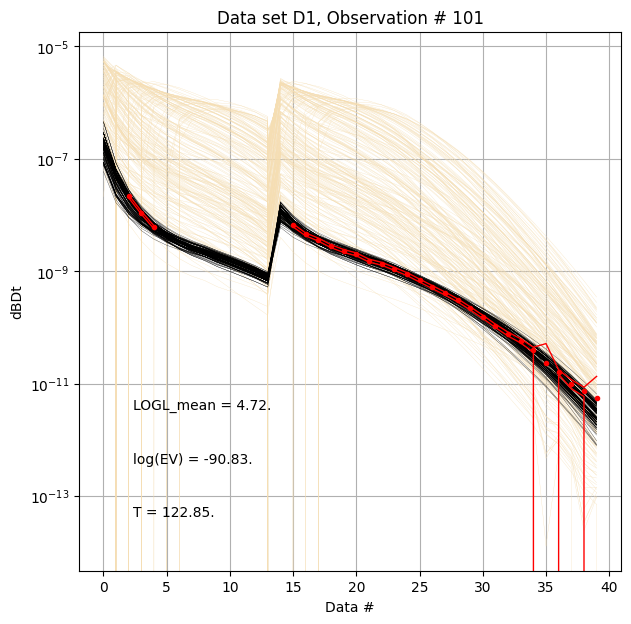

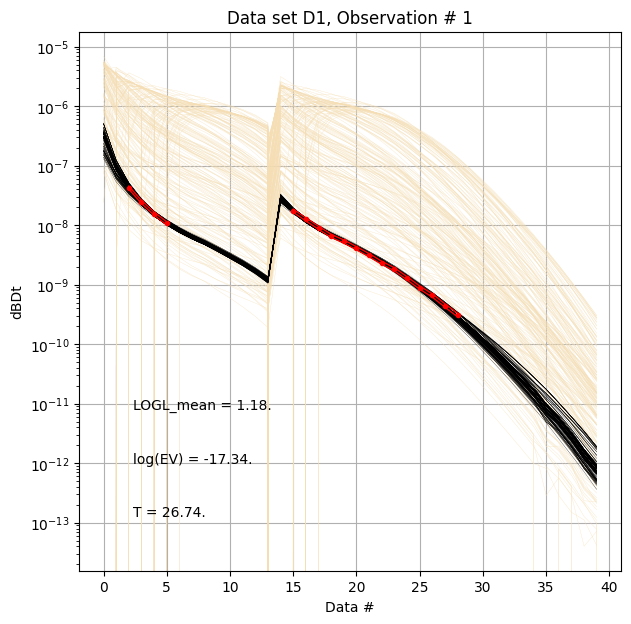

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

Plot size: wx=10.000000, wy=12.843266


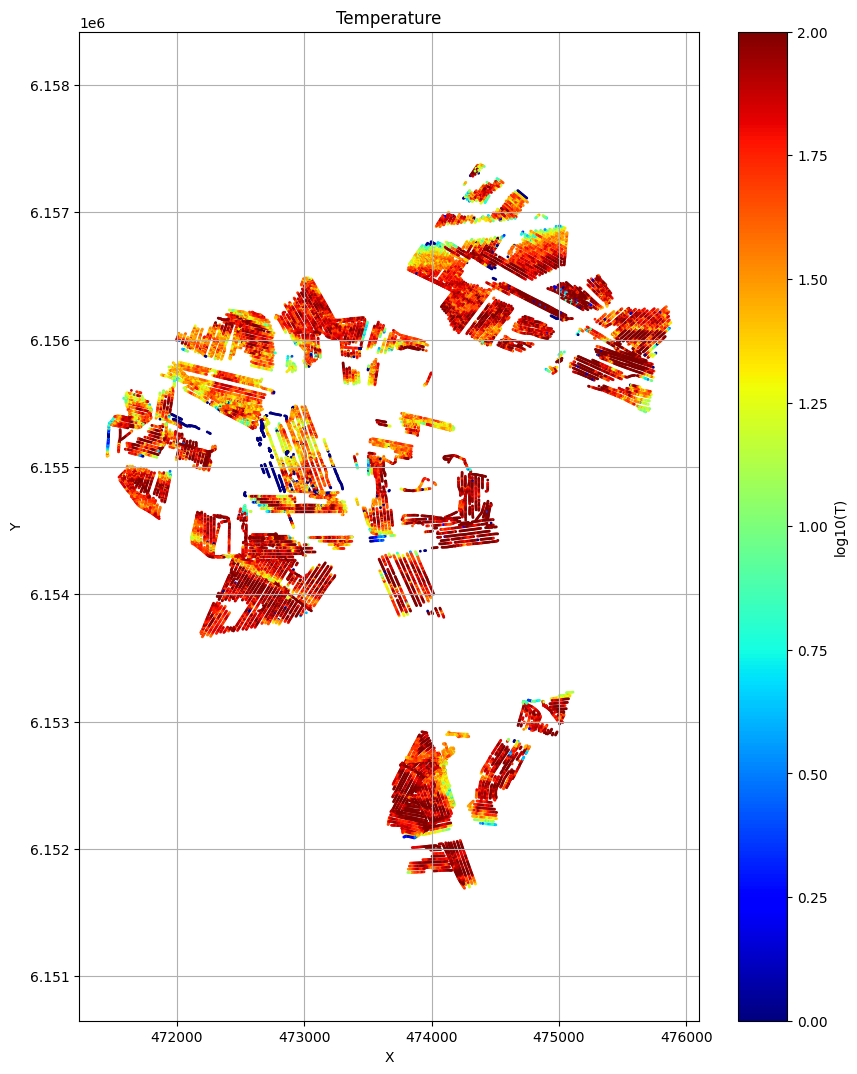

Plot size: wx=10.000000, wy=12.843266


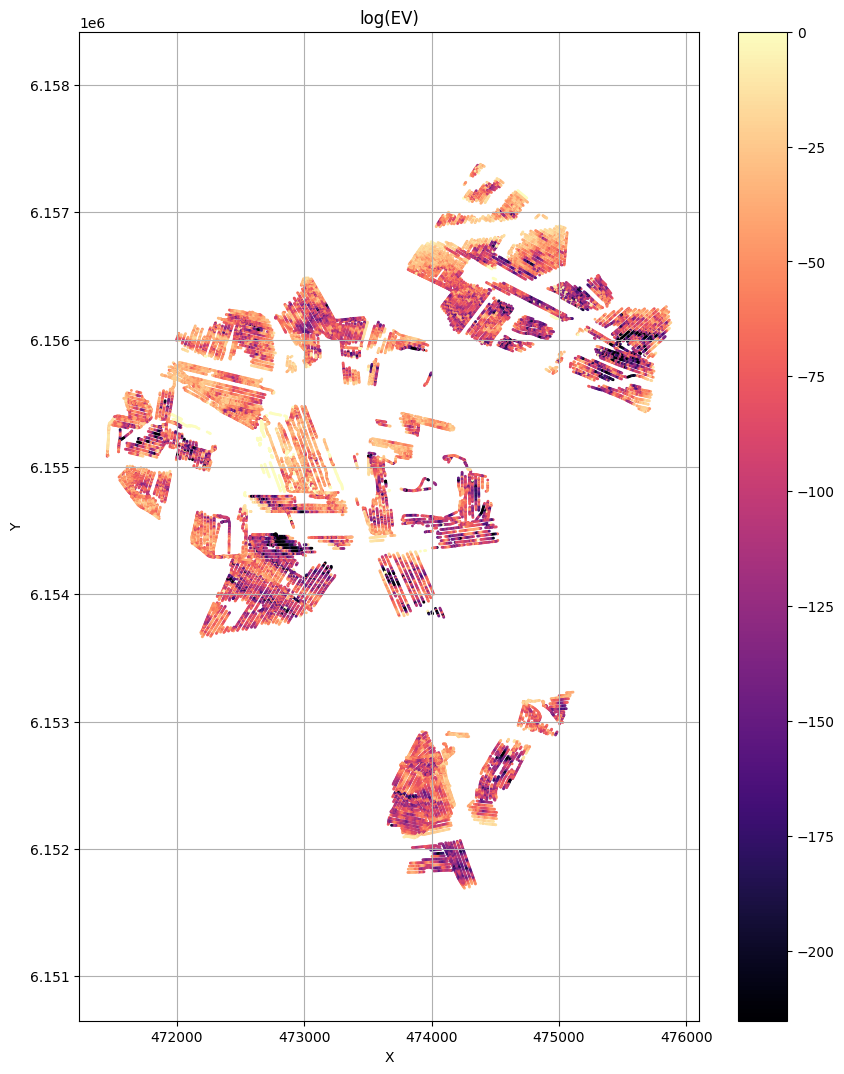

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

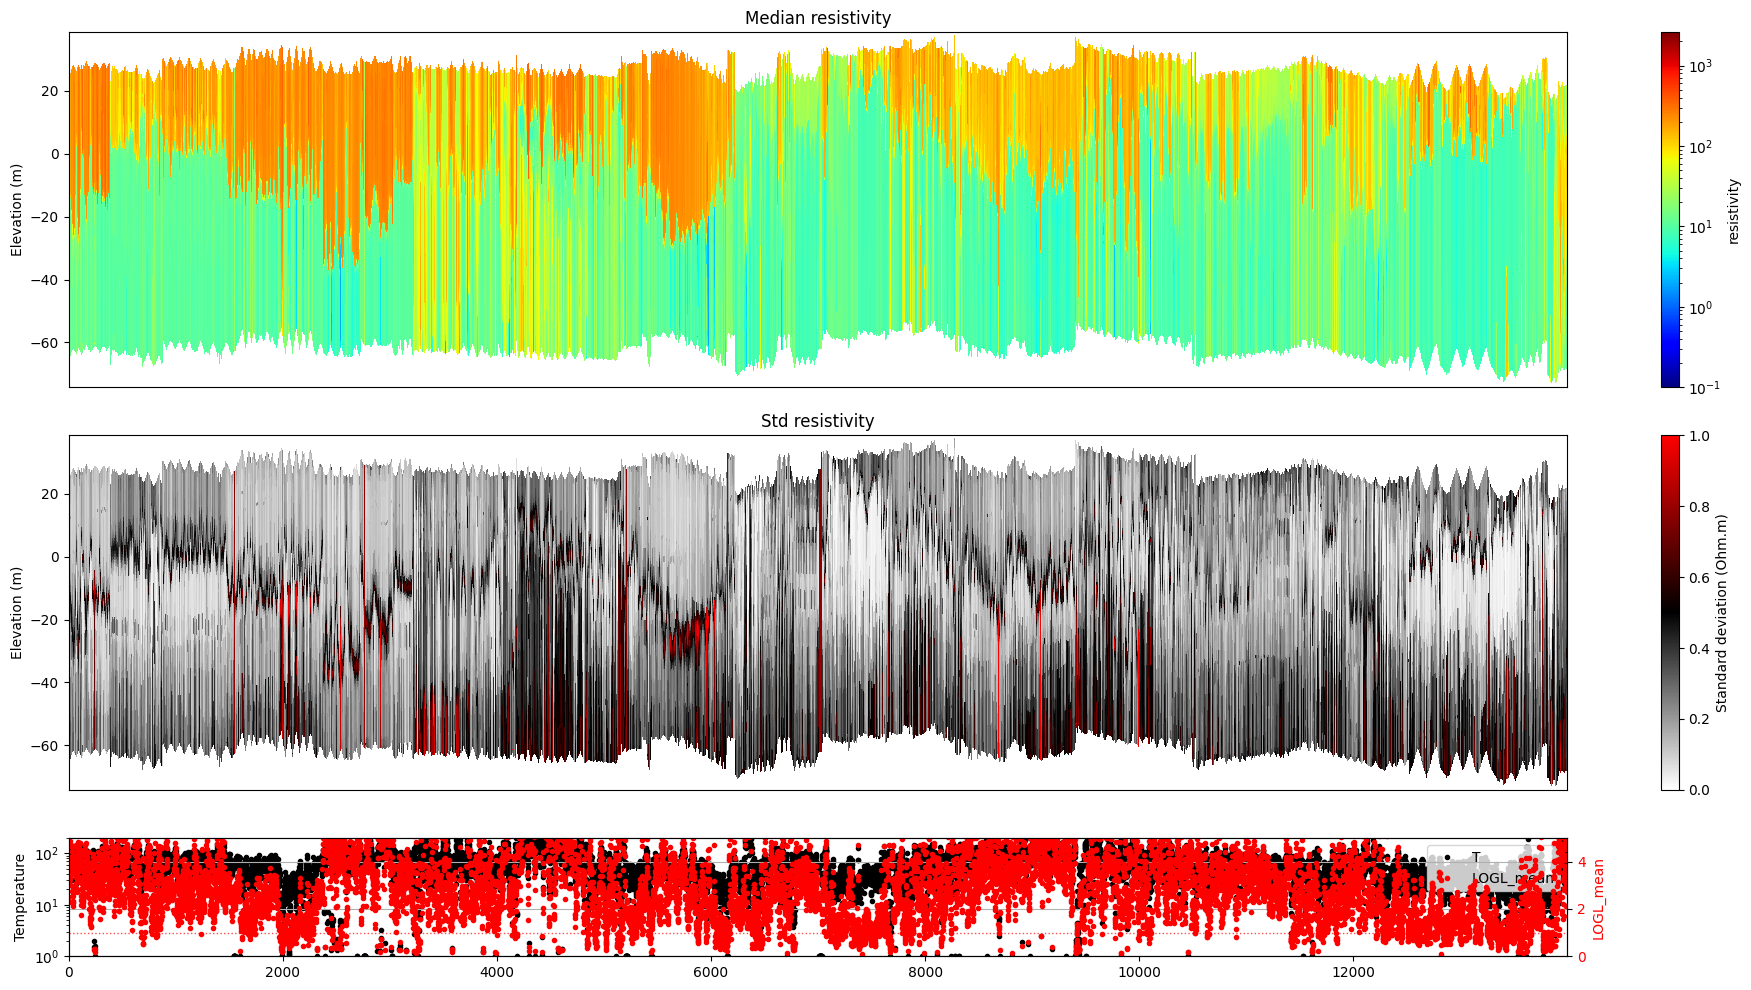

In [10]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1, hardcopy=hardcopy)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)h yg sa

None


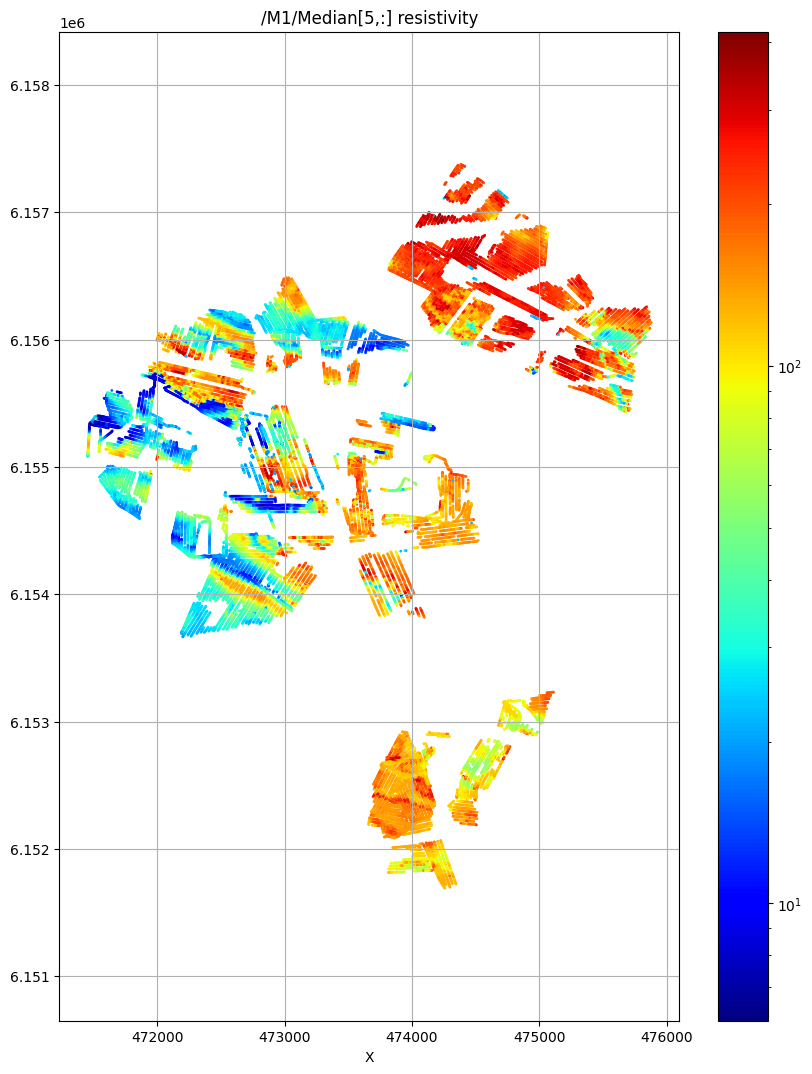

None


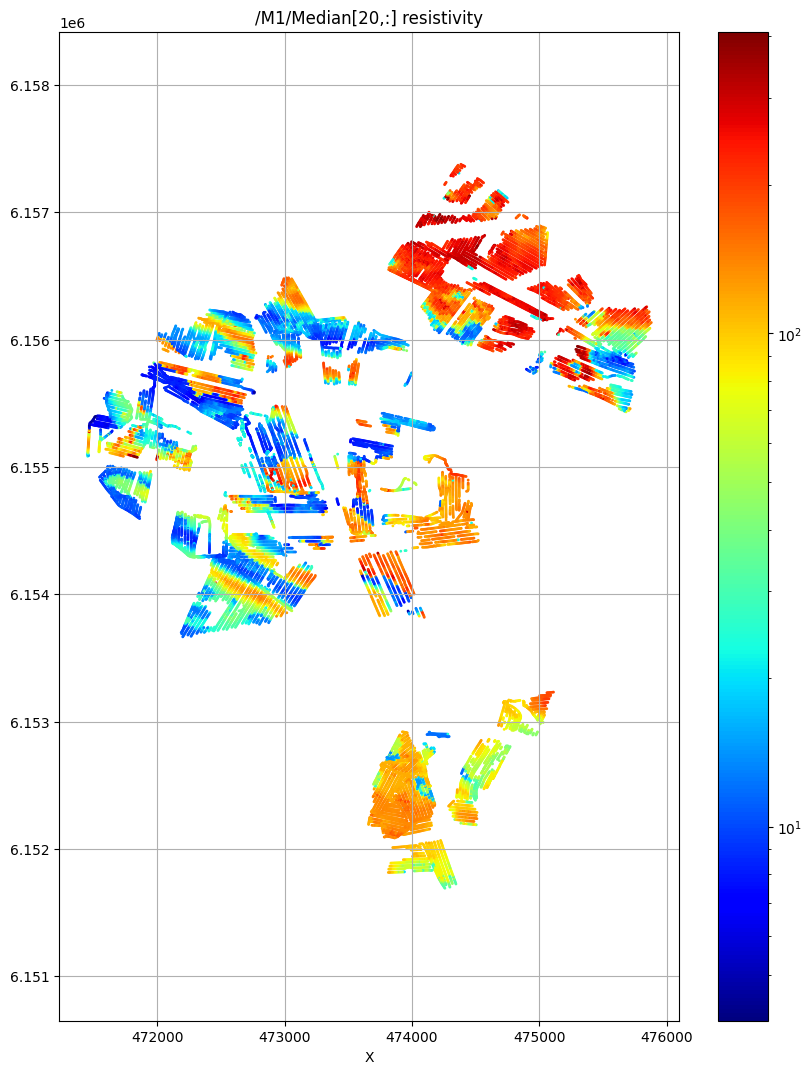

None


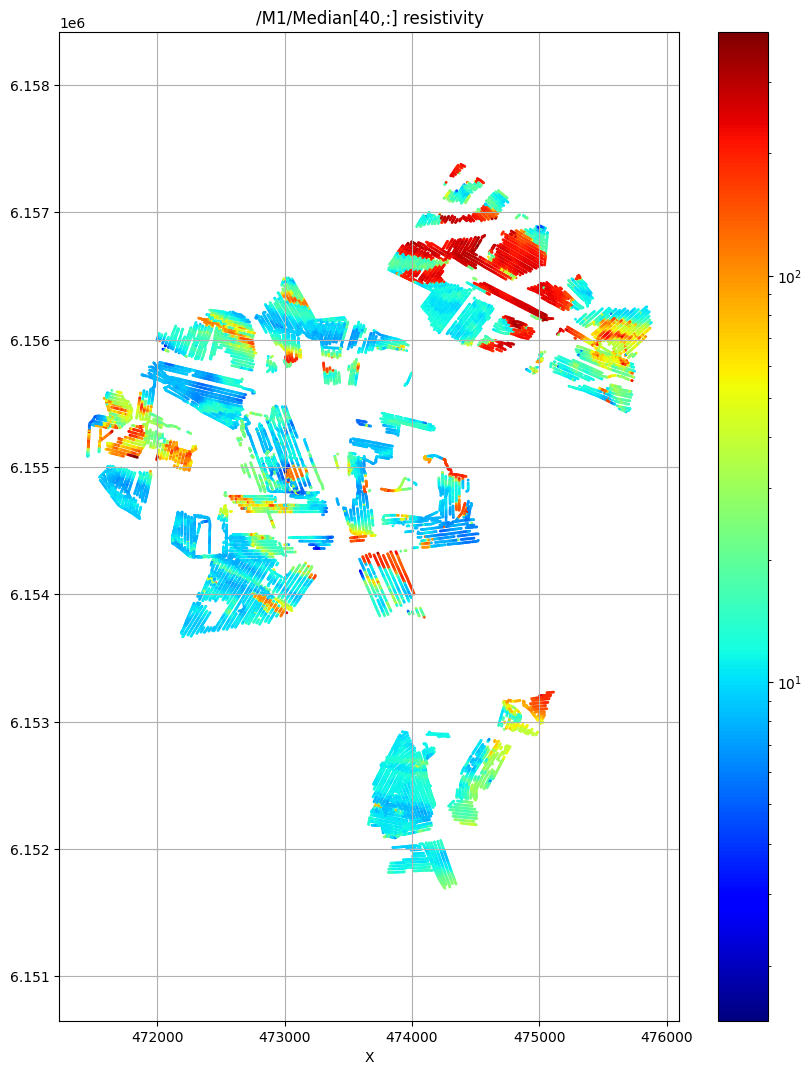

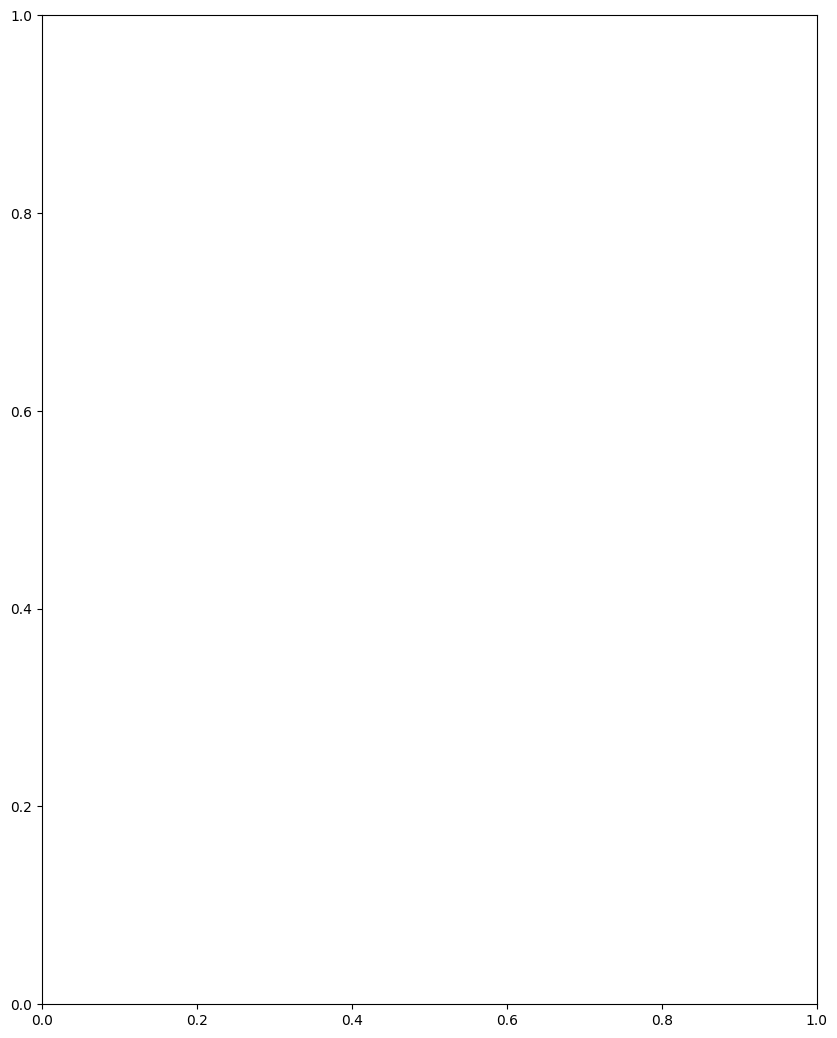

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1, hardcopy=hardcopy)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)